
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, adjust lgbm params; 'lambda_l2':3,
# Version = "v59" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v60" # inference used v53, adjust lgbm params; 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, adjust lgbm params; 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, adjust lgm params; 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5
# Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39
# Version = "v82" # Select, DEBUG = True, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v83" # inference used v67, lgm params used　v79, odds_gene_df["Log"] < 1.0→0.0
# Version = "v84" # Select, based on v83, DEBUG = False, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v85" # inference used v82, based on v83,
# Version = "v86" # inference used v82, based on v85, unpredictable_cols=()
# Version = "v88" # inference used v82, based on v85,unpredictable_cols based on v87
# Version = "v89" # inference used v67&v82, based on v85, unpredictable_cols=()
# Version = "v90" # inference used v67&v82, based on v85, unpredictable_cols=(), if _score > 0.02:unpredictable.append(target_col)

Version = "v91" # inference used v67&v82, based on v85, unpredictable_cols based on v89, 'colsample_bytree': 0.05,

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67_v82.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648                d_g-401       df_g-420   
2                         g-643          d_g_max_min_p    cut_d_g-152   
3                         g-498                d_g-639        df_g-22   
4                    cut_d_c-31                  g-497       df_g-564   
..                          ...                    ...            ...   
495                         NaN                    NaN            NaN   
496                         NaN                    NaN            NaN   
497                         NaN                    NaN            NaN   
498                         NaN                    NaN            NaN   
499                         NaN                    NaN            NaN   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                     cut_df_g-122                       cut_d_g-369   
1                      cut_d_g-297                       cut_d_g-247   
2                            g-144                      cut_df_g-310   
3                          df_g-27                          df_c_min   
4                      cut_d_g-525                          df_g-387   
..                             ...                               ...   
495                       df_g-733                       cut_d_g-715   
496                   cut_df_g-724                       cut_d_g-366   
497                          g-576                             g-412   
498                          g-575                           d_g-746   
499                     cut_d_c-58                       cut_d_g-332   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
495                            NaN                        NaN   
496                            NaN                        NaN   
497                            NaN                        NaN   
498                            NaN                        NaN   
499                            NaN                        NaN   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
495                           NaN                        NaN   
496                           NaN                        NaN   
497                           NaN                        NaN   
498                           NaN                        NaN   
499                           NaN                        NaN   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                      df_c_min  ...                                 g-226   
1                   cut_d_g-614  ...                               d_g-283   
2                        df_g-7  ...                           cut_d_g-225   
3                  cut_df_g-186  ...                                 g-689   
4                      df_g-387  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
495                 cut_d_g-747  ...                                   NaN   
496                cut_df_g-732  ...                                   NaN   
497       

In [13]:
# cooccurring & mutually exclusive targets
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    if col == "nfkb_inhibitor":
        p_val = 0.1
    else:
        p_val = 0.3
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= p_val) & (odds_gene_df["Log"] < 0.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
62                                NaN   
63                                NaN   
64                                NaN   
65                                NaN   
66                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
62                                     NaN                            NaN   
63                                     NaN                            NaN   
64                                     NaN                            NaN   
65                                     NaN                            NaN   
66                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
unpredictable_cols = (
 'acetylcholine_receptor_antagonist',
 'adenosine_receptor_antagonist',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'hdac_inhibitor',
 'histamine_receptor_antagonist',
 'hmgcr_inhibitor',
 'immunosuppressant',
 'kit_inhibitor',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'opioid_receptor_antagonist',
 'pdgfr_inhibitor',
 'phosphodiesterase_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'progesterone_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'serotonin_receptor_antagonist',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor'
)

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.05, 
                'lambda_l1': 0.1,
                'lambda_l2': 300,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
            }
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        if target_col in unpredictable_cols:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.05,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 200,
                'random_state': SEED,
                'n_jobs': 4
            }
            
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col].dropna()
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [24]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000293623	valid_1's binary_logloss: 0.000970191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000292667	valid_1's binary_logloss: 0.00203699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000295845	valid_1's binary_logloss: 0.000753107
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015064, Threshold: 0.0055061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0055061, conf_0:0.00385, conf_1:0.00716
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_1: 0.0355061


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000292069	valid_1's binary_logloss: 0.00513589


threshold: 0.0355061, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0355061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00071
Num_p_label: 17.0, Expected: 2.8, Threshold: 0.0355061, conf_0:0.02840, conf_1:0.04261
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_1: 0.0655061
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_2: 0.0955061


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0955061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071
Num_p_label: 6.0, Expected: 2.8, Threshold: 0.0955061, conf_0:0.08596, conf_1:0.10506


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


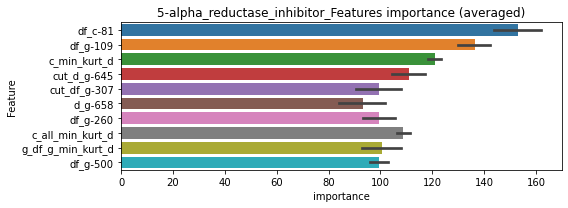

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000293487	valid_1's binary_logloss: 0.001093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000285339	valid_1's binary_logloss: 0.000858941


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000289784	valid_1's binary_logloss: 0.00102207
Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.0013725818817934006


Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000293545	valid_1's binary_logloss: 0.00251509


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000295372	valid_1's binary_logloss: 0.000831571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000289712	valid_1's binary_logloss: 0.00103864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000304841	valid_1's binary_logloss: 0.00218194
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013890, Threshold: 0.0040182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0040182, conf_0:0.00281, conf_1:0.00522
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0340182


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.000830726


threshold: 0.0340182, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.02721, conf_1:0.04082


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.03062, conf_1:0.03742


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


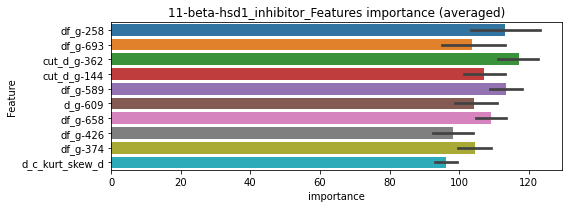

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284511	valid_1's binary_logloss: 0.000810789
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000284522	valid_1's binary_logloss: 0.00081077


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000290508	valid_1's binary_logloss: 0.000924504


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000298043	valid_1's binary_logloss: 0.00124361


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000291321	valid_1's binary_logloss: 0.000776675


11-beta-hsd1_inhibitor logloss: 0.0009389364299642631
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000336517	valid_1's binary_logloss: 0.00491599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343889	valid_1's binary_logloss: 0.0039385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357722	valid_1's binary_logloss: 0.00231797
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018501, Threshold: 0.0046275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0046275, conf_0:0.00324, conf_1:0.00602
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_1: 0.0346275


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000348473	valid_1's binary_logloss: 0.00688178


threshold: 0.0346275, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0346275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0346275, conf_0:0.02770, conf_1:0.04155
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0646275
threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0646275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0646275, conf_0:0.05816, conf_1:0.07109


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


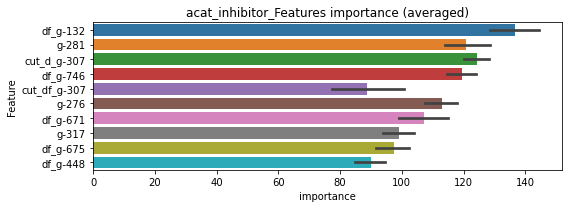

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000329791	valid_1's binary_logloss: 0.00349467


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000360797	valid_1's binary_logloss: 0.00270942


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000354877	valid_1's binary_logloss: 0.00270428


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000340395	valid_1's binary_logloss: 0.00452011


acat_inhibitor logloss: 0.0033571775050696235


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.0143386	valid_1's binary_logloss: 0.107565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00889523	valid_1's binary_logloss: 0.0864293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00668826	valid_1's binary_logloss: 0.0626972
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.989, PR-AUC:0.974
y_Threshold: 0.0216754, Threshold: 0.0309253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 372 → Positive_corect_labels: 1221/7303
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02165, conf_1:0.04020


Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0138904	valid_1's binary_logloss: 0.112011


threshold: 0.0309253, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1221.0/7303, y_label_rate: 0.1671916
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00662938	valid_1's binary_logloss: 0.0665373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00839507	valid_1's binary_logloss: 0.0752472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00731559	valid_1's binary_logloss: 0.0710444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00437324	valid_1's binary_logloss: 0.0472012


2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0285808, Threshold: 0.0309253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 1171.0/7203
p_label_rate: 0.0097941 Vs.target_rate: 0.00798
Num_p_label: 39.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02474, conf_1:0.03711
threshold: 0.0309253, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1171.0/7203, y_label_rate: 0.1625712
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00202772	valid_1's binary_logloss: 0.0339284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00799845	valid_1's binary_logloss: 0.054996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00449011	valid_1's binary_logloss: 0.0505958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00200921	valid_1's binary_logloss: 0.0345564


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0229872, Threshold: 0.0309253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1140.0/7141
p_label_rate: 0.0045203 Vs.target_rate: 0.00798
Num_p_label: 18.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02783, conf_1:0.03402
threshold: 0.0309253, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1140.0/7141, y_label_rate: 0.1596415


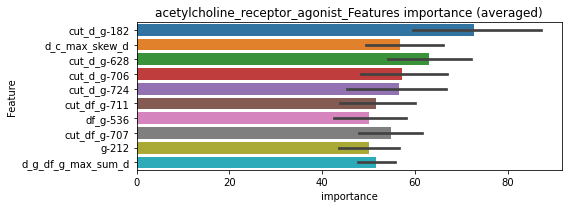

len(train_index) : 5355
len(valid_index) : 1786
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00242913	valid_1's binary_logloss: 0.0317368
Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00309867	valid_1's binary_logloss: 0.0252046
Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.0031401	valid_1's binary_logloss: 0.0332932
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_agonist logloss: 0.028202067164517144


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00153141	valid_1's binary_logloss: 0.0225717
mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0467099	valid_1's binary_logloss: 0.135484
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.0464593	valid_1's binary_logloss: 0.135382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.0572627	valid_1's binary_logloss: 0.135862
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[932]	training's binary_logloss: 0.0492791	valid_1's binary_logloss: 0.138574
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.04701	valid_1's binary_logloss: 0.13385
Early stopping, best iteration is:
[1104]	training's binary_logloss: 0.0425075	valid_1's binary_logloss: 0.133119


1 / 3, AUC score:0.945, PR-AUC:0.910
y_Threshold: 0.0626510, Threshold: 0.0916966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 700 → Positive_corect_labels: 1307/8340
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.0916966, conf_0:0.06419, conf_1:0.11921
threshold: 0.0916966, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1307.0/8340, y_label_rate: 0.1567146
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227327	valid_1's binary_logloss: 0.0602312
Early stopping, best iteration is:
[1199]	training's binary_logloss: 0.0189079	valid_1's binary_logloss: 0.0587661
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0232331	valid_1's binary_logloss: 0.0572747
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0117592	valid_1's binary_logloss: 0.0533143
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226963	valid_1's binary_logloss: 0.0622028
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.0189697	valid_1's binary_logloss: 0.0607269
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0238232	valid_1's binary_logloss: 0.0522969
[2000]	training's binary_logloss: 0.0114259	valid_1's binary_logloss: 0.0468786
Early stopp

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0423715, Threshold: 0.0916966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 122 → Positive_corect_labels: 1246.0/8218
p_label_rate: 0.0012557 Vs.target_rate: 0.01264
Num_p_label: 5.0, Expected: 50.3, Threshold: 0.0916966, conf_0:0.07336, conf_1:0.11004
threshold: 0.0916966, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1246.0/8218, y_label_rate: 0.1516184
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0145652	valid_1's binary_logloss: 0.0362406
Early stopping, best iteration is:
[1928]	training's binary_logloss: 0.00749323	valid_1's binary_logloss: 0.0325856
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0146742	valid_1's binary_logloss: 0.0374131
Early stopping, best iteration is:
[1731]	training's binary_logloss: 0.00838878	valid_1's binary_logloss: 0.0336507
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0161691	valid_1's binary_logloss: 0.020867
[2000]	training's binary_logloss: 0.00788679	valid_1's binary_logloss: 0.0155702
[3000]	training's binary_logloss: 0.00512211	valid_1's binary_logloss: 0.0136438
[4000]	training's binary_logloss: 0.00378767	valid_1's binary_logloss: 0.0127327
[5000]	training's binary_logloss: 0.00301218	valid_1's binary_logloss: 0.0121542
[6000]	training's bina

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0218188, Threshold: 0.0916966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 1223.0/8172
p_label_rate: 0.0000000 Vs.target_rate: 0.01264
Num_p_label: 0.0, Expected: 50.3, Threshold: 0.0916966, conf_0:0.08253, conf_1:0.10087
threshold: 0.0916966, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 1223.0/8172, y_label_rate: 0.1496574


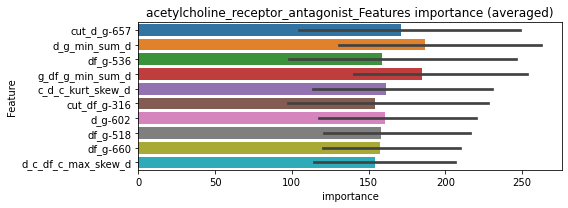

len(train_index) : 6129
len(valid_index) : 2043
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0162888	valid_1's binary_logloss: 0.0258958
[2000]	training's binary_logloss: 0.00850408	valid_1's binary_logloss: 0.0191525
[3000]	training's binary_logloss: 0.00568484	valid_1's binary_logloss: 0.0169349
[4000]	training's binary_logloss: 0.00425637	valid_1's binary_logloss: 0.0159708
[5000]	training's binary_logloss: 0.00340106	valid_1's binary_logloss: 0.0154483
Early stopping, best iteration is:
[5570]	training's binary_logloss: 0.00304777	valid_1's binary_logloss: 0.0151723


len(train_index) : 6129
len(valid_index) : 2043
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0159164	valid_1's binary_logloss: 0.0256394
[2000]	training's binary_logloss: 0.00831026	valid_1's binary_logloss: 0.0193221
[3000]	training's binary_logloss: 0.00557677	valid_1's binary_logloss: 0.0173937
Early stopping, best iteration is:
[3524]	training's binary_logloss: 0.00474778	valid_1's binary_logloss: 0.0168765


len(train_index) : 6129
len(valid_index) : 2043
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.015331	valid_1's binary_logloss: 0.0283453
[2000]	training's binary_logloss: 0.00799242	valid_1's binary_logloss: 0.0220164
[3000]	training's binary_logloss: 0.0053755	valid_1's binary_logloss: 0.020017
Early stopping, best iteration is:
[3330]	training's binary_logloss: 0.00483685	valid_1's binary_logloss: 0.0196172


len(train_index) : 6129
len(valid_index) : 2043
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0172959	valid_1's binary_logloss: 0.017274
[2000]	training's binary_logloss: 0.00906504	valid_1's binary_logloss: 0.010271
[3000]	training's binary_logloss: 0.00605973	valid_1's binary_logloss: 0.00794093
[4000]	training's binary_logloss: 0.00451247	valid_1's binary_logloss: 0.00666334
[5000]	training's binary_logloss: 0.00359288	valid_1's binary_logloss: 0.0058574
[6000]	training's binary_logloss: 0.00298842	valid_1's binary_logloss: 0.00531993
[7000]	training's binary_logloss: 0.00255778	valid_1's binary_logloss: 0.00491937
[8000]	training's binary_logloss: 0.00223953	valid_1's binary_logloss: 0.00462018
[9000]	training's binary_logloss: 0.00199599	valid_1's binary_logloss: 0.00439282
[10000]	training's binary_logloss: 0.00180308	valid_1's binary_logloss: 0.00420601
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00180308	valid_1's binary_logloss: 0.00

acetylcholine_receptor_antagonist logloss: 0.013968008303316263
acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000685024	valid_1's binary_logloss: 0.0325866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000671906	valid_1's binary_logloss: 0.0281289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000898113	valid_1's binary_logloss: 0.0176292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000732003	valid_1's binary_logloss: 0.0236906


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0081002, Threshold: 0.0223018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0223018, conf_0:0.01561, conf_1:0.02899
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_1: 0.0523018
threshold: 0.0523018, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00062549	valid_1's binary_logloss: 0.0339438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000685437	valid_1's binary_logloss: 0.0218289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000648642	valid_1's binary_logloss: 0.0195687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000633588	valid_1's binary_logloss: 0.0118497


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0422440, Threshold: 0.0523018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3785
p_label_rate: 0.0115520 Vs.target_rate: 0.00307
Num_p_label: 46.0, Expected: 12.2, Threshold: 0.0523018, conf_0:0.04184, conf_1:0.06276
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_1: 0.0823018
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.1123018
threshold: 0.1123018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3785, y_label_rate: 0.1712021
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000603334	valid_1's binary_logloss: 0.0264773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000811472	valid_1's binary_logloss: 0.034059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000785764	valid_1's binary_logloss: 0.0201517
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000690087	valid_1's binary_logloss: 0.0212579


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0421190, Threshold: 0.1123018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0062783 Vs.target_rate: 0.00307
Num_p_label: 25.0, Expected: 12.2, Threshold: 0.1123018, conf_0:0.10107, conf_1:0.12353
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.1423018
threshold: 0.1423018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3777, y_label_rate: 0.1705057


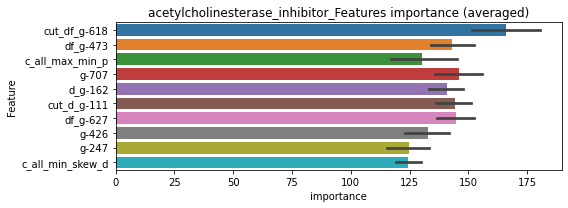

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00079693	valid_1's binary_logloss: 0.0217842


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000739259	valid_1's binary_logloss: 0.0344124


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000750954	valid_1's binary_logloss: 0.0121758


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000632856	valid_1's binary_logloss: 0.0232561


acetylcholinesterase_inhibitor logloss: 0.022906836849665373
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00054574	valid_1's binary_logloss: 0.0138032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000531352	valid_1's binary_logloss: 0.0177357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000560756	valid_1's binary_logloss: 0.00634743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00050505	valid_1's binary_logloss: 0.0095383


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040146, Threshold: 0.0164993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0164993, conf_0:0.01155, conf_1:0.02145
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0464993
threshold: 0.0464993, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.03720, conf_1:0.05580
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.04185, conf_1:0.05115
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


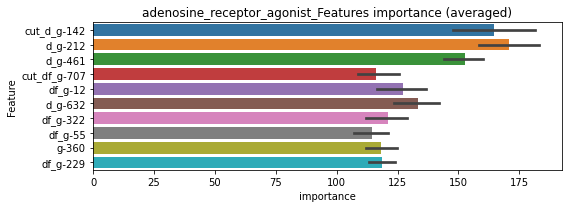

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483506	valid_1's binary_logloss: 0.0105763
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000481734	valid_1's binary_logloss: 0.0105428


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000564746	valid_1's binary_logloss: 0.0156275


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000504328	valid_1's binary_logloss: 0.00441863


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000534045	valid_1's binary_logloss: 0.00923922


adenosine_receptor_agonist logloss: 0.009966680772964826
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0474607	valid_1's binary_logloss: 0.110617
[2000]	training's binary_logloss: 0.0237353	valid_1's binary_logloss: 0.0901016
[3000]	training's binary_logloss: 0.0155808	valid_1's binary_logloss: 0.0828198
Early stopping, best iteration is:
[3860]	training's binary_logloss: 0.0119965	valid_1's binary_logloss: 0.0797016
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0496924	valid_1's binary_logloss: 0.0895594
[2000]	training's binary_logloss: 0.0247551	valid_1's binary_logloss: 0.0645094
[3000]	training's binary_logloss: 0.0162352	valid_1's binary_logloss: 0.0552807
[4000]	training's binary_logloss: 0.0120647	valid_1's binary_logloss: 0.0504675
[5000]	training's binary_logloss: 0.00961724	valid_1's binary_logloss: 0.0474836
[6000]	training's binary_logloss: 0.00799799	valid_1's binary_logloss: 0.0455867
[7000]	training's binary_logloss: 0.006860

1 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0429752, Threshold: 0.1110689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 161 → Positive_corect_labels: 639/3764
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1110689, conf_0:0.07775, conf_1:0.14439
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_1: 0.1410689
threshold: 0.1410689, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 639.0/3764, y_label_rate: 0.1697662
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0431278	valid_1's binary_logloss: 0.0966946
[2000]	training's binary_logloss: 0.0212591	valid_1's binary_logloss: 0.0767297
[3000]	training's binary_logloss: 0.0139996	valid_1's binary_logloss: 0.0700477
Early stopping, best iteration is:
[3961]	training's binary_logloss: 0.0105375	valid_1's binary_logloss: 0.0667801
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0437626	valid_1's binary_logloss: 0.0953033
[2000]	training's binary_logloss: 0.0217107	valid_1's binary_logloss: 0.0705522
[3000]	training's binary_logloss: 0.0143187	valid_1's binary_logloss: 0.061287
[4000]	training's binary_logloss: 0.0106625	valid_1's binary_logloss: 0.0565015
[5000]	training's binary_logloss: 0.00852008	valid_1's binary_logloss: 0.0533899
Early stopping, best iteration is:
[5688]	training's binary_logloss: 0.007493	valid_1's binary_logloss: 0.0517566
Training 

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0767766, Threshold: 0.1410689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 626.0/3738
p_label_rate: 0.0163235 Vs.target_rate: 0.00403
Num_p_label: 65.0, Expected: 16.1, Threshold: 0.1410689, conf_0:0.11286, conf_1:0.16928
Num_p_label: 47.0, Expected: 16.1, Adj_threshold_1: 0.1710689
Num_p_label: 31.0, Expected: 16.1, Adj_threshold_2: 0.2010689
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_3: 0.2310689
threshold: 0.2310689, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 626.0/3738, y_label_rate: 0.1674692
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420421	valid_1's binary_logloss: 0.0795793
[2000]	training's binary_logloss: 0.0209654	valid_1's binary_logloss: 0.0572239
[3000]	training's binary_logloss: 0.0138228	valid_1's binary_logloss: 0.0490302
[4000]	training's binary_logloss: 0.010322	valid_1's binary_logloss: 0.0444344
[5000]	training's binary_logloss: 0.00827988	valid_1's binary_logloss: 0.0416527
[6000]	training's binary_logloss: 0.00690201	valid_1's binary_logloss: 0.0395591
[7000]	training's binary_logloss: 0.00593165	valid_1's binary_logloss: 0.0382121
Early stopping, best iteration is:
[7106]	training's binary_logloss: 0.00584309	valid_1's binary_logloss: 0.038041
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0408777	valid_1's binary_logloss: 0.0886242
[2000]	training's binary_logloss: 0.0203559	valid_1's binary_logloss: 0.066528
[3000]	training's binary_logloss: 0.013419

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0823752, Threshold: 0.2310689, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 619.0/3724
p_label_rate: 0.0077850 Vs.target_rate: 0.00403
Num_p_label: 31.0, Expected: 16.1, Threshold: 0.2310689, conf_0:0.20796, conf_1:0.25418
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_1: 0.2610689
threshold: 0.2610689, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 619.0/3724, y_label_rate: 0.1662191


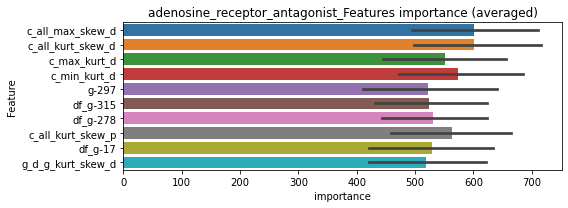

len(train_index) : 2793
len(valid_index) : 931
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0571135	valid_1's binary_logloss: 0.0915568
[2000]	training's binary_logloss: 0.0292653	valid_1's binary_logloss: 0.0624268
[3000]	training's binary_logloss: 0.0195143	valid_1's binary_logloss: 0.0518159
[4000]	training's binary_logloss: 0.0145837	valid_1's binary_logloss: 0.0461745
[5000]	training's binary_logloss: 0.0116667	valid_1's binary_logloss: 0.0426901
[6000]	training's binary_logloss: 0.00971511	valid_1's binary_logloss: 0.0400195
[7000]	training's binary_logloss: 0.00835103	valid_1's binary_logloss: 0.0381027
[8000]	training's binary_logloss: 0.00733469	valid_1's binary_logloss: 0.0367544
[9000]	training's binary_logloss: 0.00654121	valid_1's binary_logloss: 0.0355484
Early stopping, best iteration is:
[9310]	training's binary_logloss: 0.0063299	valid_1's binary_logloss: 0.0352304


len(train_index) : 2793
len(valid_index) : 931
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0570134	valid_1's binary_logloss: 0.0941698
[2000]	training's binary_logloss: 0.0288457	valid_1's binary_logloss: 0.0661085
[3000]	training's binary_logloss: 0.0192098	valid_1's binary_logloss: 0.0558947
[4000]	training's binary_logloss: 0.0143346	valid_1's binary_logloss: 0.0503288
Early stopping, best iteration is:
[4827]	training's binary_logloss: 0.0118656	valid_1's binary_logloss: 0.0476932


len(train_index) : 2793
len(valid_index) : 931
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0575696	valid_1's binary_logloss: 0.0928835
[2000]	training's binary_logloss: 0.0296483	valid_1's binary_logloss: 0.064883
[3000]	training's binary_logloss: 0.0197264	valid_1's binary_logloss: 0.0543007
[4000]	training's binary_logloss: 0.0147427	valid_1's binary_logloss: 0.0488436
[5000]	training's binary_logloss: 0.0117841	valid_1's binary_logloss: 0.0454665
Early stopping, best iteration is:
[5823]	training's binary_logloss: 0.0101106	valid_1's binary_logloss: 0.0434032


len(train_index) : 2793
len(valid_index) : 931
================================= fold 4/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0560164	valid_1's binary_logloss: 0.097983
[2000]	training's binary_logloss: 0.0285392	valid_1's binary_logloss: 0.069652
[3000]	training's binary_logloss: 0.0190138	valid_1's binary_logloss: 0.0592744
[4000]	training's binary_logloss: 0.0142249	valid_1's binary_logloss: 0.0537145
[5000]	training's binary_logloss: 0.0113938	valid_1's binary_logloss: 0.05061
[6000]	training's binary_logloss: 0.00949778	valid_1's binary_logloss: 0.0483318
[7000]	training's binary_logloss: 0.00815095	valid_1's binary_logloss: 0.0467878
Early stopping, best iteration is:
[6987]	training's binary_logloss: 0.00816529	valid_1's binary_logloss: 0.0467747


adenosine_receptor_antagonist logloss: 0.04327538529863448
adenosine_receptor_antagonist is unpredictable(><)!
adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000301577	valid_1's binary_logloss: 0.000690301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309077	valid_1's binary_logloss: 0.00177447
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000303345	valid_1's binary_logloss: 0.000805331
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014777, Threshold: 0.0079393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0079393, conf_0:0.00556, conf_1:0.01032


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000301737	valid_1's binary_logloss: 0.00218482


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.0379393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0679393
threshold: 0.0679393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.0679393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


p_label_rate: 0.0125565 Vs.target_rate: 0.00076
Num_p_label: 50.0, Expected: 3.0, Threshold: 0.0679393, conf_0:0.05435, conf_1:0.08153
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.0979393
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1279393
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.1579393
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.1879393
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.2179393
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.2479393
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.2779393
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3079393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.3379393
threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.3379393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.3379393, conf_0:0.30415, conf_1:0.37173


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


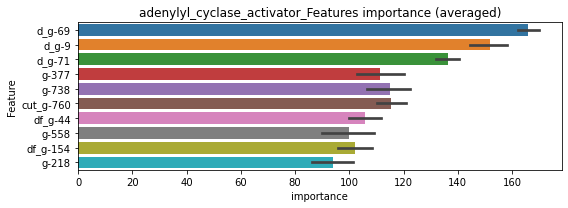

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000281889	valid_1's binary_logloss: 0.000562985
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000281889	valid_1's binary_logloss: 0.000562985


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282459	valid_1's binary_logloss: 0.000992297
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000282336	valid_1's binary_logloss: 0.000992255


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284722	valid_1's binary_logloss: 0.000606711
Early stopping, best iteration is:
[1000]	training's binary_logloss: 0.000284722	valid_1's binary_logloss: 0.000606711


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000289422	valid_1's binary_logloss: 0.00178937


adenylyl_cyclase_activator logloss: 0.0009877870478885564


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.0124748	valid_1's binary_logloss: 0.11513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0164522	valid_1's binary_logloss: 0.126484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0248536	valid_1's binary_logloss: 0.126464
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.974, PR-AUC:0.950
y_Threshold: 0.0334234, Threshold: 0.0452136, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.0193473	valid_1's binary_logloss: 0.123887


Remove_noisy_data: 505 → Positive_corect_labels: 1277/7838
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.03165, conf_1:0.05878
threshold: 0.0452136, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1277.0/7838, y_label_rate: 0.1629242
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00649825	valid_1's binary_logloss: 0.0748464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0109732	valid_1's binary_logloss: 0.08919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00517659	valid_1's binary_logloss: 0.0505789
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0332591, Threshold: 0.0452136, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1210.0/7704
p_label_rate: 0.0050226 Vs.target_rate: 0.01134
Num_p_label: 20.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.03617, conf_1:0.05426


Early stopping, best iteration is:
[277]	training's binary_logloss: 0.0120532	valid_1's binary_logloss: 0.0897429


threshold: 0.0452136, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 1210.0/7704, y_label_rate: 0.1570613
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00846917	valid_1's binary_logloss: 0.0575633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.0034326	valid_1's binary_logloss: 0.0491302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00265695	valid_1's binary_logloss: 0.0417249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00237747	valid_1's binary_logloss: 0.0397632


3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0242058, Threshold: 0.0452136, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1171.0/7626
p_label_rate: 0.0052737 Vs.target_rate: 0.01134
Num_p_label: 21.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.04069, conf_1:0.04973
threshold: 0.0452136, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1171.0/7626, y_label_rate: 0.1535536


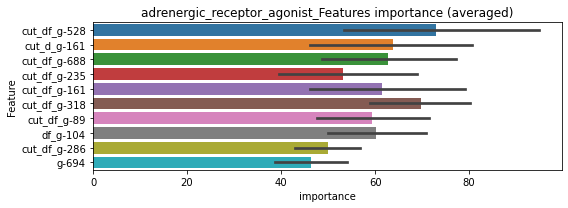

len(train_index) : 5719
len(valid_index) : 1907
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5719
len(valid_index) : 1907
================================= fold 2/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00143901	valid_1's binary_logloss: 0.0233386
Training until validation scores don't improve for 30 rounds


len(train_index) : 5720
len(valid_index) : 1906
================================= fold 3/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[159]	training's binary_logloss: 0.00318619	valid_1's binary_logloss: 0.0327708
Training until validation scores don't improve for 30 rounds


len(train_index) : 5720
len(valid_index) : 1906
================================= fold 4/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00302508	valid_1's binary_logloss: 0.0344145
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_agonist logloss: 0.028671104595538524


Early stopping, best iteration is:
[236]	training's binary_logloss: 0.001648	valid_1's binary_logloss: 0.0241611
mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 6628
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 6628


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.027659	valid_1's binary_logloss: 0.153976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0431136	valid_1's binary_logloss: 0.188592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0276567	valid_1's binary_logloss: 0.159042
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.939, PR-AUC:0.895
y_Threshold: 0.0531932, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 660 → Positive_corect_labels: 1128/7293
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.06565, conf_1:0.12191


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.0369145	valid_1's binary_logloss: 0.165856


threshold: 0.0937789, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1128.0/7293, y_label_rate: 0.1546689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00792264	valid_1's binary_logloss: 0.0761351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0113764	valid_1's binary_logloss: 0.0995736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00817211	valid_1's binary_logloss: 0.077493
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.991, PR-AUC:0.974


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00882429	valid_1's binary_logloss: 0.0792224


y_Threshold: 0.0481532, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 1037.0/7111
p_label_rate: 0.0215972 Vs.target_rate: 0.01512
Num_p_label: 86.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.07502, conf_1:0.11253
threshold: 0.0937789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1037.0/7111, y_label_rate: 0.1458304
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00347138	valid_1's binary_logloss: 0.0374791
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00224914	valid_1's binary_logloss: 0.0271869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.002524	valid_1's binary_logloss: 0.0468697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00131374	valid_1's binary_logloss: 0.0207719


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0481822, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 1003.0/7043
p_label_rate: 0.0298845 Vs.target_rate: 0.01512
Num_p_label: 119.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.08440, conf_1:0.10316
Num_p_label: 103.0, Expected: 60.2, Adj_threshold_1: 0.1237789
Num_p_label: 91.0, Expected: 60.2, Adj_threshold_2: 0.1537789
Num_p_label: 86.0, Expected: 60.2, Adj_threshold_3: 0.1837789
threshold: 0.1837789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1003.0/7043, y_label_rate: 0.1424109


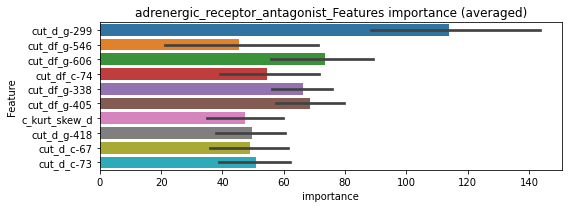

len(train_index) : 5282
len(valid_index) : 1761
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000735263	valid_1's binary_logloss: 0.0130259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000425806	valid_1's binary_logloss: 0.00587168


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5283
len(valid_index) : 1760
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00111721	valid_1's binary_logloss: 0.0204171
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_antagonist logloss: 0.013393182908759196


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00122649	valid_1's binary_logloss: 0.0142586


akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000573662	valid_1's binary_logloss: 0.0158949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000581931	valid_1's binary_logloss: 0.0188952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000712187	valid_1's binary_logloss: 0.0178871
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000612878	valid_1's binary_logloss: 0.0234772


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056892, Threshold: 0.0225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0225907, conf_0:0.01581, conf_1:0.02937
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_1: 0.0525907
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_2: 0.0825907
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_3: 0.1125907
threshold: 0.1125907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000558216	valid_1's binary_logloss: 0.0121476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000741333	valid_1's binary_logloss: 0.0186045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000742394	valid_1's binary_logloss: 0.0148287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000615205	valid_1's binary_logloss: 0.0181063


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341104, Threshold: 0.1125907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0067805 Vs.target_rate: 0.00277
Num_p_label: 27.0, Expected: 11.0, Threshold: 0.1125907, conf_0:0.09007, conf_1:0.13511
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_1: 0.1425907
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1725907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_3: 0.2025907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_4: 0.2325907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_5: 0.2625907
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_6: 0.2925907
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_7: 0.3225907
threshold: 0.3225907, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000548047	valid_1's binary_logloss: 0.00930094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000556899	valid_1's binary_logloss: 0.0144058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000583943	valid_1's binary_logloss: 0.00757063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000558079	valid_1's binary_logloss: 0.0264481


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0290341, Threshold: 0.3225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00277
Num_p_label: 15.0, Expected: 11.0, Threshold: 0.3225907, conf_0:0.29033, conf_1:0.35485
threshold: 0.3225907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3791, y_label_rate: 0.1717225


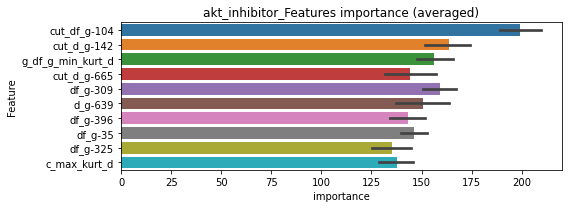

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563168	valid_1's binary_logloss: 0.00868576
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000559702	valid_1's binary_logloss: 0.00864827


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000578276	valid_1's binary_logloss: 0.0232931


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000605048	valid_1's binary_logloss: 0.00735303


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000843825	valid_1's binary_logloss: 0.0204211


akt_inhibitor logloss: 0.014938555613857256
aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00030128	valid_1's binary_logloss: 0.00110657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297411	valid_1's binary_logloss: 0.00198953
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000300869	valid_1's binary_logloss: 0.000669514
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015422, Threshold: 0.0064593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0064593, conf_0:0.00452, conf_1:0.00840
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0364593


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000300546	valid_1's binary_logloss: 0.000849411


Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0664593
threshold: 0.0664593, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0664593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00080
Num_p_label: 13.0, Expected: 3.2, Threshold: 0.0664593, conf_0:0.05317, conf_1:0.07975
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0964593


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0964593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, Expected: 3.2, Threshold: 0.0964593, conf_0:0.08681, conf_1:0.10611


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


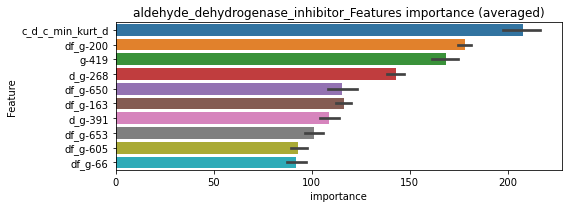

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000296478	valid_1's binary_logloss: 0.00109497


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000286763	valid_1's binary_logloss: 0.00172282
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000284037	valid_1's binary_logloss: 0.00171502


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00029101	valid_1's binary_logloss: 0.000592592
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000291001	valid_1's binary_logloss: 0.000592579


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000288496	valid_1's binary_logloss: 0.000665398
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000288132	valid_1's binary_logloss: 0.000664694


aldehyde_dehydrogenase_inhibitor logloss: 0.001016955644742755
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000486189	valid_1's binary_logloss: 0.0120713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000457894	valid_1's binary_logloss: 0.0117198
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000489002	valid_1's binary_logloss: 0.00368998
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000505768	valid_1's binary_logloss: 0.00754023


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036046, Threshold: 0.0156094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0156094, conf_0:0.01093, conf_1:0.02029
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_1: 0.0456094
threshold: 0.0456094, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000484016	valid_1's binary_logloss: 0.0112284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000464298	valid_1's binary_logloss: 0.0112455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000486353	valid_1's binary_logloss: 0.00284733
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000459446	valid_1's binary_logloss: 0.005876


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242813, Threshold: 0.0456094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0077850 Vs.target_rate: 0.00176
Num_p_label: 31.0, Expected: 7.0, Threshold: 0.0456094, conf_0:0.03649, conf_1:0.05473
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_1: 0.0756094
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1056094
threshold: 0.1056094, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00046215	valid_1's binary_logloss: 0.0117586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000566243	valid_1's binary_logloss: 0.0175228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000478164	valid_1's binary_logloss: 0.00446852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000468824	valid_1's binary_logloss: 0.00965026


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130050, Threshold: 0.1056094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, Expected: 7.0, Threshold: 0.1056094, conf_0:0.09505, conf_1:0.11617
threshold: 0.1056094, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


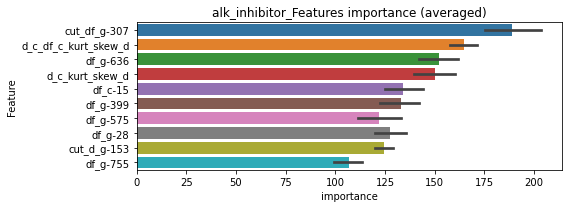

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000712142	valid_1's binary_logloss: 0.0134692


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00046105	valid_1's binary_logloss: 0.00438537


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455714	valid_1's binary_logloss: 0.00475769
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000457472	valid_1's binary_logloss: 0.00475497


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000515079	valid_1's binary_logloss: 0.00640811


alk_inhibitor logloss: 0.007255466180909576
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000237565	valid_1's binary_logloss: 0.00179472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000238117	valid_1's binary_logloss: 0.00194385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000238308	valid_1's binary_logloss: 0.000402555
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008890, Threshold: 0.0038962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000238302	valid_1's binary_logloss: 0.000929652


p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0038962, conf_0:0.00273, conf_1:0.00507
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0338962
threshold: 0.0338962, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.0338962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00050
Num_p_label: 20.0, Expected: 2.0, Threshold: 0.0338962, conf_0:0.02712, conf_1:0.04068
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0638962
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.0938962
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1238962
threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.1238962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1238962, conf_0:0.11151, conf_1:0.13629


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


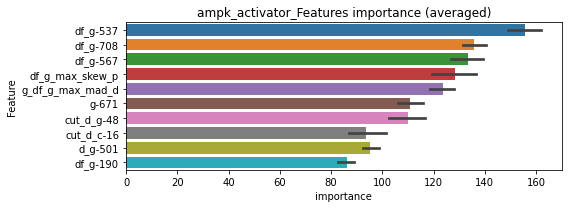

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000225311	valid_1's binary_logloss: 0.000847639
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000227512	valid_1's binary_logloss: 0.00236184
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000224783	valid_1's binary_logloss: 0.000305102
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0010467053423657555


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000224029	valid_1's binary_logloss: 0.000672236


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000250037	valid_1's binary_logloss: 0.000811305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000246072	valid_1's binary_logloss: 0.000523355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000256743	valid_1's binary_logloss: 0.00033698
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011113, Threshold: 0.0170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0170543, conf_0:0.01194, conf_1:0.02217
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0470543
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.0770543
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.1070543
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.1370543
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.1670543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1970543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.2270543
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.2570543


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00025024	valid_1's binary_logloss: 0.000509345


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.2870543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.3170543
threshold: 0.3170543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.3170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050
Num_p_label: 9.0, Expected: 2.0, Threshold: 0.3170543, conf_0:0.25364, conf_1:0.38047
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.3470543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.3770543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.4070543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.4370543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.4670543


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4970543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.5270543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.5570543
threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.5570543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.5570543, conf_0:0.50135, conf_1:0.61276
threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


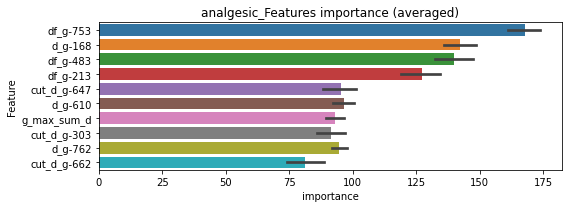

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000239206	valid_1's binary_logloss: 0.000343283
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000241573	valid_1's binary_logloss: 0.0003742


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000240838	valid_1's binary_logloss: 0.000361965
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0003605182145955004


Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000242793	valid_1's binary_logloss: 0.000362643


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000500579	valid_1's binary_logloss: 0.0157394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000526369	valid_1's binary_logloss: 0.0136869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000517144	valid_1's binary_logloss: 0.00170681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000685124	valid_1's binary_logloss: 0.0181441


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0040677, Threshold: 0.0092444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0092444, conf_0:0.00647, conf_1:0.01202
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0392444
threshold: 0.0392444, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03140, conf_1:0.04709
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03532, conf_1:0.04317
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


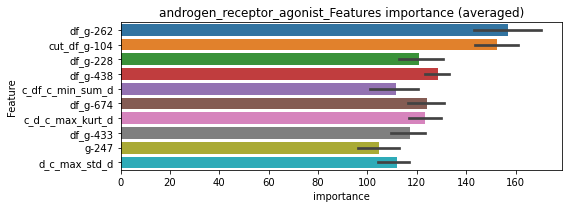

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000538829	valid_1's binary_logloss: 0.0142838


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000524873	valid_1's binary_logloss: 0.00744778


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000526643	valid_1's binary_logloss: 0.00844429


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.012789518273662119


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000837047	valid_1's binary_logloss: 0.0209899


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00108392	valid_1's binary_logloss: 0.0533942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00109866	valid_1's binary_logloss: 0.0403294
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.0010541	valid_1's binary_logloss: 0.0270576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000687266	valid_1's binary_logloss: 0.0331268


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0085820, Threshold: 0.0330483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0330483, conf_0:0.02313, conf_1:0.04296
Num_p_label: 11.0, Expected: 14.9, Adj_threshold_1: 0.0630483
threshold: 0.0630483, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3788, y_label_rate: 0.1715945
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00120772	valid_1's binary_logloss: 0.0506104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000723568	valid_1's binary_logloss: 0.0339503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000748183	valid_1's binary_logloss: 0.0365973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00068483	valid_1's binary_logloss: 0.0207164


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0258344, Threshold: 0.0630483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0115520 Vs.target_rate: 0.00374
Num_p_label: 46.0, Expected: 14.9, Threshold: 0.0630483, conf_0:0.05044, conf_1:0.07566
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_1: 0.0930483
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_2: 0.1230483
threshold: 0.1230483, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 642.0/3772, y_label_rate: 0.1702015
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000694565	valid_1's binary_logloss: 0.0382965
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000755064	valid_1's binary_logloss: 0.0380708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000701315	valid_1's binary_logloss: 0.0253419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000648289	valid_1's binary_logloss: 0.026751


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316004, Threshold: 0.1230483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3766
p_label_rate: 0.0037670 Vs.target_rate: 0.00374
Num_p_label: 15.0, Expected: 14.9, Threshold: 0.1230483, conf_0:0.11074, conf_1:0.13535
threshold: 0.1230483, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 639.0/3766, y_label_rate: 0.1696760


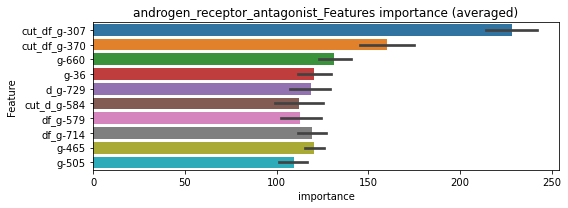

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00090653	valid_1's binary_logloss: 0.0353433


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00133032	valid_1's binary_logloss: 0.0304681
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000669812	valid_1's binary_logloss: 0.0171249
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000661971	valid_1's binary_logloss: 0.0170335


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_antagonist logloss: 0.02868373273573699


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00173446	valid_1's binary_logloss: 0.031881


anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000805734	valid_1's binary_logloss: 0.0373528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000887396	valid_1's binary_logloss: 0.0388489
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00065641	valid_1's binary_logloss: 0.0227294
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00126851	valid_1's binary_logloss: 0.0398361


1 / 3, AUC score:0.997, PR-AUC:0.996
y_Threshold: 0.0075782, Threshold: 0.0140226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 651/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0140226, conf_0:0.00982, conf_1:0.01823
Num_p_label: 3.0, Expected: 13.4, Adj_threshold_1: 0.0440226
threshold: 0.0440226, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 651.0/3788, y_label_rate: 0.1718585
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000640697	valid_1's binary_logloss: 0.0262237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.00065665	valid_1's binary_logloss: 0.0355458
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000632052	valid_1's binary_logloss: 0.0199917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000605418	valid_1's binary_logloss: 0.0180682


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0263874, Threshold: 0.0440226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3786
p_label_rate: 0.0025113 Vs.target_rate: 0.00336
Num_p_label: 10.0, Expected: 13.4, Threshold: 0.0440226, conf_0:0.03522, conf_1:0.05283
threshold: 0.0440226, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3786, y_label_rate: 0.1716852
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000825513	valid_1's binary_logloss: 0.0323522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000599036	valid_1's binary_logloss: 0.0221406
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000804399	valid_1's binary_logloss: 0.0258057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00108687	valid_1's binary_logloss: 0.0300572


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0275158, Threshold: 0.0440226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3780
p_label_rate: 0.0042692 Vs.target_rate: 0.00336
Num_p_label: 17.0, Expected: 13.4, Threshold: 0.0440226, conf_0:0.03962, conf_1:0.04842
threshold: 0.0440226, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3780, y_label_rate: 0.1711640


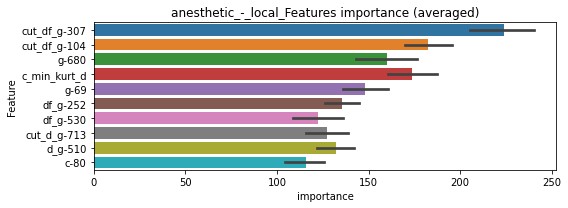

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00096067	valid_1's binary_logloss: 0.0250077


================================= fold 2/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00114779	valid_1's binary_logloss: 0.0337437
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00115606	valid_1's binary_logloss: 0.0269487
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000813471	valid_1's binary_logloss: 0.0191044


anesthetic_-_local logloss: 0.02620112965545571
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000405947	valid_1's binary_logloss: 0.00786467
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000454054	valid_1's binary_logloss: 0.00968031
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000625617	valid_1's binary_logloss: 0.00629112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000411896	valid_1's binary_logloss: 0.00405881


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031296, Threshold: 0.0145072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0145072, conf_0:0.01016, conf_1:0.01886
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_1: 0.0445072
threshold: 0.0445072, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318533, Threshold: 0.0445072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0120542 Vs.target_rate: 0.00151
Num_p_label: 48.0, Expected: 6.0, Threshold: 0.0445072, conf_0:0.03561, conf_1:0.05341
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.0745072
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.1045072
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1345072
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.1645072
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318533, Threshold: 0.1645072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.1645072, conf_0:0.14806, conf_1:0.18096
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


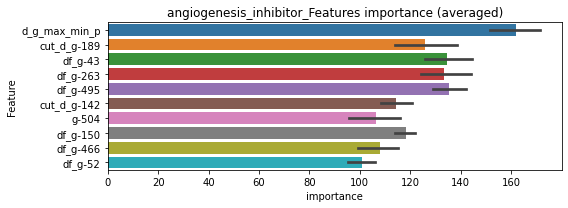

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000424997	valid_1's binary_logloss: 0.00773501


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000432076	valid_1's binary_logloss: 0.00575225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000555378	valid_1's binary_logloss: 0.00474427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00041548	valid_1's binary_logloss: 0.00386348


angiogenesis_inhibitor logloss: 0.005523752747670818
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000418584	valid_1's binary_logloss: 0.00556509
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000399961	valid_1's binary_logloss: 0.00405465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000416045	valid_1's binary_logloss: 0.00248361
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000469646	valid_1's binary_logloss: 0.00737596


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029452, Threshold: 0.0104258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0104258, conf_0:0.00730, conf_1:0.01355
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0404258
threshold: 0.0404258, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000399668	valid_1's binary_logloss: 0.00454059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000397713	valid_1's binary_logloss: 0.00382142
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000395653	valid_1's binary_logloss: 0.00279267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000411119	valid_1's binary_logloss: 0.00784232


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176026, Threshold: 0.0404258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0060271 Vs.target_rate: 0.00155
Num_p_label: 24.0, Expected: 6.2, Threshold: 0.0404258, conf_0:0.03234, conf_1:0.04851
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0704258
threshold: 0.0704258, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00039683	valid_1's binary_logloss: 0.00795515
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000392811	valid_1's binary_logloss: 0.00263301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000397313	valid_1's binary_logloss: 0.00177336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000398883	valid_1's binary_logloss: 0.00415359


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381382, Threshold: 0.0704258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.0704258, conf_0:0.06338, conf_1:0.07747
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1004258
threshold: 0.1004258, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


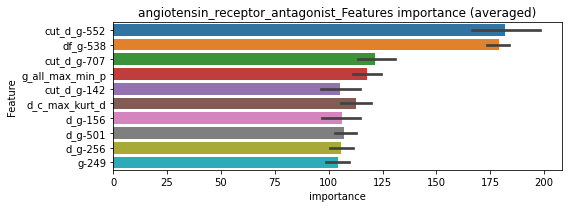

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000404189	valid_1's binary_logloss: 0.00580119


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039981	valid_1's binary_logloss: 0.0021783
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000396203	valid_1's binary_logloss: 0.00217045


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000399323	valid_1's binary_logloss: 0.00189092
Early stopping, best iteration is:
[1084]	training's binary_logloss: 0.000394263	valid_1's binary_logloss: 0.00188063


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000431407	valid_1's binary_logloss: 0.00483277


angiotensin_receptor_antagonist logloss: 0.003671636925705246
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000709731	valid_1's binary_logloss: 0.0297919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000743229	valid_1's binary_logloss: 0.0177298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00127118	valid_1's binary_logloss: 0.0416747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000643173	valid_1's binary_logloss: 0.0256803


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0079713, Threshold: 0.0830347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0830347, conf_0:0.05812, conf_1:0.10795
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_1: 0.1130347
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1430347
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1730347
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_4: 0.2030347
threshold: 0.2030347, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00063774	valid_1's binary_logloss: 0.0206896
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00065508	valid_1's binary_logloss: 0.0263997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000850047	valid_1's binary_logloss: 0.0317273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000716718	valid_1's binary_logloss: 0.0215343


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0313543, Threshold: 0.2030347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3787
p_label_rate: 0.0113009 Vs.target_rate: 0.00307
Num_p_label: 45.0, Expected: 12.2, Threshold: 0.2030347, conf_0:0.16243, conf_1:0.24364
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_1: 0.2330347
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_2: 0.2630347
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_3: 0.2930347
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_4: 0.3230347
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_5: 0.3530347
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3830347
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_7: 0.4130347
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_8: 0.4430347
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_9: 0.4730347
threshold: 0.4730347, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
===========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000957605	valid_1's binary_logloss: 0.034518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00156359	valid_1's binary_logloss: 0.034108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000578716	valid_1's binary_logloss: 0.0283533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00068037	valid_1's binary_logloss: 0.0180298


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0329758, Threshold: 0.4730347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.4730347, conf_0:0.42573, conf_1:0.52034
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.5030347
threshold: 0.5030347, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3775, y_label_rate: 0.1703311


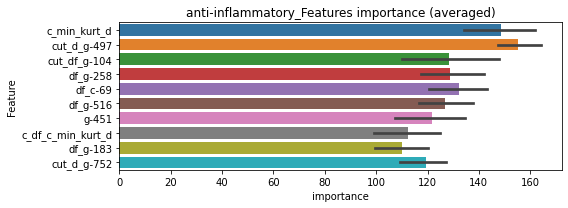

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00071397	valid_1's binary_logloss: 0.0259386


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000776895	valid_1's binary_logloss: 0.0196543


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000611349	valid_1's binary_logloss: 0.0091996


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


anti-inflammatory logloss: 0.0204779864807417


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00169866	valid_1's binary_logloss: 0.0271265


antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036358	valid_1's binary_logloss: 0.00206632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000363848	valid_1's binary_logloss: 0.00297933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000364568	valid_1's binary_logloss: 0.00335179
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018350, Threshold: 0.0057782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0057782, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0357782


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000387255	valid_1's binary_logloss: 0.00313934


threshold: 0.0357782, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0357782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0357782, conf_0:0.02862, conf_1:0.04293
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0657782


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0657782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0657782, conf_0:0.05920, conf_1:0.07236


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


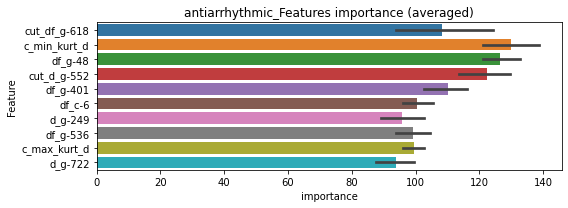

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000359867	valid_1's binary_logloss: 0.00203144


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000362432	valid_1's binary_logloss: 0.00176967


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000368825	valid_1's binary_logloss: 0.00241148


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000363277	valid_1's binary_logloss: 0.00279776


antiarrhythmic logloss: 0.0022530806415645794
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00050063	valid_1's binary_logloss: 0.0134287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000491328	valid_1's binary_logloss: 0.00595274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000476723	valid_1's binary_logloss: 0.00179719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00052383	valid_1's binary_logloss: 0.0115173


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039545, Threshold: 0.0274921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0274921, conf_0:0.01924, conf_1:0.03574
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_1: 0.0574921
Num_p_label: 12.0, Expected: 7.2, Adj_threshold_2: 0.0874921
threshold: 0.0874921, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.0874921, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0092918 Vs.target_rate: 0.00181
Num_p_label: 37.0, Expected: 7.2, Threshold: 0.0874921, conf_0:0.06999, conf_1:0.10499
Num_p_label: 26.0, Expected: 7.2, Adj_threshold_1: 0.1174921
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_2: 0.1474921
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1774921
threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.1774921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


p_label_rate: 0.0042692 Vs.target_rate: 0.00181
Num_p_label: 17.0, Expected: 7.2, Threshold: 0.1774921, conf_0:0.15974, conf_1:0.19524
threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


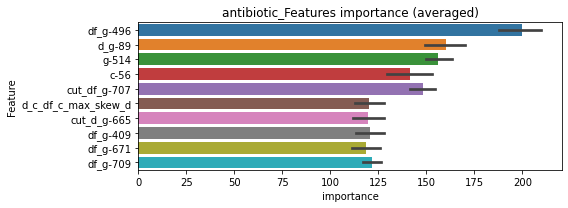

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000581128	valid_1's binary_logloss: 0.0119327


================================= fold 2/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000528768	valid_1's binary_logloss: 0.00605958


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000477379	valid_1's binary_logloss: 0.00203686


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000574555	valid_1's binary_logloss: 0.0113264


antibiotic logloss: 0.007838872136956311
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000270193	valid_1's binary_logloss: 0.00107908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000269012	valid_1's binary_logloss: 0.00215964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000281806	valid_1's binary_logloss: 0.0039961
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011744, Threshold: 0.0042642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042642, conf_0:0.00298, conf_1:0.00554
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0342642


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000281271	valid_1's binary_logloss: 0.00150459


threshold: 0.0342642, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.02741, conf_1:0.04112


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.03084, conf_1:0.03769


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


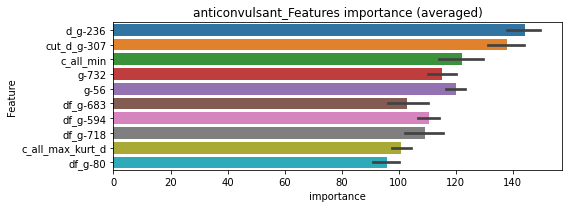

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.00027396	valid_1's binary_logloss: 0.0010614


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000276389	valid_1's binary_logloss: 0.0032059


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312775	valid_1's binary_logloss: 0.00362207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000267022	valid_1's binary_logloss: 0.00153325


anticonvulsant logloss: 0.0023553166443561822
antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000333521	valid_1's binary_logloss: 0.00244571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000349696	valid_1's binary_logloss: 0.00219507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000340671	valid_1's binary_logloss: 0.0023464
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000335681	valid_1's binary_logloss: 0.00366964


y_Threshold: 0.0016560, Threshold: 0.0047737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0047737, conf_0:0.00334, conf_1:0.00621
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0347737
threshold: 0.0347737, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.02782, conf_1:0.04173
threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.03130, conf_1:0.03825
threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


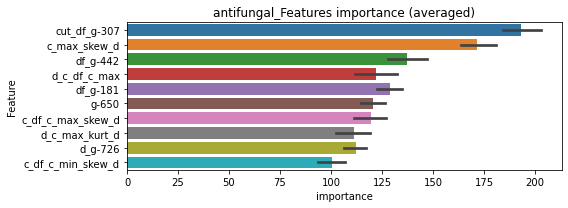

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327758	valid_1's binary_logloss: 0.00205214
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000327707	valid_1's binary_logloss: 0.00205189


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032701	valid_1's binary_logloss: 0.0018122
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000327143	valid_1's binary_logloss: 0.001812


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000337285	valid_1's binary_logloss: 0.00203393


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000324193	valid_1's binary_logloss: 0.00203547
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000325702	valid_1's binary_logloss: 0.00203513


antifungal logloss: 0.0019836332980694617
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000300837	valid_1's binary_logloss: 0.00160641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000301618	valid_1's binary_logloss: 0.00254366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000307666	valid_1's binary_logloss: 0.00128128
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000307681	valid_1's binary_logloss: 0.00365955


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015286, Threshold: 0.1284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1284315, conf_0:0.08990, conf_1:0.16696
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_1: 0.1584315
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.1884315
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.2184315
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_4: 0.2484315
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.2784315
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.3084315
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.3384315
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.3684315
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3984315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.4284315
threshold: 0.4284315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.4284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.4284315, conf_0:0.34275, conf_1:0.51412
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.4584315
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_2: 0.4884315
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_3: 0.5184315


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5484315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5784315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.6084315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_7: 0.6384315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6684315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.6984315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7284315
threshold: 0.7284315, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.7284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7284315, conf_0:0.65559, conf_1:0.80127
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.7584315
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_2: 0.7884315
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.8184315
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_4: 0.8484315
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_5: 0.8784315
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.9084315
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_7: 0.9384315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_8: 0.9684315
threshold: 0.9684315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


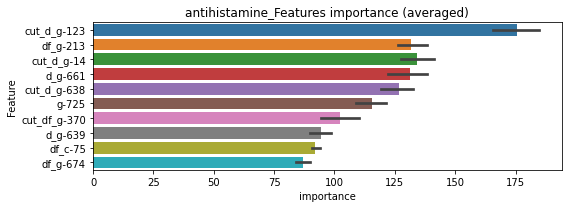

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000290493	valid_1's binary_logloss: 0.00111577
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000292502	valid_1's binary_logloss: 0.00173783
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00030276	valid_1's binary_logloss: 0.000493506
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000288492	valid_1's binary_logloss: 0.00167713


antihistamine logloss: 0.0012561654570602114
antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000319582	valid_1's binary_logloss: 0.000836848
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000321904	valid_1's binary_logloss: 0.00221019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000315665	valid_1's binary_logloss: 0.00285749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000323833	valid_1's binary_logloss: 0.00269842


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018172, Threshold: 0.0085367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0085367, conf_0:0.00598, conf_1:0.01110
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0385367
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0685367
threshold: 0.0685367, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.0685367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, Expected: 3.0, Threshold: 0.0685367, conf_0:0.05483, conf_1:0.08224
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0985367
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.1285367
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1585367
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.1885367
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.2185367


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.2485367
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.2785367
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3085367
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.3385367
threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.3385367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3385367, conf_0:0.30468, conf_1:0.37239


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


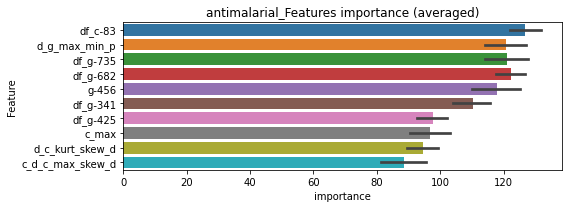

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000301865	valid_1's binary_logloss: 0.000667865


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000325919	valid_1's binary_logloss: 0.00196183
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[825]	training's binary_logloss: 0.000307368	valid_1's binary_logloss: 0.000740162


================================= fold 4/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.001401744136139545


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000310083	valid_1's binary_logloss: 0.00223711


antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000686895	valid_1's binary_logloss: 0.0324807
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000724789	valid_1's binary_logloss: 0.0300102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000638606	valid_1's binary_logloss: 0.0204495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000833808	valid_1's binary_logloss: 0.0382962


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063311, Threshold: 0.0245009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0245009, conf_0:0.01715, conf_1:0.03185
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.0545009
threshold: 0.0545009, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000666342	valid_1's binary_logloss: 0.0249014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000595045	valid_1's binary_logloss: 0.0312224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000612692	valid_1's binary_logloss: 0.0227399
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000916715	valid_1's binary_logloss: 0.0253857


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0289788, Threshold: 0.0545009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0072828 Vs.target_rate: 0.00307
Num_p_label: 29.0, Expected: 12.2, Threshold: 0.0545009, conf_0:0.04360, conf_1:0.06540
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.0845009
Num_p_label: 12.0, Expected: 12.2, Adj_threshold_2: 0.1145009
threshold: 0.1145009, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.0011624	valid_1's binary_logloss: 0.0385452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000777857	valid_1's binary_logloss: 0.0262554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000664722	valid_1's binary_logloss: 0.0231104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000591055	valid_1's binary_logloss: 0.0122879


3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0194975, Threshold: 0.1145009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.1145009, conf_0:0.10305, conf_1:0.12595
threshold: 0.1145009, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3782, y_label_rate: 0.1702803


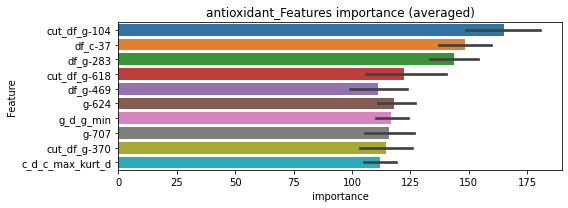

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.0010079	valid_1's binary_logloss: 0.0207826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000902215	valid_1's binary_logloss: 0.0364023


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000633211	valid_1's binary_logloss: 0.009519


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000728568	valid_1's binary_logloss: 0.0163429


antioxidant logloss: 0.020765845380187855
antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000417815	valid_1's binary_logloss: 0.00357081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000418203	valid_1's binary_logloss: 0.0053905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000428433	valid_1's binary_logloss: 0.00158723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000438563	valid_1's binary_logloss: 0.00620361


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031520, Threshold: 0.0113705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0113705, conf_0:0.00796, conf_1:0.01478
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0413705
threshold: 0.0413705, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03310, conf_1:0.04964
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03723, conf_1:0.04551
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


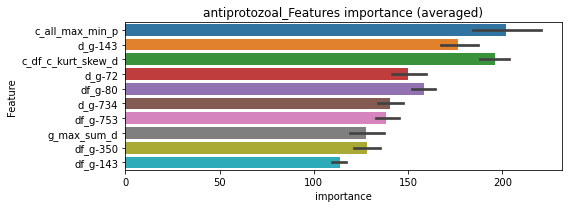

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402757	valid_1's binary_logloss: 0.00245182
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000400839	valid_1's binary_logloss: 0.00244519


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000421122	valid_1's binary_logloss: 0.00355489


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000413358	valid_1's binary_logloss: 0.00128561
Early stopping, best iteration is:
[987]	training's binary_logloss: 0.000413358	valid_1's binary_logloss: 0.00128561


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000418582	valid_1's binary_logloss: 0.00541574


antiprotozoal logloss: 0.003176738743043914
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000306219	valid_1's binary_logloss: 0.00233665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000315179	valid_1's binary_logloss: 0.000983663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000311016	valid_1's binary_logloss: 0.001009
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016440, Threshold: 0.0047377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0047377, conf_0:0.00332, conf_1:0.00616
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0347377


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000310787	valid_1's binary_logloss: 0.00219868


threshold: 0.0347377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0347377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00097
Num_p_label: 10.0, Expected: 3.8, Threshold: 0.0347377, conf_0:0.02779, conf_1:0.04169
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0647377


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0647377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00097
Num_p_label: 2.0, Expected: 3.8, Threshold: 0.0647377, conf_0:0.05826, conf_1:0.07121


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


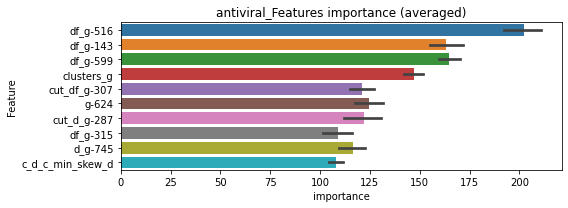

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000300544	valid_1's binary_logloss: 0.00126585


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000300634	valid_1's binary_logloss: 0.000643378
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000300634	valid_1's binary_logloss: 0.000643378


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000301442	valid_1's binary_logloss: 0.000938978
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000301442	valid_1's binary_logloss: 0.000938978


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000298658	valid_1's binary_logloss: 0.00117079


antiviral logloss: 0.0010047491188444168
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000862621	valid_1's binary_logloss: 0.0246164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000525137	valid_1's binary_logloss: 0.0199264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000504499	valid_1's binary_logloss: 0.00189393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000559861	valid_1's binary_logloss: 0.0128709


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038700, Threshold: 0.0516404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0516404, conf_0:0.03615, conf_1:0.06713
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_1: 0.0816404
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_2: 0.1116404
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_3: 0.1416404
threshold: 0.1416404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000592317	valid_1's binary_logloss: 0.0231096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000561713	valid_1's binary_logloss: 0.0187264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000505169	valid_1's binary_logloss: 0.00210109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000557375	valid_1's binary_logloss: 0.013101


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0166178, Threshold: 0.1416404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00206
Num_p_label: 47.0, Expected: 8.2, Threshold: 0.1416404, conf_0:0.11331, conf_1:0.16997
Num_p_label: 36.0, Expected: 8.2, Adj_threshold_1: 0.1716404
Num_p_label: 32.0, Expected: 8.2, Adj_threshold_2: 0.2016404
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_3: 0.2316404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_4: 0.2616404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_5: 0.2916404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_6: 0.3216404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_7: 0.3516404
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_8: 0.3816404
threshold: 0.3816404, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000491576	valid_1's binary_logloss: 0.0134185
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000543148	valid_1's binary_logloss: 0.0200518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000510232	valid_1's binary_logloss: 0.0123087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000475569	valid_1's binary_logloss: 0.0167723


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155267, Threshold: 0.3816404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0052737 Vs.target_rate: 0.00206
Num_p_label: 21.0, Expected: 8.2, Threshold: 0.3816404, conf_0:0.34348, conf_1:0.41980
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_1: 0.4116404
threshold: 0.4116404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


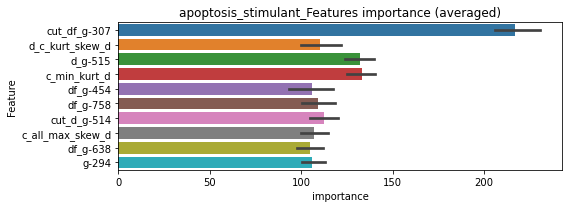

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000498591	valid_1's binary_logloss: 0.00678984


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0010481	valid_1's binary_logloss: 0.0174796
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000513389	valid_1's binary_logloss: 0.0141462


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000516041	valid_1's binary_logloss: 0.00658277


apoptosis_stimulant logloss: 0.011253217118314533
aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00051386	valid_1's binary_logloss: 0.015369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000516106	valid_1's binary_logloss: 0.0167593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000605075	valid_1's binary_logloss: 0.00865664
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000493121	valid_1's binary_logloss: 0.00545652


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037195, Threshold: 0.0118336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0118336, conf_0:0.00828, conf_1:0.01538
Num_p_label: 10.0, Expected: 7.9, Adj_threshold_1: 0.0418336
threshold: 0.0418336, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000565906	valid_1's binary_logloss: 0.0161302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000590074	valid_1's binary_logloss: 0.0198864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000518769	valid_1's binary_logloss: 0.0092998
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482737	valid_1's binary_logloss: 0.00413297


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0126361, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0042692 Vs.target_rate: 0.00197
Num_p_label: 17.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03347, conf_1:0.05020
threshold: 0.0418336, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000509244	valid_1's binary_logloss: 0.0156106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000495514	valid_1's binary_logloss: 0.00753214
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000486122	valid_1's binary_logloss: 0.00649245
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000485669	valid_1's binary_logloss: 0.00536855


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188935, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00197
Num_p_label: 16.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03765, conf_1:0.04602
threshold: 0.0418336, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


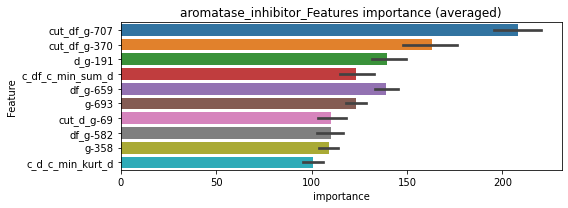

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000550348	valid_1's binary_logloss: 0.0121682


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000549443	valid_1's binary_logloss: 0.00730582


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000507589	valid_1's binary_logloss: 0.00589788


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000496542	valid_1's binary_logloss: 0.00568374


aromatase_inhibitor logloss: 0.007763920409071238
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000154	valid_1's binary_logloss: 0.000260536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000157972	valid_1's binary_logloss: 0.000565774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000153118	valid_1's binary_logloss: 0.000182664
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003764, Threshold: 0.0013820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013820, conf_0:0.00097, conf_1:0.00180
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0613820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0913820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1213820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1513820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1813820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.2113820
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.2413820


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000154379	valid_1's binary_logloss: 0.000494978


threshold: 0.2413820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.2413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.2413820, conf_0:0.19311, conf_1:0.28966
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.2713820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3013820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.3313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3613820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3913820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.4213820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.4513820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.4813820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.5113820


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5413820
threshold: 0.5413820, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.5413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.5413820, conf_0:0.48724, conf_1:0.59552
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5713820
threshold: 0.5713820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


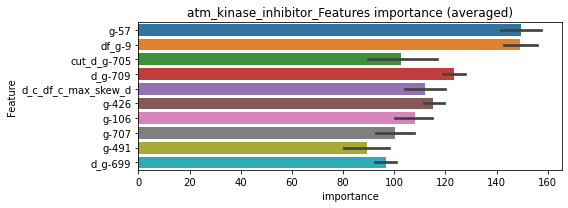

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148808	valid_1's binary_logloss: 0.000223608
Early stopping, best iteration is:
[1122]	training's binary_logloss: 0.000146717	valid_1's binary_logloss: 0.000220939


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148109	valid_1's binary_logloss: 0.000330409


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.000145259	valid_1's binary_logloss: 0.000326484
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014846	valid_1's binary_logloss: 0.000157546


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000146148	valid_1's binary_logloss: 0.000155059
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148832	valid_1's binary_logloss: 0.00046763


atm_kinase_inhibitor logloss: 0.00029069853290414994


Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000145799	valid_1's binary_logloss: 0.000460308


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000177889	valid_1's binary_logloss: 0.000733222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000180515	valid_1's binary_logloss: 0.00132257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000182947	valid_1's binary_logloss: 0.000193594
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005303, Threshold: 0.0016380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000178526	valid_1's binary_logloss: 0.00022075


p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0016380, conf_0:0.00115, conf_1:0.00213
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0316380
threshold: 0.0316380, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.0316380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0316380, conf_0:0.02531, conf_1:0.03797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0616380
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0916380
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.1216380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.1216380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.1216380, conf_0:0.10947, conf_1:0.13380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


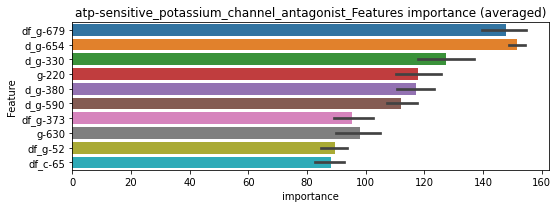

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171841	valid_1's binary_logloss: 0.000216849
Early stopping, best iteration is:
[1017]	training's binary_logloss: 0.000171654	valid_1's binary_logloss: 0.000216621


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000172911	valid_1's binary_logloss: 0.000694657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00017212	valid_1's binary_logloss: 0.000192521
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000171082	valid_1's binary_logloss: 0.000191447


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.0003249717578657185


Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000173493	valid_1's binary_logloss: 0.000197274


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000275399	valid_1's binary_logloss: 0.00106002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000267059	valid_1's binary_logloss: 0.000537844
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000267358	valid_1's binary_logloss: 0.000534944
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013214, Threshold: 0.0103970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0103970, conf_0:0.00728, conf_1:0.01352
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0403970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0703970
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.1003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1303970


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000267942	valid_1's binary_logloss: 0.000761697


threshold: 0.1303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.1303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00050
Num_p_label: 22.0, Expected: 2.0, Threshold: 0.1303970, conf_0:0.10432, conf_1:0.15648
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.1603970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.1903970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.2203970
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.2503970


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


Num_p_label: 11.0, Expected: 2.0, Adj_threshold_5: 0.2803970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.3103970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.3403970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_8: 0.3703970
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.4003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.4303970
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.4303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.4303970, conf_0:0.38736, conf_1:0.47344
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


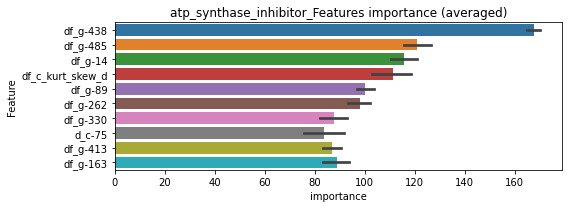

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000257261	valid_1's binary_logloss: 0.00070062
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000264424	valid_1's binary_logloss: 0.000509029
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000263915	valid_1's binary_logloss: 0.000392043
Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0005668666758058954


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000259424	valid_1's binary_logloss: 0.000665774


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370947	valid_1's binary_logloss: 0.118264
Early stopping, best iteration is:
[1514]	training's binary_logloss: 0.024378	valid_1's binary_logloss: 0.113211
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0379518	valid_1's binary_logloss: 0.100414
Early stopping, best iteration is:
[1580]	training's binary_logloss: 0.0238463	valid_1's binary_logloss: 0.0940298
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.039895	valid_1's binary_logloss: 0.0754674
[2000]	training's binary_logloss: 0.0194905	valid_1's binary_logloss: 0.0643381
[3000]	training's binary_logloss: 0.0126928	valid_1's binary_logloss: 0.0607901
Early stopping, best iteration is:
[3334]	training's binary_logloss: 0.011351	valid_1's binary_logloss: 0.0600144
Training until validation scores don't improve for 30 rounds
[1000]	training's

1 / 3, AUC score:0.991, PR-AUC:0.979
y_Threshold: 0.0378206, Threshold: 0.0802836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 631/3750
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0802836, conf_0:0.05620, conf_1:0.10437
Num_p_label: 11.0, Expected: 16.2, Adj_threshold_1: 0.1102836
threshold: 0.1102836, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 631.0/3750, y_label_rate: 0.1682667
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.032194	valid_1's binary_logloss: 0.0849199
[2000]	training's binary_logloss: 0.0158254	valid_1's binary_logloss: 0.0763365
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0150003	valid_1's binary_logloss: 0.0759277
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321038	valid_1's binary_logloss: 0.0871552
[2000]	training's binary_logloss: 0.0157945	valid_1's binary_logloss: 0.0792345
Early stopping, best iteration is:
[2014]	training's binary_logloss: 0.0156743	valid_1's binary_logloss: 0.0791742
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0336978	valid_1's binary_logloss: 0.0658115
[2000]	training's binary_logloss: 0.0164949	valid_1's binary_logloss: 0.0547937
Early stopping, best iteration is:
[2805]	training's binary_logloss: 0.0115739	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0510581, Threshold: 0.1102836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 612.0/3712
p_label_rate: 0.0040181 Vs.target_rate: 0.00407
Num_p_label: 16.0, Expected: 16.2, Threshold: 0.1102836, conf_0:0.08823, conf_1:0.13234
threshold: 0.1102836, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 612.0/3712, y_label_rate: 0.1648707
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287804	valid_1's binary_logloss: 0.0610245
[2000]	training's binary_logloss: 0.0142685	valid_1's binary_logloss: 0.0533476
Early stopping, best iteration is:
[2297]	training's binary_logloss: 0.0123643	valid_1's binary_logloss: 0.0524411
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0271077	valid_1's binary_logloss: 0.0802101
[2000]	training's binary_logloss: 0.013453	valid_1's binary_logloss: 0.0724177
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0127916	valid_1's binary_logloss: 0.0719891
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291356	valid_1's binary_logloss: 0.0566801
[2000]	training's binary_logloss: 0.0143365	valid_1's binary_logloss: 0.0478751
Early stopping, best iteration is:
[2803]	training's binary_logloss: 0.0100893	valid_1's binary_logloss: 0.0

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0409525, Threshold: 0.1102836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 603.0/3694
p_label_rate: 0.0040181 Vs.target_rate: 0.00407
Num_p_label: 16.0, Expected: 16.2, Threshold: 0.1102836, conf_0:0.09926, conf_1:0.12131
threshold: 0.1102836, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 603.0/3694, y_label_rate: 0.1632377


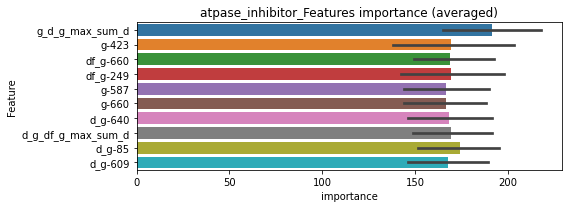

len(train_index) : 2770
len(valid_index) : 924
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356097	valid_1's binary_logloss: 0.0780557
[2000]	training's binary_logloss: 0.0184728	valid_1's binary_logloss: 0.0676758
Early stopping, best iteration is:
[2686]	training's binary_logloss: 0.0137718	valid_1's binary_logloss: 0.0653925


len(train_index) : 2770
len(valid_index) : 924
================================= fold 2/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0383204	valid_1's binary_logloss: 0.0600102
[2000]	training's binary_logloss: 0.0198587	valid_1's binary_logloss: 0.0466918
[3000]	training's binary_logloss: 0.0131701	valid_1's binary_logloss: 0.0420789
[4000]	training's binary_logloss: 0.00981918	valid_1's binary_logloss: 0.039783
Early stopping, best iteration is:
[4288]	training's binary_logloss: 0.00915619	valid_1's binary_logloss: 0.0393343


len(train_index) : 2771
len(valid_index) : 923
================================= fold 3/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389068	valid_1's binary_logloss: 0.055525
[2000]	training's binary_logloss: 0.0201953	valid_1's binary_logloss: 0.0406103
[3000]	training's binary_logloss: 0.0134245	valid_1's binary_logloss: 0.0353484
[4000]	training's binary_logloss: 0.0100006	valid_1's binary_logloss: 0.0326705
[5000]	training's binary_logloss: 0.00798723	valid_1's binary_logloss: 0.031095
Early stopping, best iteration is:
[5387]	training's binary_logloss: 0.00740323	valid_1's binary_logloss: 0.0305605


len(train_index) : 2771
len(valid_index) : 923
================================= fold 4/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.037305	valid_1's binary_logloss: 0.0660137
[2000]	training's binary_logloss: 0.0193207	valid_1's binary_logloss: 0.0533066
[3000]	training's binary_logloss: 0.0128589	valid_1's binary_logloss: 0.0488997
Early stopping, best iteration is:
[3777]	training's binary_logloss: 0.0101649	valid_1's binary_logloss: 0.0471901


atpase_inhibitor logloss: 0.04562299029444485
atpase_inhibitor is unpredictable(><)!
atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034189	valid_1's binary_logloss: 0.000993679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00033331	valid_1's binary_logloss: 0.00224811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000340941	valid_1's binary_logloss: 0.000811743
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018670, Threshold: 0.0077848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0077848, conf_0:0.00545, conf_1:0.01012
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_1: 0.0377848


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000337912	valid_1's binary_logloss: 0.00300145


Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0677848
threshold: 0.0677848, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.0677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, Expected: 3.2, Threshold: 0.0677848, conf_0:0.05423, conf_1:0.08134


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


Num_p_label: 15.0, Expected: 3.2, Adj_threshold_1: 0.0977848
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.1277848
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_3: 0.1577848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_4: 0.1877848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_5: 0.2177848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_6: 0.2477848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_7: 0.2777848
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_8: 0.3077848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_9: 0.3377848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_10: 0.3677848
threshold: 0.3677848, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.3677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.3677848, conf_0:0.33101, conf_1:0.40456
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_1: 0.3977848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.4277848
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.4577848
threshold: 0.4577848, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


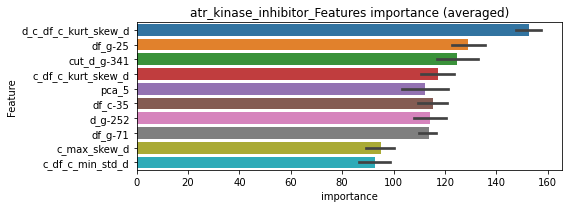

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000320299	valid_1's binary_logloss: 0.000749814


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000322478	valid_1's binary_logloss: 0.00225709


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000333935	valid_1's binary_logloss: 0.000611316


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000325236	valid_1's binary_logloss: 0.00240642


atr_kinase_inhibitor logloss: 0.0015059267250632988
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0504332	valid_1's binary_logloss: 0.114868
[2000]	training's binary_logloss: 0.0251311	valid_1's binary_logloss: 0.0908581
[3000]	training's binary_logloss: 0.0165241	valid_1's binary_logloss: 0.0827175
Early stopping, best iteration is:
[3255]	training's binary_logloss: 0.0152067	valid_1's binary_logloss: 0.0812824
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0511547	valid_1's binary_logloss: 0.0994838
[2000]	training's binary_logloss: 0.0255346	valid_1's binary_logloss: 0.0718639
[3000]	training's binary_logloss: 0.0167922	valid_1's binary_logloss: 0.06162
[4000]	training's binary_logloss: 0.0124985	valid_1's binary_logloss: 0.0557951
[5000]	training's binary_logloss: 0.00994627	valid_1's binary_logloss: 0.05223
[6000]	training's binary_logloss: 0.00828445	valid_1's binary_logloss: 0.0497776
[7000]	training's binary_logloss: 0.00712094	v

1 / 3, AUC score:0.993, PR-AUC:0.985
y_Threshold: 0.0479522, Threshold: 0.1838949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 638/3765
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1838949, conf_0:0.12873, conf_1:0.23906
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_1: 0.2138949
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_2: 0.2438949
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_3: 0.2738949
threshold: 0.2738949, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 638.0/3765, y_label_rate: 0.1694555
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0447822	valid_1's binary_logloss: 0.107516
[2000]	training's binary_logloss: 0.0221496	valid_1's binary_logloss: 0.0852146
[3000]	training's binary_logloss: 0.0145974	valid_1's binary_logloss: 0.0774533
Early stopping, best iteration is:
[3447]	training's binary_logloss: 0.0126787	valid_1's binary_logloss: 0.0752157
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0449158	valid_1's binary_logloss: 0.0949015
[2000]	training's binary_logloss: 0.022295	valid_1's binary_logloss: 0.0714141
[3000]	training's binary_logloss: 0.0147189	valid_1's binary_logloss: 0.0625792
[4000]	training's binary_logloss: 0.0109799	valid_1's binary_logloss: 0.0583777
[5000]	training's binary_logloss: 0.00877008	valid_1's binary_logloss: 0.0554476
Early stopping, best iteration is:
[5032]	training's binary_logloss: 0.00871252	valid_1's binary_logloss: 0.0553155
Training

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0841976, Threshold: 0.2738949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 623.0/3735
p_label_rate: 0.0120542 Vs.target_rate: 0.00403
Num_p_label: 48.0, Expected: 16.1, Threshold: 0.2738949, conf_0:0.21912, conf_1:0.32867
Num_p_label: 41.0, Expected: 16.1, Adj_threshold_1: 0.3038949
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_2: 0.3338949
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_3: 0.3638949
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_4: 0.3938949
threshold: 0.3938949, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 623.0/3735, y_label_rate: 0.1668005
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0428554	valid_1's binary_logloss: 0.0891833
[2000]	training's binary_logloss: 0.0212552	valid_1's binary_logloss: 0.0671465
[3000]	training's binary_logloss: 0.0140295	valid_1's binary_logloss: 0.0590871
[4000]	training's binary_logloss: 0.0104843	valid_1's binary_logloss: 0.0551062
[5000]	training's binary_logloss: 0.00838123	valid_1's binary_logloss: 0.0522857
Early stopping, best iteration is:
[5430]	training's binary_logloss: 0.00771125	valid_1's binary_logloss: 0.0513724
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0433281	valid_1's binary_logloss: 0.0905362
[2000]	training's binary_logloss: 0.0213355	valid_1's binary_logloss: 0.0640195
[3000]	training's binary_logloss: 0.0140888	valid_1's binary_logloss: 0.0540595
[4000]	training's binary_logloss: 0.0105328	valid_1's binary_logloss: 0.0488672
[5000]	training's binary_logloss: 0.00841

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0840776, Threshold: 0.3938949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 618.0/3725
p_label_rate: 0.0065294 Vs.target_rate: 0.00403
Num_p_label: 26.0, Expected: 16.1, Threshold: 0.3938949, conf_0:0.35451, conf_1:0.43328
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_1: 0.4238949
threshold: 0.4238949, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 618.0/3725, y_label_rate: 0.1659060


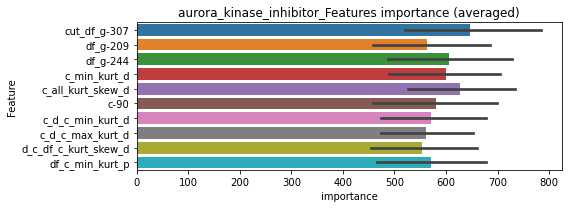

len(train_index) : 2793
len(valid_index) : 932
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0587091	valid_1's binary_logloss: 0.112822
[2000]	training's binary_logloss: 0.0298164	valid_1's binary_logloss: 0.0816937
[3000]	training's binary_logloss: 0.0198131	valid_1's binary_logloss: 0.0698571
[4000]	training's binary_logloss: 0.0147981	valid_1's binary_logloss: 0.0635245
[5000]	training's binary_logloss: 0.0118389	valid_1's binary_logloss: 0.0593906
[6000]	training's binary_logloss: 0.00986121	valid_1's binary_logloss: 0.0564441
[7000]	training's binary_logloss: 0.00845959	valid_1's binary_logloss: 0.05442
Early stopping, best iteration is:
[7253]	training's binary_logloss: 0.00816485	valid_1's binary_logloss: 0.053987


len(train_index) : 2794
len(valid_index) : 931
================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0612525	valid_1's binary_logloss: 0.0972606
[2000]	training's binary_logloss: 0.0312979	valid_1's binary_logloss: 0.0647963
[3000]	training's binary_logloss: 0.0207144	valid_1's binary_logloss: 0.0522451
[4000]	training's binary_logloss: 0.0154785	valid_1's binary_logloss: 0.0458557
[5000]	training's binary_logloss: 0.0123573	valid_1's binary_logloss: 0.0418901
[6000]	training's binary_logloss: 0.0102847	valid_1's binary_logloss: 0.0389558
[7000]	training's binary_logloss: 0.00882457	valid_1's binary_logloss: 0.0368827
[8000]	training's binary_logloss: 0.00773785	valid_1's binary_logloss: 0.0351785
[9000]	training's binary_logloss: 0.00689666	valid_1's binary_logloss: 0.0338527
[10000]	training's binary_logloss: 0.00622965	valid_1's binary_logloss: 0.032825
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00622965	valid_1's binary_logloss: 0.032825


len(train_index) : 2794
len(valid_index) : 931
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.060647	valid_1's binary_logloss: 0.0951924
[2000]	training's binary_logloss: 0.0310472	valid_1's binary_logloss: 0.0619009
[3000]	training's binary_logloss: 0.0207086	valid_1's binary_logloss: 0.0489488
[4000]	training's binary_logloss: 0.0154739	valid_1's binary_logloss: 0.0420629
[5000]	training's binary_logloss: 0.0123848	valid_1's binary_logloss: 0.0377753
[6000]	training's binary_logloss: 0.0103083	valid_1's binary_logloss: 0.0345772
[7000]	training's binary_logloss: 0.0088617	valid_1's binary_logloss: 0.032444
[8000]	training's binary_logloss: 0.00776664	valid_1's binary_logloss: 0.0306845
[9000]	training's binary_logloss: 0.00693423	valid_1's binary_logloss: 0.029314
[10000]	training's binary_logloss: 0.00626072	valid_1's binary_logloss: 0.0281255
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00626072	valid_1's binary_logloss: 0.0281255


len(train_index) : 2794
len(valid_index) : 931
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0615772	valid_1's binary_logloss: 0.0961008
[2000]	training's binary_logloss: 0.0312038	valid_1's binary_logloss: 0.0645016
[3000]	training's binary_logloss: 0.020692	valid_1's binary_logloss: 0.0523818
[4000]	training's binary_logloss: 0.0154359	valid_1's binary_logloss: 0.0458583
[5000]	training's binary_logloss: 0.0123149	valid_1's binary_logloss: 0.0417538
[6000]	training's binary_logloss: 0.0102448	valid_1's binary_logloss: 0.0388765
[7000]	training's binary_logloss: 0.00879088	valid_1's binary_logloss: 0.0367738
[8000]	training's binary_logloss: 0.00770656	valid_1's binary_logloss: 0.0350981
[9000]	training's binary_logloss: 0.00687127	valid_1's binary_logloss: 0.033754
[10000]	training's binary_logloss: 0.00620591	valid_1's binary_logloss: 0.0326961
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00620591	valid_1's binary_logloss: 0.0326961


aurora_kinase_inhibitor logloss: 0.03691298511061844
aurora_kinase_inhibitor is unpredictable(><)!
autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00016207	valid_1's binary_logloss: 0.000240223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000165465	valid_1's binary_logloss: 0.0015519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000166417	valid_1's binary_logloss: 0.000202617
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005543, Threshold: 0.0042101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0042101, conf_0:0.00295, conf_1:0.00547
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0342101
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0642101
threshold: 0.0642101, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000162438	valid_1's binary_logloss: 0.000263095


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.0642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0107986 Vs.target_rate: 0.00025
Num_p_label: 43.0, Expected: 1.0, Threshold: 0.0642101, conf_0:0.05137, conf_1:0.07705
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_1: 0.0942101
Num_p_label: 32.0, Expected: 1.0, Adj_threshold_2: 0.1242101
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_3: 0.1542101
Num_p_label: 28.0, Expected: 1.0, Adj_threshold_4: 0.1842101
Num_p_label: 22.0, Expected: 1.0, Adj_threshold_5: 0.2142101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.2442101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_7: 0.2742101


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


Num_p_label: 16.0, Expected: 1.0, Adj_threshold_8: 0.3042101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3342101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_10: 0.3642101
threshold: 0.3642101, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.3642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00025
Num_p_label: 14.0, Expected: 1.0, Threshold: 0.3642101, conf_0:0.32779, conf_1:0.40063
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_1: 0.3942101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_2: 0.4242101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_3: 0.4542101
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.4842101
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.5142101
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.5442101
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.5742101


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.6042101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.6342101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.6642101
threshold: 0.6642101, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


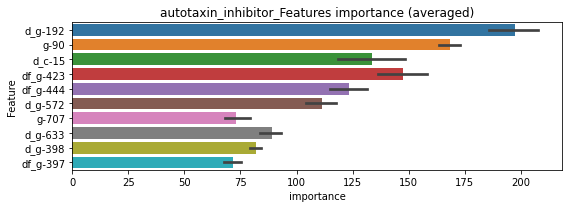

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150529	valid_1's binary_logloss: 0.000517176
Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000147894	valid_1's binary_logloss: 0.000512354


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152642	valid_1's binary_logloss: 0.000183569


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1127]	training's binary_logloss: 0.000150789	valid_1's binary_logloss: 0.000181367
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152753	valid_1's binary_logloss: 0.000158622


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1159]	training's binary_logloss: 0.000149927	valid_1's binary_logloss: 0.00015576
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152892	valid_1's binary_logloss: 0.000171262
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000152224	valid_1's binary_logloss: 0.000170515


autotaxin_inhibitor logloss: 0.0002550672374270517
bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000724653	valid_1's binary_logloss: 0.0326461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00117698	valid_1's binary_logloss: 0.0300991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000550522	valid_1's binary_logloss: 0.00380268
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000628515	valid_1's binary_logloss: 0.0185971


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0072684, Threshold: 0.0240325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0240325, conf_0:0.01682, conf_1:0.03124
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_1: 0.0540325
threshold: 0.0540325, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000632017	valid_1's binary_logloss: 0.017125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000534291	valid_1's binary_logloss: 0.0222518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000559558	valid_1's binary_logloss: 0.0170414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000695483	valid_1's binary_logloss: 0.0250899


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0313949, Threshold: 0.0540325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0110497 Vs.target_rate: 0.00252
Num_p_label: 44.0, Expected: 10.0, Threshold: 0.0540325, conf_0:0.04323, conf_1:0.06484
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_1: 0.0840325
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1140325
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1440325
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000607169	valid_1's binary_logloss: 0.0180508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000914418	valid_1's binary_logloss: 0.028274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000607512	valid_1's binary_logloss: 0.0145562
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000516503	valid_1's binary_logloss: 0.00861982


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0315935, Threshold: 0.1440325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1440325, conf_0:0.12963, conf_1:0.15844
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3784, y_label_rate: 0.1704545


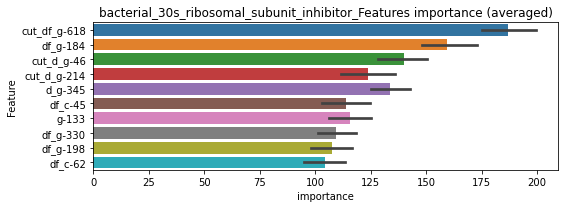

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000643323	valid_1's binary_logloss: 0.0145314


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000801422	valid_1's binary_logloss: 0.0187439


================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000540764	valid_1's binary_logloss: 0.0116312


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.0007108	valid_1's binary_logloss: 0.0187678


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.015918574051845633
bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00129673	valid_1's binary_logloss: 0.0455049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00115196	valid_1's binary_logloss: 0.0240139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00173709	valid_1's binary_logloss: 0.0369984
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0124266, Threshold: 0.0312871, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00203157	valid_1's binary_logloss: 0.0534913


Remove_noisy_data: 150 → Positive_corect_labels: 647/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0312871, conf_0:0.02190, conf_1:0.04067
Num_p_label: 14.0, Expected: 13.4, Adj_threshold_1: 0.0612871
threshold: 0.0612871, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00120227	valid_1's binary_logloss: 0.0279927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000872178	valid_1's binary_logloss: 0.0264724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000694109	valid_1's binary_logloss: 0.0183202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000802067	valid_1's binary_logloss: 0.0287219


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0370858, Threshold: 0.0612871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3780
p_label_rate: 0.0090407 Vs.target_rate: 0.00336
Num_p_label: 36.0, Expected: 13.4, Threshold: 0.0612871, conf_0:0.04903, conf_1:0.07354
Num_p_label: 20.0, Expected: 13.4, Adj_threshold_1: 0.0912871
threshold: 0.0912871, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 643.0/3780, y_label_rate: 0.1701058
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000625724	valid_1's binary_logloss: 0.0246281
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000843588	valid_1's binary_logloss: 0.0285723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00068765	valid_1's binary_logloss: 0.0172206
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000620926	valid_1's binary_logloss: 0.0211007


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297883, Threshold: 0.0912871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 640.0/3774
p_label_rate: 0.0047715 Vs.target_rate: 0.00336
Num_p_label: 19.0, Expected: 13.4, Threshold: 0.0912871, conf_0:0.08216, conf_1:0.10042
threshold: 0.0912871, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3774, y_label_rate: 0.1695813


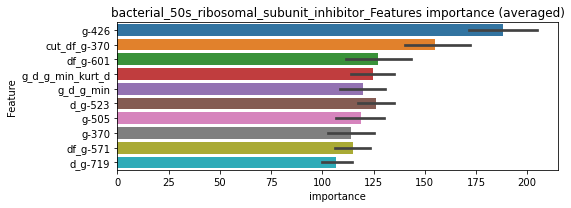

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.00061781	valid_1's binary_logloss: 0.0182896


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000955943	valid_1's binary_logloss: 0.0262192


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000695582	valid_1's binary_logloss: 0.0136963


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.021987348527301012


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00150002	valid_1's binary_logloss: 0.0297438


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000438836	valid_1's binary_logloss: 0.00525582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000430252	valid_1's binary_logloss: 0.009092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000439064	valid_1's binary_logloss: 0.00331118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000427781	valid_1's binary_logloss: 0.00447511


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029435, Threshold: 0.0174206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0174206, conf_0:0.01219, conf_1:0.02265
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0474206
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0774206
threshold: 0.0774206, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449207, Threshold: 0.0774206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0115520 Vs.target_rate: 0.00151
Num_p_label: 46.0, Expected: 6.0, Threshold: 0.0774206, conf_0:0.06194, conf_1:0.09290
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.1074206
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_2: 0.1374206
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.1674206
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_4: 0.1974206
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_5: 0.2274206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_6: 0.2574206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_7: 0.2874206
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_8: 0.3174206
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_9: 0.3474206
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_10: 0.3774206
threshold: 0.3774206, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449207, Threshold: 0.3774206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.3774206, conf_0:0.33968, conf_1:0.41516
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.4074206
threshold: 0.4074206, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


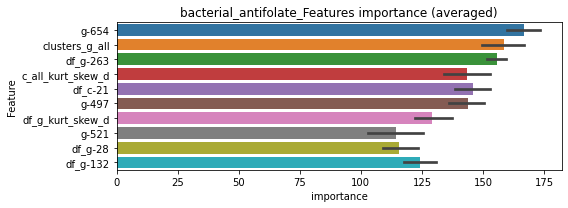

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000426956	valid_1's binary_logloss: 0.00369414


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000409614	valid_1's binary_logloss: 0.00774034
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000410216	valid_1's binary_logloss: 0.00773832


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000444319	valid_1's binary_logloss: 0.00287601


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000432676	valid_1's binary_logloss: 0.00349782


bacterial_antifolate logloss: 0.004455827387015866


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 5973
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 5973


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.0155655	valid_1's binary_logloss: 0.100441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.0143771	valid_1's binary_logloss: 0.110923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00979837	valid_1's binary_logloss: 0.0939151
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.984, PR-AUC:0.967
y_Threshold: 0.0261515, Threshold: 0.0370879, pos_neg_ratio: 0.8000000
Remove_noisy_data: 368 → Positive_corect_labels: 1130/6799


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0131529	valid_1's binary_logloss: 0.0914167


p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.02596, conf_1:0.04821
threshold: 0.0370879, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1130.0/6799, y_label_rate: 0.1662009
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00662887	valid_1's binary_logloss: 0.0664299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00604102	valid_1's binary_logloss: 0.0706719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00604699	valid_1's binary_logloss: 0.0598683
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.991


Early stopping, best iteration is:
[382]	training's binary_logloss: 0.00356111	valid_1's binary_logloss: 0.067892


y_Threshold: 0.0266211, Threshold: 0.0370879, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1079.0/6697
p_label_rate: 0.0097941 Vs.target_rate: 0.00806
Num_p_label: 39.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.02967, conf_1:0.04451
threshold: 0.0370879, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1079.0/6697, y_label_rate: 0.1611169
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00127391	valid_1's binary_logloss: 0.0257204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00278654	valid_1's binary_logloss: 0.0377019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00441882	valid_1's binary_logloss: 0.058055
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0246201, Threshold: 0.0370879, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 1051.0/6641
p_label_rate: 0.0090407 Vs.target_rate: 0.00806
Num_p_label: 36.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.03338, conf_1:0.04080


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00503772	valid_1's binary_logloss: 0.0504467


threshold: 0.0370879, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 1051.0/6641, y_label_rate: 0.1582593


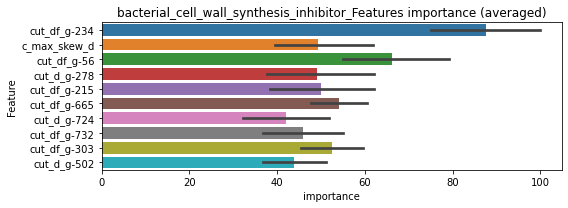

len(train_index) : 4980
len(valid_index) : 1661
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00243901	valid_1's binary_logloss: 0.0307049
Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[142]	training's binary_logloss: 0.00350666	valid_1's binary_logloss: 0.0333883
Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00146288	valid_1's binary_logloss: 0.0248695
Training until validation scores don't improve for 30 rounds


bacterial_cell_wall_synthesis_inhibitor logloss: 0.027016938097671125


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00127109	valid_1's binary_logloss: 0.0191028


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347609	valid_1's binary_logloss: 0.0932995
[2000]	training's binary_logloss: 0.0171195	valid_1's binary_logloss: 0.085055
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0162009	valid_1's binary_logloss: 0.0846646
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340876	valid_1's binary_logloss: 0.0986864
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.0226386	valid_1's binary_logloss: 0.093782
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0367963	valid_1's binary_logloss: 0.0744633
[2000]	training's binary_logloss: 0.0180769	valid_1's binary_logloss: 0.0647969
[3000]	training's binary_logloss: 0.0117618	valid_1's binary_logloss: 0.0619202
Early stopping, best iteration is:
[3396]	training's binary_logloss: 0.0103216	valid_1's binary_logloss: 0.06

1 / 3, AUC score:0.991, PR-AUC:0.981
y_Threshold: 0.0362455, Threshold: 0.0724030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 171 → Positive_corect_labels: 635/3759
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0724030, conf_0:0.05068, conf_1:0.09412
Num_p_label: 10.0, Expected: 14.9, Adj_threshold_1: 0.1024030
threshold: 0.1024030, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 635.0/3759, y_label_rate: 0.1689279
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0297917	valid_1's binary_logloss: 0.0749156
Early stopping, best iteration is:
[1686]	training's binary_logloss: 0.0175356	valid_1's binary_logloss: 0.0683801
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0296871	valid_1's binary_logloss: 0.0765336
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.0178936	valid_1's binary_logloss: 0.0697445
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301575	valid_1's binary_logloss: 0.0671111
[2000]	training's binary_logloss: 0.0148721	valid_1's binary_logloss: 0.0572046
[3000]	training's binary_logloss: 0.00975679	valid_1's binary_logloss: 0.0538699
Early stopping, best iteration is:
[3823]	training's binary_logloss: 0.00759275	valid_1's binary_logloss: 0.0523969
Training until validation scores don't improve for 30 rounds
[1000]	tr

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0536544, Threshold: 0.1024030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 619.0/3727
p_label_rate: 0.0110497 Vs.target_rate: 0.00374
Num_p_label: 44.0, Expected: 14.9, Threshold: 0.1024030, conf_0:0.08192, conf_1:0.12288
Num_p_label: 10.0, Expected: 14.9, Adj_threshold_1: 0.1324030
threshold: 0.1324030, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 619.0/3727, y_label_rate: 0.1660853
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.025761	valid_1's binary_logloss: 0.0641144
[2000]	training's binary_logloss: 0.0128717	valid_1's binary_logloss: 0.0554484
Early stopping, best iteration is:
[2796]	training's binary_logloss: 0.0091408	valid_1's binary_logloss: 0.052915
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261136	valid_1's binary_logloss: 0.0591903
[2000]	training's binary_logloss: 0.0129892	valid_1's binary_logloss: 0.0508239
Early stopping, best iteration is:
[2248]	training's binary_logloss: 0.0115238	valid_1's binary_logloss: 0.0500203
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270141	valid_1's binary_logloss: 0.0582892
[2000]	training's binary_logloss: 0.013474	valid_1's binary_logloss: 0.0485214
[3000]	training's binary_logloss: 0.00885276	valid_1's binary_logloss: 0.0449521
Early stopping, best iteratio

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0439506, Threshold: 0.1324030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 609.0/3707
p_label_rate: 0.0042692 Vs.target_rate: 0.00374
Num_p_label: 17.0, Expected: 14.9, Threshold: 0.1324030, conf_0:0.11916, conf_1:0.14564
threshold: 0.1324030, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 609.0/3707, y_label_rate: 0.1642838


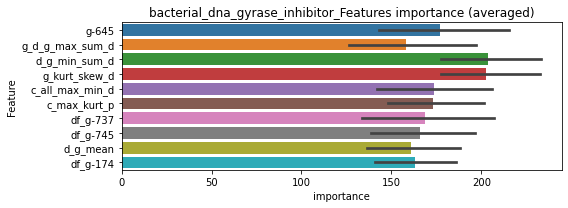

len(train_index) : 2780
len(valid_index) : 927
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322997	valid_1's binary_logloss: 0.069366
[2000]	training's binary_logloss: 0.0168046	valid_1's binary_logloss: 0.0583557
Early stopping, best iteration is:
[2888]	training's binary_logloss: 0.0117003	valid_1's binary_logloss: 0.0546859


len(train_index) : 2780
len(valid_index) : 927
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0336004	valid_1's binary_logloss: 0.0633554
[2000]	training's binary_logloss: 0.0174386	valid_1's binary_logloss: 0.0519156
[3000]	training's binary_logloss: 0.0116417	valid_1's binary_logloss: 0.0483908
Early stopping, best iteration is:
[3137]	training's binary_logloss: 0.011108	valid_1's binary_logloss: 0.04806


len(train_index) : 2780
len(valid_index) : 927
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356687	valid_1's binary_logloss: 0.0504547
[2000]	training's binary_logloss: 0.0185467	valid_1's binary_logloss: 0.0376661
[3000]	training's binary_logloss: 0.0123543	valid_1's binary_logloss: 0.0333854
[4000]	training's binary_logloss: 0.00922506	valid_1's binary_logloss: 0.031311
Early stopping, best iteration is:
[4477]	training's binary_logloss: 0.00822915	valid_1's binary_logloss: 0.0306516


len(train_index) : 2781
len(valid_index) : 926
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353915	valid_1's binary_logloss: 0.0515063
[2000]	training's binary_logloss: 0.0183861	valid_1's binary_logloss: 0.0374595
[3000]	training's binary_logloss: 0.0122473	valid_1's binary_logloss: 0.032865
[4000]	training's binary_logloss: 0.00916363	valid_1's binary_logloss: 0.0304696
Early stopping, best iteration is:
[4659]	training's binary_logloss: 0.00786922	valid_1's binary_logloss: 0.0296131


bacterial_dna_gyrase_inhibitor logloss: 0.04075563429477841
bacterial_dna_gyrase_inhibitor is unpredictable(><)!


mutually exclusive columns: bacterial_dna_inhibitor


bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 2020


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0779965	valid_1's binary_logloss: 0.206675
Early stopping, best iteration is:
[1624]	training's binary_logloss: 0.0491584	valid_1's binary_logloss: 0.188291
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0829877	valid_1's binary_logloss: 0.167153
[2000]	training's binary_logloss: 0.04243	valid_1's binary_logloss: 0.132757
[3000]	training's binary_logloss: 0.0279591	valid_1's binary_logloss: 0.118449
[4000]	training's binary_logloss: 0.0207197	valid_1's binary_logloss: 0.111501
Early stopping, best iteration is:
[4515]	training's binary_logloss: 0.0183048	valid_1's binary_logloss: 0.109073
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0832024	valid_1's binary_logloss: 0.171776
[2000]	training's binary_logloss: 0.0425522	valid_1's binary_logloss: 0.139075
[3000]	training's binary_logloss: 0.02

1 / 3, AUC score:0.969, PR-AUC:0.938
y_Threshold: 0.0917062, Threshold: 0.1591696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 157 → Positive_corect_labels: 366/2267
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.1591696, conf_0:0.11142, conf_1:0.20692
Num_p_label: 19.0, Expected: 19.2, Adj_threshold_1: 0.1891696
threshold: 0.1891696, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 366.0/2267, y_label_rate: 0.1614468
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.066419	valid_1's binary_logloss: 0.153375
[2000]	training's binary_logloss: 0.03343	valid_1's binary_logloss: 0.121065
[3000]	training's binary_logloss: 0.0222099	valid_1's binary_logloss: 0.109977
[4000]	training's binary_logloss: 0.0165255	valid_1's binary_logloss: 0.104153
Early stopping, best iteration is:
[4227]	training's binary_logloss: 0.0156204	valid_1's binary_logloss: 0.103046
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0669358	valid_1's binary_logloss: 0.159568
[2000]	training's binary_logloss: 0.0336359	valid_1's binary_logloss: 0.131648
Early stopping, best iteration is:
[2284]	training's binary_logloss: 0.0294245	valid_1's binary_logloss: 0.127785
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0689917	valid_1's binary_logloss: 0.12856
[2000]	training's binary_logloss: 0.0348

2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.1068729, Threshold: 0.1891696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 347.0/2229
p_label_rate: 0.0052737 Vs.target_rate: 0.00483
Num_p_label: 21.0, Expected: 19.2, Threshold: 0.1891696, conf_0:0.15134, conf_1:0.22700
threshold: 0.1891696, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 347.0/2229, y_label_rate: 0.1556752
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0607118	valid_1's binary_logloss: 0.153837
[2000]	training's binary_logloss: 0.0307103	valid_1's binary_logloss: 0.126433
[3000]	training's binary_logloss: 0.0203853	valid_1's binary_logloss: 0.116465
Early stopping, best iteration is:
[3567]	training's binary_logloss: 0.0170849	valid_1's binary_logloss: 0.113216
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0617588	valid_1's binary_logloss: 0.150344
[2000]	training's binary_logloss: 0.0313778	valid_1's binary_logloss: 0.116921
[3000]	training's binary_logloss: 0.0207218	valid_1's binary_logloss: 0.10387
[4000]	training's binary_logloss: 0.0154291	valid_1's binary_logloss: 0.0966102
Early stopping, best iteration is:
[4657]	training's binary_logloss: 0.0132186	valid_1's binary_logloss: 0.0936882
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0984411, Threshold: 0.1891696, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 336.0/2207
p_label_rate: 0.0045203 Vs.target_rate: 0.00483
Num_p_label: 18.0, Expected: 19.2, Threshold: 0.1891696, conf_0:0.17025, conf_1:0.20809
threshold: 0.1891696, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 336.0/2207, y_label_rate: 0.1522429


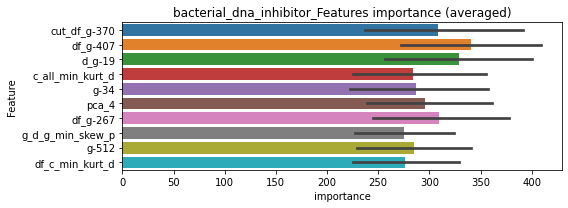

len(train_index) : 1655
len(valid_index) : 552
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0822571	valid_1's binary_logloss: 0.157099
[2000]	training's binary_logloss: 0.0429201	valid_1's binary_logloss: 0.120672
[3000]	training's binary_logloss: 0.0286608	valid_1's binary_logloss: 0.105871
[4000]	training's binary_logloss: 0.0214481	valid_1's binary_logloss: 0.0978622
[5000]	training's binary_logloss: 0.0171576	valid_1's binary_logloss: 0.093181
Early stopping, best iteration is:
[4995]	training's binary_logloss: 0.0171723	valid_1's binary_logloss: 0.0931574


len(train_index) : 1655
len(valid_index) : 552
================================= fold 2/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0842599	valid_1's binary_logloss: 0.148594
[2000]	training's binary_logloss: 0.0441332	valid_1's binary_logloss: 0.107982
[3000]	training's binary_logloss: 0.029582	valid_1's binary_logloss: 0.0923355
[4000]	training's binary_logloss: 0.0221264	valid_1's binary_logloss: 0.0839306
[5000]	training's binary_logloss: 0.0177134	valid_1's binary_logloss: 0.0789165
[6000]	training's binary_logloss: 0.0147419	valid_1's binary_logloss: 0.0754919
[7000]	training's binary_logloss: 0.0126451	valid_1's binary_logloss: 0.073054
[8000]	training's binary_logloss: 0.0110793	valid_1's binary_logloss: 0.0710747
Early stopping, best iteration is:
[7994]	training's binary_logloss: 0.0110859	valid_1's binary_logloss: 0.0710684


len(train_index) : 1655
len(valid_index) : 552
================================= fold 3/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0865633	valid_1's binary_logloss: 0.139165
[2000]	training's binary_logloss: 0.0453546	valid_1's binary_logloss: 0.100108
[3000]	training's binary_logloss: 0.0302576	valid_1's binary_logloss: 0.0850224
[4000]	training's binary_logloss: 0.022579	valid_1's binary_logloss: 0.0774189
[5000]	training's binary_logloss: 0.0180071	valid_1's binary_logloss: 0.0726485
[6000]	training's binary_logloss: 0.0149847	valid_1's binary_logloss: 0.0693501
[7000]	training's binary_logloss: 0.0128324	valid_1's binary_logloss: 0.0669307
Early stopping, best iteration is:
[7049]	training's binary_logloss: 0.0127424	valid_1's binary_logloss: 0.0667584


len(train_index) : 1656
len(valid_index) : 551
================================= fold 4/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0843089	valid_1's binary_logloss: 0.154874
[2000]	training's binary_logloss: 0.0442292	valid_1's binary_logloss: 0.115934
[3000]	training's binary_logloss: 0.0295426	valid_1's binary_logloss: 0.101265
[4000]	training's binary_logloss: 0.0220063	valid_1's binary_logloss: 0.0933983
Early stopping, best iteration is:
[4821]	training's binary_logloss: 0.0182375	valid_1's binary_logloss: 0.089659


bacterial_dna_inhibitor logloss: 0.08015648478874307
bacterial_dna_inhibitor is unpredictable(><)!
bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000289556	valid_1's binary_logloss: 0.00112774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000284769	valid_1's binary_logloss: 0.00291237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000296577	valid_1's binary_logloss: 0.000529757
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014733, Threshold: 0.0037130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0037130, conf_0:0.00260, conf_1:0.00483
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0337130


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000299556	valid_1's binary_logloss: 0.00234247


threshold: 0.0337130, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.02697, conf_1:0.04046


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.03034, conf_1:0.03708


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


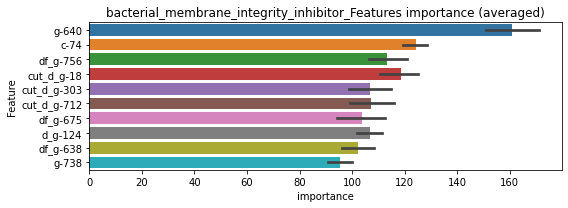

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000284277	valid_1's binary_logloss: 0.000791884


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000293563	valid_1's binary_logloss: 0.00283528


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000286032	valid_1's binary_logloss: 0.000558193


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000278579	valid_1's binary_logloss: 0.00227406


bacterial_membrane_integrity_inhibitor logloss: 0.00161494308152057
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000408752	valid_1's binary_logloss: 0.00683347
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000397346	valid_1's binary_logloss: 0.0103882
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.00116731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402611	valid_1's binary_logloss: 0.00399045


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026365, Threshold: 0.0122576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0122576, conf_0:0.00858, conf_1:0.01593
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_1: 0.0422576
threshold: 0.0422576, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000385978	valid_1's binary_logloss: 0.00679559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000422315	valid_1's binary_logloss: 0.00956877
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000386704	valid_1's binary_logloss: 0.000901964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000374152	valid_1's binary_logloss: 0.00509628


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199874, Threshold: 0.0422576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00130
Num_p_label: 32.0, Expected: 5.2, Threshold: 0.0422576, conf_0:0.03381, conf_1:0.05071
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0722576
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_2: 0.1022576
threshold: 0.1022576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000389009	valid_1's binary_logloss: 0.0077523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000383834	valid_1's binary_logloss: 0.00234204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384846	valid_1's binary_logloss: 0.00187084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000375328	valid_1's binary_logloss: 0.00146123


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0371260, Threshold: 0.1022576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.1022576, conf_0:0.09203, conf_1:0.11248
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.1322576
threshold: 0.1322576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


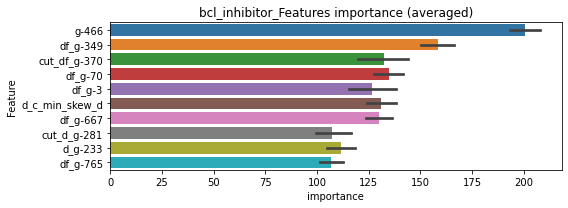

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000374556	valid_1's binary_logloss: 0.00468929


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000386648	valid_1's binary_logloss: 0.00307346


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[942]	training's binary_logloss: 0.000379521	valid_1's binary_logloss: 0.00244199


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000387431	valid_1's binary_logloss: 0.00159192


bcl_inhibitor logloss: 0.002949521838362011
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000443812	valid_1's binary_logloss: 0.010414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000444016	valid_1's binary_logloss: 0.00490266
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000452303	valid_1's binary_logloss: 0.00119795
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000461322	valid_1's binary_logloss: 0.00714455


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029941, Threshold: 0.0555999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0555999, conf_0:0.03892, conf_1:0.07228
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_1: 0.0855999
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_2: 0.1155999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_3: 0.1455999
Num_p_label: 14.0, Expected: 6.4, Adj_threshold_4: 0.1755999
threshold: 0.1755999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000427973	valid_1's binary_logloss: 0.0105043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000436183	valid_1's binary_logloss: 0.00448414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000438151	valid_1's binary_logloss: 0.00113687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000427603	valid_1's binary_logloss: 0.00742258


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0291257, Threshold: 0.1755999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0140633 Vs.target_rate: 0.00160
Num_p_label: 56.0, Expected: 6.4, Threshold: 0.1755999, conf_0:0.14048, conf_1:0.21072
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_1: 0.2055999
Num_p_label: 51.0, Expected: 6.4, Adj_threshold_2: 0.2355999
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_3: 0.2655999
Num_p_label: 44.0, Expected: 6.4, Adj_threshold_4: 0.2955999
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_5: 0.3255999
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_6: 0.3555999
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_7: 0.3855999
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_8: 0.4155999
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_9: 0.4455999
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_10: 0.4755999
threshold: 0.4755999, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000424348	valid_1's binary_logloss: 0.00365446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000575075	valid_1's binary_logloss: 0.00919752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430526	valid_1's binary_logloss: 0.008626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000445661	valid_1's binary_logloss: 0.00336214


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0583727, Threshold: 0.4755999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0065294 Vs.target_rate: 0.00160
Num_p_label: 26.0, Expected: 6.4, Threshold: 0.4755999, conf_0:0.42804, conf_1:0.52316
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_1: 0.5055999
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_2: 0.5355999
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_3: 0.5655999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_4: 0.5955999
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_5: 0.6255999
threshold: 0.6255999, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


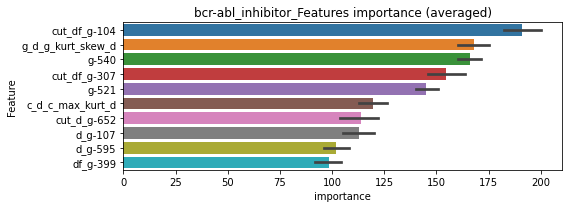

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000429162	valid_1's binary_logloss: 0.00383215


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000423943	valid_1's binary_logloss: 0.00288738


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000434974	valid_1's binary_logloss: 0.00554471


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00043083	valid_1's binary_logloss: 0.00175324


bcr-abl_inhibitor logloss: 0.003506193971089375
benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00115052	valid_1's binary_logloss: 0.0293143
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00079441	valid_1's binary_logloss: 0.0323256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000570989	valid_1's binary_logloss: 0.010798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00063498	valid_1's binary_logloss: 0.0244338


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0072282, Threshold: 0.0170890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0170890, conf_0:0.01196, conf_1:0.02222
Num_p_label: 10.0, Expected: 11.2, Adj_threshold_1: 0.0470890
threshold: 0.0470890, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000553914	valid_1's binary_logloss: 0.0275817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000548845	valid_1's binary_logloss: 0.024284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000562238	valid_1's binary_logloss: 0.00865633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00054903	valid_1's binary_logloss: 0.0121587


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303102, Threshold: 0.0470890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0045203 Vs.target_rate: 0.00281
Num_p_label: 18.0, Expected: 11.2, Threshold: 0.0470890, conf_0:0.03767, conf_1:0.05651
Num_p_label: 13.0, Expected: 11.2, Adj_threshold_1: 0.0770890
threshold: 0.0770890, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000720332	valid_1's binary_logloss: 0.0244905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000573312	valid_1's binary_logloss: 0.0193041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.0006189	valid_1's binary_logloss: 0.023512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00058112	valid_1's binary_logloss: 0.0101057


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238261, Threshold: 0.0770890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0027624 Vs.target_rate: 0.00281
Num_p_label: 11.0, Expected: 11.2, Threshold: 0.0770890, conf_0:0.06938, conf_1:0.08480
threshold: 0.0770890, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3793, y_label_rate: 0.1716320


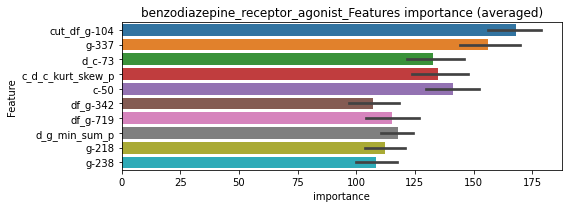

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000585705	valid_1's binary_logloss: 0.023626


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000858072	valid_1's binary_logloss: 0.0173899


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00062456	valid_1's binary_logloss: 0.0135065


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000630817	valid_1's binary_logloss: 0.0140841


benzodiazepine_receptor_agonist logloss: 0.017153323198337934
beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000356796	valid_1's binary_logloss: 0.00141694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000357528	valid_1's binary_logloss: 0.00417412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000360692	valid_1's binary_logloss: 0.0010827
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000357027	valid_1's binary_logloss: 0.00524421


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017754, Threshold: 0.0087557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0087557, conf_0:0.00613, conf_1:0.01138
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0387557
threshold: 0.0387557, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158098, Threshold: 0.0387557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


Num_p_label: 20.0, Expected: 4.0, Threshold: 0.0387557, conf_0:0.03100, conf_1:0.04651
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0687557
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_2: 0.0987557
threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0157944, Threshold: 0.0987557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0987557, conf_0:0.08888, conf_1:0.10863


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


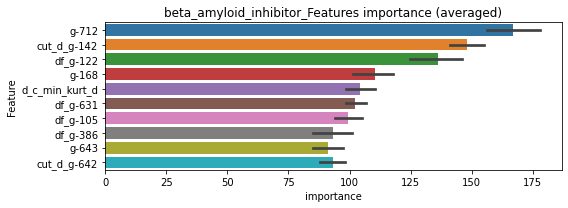

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000366461	valid_1's binary_logloss: 0.00153428


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000366449	valid_1's binary_logloss: 0.00383463


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000368453	valid_1's binary_logloss: 0.00120497


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000397391	valid_1's binary_logloss: 0.00496733


beta_amyloid_inhibitor logloss: 0.002885302555081801
bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000749385	valid_1's binary_logloss: 0.0340935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000642748	valid_1's binary_logloss: 0.0299681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00060665	valid_1's binary_logloss: 0.00723085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000640489	valid_1's binary_logloss: 0.017084


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0057754, Threshold: 0.0152204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0152204, conf_0:0.01065, conf_1:0.01979
Num_p_label: 6.0, Expected: 11.4, Adj_threshold_1: 0.0452204
threshold: 0.0452204, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00072303	valid_1's binary_logloss: 0.027782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00131079	valid_1's binary_logloss: 0.0273219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000610584	valid_1's binary_logloss: 0.00544609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000605814	valid_1's binary_logloss: 0.0157661


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318074, Threshold: 0.0452204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00286
Num_p_label: 27.0, Expected: 11.4, Threshold: 0.0452204, conf_0:0.03618, conf_1:0.05426
Num_p_label: 10.0, Expected: 11.4, Adj_threshold_1: 0.0752204
threshold: 0.0752204, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00085341	valid_1's binary_logloss: 0.0283523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000732182	valid_1's binary_logloss: 0.0274384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000599869	valid_1's binary_logloss: 0.0127021
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000614981	valid_1's binary_logloss: 0.0210838


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211866, Threshold: 0.0752204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0030136 Vs.target_rate: 0.00286
Num_p_label: 12.0, Expected: 11.4, Threshold: 0.0752204, conf_0:0.06770, conf_1:0.08274
threshold: 0.0752204, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


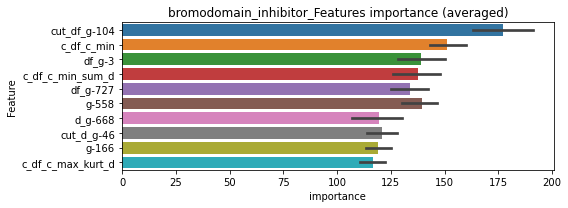

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000787303	valid_1's binary_logloss: 0.0202334


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00145147	valid_1's binary_logloss: 0.026782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000633341	valid_1's binary_logloss: 0.0161413


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000727832	valid_1's binary_logloss: 0.0168848


bromodomain_inhibitor logloss: 0.02001222953492085
btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000399742	valid_1's binary_logloss: 0.00770931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000399078	valid_1's binary_logloss: 0.00376342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000392236	valid_1's binary_logloss: 0.00190306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000383595	valid_1's binary_logloss: 0.0019679


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029157, Threshold: 0.0223795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0223795, conf_0:0.01567, conf_1:0.02909
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_1: 0.0523795
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_2: 0.0823795
threshold: 0.0823795, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178647, Threshold: 0.0823795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00122
Num_p_label: 20.0, Expected: 4.8, Threshold: 0.0823795, conf_0:0.06590, conf_1:0.09886
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_1: 0.1123795
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.1423795
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178647, Threshold: 0.1423795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00122
Num_p_label: 11.0, Expected: 4.8, Threshold: 0.1423795, conf_0:0.12814, conf_1:0.15662
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


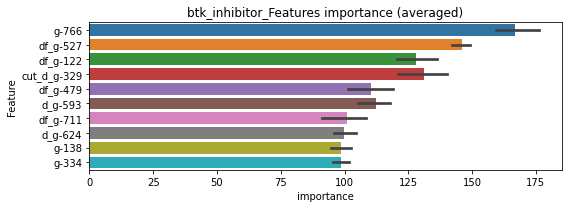

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000402805	valid_1's binary_logloss: 0.00624488


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000405982	valid_1's binary_logloss: 0.00323057


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00038112	valid_1's binary_logloss: 0.00122481
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000381153	valid_1's binary_logloss: 0.00122473


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000376638	valid_1's binary_logloss: 0.00189733
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000371568	valid_1's binary_logloss: 0.0018825


btk_inhibitor logloss: 0.0031457551216858655
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000247461	valid_1's binary_logloss: 0.000948648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000253546	valid_1's binary_logloss: 0.00125534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000252139	valid_1's binary_logloss: 0.000373391
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011931, Threshold: 0.0145597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0145597, conf_0:0.01019, conf_1:0.01893
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0445597
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0745597
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1045597


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247754	valid_1's binary_logloss: 0.000913194


threshold: 0.1045597, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


y_Threshold: 0.1172744, Threshold: 0.1045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00050
Num_p_label: 45.0, Expected: 2.0, Threshold: 0.1045597, conf_0:0.08365, conf_1:0.12547
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_1: 0.1345597
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_2: 0.1645597
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_3: 0.1945597
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_4: 0.2245597
Num_p_label: 33.0, Expected: 2.0, Adj_threshold_5: 0.2545597
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_6: 0.2845597
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_7: 0.3145597
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_8: 0.3445597
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_9: 0.3745597
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_10: 0.4045597
threshold: 0.4045597, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3812, y_label_rate: 0.1723

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.4045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00050
Num_p_label: 25.0, Expected: 2.0, Threshold: 0.4045597, conf_0:0.36410, conf_1:0.44502
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.4345597
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.4645597
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.4945597
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.5245597
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.5545597
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.5845597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


Num_p_label: 12.0, Expected: 2.0, Adj_threshold_7: 0.6145597
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6445597
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.6745597
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.7045597
threshold: 0.7045597, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


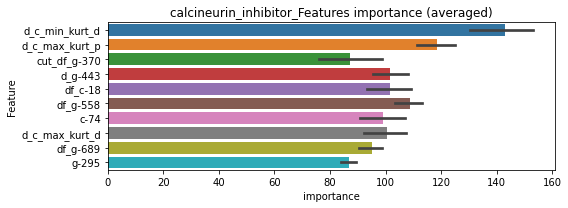

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000234553	valid_1's binary_logloss: 0.000427552
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000235955	valid_1's binary_logloss: 0.000970477


================================= fold 3/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000239188	valid_1's binary_logloss: 0.000367106
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0005818330846156365


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000238854	valid_1's binary_logloss: 0.000562197
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6395
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6395


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0502356	valid_1's binary_logloss: 0.145652
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.0459942	valid_1's binary_logloss: 0.144498
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0497401	valid_1's binary_logloss: 0.151305
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.0494486	valid_1's binary_logloss: 0.151265
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0516474	valid_1's binary_logloss: 0.130488
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.0304748	valid_1's binary_logloss: 0.125315
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0500335	valid_1's binary_logloss: 0.148925
Early stopping, best iteration is:
[1116]	training's binary_logloss: 0.0448754	valid_1's binary_lo

1 / 3, AUC score:0.951, PR-AUC:0.910
y_Threshold: 0.0672209, Threshold: 0.0999358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 612 → Positive_corect_labels: 1101/7062
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.0999358, conf_0:0.06996, conf_1:0.12992
threshold: 0.0999358, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1101.0/7062, y_label_rate: 0.1559048
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263905	valid_1's binary_logloss: 0.0762842
Early stopping, best iteration is:
[1658]	training's binary_logloss: 0.015644	valid_1's binary_logloss: 0.0731421
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263084	valid_1's binary_logloss: 0.0778482
Early stopping, best iteration is:
[1204]	training's binary_logloss: 0.0217945	valid_1's binary_logloss: 0.0759847
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0272578	valid_1's binary_logloss: 0.0620871
[2000]	training's binary_logloss: 0.0132913	valid_1's binary_logloss: 0.0568517
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0126712	valid_1's binary_logloss: 0.0565309
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278649	valid_1's binary_logloss: 0.0545788
[2000]	train

2 / 3, AUC score:0.994, PR-AUC:0.982
y_Threshold: 0.0496181, Threshold: 0.0999358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 130 → Positive_corect_labels: 1036.0/6932
p_label_rate: 0.0027624 Vs.target_rate: 0.01180
Num_p_label: 11.0, Expected: 47.0, Threshold: 0.0999358, conf_0:0.07995, conf_1:0.11992
threshold: 0.0999358, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 1036.0/6932, y_label_rate: 0.1494518
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0173111	valid_1's binary_logloss: 0.0336449
[2000]	training's binary_logloss: 0.00862909	valid_1's binary_logloss: 0.0274747
[3000]	training's binary_logloss: 0.00567825	valid_1's binary_logloss: 0.0253605
Early stopping, best iteration is:
[3779]	training's binary_logloss: 0.00447726	valid_1's binary_logloss: 0.0245986
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0174188	valid_1's binary_logloss: 0.0303115
[2000]	training's binary_logloss: 0.00865328	valid_1's binary_logloss: 0.0243256
[3000]	training's binary_logloss: 0.00566752	valid_1's binary_logloss: 0.0223123
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00466602	valid_1's binary_logloss: 0.0216949
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0158616	valid_1's binary_logloss: 0.0440664
Early stopping, best 

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0327331, Threshold: 0.0999358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1014.0/6888
p_label_rate: 0.0007534 Vs.target_rate: 0.01180
Num_p_label: 3.0, Expected: 47.0, Threshold: 0.0999358, conf_0:0.08994, conf_1:0.10993
threshold: 0.0999358, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 1014.0/6888, y_label_rate: 0.1472125


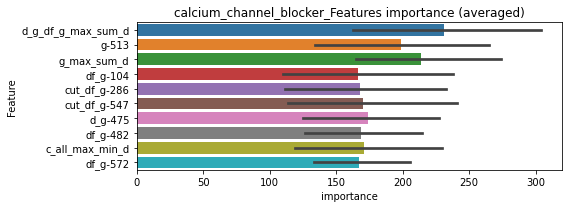

len(train_index) : 5166
len(valid_index) : 1722
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0192197	valid_1's binary_logloss: 0.0246907
[2000]	training's binary_logloss: 0.00989775	valid_1's binary_logloss: 0.0156201
[3000]	training's binary_logloss: 0.00663209	valid_1's binary_logloss: 0.0125932
[4000]	training's binary_logloss: 0.00498172	valid_1's binary_logloss: 0.011129
[5000]	training's binary_logloss: 0.00399152	valid_1's binary_logloss: 0.0102345
[6000]	training's binary_logloss: 0.00333469	valid_1's binary_logloss: 0.00965401
Early stopping, best iteration is:
[6860]	training's binary_logloss: 0.00292192	valid_1's binary_logloss: 0.00928695


len(train_index) : 5166
len(valid_index) : 1722
================================= fold 2/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0192095	valid_1's binary_logloss: 0.024245
[2000]	training's binary_logloss: 0.00983042	valid_1's binary_logloss: 0.0149321
[3000]	training's binary_logloss: 0.00659565	valid_1's binary_logloss: 0.0117971
[4000]	training's binary_logloss: 0.00493943	valid_1's binary_logloss: 0.0101481
[5000]	training's binary_logloss: 0.00396988	valid_1's binary_logloss: 0.00919174
[6000]	training's binary_logloss: 0.00331627	valid_1's binary_logloss: 0.00851833
[7000]	training's binary_logloss: 0.00285099	valid_1's binary_logloss: 0.0080546
[8000]	training's binary_logloss: 0.00250546	valid_1's binary_logloss: 0.00768277
[9000]	training's binary_logloss: 0.00223632	valid_1's binary_logloss: 0.00739
[10000]	training's binary_logloss: 0.00202278	valid_1's binary_logloss: 0.00718159
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00202278	valid_1's binary_logloss: 0.007181

len(train_index) : 5166
len(valid_index) : 1722
================================= fold 3/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0171579	valid_1's binary_logloss: 0.033868
[2000]	training's binary_logloss: 0.00867411	valid_1's binary_logloss: 0.0262362
[3000]	training's binary_logloss: 0.00580654	valid_1's binary_logloss: 0.0237793
[4000]	training's binary_logloss: 0.00436256	valid_1's binary_logloss: 0.0228511
Early stopping, best iteration is:
[4225]	training's binary_logloss: 0.00413462	valid_1's binary_logloss: 0.022713


len(train_index) : 5166
len(valid_index) : 1722
================================= fold 4/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0189975	valid_1's binary_logloss: 0.0247199
[2000]	training's binary_logloss: 0.00975203	valid_1's binary_logloss: 0.0159199
[3000]	training's binary_logloss: 0.00654055	valid_1's binary_logloss: 0.0129796
[4000]	training's binary_logloss: 0.00491104	valid_1's binary_logloss: 0.0115277
[5000]	training's binary_logloss: 0.00394321	valid_1's binary_logloss: 0.0106686
[6000]	training's binary_logloss: 0.00329875	valid_1's binary_logloss: 0.0101206
[7000]	training's binary_logloss: 0.00283443	valid_1's binary_logloss: 0.00971539
[8000]	training's binary_logloss: 0.00249257	valid_1's binary_logloss: 0.00938802
[9000]	training's binary_logloss: 0.00222517	valid_1's binary_logloss: 0.00916988
[10000]	training's binary_logloss: 0.00201422	valid_1's binary_logloss: 0.00897519
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00201422	valid_1's binary_logloss: 0.008

calcium_channel_blocker logloss: 0.012039174204622331
cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00048955	valid_1's binary_logloss: 0.0146271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000481406	valid_1's binary_logloss: 0.00577685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000481259	valid_1's binary_logloss: 0.00243359
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000506884	valid_1's binary_logloss: 0.00998499


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037238, Threshold: 0.0145616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0145616, conf_0:0.01019, conf_1:0.01893
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_1: 0.0445616
threshold: 0.0445616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.0445616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00176
Num_p_label: 29.0, Expected: 7.0, Threshold: 0.0445616, conf_0:0.03565, conf_1:0.05347
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.0745616
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_2: 0.1045616
threshold: 0.1045616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.1045616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00176
Num_p_label: 11.0, Expected: 7.0, Threshold: 0.1045616, conf_0:0.09411, conf_1:0.11502
threshold: 0.1045616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


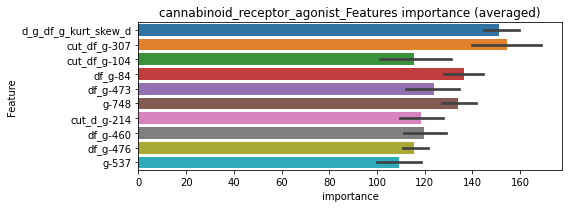

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.0005181	valid_1's binary_logloss: 0.013246


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000500904	valid_1's binary_logloss: 0.0061164


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.00049152	valid_1's binary_logloss: 0.00228775


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000500946	valid_1's binary_logloss: 0.0092212


cannabinoid_receptor_agonist logloss: 0.0077181344495816295
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00162379	valid_1's binary_logloss: 0.0285605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000549732	valid_1's binary_logloss: 0.0192662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000541675	valid_1's binary_logloss: 0.00961959
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000612026	valid_1's binary_logloss: 0.0255456


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0057189, Threshold: 0.0206289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0206289, conf_0:0.01444, conf_1:0.02682
Num_p_label: 15.0, Expected: 9.2, Adj_threshold_1: 0.0506289
threshold: 0.0506289, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00101858	valid_1's binary_logloss: 0.0271532
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000576581	valid_1's binary_logloss: 0.0109615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000522432	valid_1's binary_logloss: 0.00927225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000528634	valid_1's binary_logloss: 0.0162774


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188368, Threshold: 0.0506289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0060271 Vs.target_rate: 0.00231
Num_p_label: 24.0, Expected: 9.2, Threshold: 0.0506289, conf_0:0.04050, conf_1:0.06075
Num_p_label: 14.0, Expected: 9.2, Adj_threshold_1: 0.0806289
threshold: 0.0806289, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000567135	valid_1's binary_logloss: 0.0160821
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000646142	valid_1's binary_logloss: 0.0109647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000526838	valid_1's binary_logloss: 0.00679273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00056509	valid_1's binary_logloss: 0.0160983


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130921, Threshold: 0.0806289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0042692 Vs.target_rate: 0.00231
Num_p_label: 17.0, Expected: 9.2, Threshold: 0.0806289, conf_0:0.07257, conf_1:0.08869
threshold: 0.0806289, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


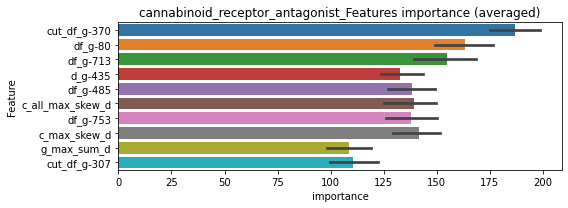

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00100097	valid_1's binary_logloss: 0.0155674
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000995757	valid_1's binary_logloss: 0.0237939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000536672	valid_1's binary_logloss: 0.00387358


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000526031	valid_1's binary_logloss: 0.0107842


cannabinoid_receptor_antagonist logloss: 0.013505008165384495
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467783	valid_1's binary_logloss: 0.00697155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000485256	valid_1's binary_logloss: 0.00394066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000457815	valid_1's binary_logloss: 0.00172856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000488864	valid_1's binary_logloss: 0.0133226


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0032689, Threshold: 0.0261061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0261061, conf_0:0.01827, conf_1:0.03394
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0561061
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0861061
threshold: 0.0861061, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.0861061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.0861061, conf_0:0.06888, conf_1:0.10333
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.1161061
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.1461061
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.1761061
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.2061061
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.2061061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.2061061, conf_0:0.18550, conf_1:0.22672
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


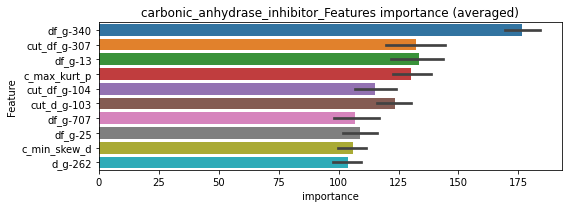

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000472391	valid_1's binary_logloss: 0.00548239


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000473958	valid_1's binary_logloss: 0.00313895


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000468807	valid_1's binary_logloss: 0.00143556


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000535124	valid_1's binary_logloss: 0.0123923


carbonic_anhydrase_inhibitor logloss: 0.005612293026683688
casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039819	valid_1's binary_logloss: 0.00840014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390586	valid_1's binary_logloss: 0.00311233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000409055	valid_1's binary_logloss: 0.00124985
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000398678	valid_1's binary_logloss: 0.0124354


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022210, Threshold: 0.0057150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0057150, conf_0:0.00400, conf_1:0.00743
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0357150
threshold: 0.0357150, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.02857, conf_1:0.04286
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.03214, conf_1:0.03929
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


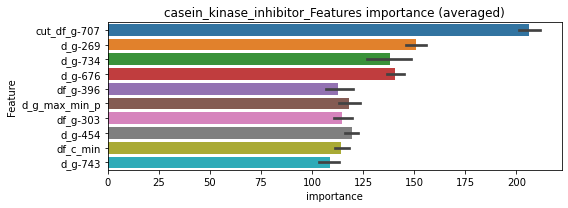

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000394669	valid_1's binary_logloss: 0.00751247


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000389845	valid_1's binary_logloss: 0.00259203
Early stopping, best iteration is:
[988]	training's binary_logloss: 0.000389845	valid_1's binary_logloss: 0.00259203


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396704	valid_1's binary_logloss: 0.00112877
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000396704	valid_1's binary_logloss: 0.00112877


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00941339


casein_kinase_inhibitor logloss: 0.005161607291896477
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000291714	valid_1's binary_logloss: 0.001666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000293028	valid_1's binary_logloss: 0.00124441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0002972	valid_1's binary_logloss: 0.00183409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013201, Threshold: 0.0154419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0154419, conf_0:0.01081, conf_1:0.02007
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0454419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0754419
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1054419
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1354419


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000292045	valid_1's binary_logloss: 0.000711778


Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1654419
threshold: 0.1654419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.1654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00076
Num_p_label: 19.0, Expected: 3.0, Threshold: 0.1654419, conf_0:0.13235, conf_1:0.19853
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.1954419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.2254419
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.2554419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2854419
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.3154419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3454419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3754419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.4054419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4354419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_10: 0.4654419
threshold: 0.4654419, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.4654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00076
Num_p_label: 10.0, Expected: 3.0, Threshold: 0.4654419, conf_0:0.41890, conf_1:0.51199


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.4954419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.5254419
threshold: 0.5254419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


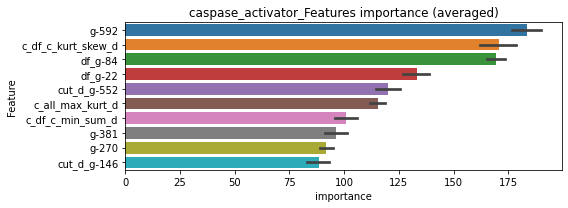

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000283102	valid_1's binary_logloss: 0.000680909


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000281167	valid_1's binary_logloss: 0.000765126


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000289934	valid_1's binary_logloss: 0.00220307


================================= fold 4/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000287112	valid_1's binary_logloss: 0.000648465


caspase_activator logloss: 0.0010742087221100325
catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000300892	valid_1's binary_logloss: 0.00235806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030148	valid_1's binary_logloss: 0.00129317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000301082	valid_1's binary_logloss: 0.000533716
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016696, Threshold: 0.0090984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0090984, conf_0:0.00637, conf_1:0.01183
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0390984


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00030142	valid_1's binary_logloss: 0.00746218


threshold: 0.0390984, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.0390984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.0390984, conf_0:0.03128, conf_1:0.04692
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0690984
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0990984
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1290984


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.1290984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1290984, conf_0:0.11619, conf_1:0.14201


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


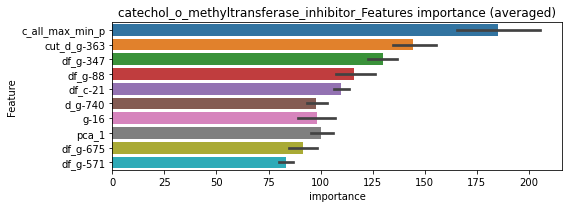

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00029354	valid_1's binary_logloss: 0.00112373


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000294396	valid_1's binary_logloss: 0.00100272


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000296076	valid_1's binary_logloss: 0.000434837


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000294353	valid_1's binary_logloss: 0.00486197


catechol_o_methyltransferase_inhibitor logloss: 0.0018559392774225385
cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0364393	valid_1's binary_logloss: 0.126498
Early stopping, best iteration is:
[1148]	training's binary_logloss: 0.0317763	valid_1's binary_logloss: 0.124954
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389242	valid_1's binary_logloss: 0.10338
Early stopping, best iteration is:
[1668]	training's binary_logloss: 0.0230649	valid_1's binary_logloss: 0.0957333
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.040139	valid_1's binary_logloss: 0.0817921
[2000]	training's binary_logloss: 0.0197256	valid_1's binary_logloss: 0.0730625
Early stopping, best iteration is:
[2068]	training's binary_logloss: 0.0190349	valid_1's binary_logloss: 0.0727414
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0395278	valid_1's binary_logloss: 0.0871994
Early stopping, 

1 / 3, AUC score:0.986, PR-AUC:0.969
y_Threshold: 0.0483626, Threshold: 0.1040166, pos_neg_ratio: 0.8000000
Remove_noisy_data: 204 → Positive_corect_labels: 619/3728
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.1040166, conf_0:0.07281, conf_1:0.13522
Num_p_label: 18.0, Expected: 17.1, Adj_threshold_1: 0.1340166
threshold: 0.1340166, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 619.0/3728, y_label_rate: 0.1660408
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285968	valid_1's binary_logloss: 0.0839709
Early stopping, best iteration is:
[1923]	training's binary_logloss: 0.014903	valid_1's binary_logloss: 0.0755962
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0305102	valid_1's binary_logloss: 0.0599477
[2000]	training's binary_logloss: 0.0151521	valid_1's binary_logloss: 0.0500956
Early stopping, best iteration is:
[2645]	training's binary_logloss: 0.0113484	valid_1's binary_logloss: 0.0477593
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0300912	valid_1's binary_logloss: 0.0649356
[2000]	training's binary_logloss: 0.0149685	valid_1's binary_logloss: 0.0575578
Early stopping, best iteration is:
[2116]	training's binary_logloss: 0.014121	valid_1's binary_logloss: 0.0570077
Training until validation scores don't improve for 30 rounds
[1000]	traini

2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0574007, Threshold: 0.1340166, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 599.0/3688
p_label_rate: 0.0105475 Vs.target_rate: 0.00428
Num_p_label: 42.0, Expected: 17.1, Threshold: 0.1340166, conf_0:0.10721, conf_1:0.16082
Num_p_label: 26.0, Expected: 17.1, Adj_threshold_1: 0.1640166
Num_p_label: 15.0, Expected: 17.1, Adj_threshold_2: 0.1940166
threshold: 0.1940166, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 599.0/3688, y_label_rate: 0.1624187
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243948	valid_1's binary_logloss: 0.0679468
Early stopping, best iteration is:
[1659]	training's binary_logloss: 0.0147667	valid_1's binary_logloss: 0.0622394
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255188	valid_1's binary_logloss: 0.0481627
[2000]	training's binary_logloss: 0.0127942	valid_1's binary_logloss: 0.0382623
[3000]	training's binary_logloss: 0.00846566	valid_1's binary_logloss: 0.0350347
Early stopping, best iteration is:
[3623]	training's binary_logloss: 0.00700499	valid_1's binary_logloss: 0.0340951
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262964	valid_1's binary_logloss: 0.0446763
[2000]	training's binary_logloss: 0.0131281	valid_1's binary_logloss: 0.0341005
[3000]	training's binary_logloss: 0.00873217	valid_1's binary_logloss: 0.0304034
[4000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0475354, Threshold: 0.1940166, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 587.0/3664
p_label_rate: 0.0040181 Vs.target_rate: 0.00428
Num_p_label: 16.0, Expected: 17.1, Threshold: 0.1940166, conf_0:0.17461, conf_1:0.21342
threshold: 0.1940166, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 587.0/3664, y_label_rate: 0.1602074


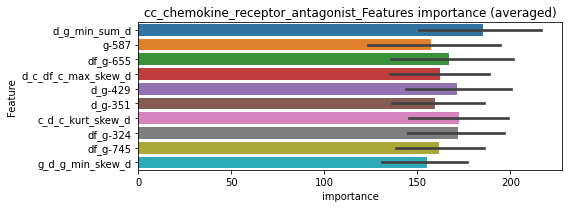

len(train_index) : 2748
len(valid_index) : 916
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323095	valid_1's binary_logloss: 0.0508869
[2000]	training's binary_logloss: 0.0166512	valid_1's binary_logloss: 0.0377003
[3000]	training's binary_logloss: 0.0111852	valid_1's binary_logloss: 0.0332044
[4000]	training's binary_logloss: 0.00839562	valid_1's binary_logloss: 0.0309942
Early stopping, best iteration is:
[4613]	training's binary_logloss: 0.00729606	valid_1's binary_logloss: 0.0301969


len(train_index) : 2748
len(valid_index) : 916
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309597	valid_1's binary_logloss: 0.0631476
[2000]	training's binary_logloss: 0.0158789	valid_1's binary_logloss: 0.0512819
[3000]	training's binary_logloss: 0.0106116	valid_1's binary_logloss: 0.0477364
Early stopping, best iteration is:
[3331]	training's binary_logloss: 0.00955212	valid_1's binary_logloss: 0.0470238


len(train_index) : 2748
len(valid_index) : 916
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333088	valid_1's binary_logloss: 0.0459901
[2000]	training's binary_logloss: 0.0172257	valid_1's binary_logloss: 0.0312036
[3000]	training's binary_logloss: 0.0115611	valid_1's binary_logloss: 0.0263508
[4000]	training's binary_logloss: 0.00868215	valid_1's binary_logloss: 0.0240416
[5000]	training's binary_logloss: 0.00697107	valid_1's binary_logloss: 0.0225887
[6000]	training's binary_logloss: 0.00582178	valid_1's binary_logloss: 0.0216065
Early stopping, best iteration is:
[6820]	training's binary_logloss: 0.00513462	valid_1's binary_logloss: 0.0210395


len(train_index) : 2748
len(valid_index) : 916
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0324069	valid_1's binary_logloss: 0.0544466
[2000]	training's binary_logloss: 0.0166731	valid_1's binary_logloss: 0.0402137
[3000]	training's binary_logloss: 0.0111563	valid_1's binary_logloss: 0.0353858
[4000]	training's binary_logloss: 0.00838592	valid_1's binary_logloss: 0.0327767
[5000]	training's binary_logloss: 0.0067331	valid_1's binary_logloss: 0.0314735
[6000]	training's binary_logloss: 0.00561826	valid_1's binary_logloss: 0.030444
Early stopping, best iteration is:
[6106]	training's binary_logloss: 0.00552147	valid_1's binary_logloss: 0.0303299


cc_chemokine_receptor_antagonist logloss: 0.0321475163793538
cc_chemokine_receptor_antagonist is unpredictable(><)!
cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000309292	valid_1's binary_logloss: 0.00163279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000312886	valid_1's binary_logloss: 0.00216559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000306231	valid_1's binary_logloss: 0.000886177
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000311249	valid_1's binary_logloss: 0.000914939


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013995, Threshold: 0.0032761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0032761, conf_0:0.00229, conf_1:0.00426
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0332761
threshold: 0.0332761, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02662, conf_1:0.03993


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02995, conf_1:0.03660
threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


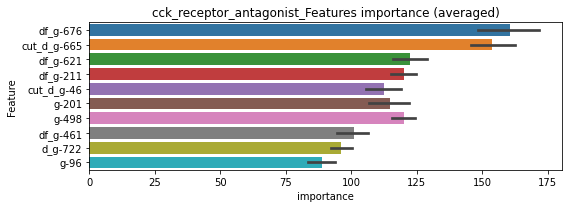

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000310132	valid_1's binary_logloss: 0.00137618


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000299431	valid_1's binary_logloss: 0.00125679


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000304456	valid_1's binary_logloss: 0.000689321


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000302092	valid_1's binary_logloss: 0.000810496


cck_receptor_antagonist logloss: 0.001033347047277023


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7583
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7583


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0531633	valid_1's binary_logloss: 0.14752
Early stopping, best iteration is:
[1527]	training's binary_logloss: 0.0343213	valid_1's binary_logloss: 0.142298
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0534377	valid_1's binary_logloss: 0.142722
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.0448575	valid_1's binary_logloss: 0.139928
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0525054	valid_1's binary_logloss: 0.14916
Early stopping, best iteration is:
[1417]	training's binary_logloss: 0.036769	valid_1's binary_logloss: 0.144982
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0522174	valid_1's binary_logloss: 0.154753
Early stopping, best iteration is:
[1191]	training's binary_logloss: 0.0437232	valid_1's binary_loglo

1 / 3, AUC score:0.954, PR-AUC:0.917
y_Threshold: 0.0688709, Threshold: 0.1151001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 696 → Positive_corect_labels: 1320/8403
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.1151001, conf_0:0.08057, conf_1:0.14963
threshold: 0.1151001, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1320.0/8403, y_label_rate: 0.1570868
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318059	valid_1's binary_logloss: 0.0782031
Early stopping, best iteration is:
[1916]	training's binary_logloss: 0.0162137	valid_1's binary_logloss: 0.07083
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320239	valid_1's binary_logloss: 0.0792463
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0163782	valid_1's binary_logloss: 0.0714153
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329061	valid_1's binary_logloss: 0.0731134
[2000]	training's binary_logloss: 0.0159899	valid_1's binary_logloss: 0.0641252
[3000]	training's binary_logloss: 0.010302	valid_1's binary_logloss: 0.0611231
Early stopping, best iteration is:
[3012]	training's binary_logloss: 0.0102549	valid_1's binary_logloss: 0.0610648
Training until validation scores don't improve for 30 rounds
[1000]	trainin

2 / 3, AUC score:0.995, PR-AUC:0.985
y_Threshold: 0.0602359, Threshold: 0.1151001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 1247.0/8257
p_label_rate: 0.0042692 Vs.target_rate: 0.01478
Num_p_label: 17.0, Expected: 58.9, Threshold: 0.1151001, conf_0:0.09208, conf_1:0.13812
threshold: 0.1151001, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1247.0/8257, y_label_rate: 0.1510234
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233343	valid_1's binary_logloss: 0.0504359
[2000]	training's binary_logloss: 0.0115392	valid_1's binary_logloss: 0.0429422
[3000]	training's binary_logloss: 0.00756	valid_1's binary_logloss: 0.0407067
Early stopping, best iteration is:
[3402]	training's binary_logloss: 0.00662347	valid_1's binary_logloss: 0.0401746
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.024055	valid_1's binary_logloss: 0.0446039
[2000]	training's binary_logloss: 0.0119018	valid_1's binary_logloss: 0.0357588
[3000]	training's binary_logloss: 0.00775657	valid_1's binary_logloss: 0.0327272
Early stopping, best iteration is:
[3620]	training's binary_logloss: 0.00635674	valid_1's binary_logloss: 0.0317162
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0221136	valid_1's binary_logloss: 0.0635101
Early stopping, best iterat

3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0461715, Threshold: 0.1151001, pos_neg_ratio: 0.8000000
Remove_noisy_data: 86 → Positive_corect_labels: 1204.0/8171
p_label_rate: 0.0035158 Vs.target_rate: 0.01478
Num_p_label: 14.0, Expected: 58.9, Threshold: 0.1151001, conf_0:0.10359, conf_1:0.12661
threshold: 0.1151001, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 1204.0/8171, y_label_rate: 0.1473504


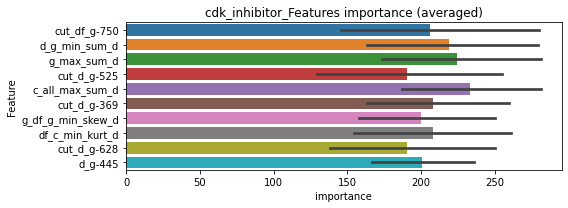

len(train_index) : 6128
len(valid_index) : 2043
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239538	valid_1's binary_logloss: 0.039584
[2000]	training's binary_logloss: 0.0125355	valid_1's binary_logloss: 0.0305038
[3000]	training's binary_logloss: 0.00840242	valid_1's binary_logloss: 0.0272649
[4000]	training's binary_logloss: 0.00627844	valid_1's binary_logloss: 0.0255641
Early stopping, best iteration is:
[4424]	training's binary_logloss: 0.0056813	valid_1's binary_logloss: 0.0250827


len(train_index) : 6128
len(valid_index) : 2043
================================= fold 2/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0234281	valid_1's binary_logloss: 0.0478566
[2000]	training's binary_logloss: 0.0122371	valid_1's binary_logloss: 0.0387818
[3000]	training's binary_logloss: 0.00820812	valid_1's binary_logloss: 0.0358642
Early stopping, best iteration is:
[3720]	training's binary_logloss: 0.00661518	valid_1's binary_logloss: 0.034802


len(train_index) : 6128
len(valid_index) : 2043
================================= fold 3/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0244098	valid_1's binary_logloss: 0.0382756
[2000]	training's binary_logloss: 0.012793	valid_1's binary_logloss: 0.0285002
[3000]	training's binary_logloss: 0.00857941	valid_1's binary_logloss: 0.0250471
[4000]	training's binary_logloss: 0.00641987	valid_1's binary_logloss: 0.0233917
[5000]	training's binary_logloss: 0.00513502	valid_1's binary_logloss: 0.0223981
Early stopping, best iteration is:
[5833]	training's binary_logloss: 0.00439492	valid_1's binary_logloss: 0.0217265


len(train_index) : 6129
len(valid_index) : 2042
================================= fold 4/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0256379	valid_1's binary_logloss: 0.0323993
[2000]	training's binary_logloss: 0.013505	valid_1's binary_logloss: 0.0222238
[3000]	training's binary_logloss: 0.0090024	valid_1's binary_logloss: 0.0182776
[4000]	training's binary_logloss: 0.00671592	valid_1's binary_logloss: 0.0162291
[5000]	training's binary_logloss: 0.0053698	valid_1's binary_logloss: 0.0149548
[6000]	training's binary_logloss: 0.00446952	valid_1's binary_logloss: 0.01407
[7000]	training's binary_logloss: 0.00383419	valid_1's binary_logloss: 0.0134618
Early stopping, best iteration is:
[7882]	training's binary_logloss: 0.0034081	valid_1's binary_logloss: 0.0130059


cdk_inhibitor logloss: 0.023655573008842825
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000634091	valid_1's binary_logloss: 0.0241802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000551893	valid_1's binary_logloss: 0.0164156
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000527497	valid_1's binary_logloss: 0.00492219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000660421	valid_1's binary_logloss: 0.0241797


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0048108, Threshold: 0.0163525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0163525, conf_0:0.01145, conf_1:0.02126
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.0463525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.0763525
threshold: 0.0763525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000569702	valid_1's binary_logloss: 0.0221034
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000531259	valid_1's binary_logloss: 0.0135341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.00052534	valid_1's binary_logloss: 0.00460284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000520227	valid_1's binary_logloss: 0.023399


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224471, Threshold: 0.0763525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0065294 Vs.target_rate: 0.00227
Num_p_label: 26.0, Expected: 9.0, Threshold: 0.0763525, conf_0:0.06108, conf_1:0.09162
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.1063525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.1363525
threshold: 0.1363525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520362	valid_1's binary_logloss: 0.00868488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520119	valid_1's binary_logloss: 0.0154487
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000522669	valid_1's binary_logloss: 0.0178838
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000730166	valid_1's binary_logloss: 0.0243716


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0230638, Threshold: 0.1363525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0057760 Vs.target_rate: 0.00227
Num_p_label: 23.0, Expected: 9.0, Threshold: 0.1363525, conf_0:0.12272, conf_1:0.14999
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.1663525
threshold: 0.1663525, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


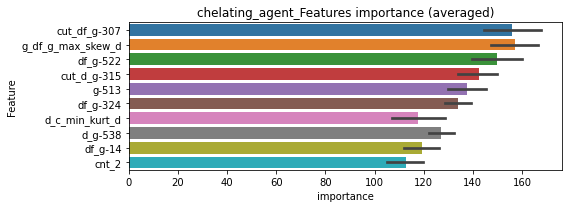

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498951	valid_1's binary_logloss: 0.0089516
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000497332	valid_1's binary_logloss: 0.0089359


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000662953	valid_1's binary_logloss: 0.0199669


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000520252	valid_1's binary_logloss: 0.00742096


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.013099907184820745


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00090725	valid_1's binary_logloss: 0.0160601


chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000345422	valid_1's binary_logloss: 0.00113867
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000349739	valid_1's binary_logloss: 0.00191171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000363195	valid_1's binary_logloss: 0.000866409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027590, Threshold: 0.0524497, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000359771	valid_1's binary_logloss: 0.00107256


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0524497, conf_0:0.03671, conf_1:0.06818
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_1: 0.0824497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_2: 0.1124497
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.1424497
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_4: 0.1724497
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_5: 0.2024497
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_6: 0.2324497
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.2624497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.2924497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.3224497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_10: 0.3524497
threshold: 0.3524497, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.3524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0090407 Vs.target_rate: 0.00101
Num_p_label: 36.0, Expected: 4.0, Threshold: 0.3524497, conf_0:0.28196, conf_1:0.42294
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_1: 0.3824497


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.4124497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.4424497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.4724497
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_5: 0.5024497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_6: 0.5324497
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.5624497
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.5924497
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_9: 0.6224497
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_10: 0.6524497
threshold: 0.6524497, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.6524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.6524497, conf_0:0.58720, conf_1:0.71769
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_1: 0.6824497
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.7124497


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.7424497
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_4: 0.7724497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.8024497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_6: 0.8324497
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.8624497
threshold: 0.8624497, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


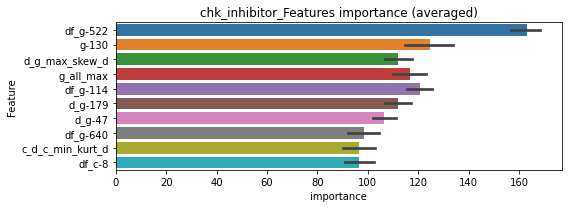

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000349335	valid_1's binary_logloss: 0.000868088


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000340507	valid_1's binary_logloss: 0.001225


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000343309	valid_1's binary_logloss: 0.000803924


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000344501	valid_1's binary_logloss: 0.00106844


chk_inhibitor logloss: 0.0009913453242998485
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470364	valid_1's binary_logloss: 0.00593944
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000466538	valid_1's binary_logloss: 0.0121803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000472255	valid_1's binary_logloss: 0.00520967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000469761	valid_1's binary_logloss: 0.00879355


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036083, Threshold: 0.0307272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0307272, conf_0:0.02151, conf_1:0.03995
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0607272
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.0907272
threshold: 0.0907272, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394437, Threshold: 0.0907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0155701 Vs.target_rate: 0.00176
Num_p_label: 62.0, Expected: 7.0, Threshold: 0.0907272, conf_0:0.07258, conf_1:0.10887
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_1: 0.1207272
Num_p_label: 48.0, Expected: 7.0, Adj_threshold_2: 0.1507272
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_3: 0.1807272
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_4: 0.2107272
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_5: 0.2407272
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_6: 0.2707272
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_7: 0.3007272
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.3307272
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3607272
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_10: 0.3907272
threshold: 0.3907272, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394437, Threshold: 0.3907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, Expected: 7.0, Threshold: 0.3907272, conf_0:0.35165, conf_1:0.42980
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.4207272
threshold: 0.4207272, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


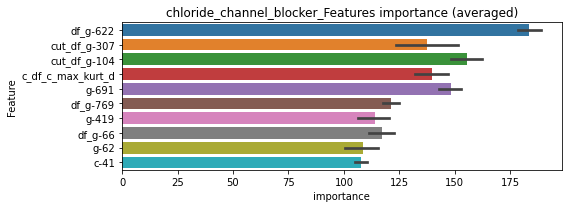

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000462711	valid_1's binary_logloss: 0.00469207


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000474733	valid_1's binary_logloss: 0.0067265


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000462247	valid_1's binary_logloss: 0.00456178


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000485099	valid_1's binary_logloss: 0.00809451


chloride_channel_blocker logloss: 0.0060210218971286315
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000490532	valid_1's binary_logloss: 0.0106264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000510735	valid_1's binary_logloss: 0.0127336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000490598	valid_1's binary_logloss: 0.00252564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000477508	valid_1's binary_logloss: 0.00833974


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041254, Threshold: 0.0132104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0132104, conf_0:0.00925, conf_1:0.01717
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0432104
threshold: 0.0432104, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03457, conf_1:0.05185
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03889, conf_1:0.04753
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


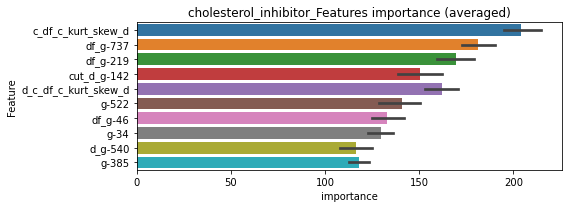

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000475724	valid_1's binary_logloss: 0.00843338


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000481094	valid_1's binary_logloss: 0.0115145


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000482923	valid_1's binary_logloss: 0.00264433
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000483156	valid_1's binary_logloss: 0.00264374


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000491891	valid_1's binary_logloss: 0.00935063


cholesterol_inhibitor logloss: 0.007991061991790928
cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000523312	valid_1's binary_logloss: 0.0145485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00055695	valid_1's binary_logloss: 0.0142857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000580293	valid_1's binary_logloss: 0.0101624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000758515	valid_1's binary_logloss: 0.0145313


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044919, Threshold: 0.0097991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0097991, conf_0:0.00686, conf_1:0.01274
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0397991
threshold: 0.0397991, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00053355	valid_1's binary_logloss: 0.0146893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000525474	valid_1's binary_logloss: 0.0144009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000509151	valid_1's binary_logloss: 0.00973826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000602406	valid_1's binary_logloss: 0.0138061


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0271513, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0020090 Vs.target_rate: 0.00227
Num_p_label: 8.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03184, conf_1:0.04776
threshold: 0.0397991, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000566546	valid_1's binary_logloss: 0.0208555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000504642	valid_1's binary_logloss: 0.00676098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000568739	valid_1's binary_logloss: 0.0063707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000563409	valid_1's binary_logloss: 0.022914


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311180, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03582, conf_1:0.04378
threshold: 0.0397991, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


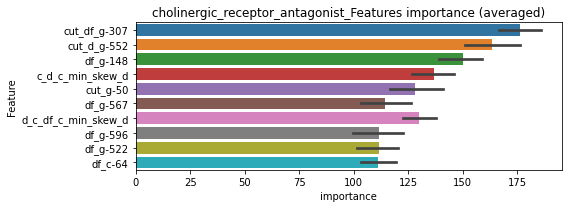

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000631144	valid_1's binary_logloss: 0.00739663


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000680623	valid_1's binary_logloss: 0.0130907


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000521743	valid_1's binary_logloss: 0.00945977


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000666652	valid_1's binary_logloss: 0.0119205


cholinergic_receptor_antagonist logloss: 0.010467240324984263
coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000339175	valid_1's binary_logloss: 0.00147322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000331164	valid_1's binary_logloss: 0.00231605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000340977	valid_1's binary_logloss: 0.00175983
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000356108	valid_1's binary_logloss: 0.00653134


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020091, Threshold: 0.0104905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0104905, conf_0:0.00734, conf_1:0.01364
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0404905
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0704905
threshold: 0.0704905, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.05639, conf_1:0.08459
threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.06344, conf_1:0.07754
threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


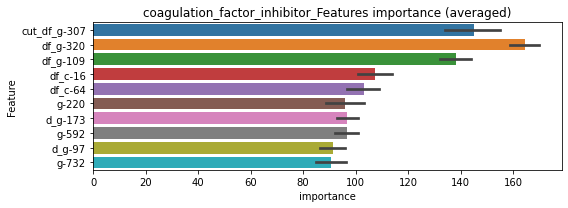

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000336907	valid_1's binary_logloss: 0.00128482
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000333786	valid_1's binary_logloss: 0.00127921


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000335394	valid_1's binary_logloss: 0.00201584


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000335773	valid_1's binary_logloss: 0.00144264
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000335495	valid_1's binary_logloss: 0.00144118


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000343868	valid_1's binary_logloss: 0.00356907


coagulation_factor_inhibitor logloss: 0.002076148221522129
corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000437964	valid_1's binary_logloss: 0.00369693
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000417539	valid_1's binary_logloss: 0.00978523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000432317	valid_1's binary_logloss: 0.00349006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000443437	valid_1's binary_logloss: 0.0066927


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039663, Threshold: 0.0112135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0112135, conf_0:0.00785, conf_1:0.01458
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0412135
threshold: 0.0412135, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00288171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042539	valid_1's binary_logloss: 0.00864866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.00356476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000443368	valid_1's binary_logloss: 0.00693857


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353321, Threshold: 0.0412135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0412135, conf_0:0.03297, conf_1:0.04946
threshold: 0.0412135, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00288171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042539	valid_1's binary_logloss: 0.00864866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.00356476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000443368	valid_1's binary_logloss: 0.00693857


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0353321, Threshold: 0.0412135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0412135, conf_0:0.03709, conf_1:0.04533
threshold: 0.0412135, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


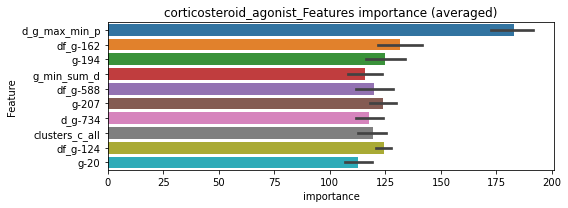

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000424361	valid_1's binary_logloss: 0.0036221


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000480247	valid_1's binary_logloss: 0.00745574


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000488757	valid_1's binary_logloss: 0.00436461


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000433455	valid_1's binary_logloss: 0.00479776


corticosteroid_agonist logloss: 0.005060120860538934
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.138946	valid_1's binary_logloss: 0.385954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.15594	valid_1's binary_logloss: 0.377982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.12002	valid_1's binary_logloss: 0.356152
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.122858	valid_1's binary_logloss: 0.362801


1 / 3, AUC score:0.740, PR-AUC:0.580
y_Threshold: 0.1653386, Threshold: 0.4479316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 732 → Positive_corect_labels: 345/3144
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4479316, conf_0:0.31355, conf_1:0.58231
threshold: 0.4479316, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 345.0/3144, y_label_rate: 0.1097328
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0584874	valid_1's binary_logloss: 0.188082
Early stopping, best iteration is:
[1322]	training's binary_logloss: 0.0441867	valid_1's binary_logloss: 0.180931
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0600256	valid_1's binary_logloss: 0.179879
Early stopping, best iteration is:
[1457]	training's binary_logloss: 0.0411261	valid_1's binary_logloss: 0.168838
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0583145	valid_1's binary_logloss: 0.175759
Early stopping, best iteration is:
[1670]	training's binary_logloss: 0.034655	valid_1's binary_logloss: 0.165611
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0606912	valid_1's binary_logloss: 0.162136
Early stopping, best iteration is:
[1666]	training's binary_logloss: 0.0361375	valid_1's binary_log

2 / 3, AUC score:0.966, PR-AUC:0.893
y_Threshold: 0.0976763, Threshold: 0.4479316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 126 → Positive_corect_labels: 282.0/3018
p_label_rate: 0.0286288 Vs.target_rate: 0.01827
Num_p_label: 114.0, Expected: 72.7, Threshold: 0.4479316, conf_0:0.35835, conf_1:0.53752
Num_p_label: 108.0, Expected: 72.7, Adj_threshold_1: 0.4779316
threshold: 0.4779316, positive_p_label: 108.0/3982, p_label_rate: 0.0271220
positive_y_label: 282.0/3018, y_label_rate: 0.0934394
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0456413	valid_1's binary_logloss: 0.131048
[2000]	training's binary_logloss: 0.0222726	valid_1's binary_logloss: 0.115005
Early stopping, best iteration is:
[2637]	training's binary_logloss: 0.0166699	valid_1's binary_logloss: 0.111383
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0450681	valid_1's binary_logloss: 0.135732
Early stopping, best iteration is:
[1784]	training's binary_logloss: 0.0247398	valid_1's binary_logloss: 0.123792
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.046721	valid_1's binary_logloss: 0.124655
[2000]	training's binary_logloss: 0.0226792	valid_1's binary_logloss: 0.105993
Early stopping, best iteration is:
[2304]	training's binary_logloss: 0.0195517	valid_1's binary_logloss: 0.103975
Training until validation scores don't improve for 30 rounds
[1000]	training's bi

3 / 3, AUC score:0.986, PR-AUC:0.951
y_Threshold: 0.0779103, Threshold: 0.4779316, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 251.0/2956
p_label_rate: 0.0341537 Vs.target_rate: 0.01827
Num_p_label: 136.0, Expected: 72.7, Threshold: 0.4779316, conf_0:0.43014, conf_1:0.52572
Num_p_label: 131.0, Expected: 72.7, Adj_threshold_1: 0.5079316
Num_p_label: 125.0, Expected: 72.7, Adj_threshold_2: 0.5379316
Num_p_label: 117.0, Expected: 72.7, Adj_threshold_3: 0.5679316
Num_p_label: 116.0, Expected: 72.7, Adj_threshold_4: 0.5979316
Num_p_label: 111.0, Expected: 72.7, Adj_threshold_5: 0.6279316
Num_p_label: 99.0, Expected: 72.7, Adj_threshold_6: 0.6579316
threshold: 0.6579316, positive_p_label: 99.0/3982, p_label_rate: 0.0248619
positive_y_label: 251.0/2956, y_label_rate: 0.0849120


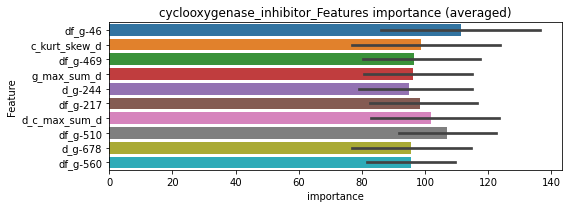

len(train_index) : 2217
len(valid_index) : 739
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0572709	valid_1's binary_logloss: 0.126102
[2000]	training's binary_logloss: 0.028797	valid_1's binary_logloss: 0.099432
[3000]	training's binary_logloss: 0.0188849	valid_1's binary_logloss: 0.0892526
[4000]	training's binary_logloss: 0.0140335	valid_1's binary_logloss: 0.0846085
Early stopping, best iteration is:
[4101]	training's binary_logloss: 0.0136676	valid_1's binary_logloss: 0.0840591


len(train_index) : 2217
len(valid_index) : 739
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0567079	valid_1's binary_logloss: 0.127224
[2000]	training's binary_logloss: 0.0284104	valid_1's binary_logloss: 0.105639
Early stopping, best iteration is:
[2155]	training's binary_logloss: 0.0262254	valid_1's binary_logloss: 0.103673


len(train_index) : 2217
len(valid_index) : 739
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0582032	valid_1's binary_logloss: 0.125877
[2000]	training's binary_logloss: 0.0291167	valid_1's binary_logloss: 0.102263
[3000]	training's binary_logloss: 0.0191294	valid_1's binary_logloss: 0.0939979
Early stopping, best iteration is:
[3642]	training's binary_logloss: 0.0156654	valid_1's binary_logloss: 0.0914757


len(train_index) : 2217
len(valid_index) : 739
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0576569	valid_1's binary_logloss: 0.118975
[2000]	training's binary_logloss: 0.0286778	valid_1's binary_logloss: 0.0940536
[3000]	training's binary_logloss: 0.0188077	valid_1's binary_logloss: 0.0851968
Early stopping, best iteration is:
[3403]	training's binary_logloss: 0.0164907	valid_1's binary_logloss: 0.0833083


cyclooxygenase_inhibitor logloss: 0.09062914061422324
cyclooxygenase_inhibitor is unpredictable(><)!
cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392042	valid_1's binary_logloss: 0.116019
Early stopping, best iteration is:
[1735]	training's binary_logloss: 0.0221819	valid_1's binary_logloss: 0.10965
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392809	valid_1's binary_logloss: 0.113416
Early stopping, best iteration is:
[1580]	training's binary_logloss: 0.0245346	valid_1's binary_logloss: 0.107811
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0423669	valid_1's binary_logloss: 0.0781892
[2000]	training's binary_logloss: 0.0205752	valid_1's binary_logloss: 0.0662987
[3000]	training's binary_logloss: 0.0133207	valid_1's binary_logloss: 0.0621294
Early stopping, best iteration is:
[3817]	training's binary_logloss: 0.0103091	valid_1's binary_logloss: 0.0603523
Training until validation scores don't improve for 30 rounds
[1000]	training'

1 / 3, AUC score:0.987, PR-AUC:0.975
y_Threshold: 0.0381014, Threshold: 0.0959910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 185 → Positive_corect_labels: 627/3740
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.0959910, conf_0:0.06719, conf_1:0.12479
Num_p_label: 17.0, Expected: 17.4, Adj_threshold_1: 0.1259910
threshold: 0.1259910, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 627.0/3740, y_label_rate: 0.1676471
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0331985	valid_1's binary_logloss: 0.0864898
[2000]	training's binary_logloss: 0.016265	valid_1's binary_logloss: 0.077013
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0158462	valid_1's binary_logloss: 0.0767924
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332063	valid_1's binary_logloss: 0.0827396
[2000]	training's binary_logloss: 0.0162653	valid_1's binary_logloss: 0.0716341
Early stopping, best iteration is:
[2297]	training's binary_logloss: 0.0140944	valid_1's binary_logloss: 0.0704651
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035091	valid_1's binary_logloss: 0.060136
[2000]	training's binary_logloss: 0.0171978	valid_1's binary_logloss: 0.0484359
[3000]	training's binary_logloss: 0.011272	valid_1's binary_logloss: 0.0444206
Early stopping, best iteration i

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0560991, Threshold: 0.1259910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 54 → Positive_corect_labels: 600.0/3686
p_label_rate: 0.0143144 Vs.target_rate: 0.00437
Num_p_label: 57.0, Expected: 17.4, Threshold: 0.1259910, conf_0:0.10079, conf_1:0.15119
Num_p_label: 40.0, Expected: 17.4, Adj_threshold_1: 0.1559910
Num_p_label: 29.0, Expected: 17.4, Adj_threshold_2: 0.1859910
Num_p_label: 15.0, Expected: 17.4, Adj_threshold_3: 0.2159910
threshold: 0.2159910, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 600.0/3686, y_label_rate: 0.1627781
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262326	valid_1's binary_logloss: 0.071662
Early stopping, best iteration is:
[1739]	training's binary_logloss: 0.0150291	valid_1's binary_logloss: 0.065214
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.02779	valid_1's binary_logloss: 0.0549216
[2000]	training's binary_logloss: 0.0137877	valid_1's binary_logloss: 0.045572
[3000]	training's binary_logloss: 0.00908606	valid_1's binary_logloss: 0.0424746
Early stopping, best iteration is:
[3217]	training's binary_logloss: 0.00845919	valid_1's binary_logloss: 0.0420946
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281508	valid_1's binary_logloss: 0.0469277
[2000]	training's binary_logloss: 0.0140316	valid_1's binary_logloss: 0.0361553
[3000]	training's binary_logloss: 0.00926349	valid_1's binary_logloss: 0.0325709
Early stopping, best iteratio

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0511586, Threshold: 0.2159910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 588.0/3662
p_label_rate: 0.0062783 Vs.target_rate: 0.00437
Num_p_label: 25.0, Expected: 17.4, Threshold: 0.2159910, conf_0:0.19439, conf_1:0.23759
threshold: 0.2159910, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 588.0/3662, y_label_rate: 0.1605680


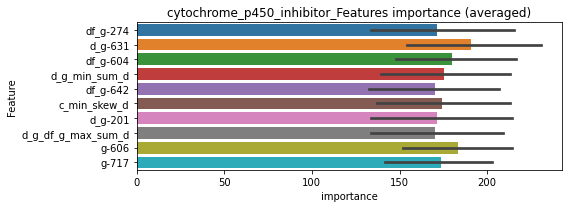

len(train_index) : 2746
len(valid_index) : 916
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353592	valid_1's binary_logloss: 0.0523502
[2000]	training's binary_logloss: 0.0182821	valid_1's binary_logloss: 0.0382783
[3000]	training's binary_logloss: 0.0121871	valid_1's binary_logloss: 0.0333488
[4000]	training's binary_logloss: 0.0091057	valid_1's binary_logloss: 0.0308248
[5000]	training's binary_logloss: 0.00727908	valid_1's binary_logloss: 0.0294114
[6000]	training's binary_logloss: 0.00606874	valid_1's binary_logloss: 0.0284343
Early stopping, best iteration is:
[6361]	training's binary_logloss: 0.00573196	valid_1's binary_logloss: 0.0281613


len(train_index) : 2746
len(valid_index) : 916
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323242	valid_1's binary_logloss: 0.0747756
[2000]	training's binary_logloss: 0.0167508	valid_1's binary_logloss: 0.0624682
Early stopping, best iteration is:
[2947]	training's binary_logloss: 0.0114374	valid_1's binary_logloss: 0.0587803


len(train_index) : 2747
len(valid_index) : 915
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0358304	valid_1's binary_logloss: 0.0494774
[2000]	training's binary_logloss: 0.018486	valid_1's binary_logloss: 0.0352166
[3000]	training's binary_logloss: 0.0123051	valid_1's binary_logloss: 0.0303998
[4000]	training's binary_logloss: 0.00918942	valid_1's binary_logloss: 0.0279161
[5000]	training's binary_logloss: 0.00734547	valid_1's binary_logloss: 0.0265999
[6000]	training's binary_logloss: 0.00611831	valid_1's binary_logloss: 0.0256804
Early stopping, best iteration is:
[6355]	training's binary_logloss: 0.00578373	valid_1's binary_logloss: 0.0254152


len(train_index) : 2747
len(valid_index) : 915
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0345371	valid_1's binary_logloss: 0.0588716
[2000]	training's binary_logloss: 0.0179439	valid_1's binary_logloss: 0.0459697
[3000]	training's binary_logloss: 0.0119722	valid_1's binary_logloss: 0.0412913
[4000]	training's binary_logloss: 0.00895278	valid_1's binary_logloss: 0.0389836
Early stopping, best iteration is:
[4255]	training's binary_logloss: 0.00840709	valid_1's binary_logloss: 0.0385756


cytochrome_p450_inhibitor logloss: 0.03773623501138953
cytochrome_p450_inhibitor is unpredictable(><)!
dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00040523	valid_1's binary_logloss: 0.00666886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000427196	valid_1's binary_logloss: 0.00562887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00041925	valid_1's binary_logloss: 0.00102386
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000415082	valid_1's binary_logloss: 0.00195199


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029265, Threshold: 0.0115218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0115218, conf_0:0.00807, conf_1:0.01498
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_1: 0.0415218
threshold: 0.0415218, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0415218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0055249 Vs.target_rate: 0.00151
Num_p_label: 22.0, Expected: 6.0, Threshold: 0.0415218, conf_0:0.03322, conf_1:0.04983
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0715218
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0715218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0715218, conf_0:0.06437, conf_1:0.07867
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


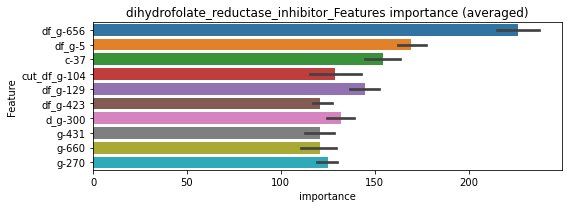

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000410696	valid_1's binary_logloss: 0.006103


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000426632	valid_1's binary_logloss: 0.00482623


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.000979461
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.000979461


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00040663	valid_1's binary_logloss: 0.0014055
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000403481	valid_1's binary_logloss: 0.00140072


dihydrofolate_reductase_inhibitor logloss: 0.00333004271964584
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000357403	valid_1's binary_logloss: 0.00254559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000356851	valid_1's binary_logloss: 0.00198374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000359962	valid_1's binary_logloss: 0.000809725
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023813, Threshold: 0.0099776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0099776, conf_0:0.00698, conf_1:0.01297
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0399776


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00037487	valid_1's binary_logloss: 0.00508198


threshold: 0.0399776, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.0399776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0070316 Vs.target_rate: 0.00105
Num_p_label: 28.0, Expected: 4.2, Threshold: 0.0399776, conf_0:0.03198, conf_1:0.04797


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


Num_p_label: 16.0, Expected: 4.2, Adj_threshold_1: 0.0699776
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0999776
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_3: 0.1299776
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_4: 0.1599776
threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.1599776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.1599776, conf_0:0.14398, conf_1:0.17598


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


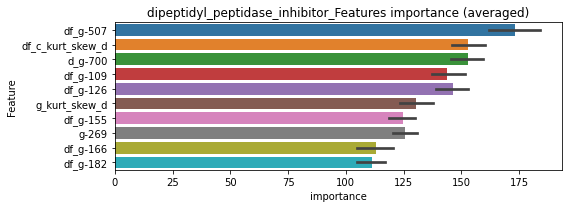

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.00034223	valid_1's binary_logloss: 0.0018921


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000346128	valid_1's binary_logloss: 0.00153593


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000359327	valid_1's binary_logloss: 0.000874061


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000355234	valid_1's binary_logloss: 0.00374129


dipeptidyl_peptidase_inhibitor logloss: 0.0020110506386375147
diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000176586	valid_1's binary_logloss: 0.0039209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00017455	valid_1's binary_logloss: 0.00180481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000174989	valid_1's binary_logloss: 0.000211316
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004962, Threshold: 0.0018108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018108, conf_0:0.00127, conf_1:0.00235
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318108
threshold: 0.0318108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000174616	valid_1's binary_logloss: 0.000231277


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.0318108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00025
Num_p_label: 8.0, Expected: 1.0, Threshold: 0.0318108, conf_0:0.02545, conf_1:0.03817
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0618108
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0918108
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1218108
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1518108
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.1818108


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.1818108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1818108, conf_0:0.16363, conf_1:0.19999
threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


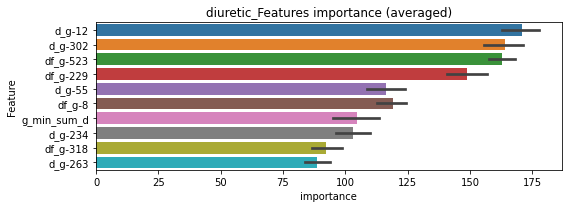

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164069	valid_1's binary_logloss: 0.000319883
Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000162183	valid_1's binary_logloss: 0.000318075


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165054	valid_1's binary_logloss: 0.00235939
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000164636	valid_1's binary_logloss: 0.00235822


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000166179	valid_1's binary_logloss: 0.000188481


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[1103]	training's binary_logloss: 0.000164493	valid_1's binary_logloss: 0.000186657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165567	valid_1's binary_logloss: 0.000197641
Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.000163923	valid_1's binary_logloss: 0.000195655


diuretic logloss: 0.0007645727538288503
dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000487165	valid_1's binary_logloss: 0.012756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000494882	valid_1's binary_logloss: 0.0167968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000502488	valid_1's binary_logloss: 0.0030484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00048914	valid_1's binary_logloss: 0.0142329


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037524, Threshold: 0.0855297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0855297, conf_0:0.05987, conf_1:0.11119
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_1: 0.1155297
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1455297
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.1755297
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.2055297
threshold: 0.2055297, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000497674	valid_1's binary_logloss: 0.0125171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000485036	valid_1's binary_logloss: 0.0131483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482282	valid_1's binary_logloss: 0.00338707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000494534	valid_1's binary_logloss: 0.0131269


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0745539, Threshold: 0.2055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0183325 Vs.target_rate: 0.00202
Num_p_label: 73.0, Expected: 8.0, Threshold: 0.2055297, conf_0:0.16442, conf_1:0.24664
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_1: 0.2355297
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.2655297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_3: 0.2955297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_4: 0.3255297
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_5: 0.3555297
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_6: 0.3855297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_7: 0.4155297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_8: 0.4455297
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_9: 0.4755297
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_10: 0.5055297
threshold: 0.5055297, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000474829	valid_1's binary_logloss: 0.0162652
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000495703	valid_1's binary_logloss: 0.00641886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000486554	valid_1's binary_logloss: 0.00614384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000485481	valid_1's binary_logloss: 0.0060295


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0748767, Threshold: 0.5055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0153189 Vs.target_rate: 0.00202
Num_p_label: 61.0, Expected: 8.0, Threshold: 0.5055297, conf_0:0.45498, conf_1:0.55608
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_1: 0.5355297
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_2: 0.5655297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_3: 0.5955297
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_4: 0.6255297
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_5: 0.6555297
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_6: 0.6855297
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_7: 0.7155297
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_8: 0.7455297
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_9: 0.7755297
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_10: 0.8055297
threshold: 0.8055297, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_la

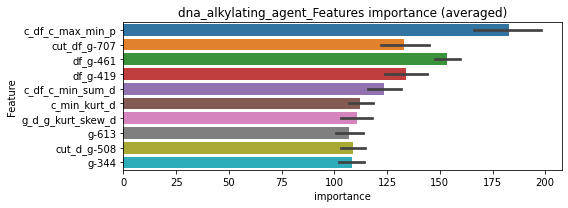

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000475025	valid_1's binary_logloss: 0.00780346


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00049257	valid_1's binary_logloss: 0.00683704


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000480411	valid_1's binary_logloss: 0.00671822


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046014	valid_1's binary_logloss: 0.00411668
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000454717	valid_1's binary_logloss: 0.00410006


dna_alkylating_agent logloss: 0.006365895865226023


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7073
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7073


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0618763	valid_1's binary_logloss: 0.169951
Early stopping, best iteration is:
[1594]	training's binary_logloss: 0.038265	valid_1's binary_logloss: 0.166253
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0601308	valid_1's binary_logloss: 0.188297
Early stopping, best iteration is:
[1083]	training's binary_logloss: 0.0555958	valid_1's binary_logloss: 0.187681
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0616958	valid_1's binary_logloss: 0.170964
Early stopping, best iteration is:
[1112]	training's binary_logloss: 0.0556132	valid_1's binary_logloss: 0.169905
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0612686	valid_1's binary_logloss: 0.171263
Early stopping, best iteration is:
[1069]	training's binary_logloss: 0.0574024	valid_1's binary_log

1 / 3, AUC score:0.929, PR-AUC:0.879
y_Threshold: 0.0794666, Threshold: 0.1342229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 776 → Positive_corect_labels: 1168/7711
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.1342229, conf_0:0.09396, conf_1:0.17449
threshold: 0.1342229, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1168.0/7711, y_label_rate: 0.1514719
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329217	valid_1's binary_logloss: 0.0762178
[2000]	training's binary_logloss: 0.0159427	valid_1's binary_logloss: 0.0690268
Early stopping, best iteration is:
[1980]	training's binary_logloss: 0.0161102	valid_1's binary_logloss: 0.0689787
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316335	valid_1's binary_logloss: 0.0933518
Early stopping, best iteration is:
[1352]	training's binary_logloss: 0.023293	valid_1's binary_logloss: 0.0903543
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333032	valid_1's binary_logloss: 0.0782517
Early stopping, best iteration is:
[1730]	training's binary_logloss: 0.0189576	valid_1's binary_logloss: 0.072203
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0321021	valid_1's binary_logloss: 0.0868539
Early stoppin

2 / 3, AUC score:0.992, PR-AUC:0.977
y_Threshold: 0.0628210, Threshold: 0.1342229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 1085.0/7545
p_label_rate: 0.0080362 Vs.target_rate: 0.01688
Num_p_label: 32.0, Expected: 67.2, Threshold: 0.1342229, conf_0:0.10738, conf_1:0.16107
threshold: 0.1342229, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1085.0/7545, y_label_rate: 0.1438038
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0212674	valid_1's binary_logloss: 0.0471739
[2000]	training's binary_logloss: 0.0105295	valid_1's binary_logloss: 0.0405981
[3000]	training's binary_logloss: 0.00691122	valid_1's binary_logloss: 0.0386523
Early stopping, best iteration is:
[3003]	training's binary_logloss: 0.00690332	valid_1's binary_logloss: 0.0386429
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0215324	valid_1's binary_logloss: 0.0484124
[2000]	training's binary_logloss: 0.0106096	valid_1's binary_logloss: 0.0423922
Early stopping, best iteration is:
[2104]	training's binary_logloss: 0.010069	valid_1's binary_logloss: 0.0420688
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0211238	valid_1's binary_logloss: 0.0524392
[2000]	training's binary_logloss: 0.010397	valid_1's binary_logloss: 0.0460984
Early stopping, best iterat

3 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0471997, Threshold: 0.1342229, pos_neg_ratio: 0.8000000
Remove_noisy_data: 82 → Positive_corect_labels: 1044.0/7463
p_label_rate: 0.0085384 Vs.target_rate: 0.01688
Num_p_label: 34.0, Expected: 67.2, Threshold: 0.1342229, conf_0:0.12080, conf_1:0.14765
threshold: 0.1342229, positive_p_label: 34.0/3982, p_label_rate: 0.0085384
positive_y_label: 1044.0/7463, y_label_rate: 0.1398901


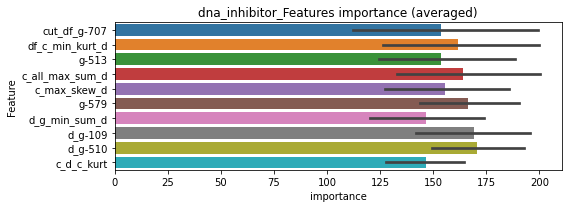

len(train_index) : 5597
len(valid_index) : 1866
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0221651	valid_1's binary_logloss: 0.0290769
[2000]	training's binary_logloss: 0.0114777	valid_1's binary_logloss: 0.0190427
[3000]	training's binary_logloss: 0.00768996	valid_1's binary_logloss: 0.0155553
[4000]	training's binary_logloss: 0.00574857	valid_1's binary_logloss: 0.0137277
[5000]	training's binary_logloss: 0.00460382	valid_1's binary_logloss: 0.0125994
[6000]	training's binary_logloss: 0.00383442	valid_1's binary_logloss: 0.0118209
[7000]	training's binary_logloss: 0.00328541	valid_1's binary_logloss: 0.0112979
[8000]	training's binary_logloss: 0.00288324	valid_1's binary_logloss: 0.0108613
[9000]	training's binary_logloss: 0.00256812	valid_1's binary_logloss: 0.0105423
Early stopping, best iteration is:
[9751]	training's binary_logloss: 0.00237483	valid_1's binary_logloss: 0.0103425


len(train_index) : 5597
len(valid_index) : 1866
================================= fold 2/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0214999	valid_1's binary_logloss: 0.0319371
[2000]	training's binary_logloss: 0.0110992	valid_1's binary_logloss: 0.0216836
[3000]	training's binary_logloss: 0.00746131	valid_1's binary_logloss: 0.0181241
[4000]	training's binary_logloss: 0.00559729	valid_1's binary_logloss: 0.0162427
[5000]	training's binary_logloss: 0.0044825	valid_1's binary_logloss: 0.0150909
[6000]	training's binary_logloss: 0.0037374	valid_1's binary_logloss: 0.0143093
[7000]	training's binary_logloss: 0.00320748	valid_1's binary_logloss: 0.0137638
[8000]	training's binary_logloss: 0.00281431	valid_1's binary_logloss: 0.0133323
[9000]	training's binary_logloss: 0.00250855	valid_1's binary_logloss: 0.0129909
[10000]	training's binary_logloss: 0.00226882	valid_1's binary_logloss: 0.0127452
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00226882	valid_1's binary_logloss: 0.0127452


len(train_index) : 5597
len(valid_index) : 1866
================================= fold 3/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0213323	valid_1's binary_logloss: 0.0375749
[2000]	training's binary_logloss: 0.0110621	valid_1's binary_logloss: 0.0273821
[3000]	training's binary_logloss: 0.00744515	valid_1's binary_logloss: 0.0237818
[4000]	training's binary_logloss: 0.00558275	valid_1's binary_logloss: 0.0220131
Early stopping, best iteration is:
[4807]	training's binary_logloss: 0.00465019	valid_1's binary_logloss: 0.0211279


len(train_index) : 5598
len(valid_index) : 1865
================================= fold 4/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0207448	valid_1's binary_logloss: 0.033707
[2000]	training's binary_logloss: 0.0106569	valid_1's binary_logloss: 0.0248668
[3000]	training's binary_logloss: 0.00716462	valid_1's binary_logloss: 0.0220619
[4000]	training's binary_logloss: 0.00538805	valid_1's binary_logloss: 0.0206153
Early stopping, best iteration is:
[4554]	training's binary_logloss: 0.00473848	valid_1's binary_logloss: 0.0201729


dna_inhibitor logloss: 0.016096568597223675


mutually exclusive columns: dopamine_receptor_agonist


dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


selected negative label: 2089


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0633013	valid_1's binary_logloss: 0.218713
Early stopping, best iteration is:
[1195]	training's binary_logloss: 0.0535742	valid_1's binary_logloss: 0.215635
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0714755	valid_1's binary_logloss: 0.134065
[2000]	training's binary_logloss: 0.0363343	valid_1's binary_logloss: 0.115114
Early stopping, best iteration is:
[2360]	training's binary_logloss: 0.030621	valid_1's binary_logloss: 0.112346
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0706808	valid_1's binary_logloss: 0.151936
[2000]	training's binary_logloss: 0.03584	valid_1's binary_logloss: 0.132088
Early stopping, best iteration is:
[2653]	training's binary_logloss: 0.0267347	valid_1's binary_logloss: 0.127845
Training until validation scores don't improve for 30 rounds
[1000]	training's bina

1 / 3, AUC score:0.959, PR-AUC:0.919
y_Threshold: 0.0753390, Threshold: 0.1159894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 189 → Positive_corect_labels: 365/2317
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.1159894, conf_0:0.08119, conf_1:0.15079
Num_p_label: 13.0, Expected: 20.2, Adj_threshold_1: 0.1459894
threshold: 0.1459894, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 365.0/2317, y_label_rate: 0.1575313
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0480026	valid_1's binary_logloss: 0.135891
Early stopping, best iteration is:
[1734]	training's binary_logloss: 0.0279621	valid_1's binary_logloss: 0.123981
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0517217	valid_1's binary_logloss: 0.0986633
[2000]	training's binary_logloss: 0.0259827	valid_1's binary_logloss: 0.08119
Early stopping, best iteration is:
[2846]	training's binary_logloss: 0.018108	valid_1's binary_logloss: 0.0757939
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0505497	valid_1's binary_logloss: 0.112298
Early stopping, best iteration is:
[1749]	training's binary_logloss: 0.0291274	valid_1's binary_logloss: 0.0991203
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0491594	valid_1's binary_logloss: 0.12262
Early stopping, bes

2 / 3, AUC score:0.990, PR-AUC:0.975
y_Threshold: 0.0776955, Threshold: 0.1459894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 341.0/2269
p_label_rate: 0.0065294 Vs.target_rate: 0.00508
Num_p_label: 26.0, Expected: 20.2, Threshold: 0.1459894, conf_0:0.11679, conf_1:0.17519
threshold: 0.1459894, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 341.0/2269, y_label_rate: 0.1502865
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0417906	valid_1's binary_logloss: 0.0893501
[2000]	training's binary_logloss: 0.0209945	valid_1's binary_logloss: 0.0721505
[3000]	training's binary_logloss: 0.0139403	valid_1's binary_logloss: 0.0659704
Early stopping, best iteration is:
[3006]	training's binary_logloss: 0.0139119	valid_1's binary_logloss: 0.0659375
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0408075	valid_1's binary_logloss: 0.0993986
[2000]	training's binary_logloss: 0.0206469	valid_1's binary_logloss: 0.0848281
Early stopping, best iteration is:
[2292]	training's binary_logloss: 0.0179522	valid_1's binary_logloss: 0.0829171
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0411866	valid_1's binary_logloss: 0.0896202
[2000]	training's binary_logloss: 0.0208066	valid_1's binary_logloss: 0.0725358
[3000]	training's binary_lo

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0641449, Threshold: 0.1459894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 332.0/2251
p_label_rate: 0.0055249 Vs.target_rate: 0.00508
Num_p_label: 22.0, Expected: 20.2, Threshold: 0.1459894, conf_0:0.13139, conf_1:0.16059
threshold: 0.1459894, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 332.0/2251, y_label_rate: 0.1474900


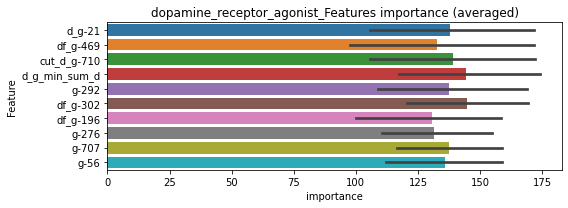

len(train_index) : 1688
len(valid_index) : 563
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0544116	valid_1's binary_logloss: 0.0960179
[2000]	training's binary_logloss: 0.028196	valid_1's binary_logloss: 0.074098
[3000]	training's binary_logloss: 0.0189019	valid_1's binary_logloss: 0.0666446
[4000]	training's binary_logloss: 0.0141744	valid_1's binary_logloss: 0.0631656
[5000]	training's binary_logloss: 0.0113626	valid_1's binary_logloss: 0.0608872
Early stopping, best iteration is:
[5002]	training's binary_logloss: 0.0113568	valid_1's binary_logloss: 0.060868


len(train_index) : 1688
len(valid_index) : 563
================================= fold 2/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0544589	valid_1's binary_logloss: 0.0991974
[2000]	training's binary_logloss: 0.0283218	valid_1's binary_logloss: 0.0766396
[3000]	training's binary_logloss: 0.018997	valid_1's binary_logloss: 0.0686621
Early stopping, best iteration is:
[3337]	training's binary_logloss: 0.0170741	valid_1's binary_logloss: 0.0671358


len(train_index) : 1688
len(valid_index) : 563
================================= fold 3/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0550519	valid_1's binary_logloss: 0.0941013
[2000]	training's binary_logloss: 0.0287433	valid_1's binary_logloss: 0.0708037
[3000]	training's binary_logloss: 0.0192054	valid_1's binary_logloss: 0.0624599
[4000]	training's binary_logloss: 0.0143668	valid_1's binary_logloss: 0.0586924
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.0119609	valid_1's binary_logloss: 0.0569496


len(train_index) : 1689
len(valid_index) : 562
================================= fold 4/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0545619	valid_1's binary_logloss: 0.0958609
[2000]	training's binary_logloss: 0.0282869	valid_1's binary_logloss: 0.0732133
[3000]	training's binary_logloss: 0.0189174	valid_1's binary_logloss: 0.0646493
[4000]	training's binary_logloss: 0.0142135	valid_1's binary_logloss: 0.0605694
[5000]	training's binary_logloss: 0.0113867	valid_1's binary_logloss: 0.0580829
Early stopping, best iteration is:
[5709]	training's binary_logloss: 0.0099737	valid_1's binary_logloss: 0.0567872


dopamine_receptor_agonist logloss: 0.06043678081668607
dopamine_receptor_agonist is unpredictable(><)!


mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0389788	valid_1's binary_logloss: 0.182736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0385724	valid_1's binary_logloss: 0.177092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0365889	valid_1's binary_logloss: 0.180398
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.930, PR-AUC:0.885


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.0347366	valid_1's binary_logloss: 0.174318


y_Threshold: 0.0583310, Threshold: 0.0795131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 790 → Positive_corect_labels: 1214/7986
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.05566, conf_1:0.10337
threshold: 0.0795131, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1214.0/7986, y_label_rate: 0.1520160
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.00825752	valid_1's binary_logloss: 0.0901922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.0101969	valid_1's binary_logloss: 0.0964492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00792913	valid_1's binary_logloss: 0.0868401
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00645193	valid_1's binary_logloss: 0.0755137


2 / 3, AUC score:0.990, PR-AUC:0.974
y_Threshold: 0.0357785, Threshold: 0.0795131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 1123.0/7804
p_label_rate: 0.0067805 Vs.target_rate: 0.01780
Num_p_label: 27.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.06361, conf_1:0.09542
threshold: 0.0795131, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 1123.0/7804, y_label_rate: 0.1439006
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00297385	valid_1's binary_logloss: 0.0458777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0033152	valid_1's binary_logloss: 0.0497327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00280734	valid_1's binary_logloss: 0.0424341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00235186	valid_1's binary_logloss: 0.046669


3 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0326837, Threshold: 0.0795131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1079.0/7716
p_label_rate: 0.0123054 Vs.target_rate: 0.01780
Num_p_label: 49.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.07156, conf_1:0.08746
threshold: 0.0795131, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1079.0/7716, y_label_rate: 0.1398393


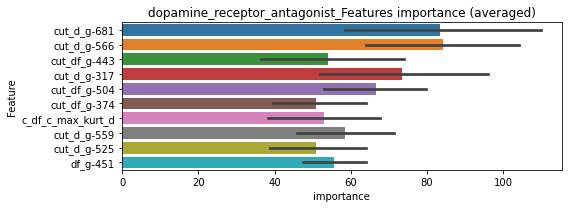

len(train_index) : 5787
len(valid_index) : 1929
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.000995085	valid_1's binary_logloss: 0.0146921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00131474	valid_1's binary_logloss: 0.0238876


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 3/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 4/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00168185	valid_1's binary_logloss: 0.0228494
Training until validation scores don't improve for 30 rounds


dopamine_receptor_antagonist logloss: 0.02079903284894295


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00146775	valid_1's binary_logloss: 0.0217671
mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0541093	valid_1's binary_logloss: 0.136601
Early stopping, best iteration is:
[1763]	training's binary_logloss: 0.0300545	valid_1's binary_logloss: 0.129202
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0533282	valid_1's binary_logloss: 0.14126
Early stopping, best iteration is:
[1664]	training's binary_logloss: 0.0314551	valid_1's binary_logloss: 0.135049
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0526081	valid_1's binary_logloss: 0.146124
Early stopping, best iteration is:
[1303]	training's binary_logloss: 0.0402625	valid_1's binary_logloss: 0.143545
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0528192	valid_1's binary_logloss: 0.146982
Early stopping, best iteration is:
[1329]	training's binary_logloss: 0.0395525	valid_1's binary_log

1 / 3, AUC score:0.957, PR-AUC:0.921
y_Threshold: 0.0635084, Threshold: 0.1259067, pos_neg_ratio: 0.8000000
Remove_noisy_data: 681 → Positive_corect_labels: 1321/8383
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.1259067, conf_0:0.08813, conf_1:0.16368
threshold: 0.1259067, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1321.0/8383, y_label_rate: 0.1575808
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313518	valid_1's binary_logloss: 0.0674046
Early stopping, best iteration is:
[1912]	training's binary_logloss: 0.015967	valid_1's binary_logloss: 0.0588133
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0290874	valid_1's binary_logloss: 0.0923206
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0216801	valid_1's binary_logloss: 0.0888283
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310682	valid_1's binary_logloss: 0.0700426
[2000]	training's binary_logloss: 0.0151292	valid_1's binary_logloss: 0.061648
Early stopping, best iteration is:
[2236]	training's binary_logloss: 0.0134421	valid_1's binary_logloss: 0.0608176
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315643	valid_1's binary_logloss: 0.0650736
[2000]	traini

2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0666032, Threshold: 0.1259067, pos_neg_ratio: 0.8000000
Remove_noisy_data: 168 → Positive_corect_labels: 1237.0/8215
p_label_rate: 0.0135610 Vs.target_rate: 0.01411
Num_p_label: 54.0, Expected: 56.2, Threshold: 0.1259067, conf_0:0.10073, conf_1:0.15109
threshold: 0.1259067, positive_p_label: 54.0/3982, p_label_rate: 0.0135610
positive_y_label: 1237.0/8215, y_label_rate: 0.1505782
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0196548	valid_1's binary_logloss: 0.0386972
[2000]	training's binary_logloss: 0.00982417	valid_1's binary_logloss: 0.0314303
[3000]	training's binary_logloss: 0.00645175	valid_1's binary_logloss: 0.0290793
Early stopping, best iteration is:
[3446]	training's binary_logloss: 0.0055926	valid_1's binary_logloss: 0.0285674
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0198126	valid_1's binary_logloss: 0.0375965
Early stopping, best iteration is:
[1913]	training's binary_logloss: 0.0103238	valid_1's binary_logloss: 0.0309561
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.020165	valid_1's binary_logloss: 0.0366921
[2000]	training's binary_logloss: 0.0100258	valid_1's binary_logloss: 0.0290266
[3000]	training's binary_logloss: 0.00656209	valid_1's binary_logloss: 0.0262493
Early stopping, best iter

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0638207, Threshold: 0.1259067, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 1205.0/8151
p_label_rate: 0.0180814 Vs.target_rate: 0.01411
Num_p_label: 72.0, Expected: 56.2, Threshold: 0.1259067, conf_0:0.11332, conf_1:0.13850
threshold: 0.1259067, positive_p_label: 72.0/3982, p_label_rate: 0.0180814
positive_y_label: 1205.0/8151, y_label_rate: 0.1478346


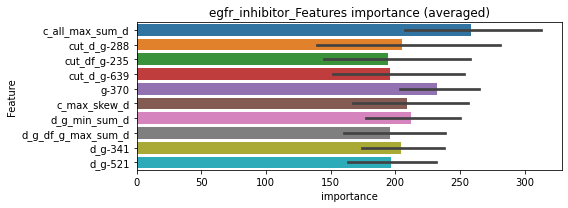

len(train_index) : 6113
len(valid_index) : 2038
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0206378	valid_1's binary_logloss: 0.0308283
[2000]	training's binary_logloss: 0.0104141	valid_1's binary_logloss: 0.0209226
[3000]	training's binary_logloss: 0.0069637	valid_1's binary_logloss: 0.017596
[4000]	training's binary_logloss: 0.00521644	valid_1's binary_logloss: 0.0158838
[5000]	training's binary_logloss: 0.00418497	valid_1's binary_logloss: 0.0149143
[6000]	training's binary_logloss: 0.0034998	valid_1's binary_logloss: 0.0142152
[7000]	training's binary_logloss: 0.00301137	valid_1's binary_logloss: 0.0137092
[8000]	training's binary_logloss: 0.002642	valid_1's binary_logloss: 0.0133317
Early stopping, best iteration is:
[8537]	training's binary_logloss: 0.00248612	valid_1's binary_logloss: 0.0131721


len(train_index) : 6113
len(valid_index) : 2038
================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0210621	valid_1's binary_logloss: 0.0274466
[2000]	training's binary_logloss: 0.0107282	valid_1's binary_logloss: 0.0173005
[3000]	training's binary_logloss: 0.00715427	valid_1's binary_logloss: 0.0138034
[4000]	training's binary_logloss: 0.00537152	valid_1's binary_logloss: 0.0120574
[5000]	training's binary_logloss: 0.00430511	valid_1's binary_logloss: 0.0110003
[6000]	training's binary_logloss: 0.00360591	valid_1's binary_logloss: 0.0102946
[7000]	training's binary_logloss: 0.00309884	valid_1's binary_logloss: 0.00977895
[8000]	training's binary_logloss: 0.00272355	valid_1's binary_logloss: 0.00938715
[9000]	training's binary_logloss: 0.00243231	valid_1's binary_logloss: 0.00909219
[10000]	training's binary_logloss: 0.0021964	valid_1's binary_logloss: 0.00884634
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.0021964	valid_1's binary_logloss: 0.008846

len(train_index) : 6113
len(valid_index) : 2038
================================= fold 3/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0206401	valid_1's binary_logloss: 0.0332226
[2000]	training's binary_logloss: 0.0105416	valid_1's binary_logloss: 0.0221231
[3000]	training's binary_logloss: 0.0070478	valid_1's binary_logloss: 0.0182426
[4000]	training's binary_logloss: 0.00528933	valid_1's binary_logloss: 0.0162006
[5000]	training's binary_logloss: 0.00424324	valid_1's binary_logloss: 0.0149794
[6000]	training's binary_logloss: 0.00355596	valid_1's binary_logloss: 0.0141407
[7000]	training's binary_logloss: 0.00305579	valid_1's binary_logloss: 0.0135585
[8000]	training's binary_logloss: 0.00268461	valid_1's binary_logloss: 0.0130924
[9000]	training's binary_logloss: 0.00239828	valid_1's binary_logloss: 0.012717
[10000]	training's binary_logloss: 0.00216831	valid_1's binary_logloss: 0.0124285
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00216831	valid_1's binary_logloss: 0.0124285


len(train_index) : 6114
len(valid_index) : 2037
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0201068	valid_1's binary_logloss: 0.0323
[2000]	training's binary_logloss: 0.010167	valid_1's binary_logloss: 0.0222258
[3000]	training's binary_logloss: 0.00679241	valid_1's binary_logloss: 0.0188483
[4000]	training's binary_logloss: 0.00509706	valid_1's binary_logloss: 0.0172249
Early stopping, best iteration is:
[4100]	training's binary_logloss: 0.00497584	valid_1's binary_logloss: 0.0171133


egfr_inhibitor logloss: 0.012889526578764353
elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000232452	valid_1's binary_logloss: 0.000859439
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000230216	valid_1's binary_logloss: 0.000734649
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00023171	valid_1's binary_logloss: 0.000380352
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008658, Threshold: 0.0027007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0027007, conf_0:0.00189, conf_1:0.00351
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0327007


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000228512	valid_1's binary_logloss: 0.00134341


threshold: 0.0327007, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02616, conf_1:0.03924


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02943, conf_1:0.03597


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


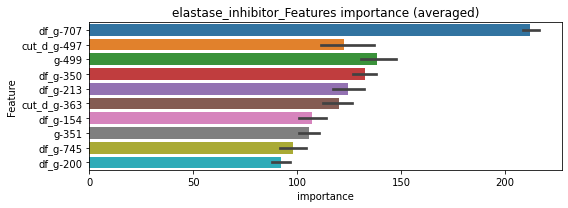

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000230819	valid_1's binary_logloss: 0.000877822
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000230752	valid_1's binary_logloss: 0.000808727
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000231395	valid_1's binary_logloss: 0.000304327
Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0006665683270342578


Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000225171	valid_1's binary_logloss: 0.00067398


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000362937	valid_1's binary_logloss: 0.00277857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000322508	valid_1's binary_logloss: 0.0025593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000324188	valid_1's binary_logloss: 0.000841975
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020080, Threshold: 0.0065932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000328764	valid_1's binary_logloss: 0.000908318


p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0065932, conf_0:0.00462, conf_1:0.00857
Num_p_label: 4.0, Expected: 3.3, Adj_threshold_1: 0.0365932
threshold: 0.0365932, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0365932, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00084
Num_p_label: 18.0, Expected: 3.3, Threshold: 0.0365932, conf_0:0.02927, conf_1:0.04391
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_1: 0.0665932
threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0665932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00084
Num_p_label: 8.0, Expected: 3.3, Threshold: 0.0665932, conf_0:0.05993, conf_1:0.07325


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


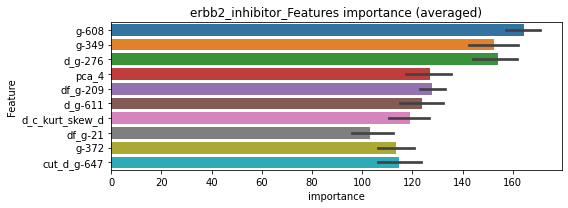

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000344559	valid_1's binary_logloss: 0.00308952


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.00105078
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.00105078


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0003129	valid_1's binary_logloss: 0.00062523
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.0003129	valid_1's binary_logloss: 0.00062523


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031564	valid_1's binary_logloss: 0.000836686
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000315133	valid_1's binary_logloss: 0.000835913


erbb2_inhibitor logloss: 0.0014005093208885964


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 3996
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 3996


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0479893	valid_1's binary_logloss: 0.118952
Early stopping, best iteration is:
[1654]	training's binary_logloss: 0.0289714	valid_1's binary_logloss: 0.112187
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0468077	valid_1's binary_logloss: 0.132181
Early stopping, best iteration is:
[1281]	training's binary_logloss: 0.0365849	valid_1's binary_logloss: 0.130149
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0484716	valid_1's binary_logloss: 0.116166
Early stopping, best iteration is:
[1635]	training's binary_logloss: 0.0295927	valid_1's binary_logloss: 0.110481
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0465243	valid_1's binary_logloss: 0.140113
Early stopping, best iteration is:
[1080]	training's binary_logloss: 0.0432484	valid_1's binary_lo

1 / 3, AUC score:0.969, PR-AUC:0.940
y_Threshold: 0.0620473, Threshold: 0.0940684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 322 → Positive_corect_labels: 718/4473
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0940684, conf_0:0.06585, conf_1:0.12229
Num_p_label: 18.0, Expected: 26.4, Adj_threshold_1: 0.1240684
threshold: 0.1240684, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 718.0/4473, y_label_rate: 0.1605187
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302734	valid_1's binary_logloss: 0.0838922
Early stopping, best iteration is:
[1904]	training's binary_logloss: 0.0158569	valid_1's binary_logloss: 0.0780058
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313894	valid_1's binary_logloss: 0.0737228
[2000]	training's binary_logloss: 0.015596	valid_1's binary_logloss: 0.0663256
Early stopping, best iteration is:
[2347]	training's binary_logloss: 0.0132184	valid_1's binary_logloss: 0.0654767
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031067	valid_1's binary_logloss: 0.0729246
[2000]	training's binary_logloss: 0.0155327	valid_1's binary_logloss: 0.0650241
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.014772	valid_1's binary_logloss: 0.064593
Training until validation scores don't improve for 30 rounds
[1000]	training

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0545510, Threshold: 0.1240684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 80 → Positive_corect_labels: 678.0/4393
p_label_rate: 0.0065294 Vs.target_rate: 0.00663
Num_p_label: 26.0, Expected: 26.4, Threshold: 0.1240684, conf_0:0.09925, conf_1:0.14888
threshold: 0.1240684, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 678.0/4393, y_label_rate: 0.1543364
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226933	valid_1's binary_logloss: 0.0457311
[2000]	training's binary_logloss: 0.0113777	valid_1's binary_logloss: 0.0379836
Early stopping, best iteration is:
[2613]	training's binary_logloss: 0.00865867	valid_1's binary_logloss: 0.0361893
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233819	valid_1's binary_logloss: 0.0395352
[2000]	training's binary_logloss: 0.011724	valid_1's binary_logloss: 0.0305542
[3000]	training's binary_logloss: 0.00775337	valid_1's binary_logloss: 0.0274204
[4000]	training's binary_logloss: 0.00577958	valid_1's binary_logloss: 0.0258462
Early stopping, best iteration is:
[4154]	training's binary_logloss: 0.00556256	valid_1's binary_logloss: 0.0256845
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0223907	valid_1's binary_logloss: 0.0448808
[2000]	training's binary

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0432292, Threshold: 0.1240684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 667.0/4371
p_label_rate: 0.0107986 Vs.target_rate: 0.00663
Num_p_label: 43.0, Expected: 26.4, Threshold: 0.1240684, conf_0:0.11166, conf_1:0.13648
Num_p_label: 35.0, Expected: 26.4, Adj_threshold_1: 0.1540684
threshold: 0.1540684, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 667.0/4371, y_label_rate: 0.1525967


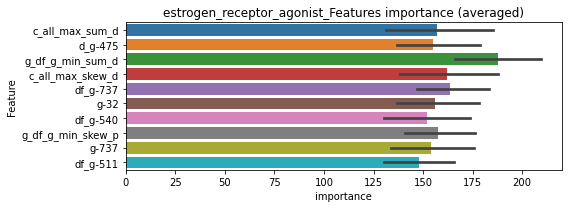

len(train_index) : 3278
len(valid_index) : 1093
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286862	valid_1's binary_logloss: 0.0446438
[2000]	training's binary_logloss: 0.0147916	valid_1's binary_logloss: 0.0325503
[3000]	training's binary_logloss: 0.00988842	valid_1's binary_logloss: 0.0287047
[4000]	training's binary_logloss: 0.00738226	valid_1's binary_logloss: 0.0266803
[5000]	training's binary_logloss: 0.00590694	valid_1's binary_logloss: 0.0256509
Early stopping, best iteration is:
[5706]	training's binary_logloss: 0.00517836	valid_1's binary_logloss: 0.0250575


len(train_index) : 3278
len(valid_index) : 1093
================================= fold 2/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291746	valid_1's binary_logloss: 0.0418003
[2000]	training's binary_logloss: 0.0151063	valid_1's binary_logloss: 0.0287827
[3000]	training's binary_logloss: 0.0101137	valid_1's binary_logloss: 0.0242777
[4000]	training's binary_logloss: 0.0075563	valid_1's binary_logloss: 0.0219115
[5000]	training's binary_logloss: 0.00604947	valid_1's binary_logloss: 0.0205269
[6000]	training's binary_logloss: 0.00504732	valid_1's binary_logloss: 0.019532
[7000]	training's binary_logloss: 0.0043281	valid_1's binary_logloss: 0.0188553
[8000]	training's binary_logloss: 0.00379981	valid_1's binary_logloss: 0.0183377
[9000]	training's binary_logloss: 0.0033888	valid_1's binary_logloss: 0.0178882
Early stopping, best iteration is:
[9304]	training's binary_logloss: 0.00328179	valid_1's binary_logloss: 0.017763


len(train_index) : 3278
len(valid_index) : 1093
================================= fold 3/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285029	valid_1's binary_logloss: 0.0456799
[2000]	training's binary_logloss: 0.0146674	valid_1's binary_logloss: 0.0330644
[3000]	training's binary_logloss: 0.00981174	valid_1's binary_logloss: 0.0290377
[4000]	training's binary_logloss: 0.00735244	valid_1's binary_logloss: 0.0269847
[5000]	training's binary_logloss: 0.00589023	valid_1's binary_logloss: 0.0258918
Early stopping, best iteration is:
[4992]	training's binary_logloss: 0.00589878	valid_1's binary_logloss: 0.0258806


len(train_index) : 3279
len(valid_index) : 1092
================================= fold 4/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0280824	valid_1's binary_logloss: 0.0499097
[2000]	training's binary_logloss: 0.0145509	valid_1's binary_logloss: 0.0380754
[3000]	training's binary_logloss: 0.00976053	valid_1's binary_logloss: 0.0339855
Early stopping, best iteration is:
[3329]	training's binary_logloss: 0.00876915	valid_1's binary_logloss: 0.0330611


estrogen_receptor_agonist logloss: 0.025438798002241993
estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00052112	valid_1's binary_logloss: 0.00952746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000576397	valid_1's binary_logloss: 0.0139528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000538499	valid_1's binary_logloss: 0.00393803
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049400, Threshold: 0.1903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00121031	valid_1's binary_logloss: 0.0265691


p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1903560, conf_0:0.13325, conf_1:0.24746
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_1: 0.2203560
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.2503560
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.3103560
Num_p_label: 25.0, Expected: 8.0, Adj_threshold_5: 0.3403560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_6: 0.3703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.4003560
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.4303560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4603560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.4903560
threshold: 0.4903560, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000512582	valid_1's binary_logloss: 0.00748627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00052509	valid_1's binary_logloss: 0.0132082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000499526	valid_1's binary_logloss: 0.00431506
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0376580, Threshold: 0.4903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3798


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00102477	valid_1's binary_logloss: 0.0278137


p_label_rate: 0.0085384 Vs.target_rate: 0.00202
Num_p_label: 34.0, Expected: 8.0, Threshold: 0.4903560, conf_0:0.39228, conf_1:0.58843
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5203560
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.5503560
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.5803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6103560
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6403560
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_6: 0.6703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.7003560
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.7303560
threshold: 0.7303560, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000468066	valid_1's binary_logloss: 0.00451032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000506699	valid_1's binary_logloss: 0.00878163
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000514102	valid_1's binary_logloss: 0.00741139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000521993	valid_1's binary_logloss: 0.0177837


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0451250, Threshold: 0.7303560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.7303560, conf_0:0.65732, conf_1:0.80339
threshold: 0.7303560, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


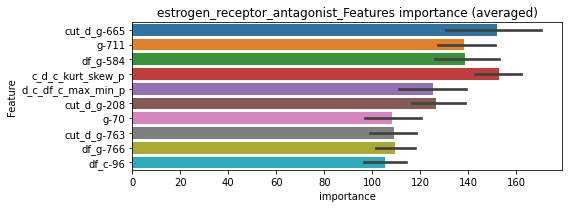

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000487493	valid_1's binary_logloss: 0.0050781


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000715432	valid_1's binary_logloss: 0.0188331
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000532634	valid_1's binary_logloss: 0.0101475


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000508133	valid_1's binary_logloss: 0.00388802


estrogen_receptor_antagonist logloss: 0.00948798619679034
faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000453312	valid_1's binary_logloss: 0.00551267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000424357	valid_1's binary_logloss: 0.00484501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000422203	valid_1's binary_logloss: 0.00240841
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00042021	valid_1's binary_logloss: 0.0042654


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028585, Threshold: 0.0094032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0094032, conf_0:0.00658, conf_1:0.01222
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_1: 0.0394032
threshold: 0.0394032, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03152, conf_1:0.04728
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03546, conf_1:0.04334
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


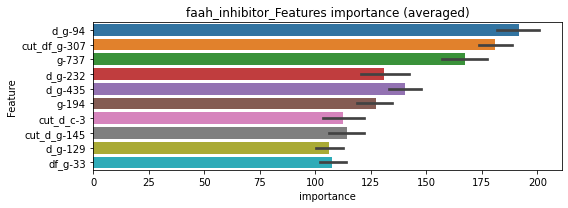

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000450229	valid_1's binary_logloss: 0.0049723


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000404724	valid_1's binary_logloss: 0.00450861


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000415868	valid_1's binary_logloss: 0.00201621


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000418598	valid_1's binary_logloss: 0.00350257


faah_inhibitor logloss: 0.003750441817598832
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000294267	valid_1's binary_logloss: 0.00138727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000287027	valid_1's binary_logloss: 0.000989525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000294857	valid_1's binary_logloss: 0.000523521
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014914, Threshold: 0.0039949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039949, conf_0:0.00280, conf_1:0.00519
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0339949


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000294923	valid_1's binary_logloss: 0.00342668


threshold: 0.0339949, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0339949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0339949, conf_0:0.02720, conf_1:0.04079
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0639949
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0639949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0639949, conf_0:0.05760, conf_1:0.07039


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


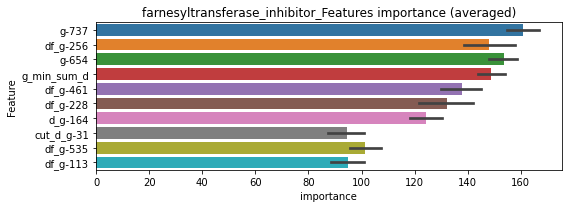

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000284711	valid_1's binary_logloss: 0.00161121


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000279529	valid_1's binary_logloss: 0.000645443
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000278168	valid_1's binary_logloss: 0.000643608


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000283951	valid_1's binary_logloss: 0.00050037
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000283951	valid_1's binary_logloss: 0.00050037


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000295906	valid_1's binary_logloss: 0.00364927


farnesyltransferase_inhibitor logloss: 0.0016015099193632464
fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000339498	valid_1's binary_logloss: 0.00115366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000337202	valid_1's binary_logloss: 0.00721403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000347535	valid_1's binary_logloss: 0.00164577
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018693, Threshold: 0.0087358, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000342156	valid_1's binary_logloss: 0.0055406


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0087358, conf_0:0.00612, conf_1:0.01136
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0387358
threshold: 0.0387358, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000334547	valid_1's binary_logloss: 0.000893833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000337633	valid_1's binary_logloss: 0.00592948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034043	valid_1's binary_logloss: 0.00146318
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0307888, Threshold: 0.0387358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00105
Num_p_label: 20.0, Expected: 4.2, Threshold: 0.0387358, conf_0:0.03099, conf_1:0.04648
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0687358


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000438208	valid_1's binary_logloss: 0.00672482


threshold: 0.0687358, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000334547	valid_1's binary_logloss: 0.000893833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000337633	valid_1's binary_logloss: 0.00592948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034043	valid_1's binary_logloss: 0.00146318
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0307888, Threshold: 0.0687358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0687358, conf_0:0.06186, conf_1:0.07561


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000438208	valid_1's binary_logloss: 0.00672482


threshold: 0.0687358, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


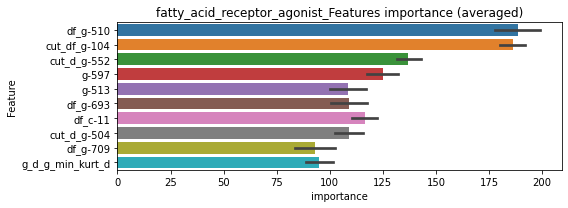

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000332227	valid_1's binary_logloss: 0.000856827
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000332797	valid_1's binary_logloss: 0.000856818


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000335215	valid_1's binary_logloss: 0.00498961


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000342468	valid_1's binary_logloss: 0.00120331


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000337058	valid_1's binary_logloss: 0.00532658


fatty_acid_receptor_agonist logloss: 0.003094419307955251
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000514423	valid_1's binary_logloss: 0.0175326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000512766	valid_1's binary_logloss: 0.0073775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00052688	valid_1's binary_logloss: 0.00446889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000511176	valid_1's binary_logloss: 0.0109288


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043282, Threshold: 0.0176913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0176913, conf_0:0.01238, conf_1:0.02300
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_1: 0.0476913
threshold: 0.0476913, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000677432	valid_1's binary_logloss: 0.0177828
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000498116	valid_1's binary_logloss: 0.00624964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00051051	valid_1's binary_logloss: 0.00377615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000498538	valid_1's binary_logloss: 0.0110419


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246261, Threshold: 0.0476913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00210
Num_p_label: 30.0, Expected: 8.4, Threshold: 0.0476913, conf_0:0.03815, conf_1:0.05723
Num_p_label: 18.0, Expected: 8.4, Adj_threshold_1: 0.0776913
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000489695	valid_1's binary_logloss: 0.00513002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000526	valid_1's binary_logloss: 0.0151451
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00050432	valid_1's binary_logloss: 0.00162243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000492852	valid_1's binary_logloss: 0.0155387


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0190430, Threshold: 0.0776913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00210
Num_p_label: 18.0, Expected: 8.4, Threshold: 0.0776913, conf_0:0.06992, conf_1:0.08546
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


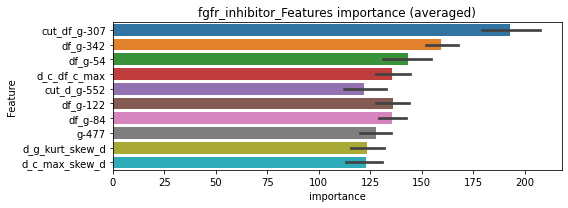

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000585523	valid_1's binary_logloss: 0.00817335


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050369	valid_1's binary_logloss: 0.0070327
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000502897	valid_1's binary_logloss: 0.00702785


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000520453	valid_1's binary_logloss: 0.00301455


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000516495	valid_1's binary_logloss: 0.0124944


fgfr_inhibitor logloss: 0.007677825067803415


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 6506
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 6506


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498976	valid_1's binary_logloss: 0.14105
Early stopping, best iteration is:
[1603]	training's binary_logloss: 0.0307086	valid_1's binary_logloss: 0.135417
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0495837	valid_1's binary_logloss: 0.148075
Early stopping, best iteration is:
[1404]	training's binary_logloss: 0.0351087	valid_1's binary_logloss: 0.144128
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0516999	valid_1's binary_logloss: 0.118744
[2000]	training's binary_logloss: 0.0249722	valid_1's binary_logloss: 0.107562
Early stopping, best iteration is:
[2156]	training's binary_logloss: 0.0230148	valid_1's binary_logloss: 0.106486
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0498936	valid_1's binary_logloss: 0.142279
Early stopping, best

1 / 3, AUC score:0.965, PR-AUC:0.934
y_Threshold: 0.0618674, Threshold: 0.0932467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 529 → Positive_corect_labels: 1167/7278
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.0932467, conf_0:0.06527, conf_1:0.12122
threshold: 0.0932467, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1167.0/7278, y_label_rate: 0.1603462
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0346217	valid_1's binary_logloss: 0.0765152
[2000]	training's binary_logloss: 0.0168509	valid_1's binary_logloss: 0.0669891
Early stopping, best iteration is:
[2198]	training's binary_logloss: 0.015245	valid_1's binary_logloss: 0.0661398
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0325235	valid_1's binary_logloss: 0.0971306
Early stopping, best iteration is:
[1750]	training's binary_logloss: 0.0183584	valid_1's binary_logloss: 0.0898908
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351161	valid_1's binary_logloss: 0.0685978
[2000]	training's binary_logloss: 0.0171311	valid_1's binary_logloss: 0.0569685
[3000]	training's binary_logloss: 0.0111491	valid_1's binary_logloss: 0.0526471
Early stopping, best iteration is:
[3363]	training's binary_logloss: 0.0098756	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0597606, Threshold: 0.0932467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 112 → Positive_corect_labels: 1111.0/7166
p_label_rate: 0.0155701 Vs.target_rate: 0.01172
Num_p_label: 62.0, Expected: 46.7, Threshold: 0.0932467, conf_0:0.07460, conf_1:0.11190
threshold: 0.0932467, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 1111.0/7166, y_label_rate: 0.1550377
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260136	valid_1's binary_logloss: 0.0619424
[2000]	training's binary_logloss: 0.0128648	valid_1's binary_logloss: 0.0541055
Early stopping, best iteration is:
[2091]	training's binary_logloss: 0.0122718	valid_1's binary_logloss: 0.053697
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026454	valid_1's binary_logloss: 0.0576716
[2000]	training's binary_logloss: 0.0130854	valid_1's binary_logloss: 0.0488668
Early stopping, best iteration is:
[2781]	training's binary_logloss: 0.00924918	valid_1's binary_logloss: 0.0462673
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0258199	valid_1's binary_logloss: 0.0616148
[2000]	training's binary_logloss: 0.0128306	valid_1's binary_logloss: 0.0532057
Early stopping, best iteration is:
[2635]	training's binary_logloss: 0.00958673	valid_1's binary_logloss: 0.

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0461315, Threshold: 0.0932467, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1076.0/7096
p_label_rate: 0.0155701 Vs.target_rate: 0.01172
Num_p_label: 62.0, Expected: 46.7, Threshold: 0.0932467, conf_0:0.08392, conf_1:0.10257
threshold: 0.0932467, positive_p_label: 62.0/3982, p_label_rate: 0.0155701
positive_y_label: 1076.0/7096, y_label_rate: 0.1516347


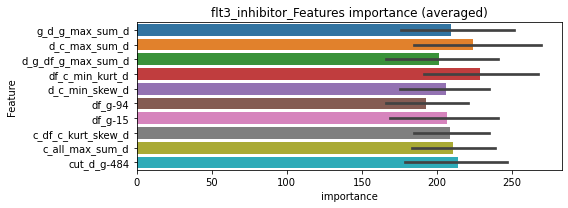

len(train_index) : 5322
len(valid_index) : 1774
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0309209	valid_1's binary_logloss: 0.0481223
[2000]	training's binary_logloss: 0.0159801	valid_1's binary_logloss: 0.035903
[3000]	training's binary_logloss: 0.0106324	valid_1's binary_logloss: 0.0316192
[4000]	training's binary_logloss: 0.00793456	valid_1's binary_logloss: 0.0292715
[5000]	training's binary_logloss: 0.00632452	valid_1's binary_logloss: 0.0279003
[6000]	training's binary_logloss: 0.00524773	valid_1's binary_logloss: 0.0268673
Early stopping, best iteration is:
[6363]	training's binary_logloss: 0.00494586	valid_1's binary_logloss: 0.0266456


len(train_index) : 5322
len(valid_index) : 1774
================================= fold 2/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303639	valid_1's binary_logloss: 0.0519374
[2000]	training's binary_logloss: 0.0157849	valid_1's binary_logloss: 0.0404212
[3000]	training's binary_logloss: 0.0105187	valid_1's binary_logloss: 0.0363581
[4000]	training's binary_logloss: 0.00783803	valid_1's binary_logloss: 0.0341989
Early stopping, best iteration is:
[4294]	training's binary_logloss: 0.0072981	valid_1's binary_logloss: 0.0338086


len(train_index) : 5322
len(valid_index) : 1774
================================= fold 3/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0306758	valid_1's binary_logloss: 0.0500758
[2000]	training's binary_logloss: 0.0159879	valid_1's binary_logloss: 0.038617
[3000]	training's binary_logloss: 0.0106344	valid_1's binary_logloss: 0.0342443
[4000]	training's binary_logloss: 0.00792734	valid_1's binary_logloss: 0.0320489
[5000]	training's binary_logloss: 0.00632776	valid_1's binary_logloss: 0.0306022
Early stopping, best iteration is:
[5552]	training's binary_logloss: 0.0056777	valid_1's binary_logloss: 0.0301086


len(train_index) : 5322
len(valid_index) : 1774
================================= fold 4/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029781	valid_1's binary_logloss: 0.0531343
[2000]	training's binary_logloss: 0.0155297	valid_1's binary_logloss: 0.042097
[3000]	training's binary_logloss: 0.0103841	valid_1's binary_logloss: 0.0383454
Early stopping, best iteration is:
[3652]	training's binary_logloss: 0.00849757	valid_1's binary_logloss: 0.0370729


flt3_inhibitor logloss: 0.03190892011877094
flt3_inhibitor is unpredictable(><)!
focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000292416	valid_1's binary_logloss: 0.00118516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000297237	valid_1's binary_logloss: 0.00197324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288964	valid_1's binary_logloss: 0.00115505
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014519, Threshold: 0.0051613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0051613, conf_0:0.00361, conf_1:0.00671
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0351613


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000288802	valid_1's binary_logloss: 0.00104823


threshold: 0.0351613, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0351613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0351613, conf_0:0.02813, conf_1:0.04219
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0651613


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0651613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0651613, conf_0:0.05865, conf_1:0.07168
threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


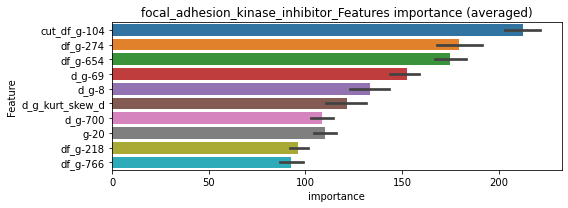

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280591	valid_1's binary_logloss: 0.00089329
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000273566	valid_1's binary_logloss: 0.000881165


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280563	valid_1's binary_logloss: 0.00126729
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000281428	valid_1's binary_logloss: 0.00126664


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282341	valid_1's binary_logloss: 0.000665434
Early stopping, best iteration is:
[1047]	training's binary_logloss: 0.000280526	valid_1's binary_logloss: 0.000662528


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00028428	valid_1's binary_logloss: 0.000705032
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.000277426	valid_1's binary_logloss: 0.000694812


focal_adhesion_kinase_inhibitor logloss: 0.0008762924980626207
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000295281	valid_1's binary_logloss: 0.000980463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000296919	valid_1's binary_logloss: 0.00130742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000295748	valid_1's binary_logloss: 0.000676627
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014677, Threshold: 0.0061014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0061014, conf_0:0.00427, conf_1:0.00793
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0361014


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000301416	valid_1's binary_logloss: 0.0022544


threshold: 0.0361014, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0361014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0361014, conf_0:0.02888, conf_1:0.04332
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0661014


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0961014
threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0961014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0961014, conf_0:0.08649, conf_1:0.10571


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


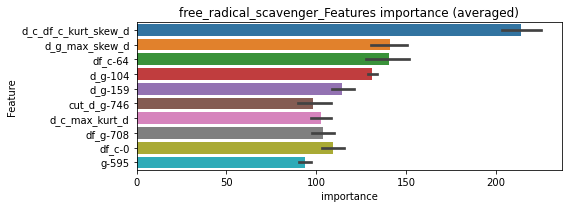

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284998	valid_1's binary_logloss: 0.000730602
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000284998	valid_1's binary_logloss: 0.000730602


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000285232	valid_1's binary_logloss: 0.000986432


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.0002874	valid_1's binary_logloss: 0.000531578


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000301137	valid_1's binary_logloss: 0.00175801


free_radical_scavenger logloss: 0.001001659412196387
fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000353994	valid_1's binary_logloss: 0.0014373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000358147	valid_1's binary_logloss: 0.00699769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000357463	valid_1's binary_logloss: 0.000822493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.0003528	valid_1's binary_logloss: 0.00224403


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019324, Threshold: 0.0069234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0069234, conf_0:0.00485, conf_1:0.00900
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_1: 0.0369234
threshold: 0.0369234, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000349793	valid_1's binary_logloss: 0.00128224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000367888	valid_1's binary_logloss: 0.00760747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000350445	valid_1's binary_logloss: 0.000681747
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176620, Threshold: 0.0369234, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000340051	valid_1's binary_logloss: 0.00267197


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00097
Num_p_label: 18.0, Expected: 3.8, Threshold: 0.0369234, conf_0:0.02954, conf_1:0.04431
Num_p_label: 10.0, Expected: 3.8, Adj_threshold_1: 0.0669234
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_2: 0.0969234
threshold: 0.0969234, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000349793	valid_1's binary_logloss: 0.00128224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000367888	valid_1's binary_logloss: 0.00760747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000350445	valid_1's binary_logloss: 0.000681747
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000340051	valid_1's binary_logloss: 0.00267197


y_Threshold: 0.0176620, Threshold: 0.0969234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, Expected: 3.8, Threshold: 0.0969234, conf_0:0.08723, conf_1:0.10662
threshold: 0.0969234, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


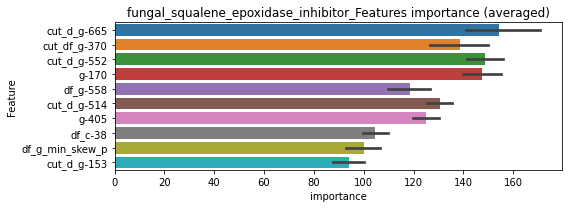

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00035854	valid_1's binary_logloss: 0.00127644


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000349495	valid_1's binary_logloss: 0.00654898


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000360236	valid_1's binary_logloss: 0.000938549


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000358236	valid_1's binary_logloss: 0.00200667


fungal_squalene_epoxidase_inhibitor logloss: 0.0026930476012493195
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0384274	valid_1's binary_logloss: 0.11331
Early stopping, best iteration is:
[1734]	training's binary_logloss: 0.0219516	valid_1's binary_logloss: 0.10626
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0393255	valid_1's binary_logloss: 0.0998873
[2000]	training's binary_logloss: 0.0194167	valid_1's binary_logloss: 0.0909136
Early stopping, best iteration is:
[2477]	training's binary_logloss: 0.0154844	valid_1's binary_logloss: 0.0893321
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0399524	valid_1's binary_logloss: 0.0947372
Early stopping, best iteration is:
[1914]	training's binary_logloss: 0.0205642	valid_1's binary_logloss: 0.0854183
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0411386	valid_1's binary_logloss: 0.0829195
[2000]	training

1 / 3, AUC score:0.991, PR-AUC:0.976
y_Threshold: 0.0418744, Threshold: 0.1321966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 189 → Positive_corect_labels: 624/3731
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1321966, conf_0:0.09254, conf_1:0.17186
Num_p_label: 20.0, Expected: 17.7, Adj_threshold_1: 0.1621966
threshold: 0.1621966, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 624.0/3731, y_label_rate: 0.1672474
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0318235	valid_1's binary_logloss: 0.0805281
[2000]	training's binary_logloss: 0.0158642	valid_1's binary_logloss: 0.0711594
Early stopping, best iteration is:
[2055]	training's binary_logloss: 0.0154058	valid_1's binary_logloss: 0.0707783
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323888	valid_1's binary_logloss: 0.0777742
[2000]	training's binary_logloss: 0.0161043	valid_1's binary_logloss: 0.0676958
[3000]	training's binary_logloss: 0.0105573	valid_1's binary_logloss: 0.0644017
Early stopping, best iteration is:
[3189]	training's binary_logloss: 0.00992312	valid_1's binary_logloss: 0.0640787
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0341884	valid_1's binary_logloss: 0.0555197
[2000]	training's binary_logloss: 0.0170339	valid_1's binary_logloss: 0.043959
[3000]	training's binary_lo

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0616424, Threshold: 0.1621966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 599.0/3681
p_label_rate: 0.0208438 Vs.target_rate: 0.00445
Num_p_label: 83.0, Expected: 17.7, Threshold: 0.1621966, conf_0:0.12976, conf_1:0.19464
Num_p_label: 74.0, Expected: 17.7, Adj_threshold_1: 0.1921966
Num_p_label: 65.0, Expected: 17.7, Adj_threshold_2: 0.2221966
Num_p_label: 50.0, Expected: 17.7, Adj_threshold_3: 0.2521966
Num_p_label: 39.0, Expected: 17.7, Adj_threshold_4: 0.2821966
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_5: 0.3121966
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_6: 0.3421966
threshold: 0.3421966, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 599.0/3681, y_label_rate: 0.1627275
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0257062	valid_1's binary_logloss: 0.0701805
Early stopping, best iteration is:
[1750]	training's binary_logloss: 0.0147548	valid_1's binary_logloss: 0.0638774
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270672	valid_1's binary_logloss: 0.0533433
[2000]	training's binary_logloss: 0.0134781	valid_1's binary_logloss: 0.0431707
[3000]	training's binary_logloss: 0.00891208	valid_1's binary_logloss: 0.0399796
Early stopping, best iteration is:
[3407]	training's binary_logloss: 0.00784118	valid_1's binary_logloss: 0.0390769
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278705	valid_1's binary_logloss: 0.0458062
[2000]	training's binary_logloss: 0.0139202	valid_1's binary_logloss: 0.0350596
[3000]	training's binary_logloss: 0.00920181	valid_1's binary_logloss: 0.0309715
[4000]	training's binary

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0618771, Threshold: 0.3421966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 582.0/3647
p_label_rate: 0.0133099 Vs.target_rate: 0.00445
Num_p_label: 53.0, Expected: 17.7, Threshold: 0.3421966, conf_0:0.30798, conf_1:0.37642
Num_p_label: 46.0, Expected: 17.7, Adj_threshold_1: 0.3721966
Num_p_label: 37.0, Expected: 17.7, Adj_threshold_2: 0.4021966
Num_p_label: 31.0, Expected: 17.7, Adj_threshold_3: 0.4321966
Num_p_label: 25.0, Expected: 17.7, Adj_threshold_4: 0.4621966
threshold: 0.4621966, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 582.0/3647, y_label_rate: 0.1595832


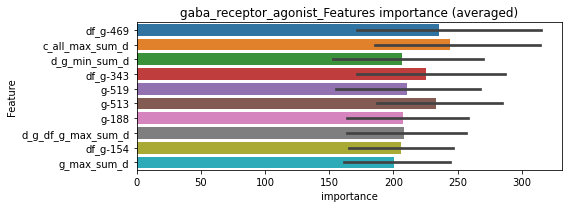

len(train_index) : 2735
len(valid_index) : 912
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029766	valid_1's binary_logloss: 0.0658436
[2000]	training's binary_logloss: 0.0153643	valid_1's binary_logloss: 0.0534113
[3000]	training's binary_logloss: 0.010323	valid_1's binary_logloss: 0.0492315
Early stopping, best iteration is:
[3540]	training's binary_logloss: 0.00875904	valid_1's binary_logloss: 0.0480396


len(train_index) : 2735
len(valid_index) : 912
================================= fold 2/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315026	valid_1's binary_logloss: 0.0599431
[2000]	training's binary_logloss: 0.016249	valid_1's binary_logloss: 0.0473538
Early stopping, best iteration is:
[2951]	training's binary_logloss: 0.0110497	valid_1's binary_logloss: 0.0431862


len(train_index) : 2735
len(valid_index) : 912
================================= fold 3/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.033636	valid_1's binary_logloss: 0.0433144
[2000]	training's binary_logloss: 0.0174315	valid_1's binary_logloss: 0.0293999
[3000]	training's binary_logloss: 0.0116206	valid_1's binary_logloss: 0.0245628
[4000]	training's binary_logloss: 0.0087044	valid_1's binary_logloss: 0.0220613
[5000]	training's binary_logloss: 0.0069793	valid_1's binary_logloss: 0.0205667
[6000]	training's binary_logloss: 0.00582161	valid_1's binary_logloss: 0.0195672
[7000]	training's binary_logloss: 0.00500952	valid_1's binary_logloss: 0.0188574
[8000]	training's binary_logloss: 0.00439824	valid_1's binary_logloss: 0.0183085
Early stopping, best iteration is:
[8330]	training's binary_logloss: 0.00422702	valid_1's binary_logloss: 0.0181386


len(train_index) : 2736
len(valid_index) : 911
================================= fold 4/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322915	valid_1's binary_logloss: 0.0461812
[2000]	training's binary_logloss: 0.0166948	valid_1's binary_logloss: 0.0320022
[3000]	training's binary_logloss: 0.0111932	valid_1's binary_logloss: 0.026916
[4000]	training's binary_logloss: 0.0084016	valid_1's binary_logloss: 0.0242707
[5000]	training's binary_logloss: 0.00675904	valid_1's binary_logloss: 0.0226993
[6000]	training's binary_logloss: 0.00563306	valid_1's binary_logloss: 0.0215537
[7000]	training's binary_logloss: 0.00485278	valid_1's binary_logloss: 0.0208217
[8000]	training's binary_logloss: 0.00426796	valid_1's binary_logloss: 0.0201842
[9000]	training's binary_logloss: 0.00381049	valid_1's binary_logloss: 0.019693
Early stopping, best iteration is:
[9701]	training's binary_logloss: 0.00355054	valid_1's binary_logloss: 0.0194589


gaba_receptor_agonist logloss: 0.03220932755198157
gaba_receptor_agonist is unpredictable(><)!


mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4671
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4671


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0441427	valid_1's binary_logloss: 0.103454
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.0291518	valid_1's binary_logloss: 0.0987692
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421064	valid_1's binary_logloss: 0.127276
Early stopping, best iteration is:
[1346]	training's binary_logloss: 0.0311043	valid_1's binary_logloss: 0.124428
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0424818	valid_1's binary_logloss: 0.114198
Early stopping, best iteration is:
[1337]	training's binary_logloss: 0.0316845	valid_1's binary_logloss: 0.111324
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0424442	valid_1's binary_logloss: 0.12055
Early stopping, best iteration is:
[1666]	training's binary_logloss: 0.0251643	valid_1's binary_lo

1 / 3, AUC score:0.971, PR-AUC:0.945
y_Threshold: 0.0517804, Threshold: 0.0761042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 357 → Positive_corect_labels: 849/5248
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0761042, conf_0:0.05327, conf_1:0.09894
threshold: 0.0761042, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 849.0/5248, y_label_rate: 0.1617759
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0280921	valid_1's binary_logloss: 0.0603689
[2000]	training's binary_logloss: 0.0139312	valid_1's binary_logloss: 0.0523777
Early stopping, best iteration is:
[2902]	training's binary_logloss: 0.00941602	valid_1's binary_logloss: 0.0498965
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276097	valid_1's binary_logloss: 0.0662024
[2000]	training's binary_logloss: 0.0136109	valid_1's binary_logloss: 0.0583789
Early stopping, best iteration is:
[2109]	training's binary_logloss: 0.012868	valid_1's binary_logloss: 0.0580277
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279408	valid_1's binary_logloss: 0.0659705
[2000]	training's binary_logloss: 0.0136887	valid_1's binary_logloss: 0.0593997
Early stopping, best iteration is:
[2175]	training's binary_logloss: 0.0125348	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0521609, Threshold: 0.0761042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 813.0/5176
p_label_rate: 0.0050226 Vs.target_rate: 0.00693
Num_p_label: 20.0, Expected: 27.6, Threshold: 0.0761042, conf_0:0.06088, conf_1:0.09133
threshold: 0.0761042, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 813.0/5176, y_label_rate: 0.1570711
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0209258	valid_1's binary_logloss: 0.0480139
Early stopping, best iteration is:
[1461]	training's binary_logloss: 0.0143377	valid_1's binary_logloss: 0.044148
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0209568	valid_1's binary_logloss: 0.0473712
[2000]	training's binary_logloss: 0.0104109	valid_1's binary_logloss: 0.0406527
Early stopping, best iteration is:
[2198]	training's binary_logloss: 0.0094355	valid_1's binary_logloss: 0.0400437
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0218468	valid_1's binary_logloss: 0.0398885
[2000]	training's binary_logloss: 0.0108424	valid_1's binary_logloss: 0.0326276
[3000]	training's binary_logloss: 0.00711887	valid_1's binary_logloss: 0.0300652
Early stopping, best iteration is:
[3455]	training's binary_logloss: 0.00615128	valid_1's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0373175, Threshold: 0.0761042, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 797.0/5144
p_label_rate: 0.0045203 Vs.target_rate: 0.00693
Num_p_label: 18.0, Expected: 27.6, Threshold: 0.0761042, conf_0:0.06849, conf_1:0.08371
threshold: 0.0761042, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 797.0/5144, y_label_rate: 0.1549378


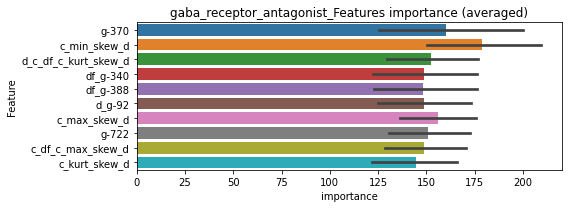

len(train_index) : 3858
len(valid_index) : 1286
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0259429	valid_1's binary_logloss: 0.0363857
[2000]	training's binary_logloss: 0.0134129	valid_1's binary_logloss: 0.0260052
[3000]	training's binary_logloss: 0.00892273	valid_1's binary_logloss: 0.0224097
[4000]	training's binary_logloss: 0.00665241	valid_1's binary_logloss: 0.0205816
Early stopping, best iteration is:
[4811]	training's binary_logloss: 0.00553177	valid_1's binary_logloss: 0.0197373


len(train_index) : 3858
len(valid_index) : 1286
================================= fold 2/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0247334	valid_1's binary_logloss: 0.0438062
[2000]	training's binary_logloss: 0.0127272	valid_1's binary_logloss: 0.0342157
[3000]	training's binary_logloss: 0.00844224	valid_1's binary_logloss: 0.0309791
Early stopping, best iteration is:
[3694]	training's binary_logloss: 0.00683607	valid_1's binary_logloss: 0.0298698


len(train_index) : 3858
len(valid_index) : 1286
================================= fold 3/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264371	valid_1's binary_logloss: 0.0384563
[2000]	training's binary_logloss: 0.0136587	valid_1's binary_logloss: 0.028108
[3000]	training's binary_logloss: 0.00905676	valid_1's binary_logloss: 0.0244722
[4000]	training's binary_logloss: 0.00676754	valid_1's binary_logloss: 0.0229097
[5000]	training's binary_logloss: 0.00540722	valid_1's binary_logloss: 0.0220147
Early stopping, best iteration is:
[4997]	training's binary_logloss: 0.00540983	valid_1's binary_logloss: 0.0220129


len(train_index) : 3858
len(valid_index) : 1286
================================= fold 4/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0250261	valid_1's binary_logloss: 0.0440828
[2000]	training's binary_logloss: 0.012995	valid_1's binary_logloss: 0.033549
[3000]	training's binary_logloss: 0.00862524	valid_1's binary_logloss: 0.0299883
[4000]	training's binary_logloss: 0.00644665	valid_1's binary_logloss: 0.0283097
Early stopping, best iteration is:
[4270]	training's binary_logloss: 0.00603551	valid_1's binary_logloss: 0.0279927


gaba_receptor_antagonist logloss: 0.024903160211343447
gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00061414	valid_1's binary_logloss: 0.028672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00059292	valid_1's binary_logloss: 0.0138343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00053579	valid_1's binary_logloss: 0.00532702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000562109	valid_1's binary_logloss: 0.020655


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040846, Threshold: 0.0148952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0148952, conf_0:0.01043, conf_1:0.01936
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0448952
threshold: 0.0448952, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000515198	valid_1's binary_logloss: 0.0268571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000513255	valid_1's binary_logloss: 0.0104279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000534547	valid_1's binary_logloss: 0.0056577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000658203	valid_1's binary_logloss: 0.0193247


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234573, Threshold: 0.0448952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00235
Num_p_label: 28.0, Expected: 9.4, Threshold: 0.0448952, conf_0:0.03592, conf_1:0.05387
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_1: 0.0748952
threshold: 0.0748952, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000513834	valid_1's binary_logloss: 0.0151799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000529141	valid_1's binary_logloss: 0.00726634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000537653	valid_1's binary_logloss: 0.00794365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000624862	valid_1's binary_logloss: 0.0228448


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177893, Threshold: 0.0748952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0042692 Vs.target_rate: 0.00235
Num_p_label: 17.0, Expected: 9.4, Threshold: 0.0748952, conf_0:0.06741, conf_1:0.08238
threshold: 0.0748952, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


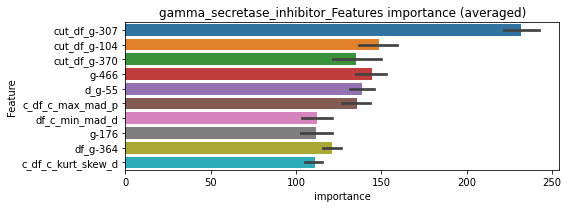

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00054733	valid_1's binary_logloss: 0.0184323


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000517823	valid_1's binary_logloss: 0.0159327


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000519814	valid_1's binary_logloss: 0.00958038


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000769155	valid_1's binary_logloss: 0.0146237


gamma_secretase_inhibitor logloss: 0.014643601578602835


mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0442361	valid_1's binary_logloss: 0.128141
Early stopping, best iteration is:
[1107]	training's binary_logloss: 0.0399102	valid_1's binary_logloss: 0.127056
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0443928	valid_1's binary_logloss: 0.124593
Early stopping, best iteration is:
[1540]	training's binary_logloss: 0.0284055	valid_1's binary_logloss: 0.121062
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0456168	valid_1's binary_logloss: 0.118197
Early stopping, best iteration is:
[1499]	training's binary_logloss: 0.0299812	valid_1's binary_logloss: 0.11334
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0453937	valid_1's binary_logloss: 0.11811
Early stopping, best iteration is:
[1201]	training's binary_logloss: 0.0375937	valid_1's binary_logl

1 / 3, AUC score:0.967, PR-AUC:0.941
y_Threshold: 0.0575160, Threshold: 0.0896086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 552 → Positive_corect_labels: 1301/8049
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.0896086, conf_0:0.06273, conf_1:0.11649
threshold: 0.0896086, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1301.0/8049, y_label_rate: 0.1616350
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028135	valid_1's binary_logloss: 0.0728289
Early stopping, best iteration is:
[1841]	training's binary_logloss: 0.0149233	valid_1's binary_logloss: 0.0663972
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0286331	valid_1's binary_logloss: 0.0713582
Early stopping, best iteration is:
[1763]	training's binary_logloss: 0.0158156	valid_1's binary_logloss: 0.0652163
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281911	valid_1's binary_logloss: 0.0717916
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0144462	valid_1's binary_logloss: 0.0652817
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0287214	valid_1's binary_logloss: 0.0625756
[2000]	training's binary_logloss: 0.0139773	valid_1's binary_logloss: 0.0551752
Early stoppi

2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0509123, Threshold: 0.0896086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 108 → Positive_corect_labels: 1247.0/7941
p_label_rate: 0.0027624 Vs.target_rate: 0.01117
Num_p_label: 11.0, Expected: 44.5, Threshold: 0.0896086, conf_0:0.07169, conf_1:0.10753
threshold: 0.0896086, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 1247.0/7941, y_label_rate: 0.1570331
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0227679	valid_1's binary_logloss: 0.0439992
[2000]	training's binary_logloss: 0.0111581	valid_1's binary_logloss: 0.036948
Early stopping, best iteration is:
[2553]	training's binary_logloss: 0.00863115	valid_1's binary_logloss: 0.0352837
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0226223	valid_1's binary_logloss: 0.044826
[2000]	training's binary_logloss: 0.0110014	valid_1's binary_logloss: 0.0372107
[3000]	training's binary_logloss: 0.00716371	valid_1's binary_logloss: 0.0347261
Early stopping, best iteration is:
[3354]	training's binary_logloss: 0.00636699	valid_1's binary_logloss: 0.034283
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0209107	valid_1's binary_logloss: 0.0612191
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0134305	valid_1's binary_logloss: 0.

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0364096, Threshold: 0.0896086, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1222.0/7891
p_label_rate: 0.0005023 Vs.target_rate: 0.01117
Num_p_label: 2.0, Expected: 44.5, Threshold: 0.0896086, conf_0:0.08065, conf_1:0.09857
threshold: 0.0896086, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 1222.0/7891, y_label_rate: 0.1548600


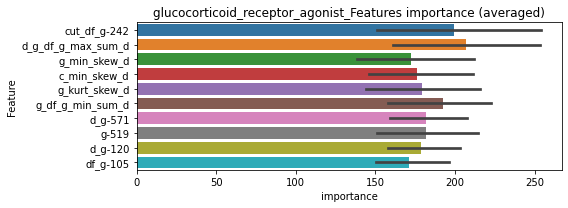

len(train_index) : 5918
len(valid_index) : 1973
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0268629	valid_1's binary_logloss: 0.0436761
[2000]	training's binary_logloss: 0.01392	valid_1's binary_logloss: 0.0344922
[3000]	training's binary_logloss: 0.00920813	valid_1's binary_logloss: 0.0314523
[4000]	training's binary_logloss: 0.00683397	valid_1's binary_logloss: 0.030036
Early stopping, best iteration is:
[4285]	training's binary_logloss: 0.00635767	valid_1's binary_logloss: 0.0297273


len(train_index) : 5918
len(valid_index) : 1973
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262601	valid_1's binary_logloss: 0.0490158
[2000]	training's binary_logloss: 0.0136429	valid_1's binary_logloss: 0.0399248
[3000]	training's binary_logloss: 0.00905782	valid_1's binary_logloss: 0.0369717
Early stopping, best iteration is:
[3138]	training's binary_logloss: 0.00865009	valid_1's binary_logloss: 0.0367288


len(train_index) : 5918
len(valid_index) : 1973
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0265812	valid_1's binary_logloss: 0.0472317
[2000]	training's binary_logloss: 0.0137313	valid_1's binary_logloss: 0.0392532
Early stopping, best iteration is:
[2435]	training's binary_logloss: 0.0112583	valid_1's binary_logloss: 0.0378032


len(train_index) : 5919
len(valid_index) : 1972
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279769	valid_1's binary_logloss: 0.0391755
[2000]	training's binary_logloss: 0.0144118	valid_1's binary_logloss: 0.0290733
[3000]	training's binary_logloss: 0.00950085	valid_1's binary_logloss: 0.0255189
[4000]	training's binary_logloss: 0.00703132	valid_1's binary_logloss: 0.0237268
Early stopping, best iteration is:
[4834]	training's binary_logloss: 0.00577462	valid_1's binary_logloss: 0.0227896


glucocorticoid_receptor_agonist logloss: 0.03176335547999367
glucocorticoid_receptor_agonist is unpredictable(><)!
glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000248389	valid_1's binary_logloss: 0.00142496
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000249975	valid_1's binary_logloss: 0.000680271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000248947	valid_1's binary_logloss: 0.000434563
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010229, Threshold: 0.0030542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0030542, conf_0:0.00214, conf_1:0.00397
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0330542


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000250396	valid_1's binary_logloss: 0.000817639


threshold: 0.0330542, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0330542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00055
Num_p_label: 8.0, Expected: 2.2, Threshold: 0.0330542, conf_0:0.02644, conf_1:0.03967
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0630542


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0630542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0630542, conf_0:0.05675, conf_1:0.06936


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


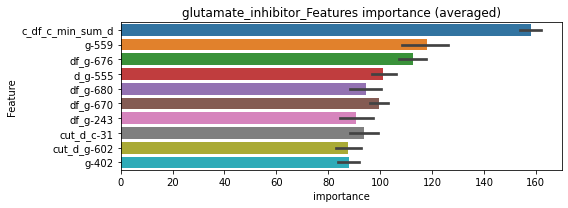

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000247728	valid_1's binary_logloss: 0.000806273
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000246516	valid_1's binary_logloss: 0.000622541
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000250912	valid_1's binary_logloss: 0.000328572
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.000582065615965791


Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000246872	valid_1's binary_logloss: 0.000570575


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000748119	valid_1's binary_logloss: 0.0308259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000784267	valid_1's binary_logloss: 0.0249379
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000879338	valid_1's binary_logloss: 0.0263313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000675097	valid_1's binary_logloss: 0.0228912


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0072194, Threshold: 0.1998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.1998152, conf_0:0.13987, conf_1:0.25976
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_1: 0.2298152
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_2: 0.2598152
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.2898152
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_4: 0.3198152
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_5: 0.3498152
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_6: 0.3798152
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.4098152
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_8: 0.4398152
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_9: 0.4698152
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_10: 0.4998152
threshold: 0.4998152, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000967325	valid_1's binary_logloss: 0.0388603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000626981	valid_1's binary_logloss: 0.0227668
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000682134	valid_1's binary_logloss: 0.0279981
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.0005884	valid_1's binary_logloss: 0.0128419


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0410252, Threshold: 0.4998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0145655 Vs.target_rate: 0.00311
Num_p_label: 58.0, Expected: 12.4, Threshold: 0.4998152, conf_0:0.39985, conf_1:0.59978
Num_p_label: 57.0, Expected: 12.4, Adj_threshold_1: 0.5298152
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_2: 0.5598152
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_3: 0.5898152
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_4: 0.6198152
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_5: 0.6498152
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_6: 0.6798152
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_7: 0.7098152
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_8: 0.7398152
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_9: 0.7698152
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_10: 0.7998152
threshold: 0.7998152, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000707584	valid_1's binary_logloss: 0.0140026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00115994	valid_1's binary_logloss: 0.0333995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000572377	valid_1's binary_logloss: 0.0170369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00100948	valid_1's binary_logloss: 0.0327813


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0474202, Threshold: 0.7998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0050226 Vs.target_rate: 0.00311
Num_p_label: 20.0, Expected: 12.4, Threshold: 0.7998152, conf_0:0.71983, conf_1:0.87980
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_1: 0.8298152
threshold: 0.8298152, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3772, y_label_rate: 0.1702015


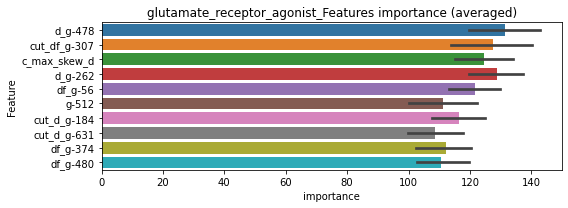

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000815522	valid_1's binary_logloss: 0.0351299


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000620752	valid_1's binary_logloss: 0.019779


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00057946	valid_1's binary_logloss: 0.00834104
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000570961	valid_1's binary_logloss: 0.00830582


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000872767	valid_1's binary_logloss: 0.0289462


glutamate_receptor_agonist logloss: 0.02304097477068153


mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0262141	valid_1's binary_logloss: 0.146324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.0420672	valid_1's binary_logloss: 0.164336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0366326	valid_1's binary_logloss: 0.165344
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.941, PR-AUC:0.901
y_Threshold: 0.0529652, Threshold: 0.0724597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 703 → Positive_corect_labels: 1235/7951
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.05072, conf_1:0.09420


Early stopping, best iteration is:
[278]	training's binary_logloss: 0.0341608	valid_1's binary_logloss: 0.158695


threshold: 0.0724597, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1235.0/7951, y_label_rate: 0.1553264
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0150592	valid_1's binary_logloss: 0.0895653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00568907	valid_1's binary_logloss: 0.0675858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00555164	valid_1's binary_logloss: 0.066304
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.0101177	valid_1's binary_logloss: 0.0807115


2 / 3, AUC score:0.992, PR-AUC:0.978
y_Threshold: 0.0378085, Threshold: 0.0724597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 1156.0/7793
p_label_rate: 0.0040181 Vs.target_rate: 0.01541
Num_p_label: 16.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.05797, conf_1:0.08695
threshold: 0.0724597, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1156.0/7793, y_label_rate: 0.1483383
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00192937	valid_1's binary_logloss: 0.0318108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00380652	valid_1's binary_logloss: 0.0520352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00162784	valid_1's binary_logloss: 0.0241647
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0235025, Threshold: 0.0724597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1119.0/7719


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00446201	valid_1's binary_logloss: 0.0527093


p_label_rate: 0.0030136 Vs.target_rate: 0.01541
Num_p_label: 12.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.06521, conf_1:0.07971
threshold: 0.0724597, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 1119.0/7719, y_label_rate: 0.1449670


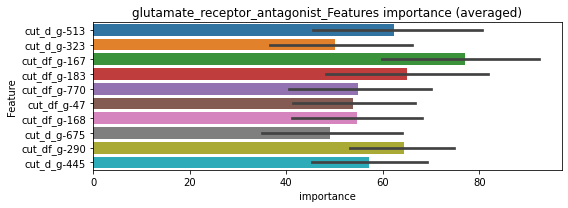

len(train_index) : 5789
len(valid_index) : 1930
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5789
len(valid_index) : 1930
================================= fold 2/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[249]	training's binary_logloss: 0.0014549	valid_1's binary_logloss: 0.0219099
Training until validation scores don't improve for 30 rounds


len(train_index) : 5789
len(valid_index) : 1930
================================= fold 3/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[167]	training's binary_logloss: 0.00287074	valid_1's binary_logloss: 0.0281664
Training until validation scores don't improve for 30 rounds


len(train_index) : 5790
len(valid_index) : 1929
================================= fold 4/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00106654	valid_1's binary_logloss: 0.0168191
Training until validation scores don't improve for 30 rounds


glutamate_receptor_antagonist logloss: 0.022964018986127308


Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00178585	valid_1's binary_logloss: 0.0249617


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000327946	valid_1's binary_logloss: 0.00417093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000333201	valid_1's binary_logloss: 0.0022164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000327027	valid_1's binary_logloss: 0.00150829
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016159, Threshold: 0.0067539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0067539, conf_0:0.00473, conf_1:0.00878
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0367539


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000327101	valid_1's binary_logloss: 0.00230603


threshold: 0.0367539, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.0367539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076
Num_p_label: 25.0, Expected: 3.0, Threshold: 0.0367539, conf_0:0.02940, conf_1:0.04410
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0667539
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0967539
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1267539


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.1267539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1267539, conf_0:0.11408, conf_1:0.13943


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


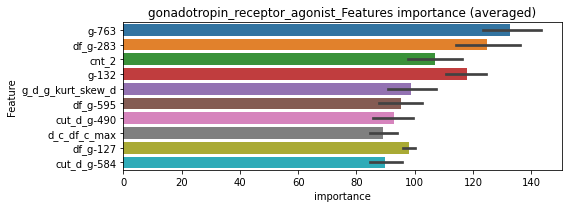

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000337365	valid_1's binary_logloss: 0.00298288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000332218	valid_1's binary_logloss: 0.00212317


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000322995	valid_1's binary_logloss: 0.00076979


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000313382	valid_1's binary_logloss: 0.00182863


gonadotropin_receptor_agonist logloss: 0.0019261565525640566
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000555089	valid_1's binary_logloss: 0.0219872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000539349	valid_1's binary_logloss: 0.011397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000571239	valid_1's binary_logloss: 0.0040697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000571971	valid_1's binary_logloss: 0.0123742


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063958, Threshold: 0.0278116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0278116, conf_0:0.01947, conf_1:0.03616
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0578116
threshold: 0.0578116, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000561291	valid_1's binary_logloss: 0.0227617
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000541903	valid_1's binary_logloss: 0.0118092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000538336	valid_1's binary_logloss: 0.00257977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000518816	valid_1's binary_logloss: 0.0107191


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0455323, Threshold: 0.0578116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00252
Num_p_label: 47.0, Expected: 10.0, Threshold: 0.0578116, conf_0:0.04625, conf_1:0.06937
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_1: 0.0878116
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1178116
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_3: 0.1478116
threshold: 0.1478116, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000570492	valid_1's binary_logloss: 0.0204135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000544746	valid_1's binary_logloss: 0.0138702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0011227	valid_1's binary_logloss: 0.0295565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000535343	valid_1's binary_logloss: 0.00896161


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0313879, Threshold: 0.1478116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1478116, conf_0:0.13303, conf_1:0.16259
threshold: 0.1478116, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


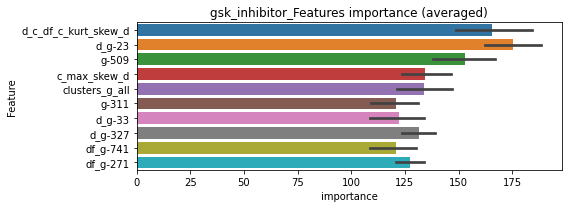

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000614298	valid_1's binary_logloss: 0.0122118


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000659535	valid_1's binary_logloss: 0.0153046


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000565856	valid_1's binary_logloss: 0.0057899


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000641893	valid_1's binary_logloss: 0.0124911


gsk_inhibitor logloss: 0.011449356799714268
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000957246	valid_1's binary_logloss: 0.0315015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000622498	valid_1's binary_logloss: 0.0206211
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000693036	valid_1's binary_logloss: 0.0157464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000726623	valid_1's binary_logloss: 0.0230161


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063234, Threshold: 0.0158004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0158004, conf_0:0.01106, conf_1:0.02054
Num_p_label: 7.0, Expected: 12.0, Adj_threshold_1: 0.0458004
threshold: 0.0458004, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000794629	valid_1's binary_logloss: 0.0257084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000589509	valid_1's binary_logloss: 0.0168623
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000590846	valid_1's binary_logloss: 0.0172516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000658313	valid_1's binary_logloss: 0.0248616


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0310752, Threshold: 0.0458004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0077850 Vs.target_rate: 0.00302
Num_p_label: 31.0, Expected: 12.0, Threshold: 0.0458004, conf_0:0.03664, conf_1:0.05496
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_1: 0.0758004
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_2: 0.1058004
threshold: 0.1058004, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3796, y_label_rate: 0.1712329
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000595674	valid_1's binary_logloss: 0.0205123
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000698693	valid_1's binary_logloss: 0.0223995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000872754	valid_1's binary_logloss: 0.0280997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000591137	valid_1's binary_logloss: 0.0110312


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0406768, Threshold: 0.1058004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0037670 Vs.target_rate: 0.00302
Num_p_label: 15.0, Expected: 12.0, Threshold: 0.1058004, conf_0:0.09522, conf_1:0.11638
threshold: 0.1058004, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


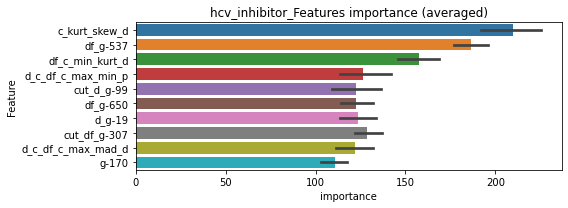

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000703628	valid_1's binary_logloss: 0.0181727


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000875023	valid_1's binary_logloss: 0.0271851


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000580035	valid_1's binary_logloss: 0.0158106
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000575031	valid_1's binary_logloss: 0.015762


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000955058	valid_1's binary_logloss: 0.0392192


hcv_inhibitor logloss: 0.025086261869179696
hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.051406	valid_1's binary_logloss: 0.122433
[2000]	training's binary_logloss: 0.0256513	valid_1's binary_logloss: 0.0962752
[3000]	training's binary_logloss: 0.0168963	valid_1's binary_logloss: 0.086857
[4000]	training's binary_logloss: 0.0125448	valid_1's binary_logloss: 0.0817713
Early stopping, best iteration is:
[4275]	training's binary_logloss: 0.0117208	valid_1's binary_logloss: 0.0807527
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0520491	valid_1's binary_logloss: 0.11396
[2000]	training's binary_logloss: 0.025967	valid_1's binary_logloss: 0.0887588
[3000]	training's binary_logloss: 0.0171232	valid_1's binary_logloss: 0.0796181
Early stopping, best iteration is:
[3619]	training's binary_logloss: 0.0140839	valid_1's binary_logloss: 0.076446
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 

1 / 3, AUC score:0.994, PR-AUC:0.988
y_Threshold: 0.0470312, Threshold: 0.1481035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 640/3768
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.1481035, conf_0:0.10367, conf_1:0.19253
Num_p_label: 24.0, Expected: 17.7, Adj_threshold_1: 0.1781035
threshold: 0.1781035, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 640.0/3768, y_label_rate: 0.1698514
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0469737	valid_1's binary_logloss: 0.101364
[2000]	training's binary_logloss: 0.0232302	valid_1's binary_logloss: 0.078619
[3000]	training's binary_logloss: 0.0153027	valid_1's binary_logloss: 0.0699231
Early stopping, best iteration is:
[3451]	training's binary_logloss: 0.0132341	valid_1's binary_logloss: 0.0677357
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0475145	valid_1's binary_logloss: 0.0944811
[2000]	training's binary_logloss: 0.0234603	valid_1's binary_logloss: 0.0685305
[3000]	training's binary_logloss: 0.0154863	valid_1's binary_logloss: 0.0587211
[4000]	training's binary_logloss: 0.0115252	valid_1's binary_logloss: 0.0537951
[5000]	training's binary_logloss: 0.00921144	valid_1's binary_logloss: 0.0507017
[6000]	training's binary_logloss: 0.00768204	valid_1's binary_logloss: 0.0485219
Early stopping, best iteration is:
[6350]	t

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0822346, Threshold: 0.1781035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 628.0/3744
p_label_rate: 0.0153189 Vs.target_rate: 0.00445
Num_p_label: 61.0, Expected: 17.7, Threshold: 0.1781035, conf_0:0.14248, conf_1:0.21372
Num_p_label: 49.0, Expected: 17.7, Adj_threshold_1: 0.2081035
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_2: 0.2381035
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_3: 0.2681035
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_4: 0.2981035
threshold: 0.2981035, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 628.0/3744, y_label_rate: 0.1677350
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0452549	valid_1's binary_logloss: 0.102709
[2000]	training's binary_logloss: 0.0222653	valid_1's binary_logloss: 0.0777088
[3000]	training's binary_logloss: 0.0146584	valid_1's binary_logloss: 0.0688466
[4000]	training's binary_logloss: 0.0109502	valid_1's binary_logloss: 0.0644646
Early stopping, best iteration is:
[4085]	training's binary_logloss: 0.0107171	valid_1's binary_logloss: 0.0641659
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461231	valid_1's binary_logloss: 0.0881851
[2000]	training's binary_logloss: 0.022842	valid_1's binary_logloss: 0.0620505
[3000]	training's binary_logloss: 0.0150381	valid_1's binary_logloss: 0.0524948
Early stopping, best iteration is:
[3969]	training's binary_logloss: 0.0112842	valid_1's binary_logloss: 0.0473386
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logl

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0890404, Threshold: 0.2981035, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 620.0/3728
p_label_rate: 0.0060271 Vs.target_rate: 0.00445
Num_p_label: 24.0, Expected: 17.7, Threshold: 0.2981035, conf_0:0.26829, conf_1:0.32791
threshold: 0.2981035, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 620.0/3728, y_label_rate: 0.1663090


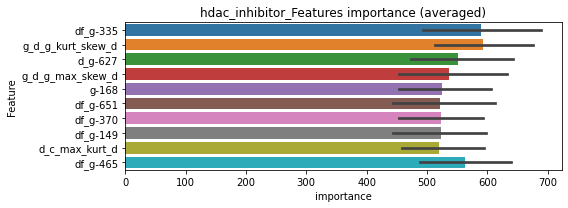

len(train_index) : 2796
len(valid_index) : 932
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0626408	valid_1's binary_logloss: 0.105941
[2000]	training's binary_logloss: 0.0320758	valid_1's binary_logloss: 0.0736363
[3000]	training's binary_logloss: 0.0213869	valid_1's binary_logloss: 0.0613055
[4000]	training's binary_logloss: 0.0159571	valid_1's binary_logloss: 0.0543009
[5000]	training's binary_logloss: 0.0127612	valid_1's binary_logloss: 0.0499733
[6000]	training's binary_logloss: 0.0106233	valid_1's binary_logloss: 0.0468662
Early stopping, best iteration is:
[6364]	training's binary_logloss: 0.0100083	valid_1's binary_logloss: 0.0459075


len(train_index) : 2796
len(valid_index) : 932
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.062798	valid_1's binary_logloss: 0.107528
[2000]	training's binary_logloss: 0.032134	valid_1's binary_logloss: 0.0755872
[3000]	training's binary_logloss: 0.0214115	valid_1's binary_logloss: 0.0637549
[4000]	training's binary_logloss: 0.0159843	valid_1's binary_logloss: 0.0573944
[5000]	training's binary_logloss: 0.012773	valid_1's binary_logloss: 0.0535938
[6000]	training's binary_logloss: 0.0106348	valid_1's binary_logloss: 0.0507183
[7000]	training's binary_logloss: 0.00913029	valid_1's binary_logloss: 0.048818
[8000]	training's binary_logloss: 0.00801045	valid_1's binary_logloss: 0.0472387
Early stopping, best iteration is:
[8206]	training's binary_logloss: 0.00780902	valid_1's binary_logloss: 0.0468984


len(train_index) : 2796
len(valid_index) : 932
================================= fold 3/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0638639	valid_1's binary_logloss: 0.108391
[2000]	training's binary_logloss: 0.0324585	valid_1's binary_logloss: 0.0753413
[3000]	training's binary_logloss: 0.0215534	valid_1's binary_logloss: 0.063195
[4000]	training's binary_logloss: 0.0160561	valid_1's binary_logloss: 0.056462
[5000]	training's binary_logloss: 0.0128268	valid_1's binary_logloss: 0.05218
[6000]	training's binary_logloss: 0.010668	valid_1's binary_logloss: 0.0494132
[7000]	training's binary_logloss: 0.00914383	valid_1's binary_logloss: 0.0472979
Early stopping, best iteration is:
[7227]	training's binary_logloss: 0.00885804	valid_1's binary_logloss: 0.0468991


len(train_index) : 2796
len(valid_index) : 932
================================= fold 4/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0624885	valid_1's binary_logloss: 0.110925
[2000]	training's binary_logloss: 0.0321747	valid_1's binary_logloss: 0.0779825
[3000]	training's binary_logloss: 0.021369	valid_1's binary_logloss: 0.0645255
[4000]	training's binary_logloss: 0.015927	valid_1's binary_logloss: 0.0573518
[5000]	training's binary_logloss: 0.0127197	valid_1's binary_logloss: 0.0528733
[6000]	training's binary_logloss: 0.0105809	valid_1's binary_logloss: 0.0495573
[7000]	training's binary_logloss: 0.00910202	valid_1's binary_logloss: 0.0473577
Early stopping, best iteration is:
[7967]	training's binary_logloss: 0.0080058	valid_1's binary_logloss: 0.0455197


hdac_inhibitor logloss: 0.04630615680532786
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000604738	valid_1's binary_logloss: 0.0308654
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000633297	valid_1's binary_logloss: 0.0264239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000599084	valid_1's binary_logloss: 0.00835136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000619545	valid_1's binary_logloss: 0.0160083


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044916, Threshold: 0.0113097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0113097, conf_0:0.00792, conf_1:0.01470
Num_p_label: 6.0, Expected: 9.9, Adj_threshold_1: 0.0413097
threshold: 0.0413097, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000532573	valid_1's binary_logloss: 0.0282637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000671245	valid_1's binary_logloss: 0.0281672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000706465	valid_1's binary_logloss: 0.00830879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000772995	valid_1's binary_logloss: 0.0177459


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297420, Threshold: 0.0413097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0037670 Vs.target_rate: 0.00248
Num_p_label: 15.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03305, conf_1:0.04957
threshold: 0.0413097, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000648265	valid_1's binary_logloss: 0.021099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000596982	valid_1's binary_logloss: 0.0143308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000771285	valid_1's binary_logloss: 0.0199072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000571399	valid_1's binary_logloss: 0.0243474


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0282593, Threshold: 0.0413097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00248
Num_p_label: 13.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03718, conf_1:0.04544
threshold: 0.0413097, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


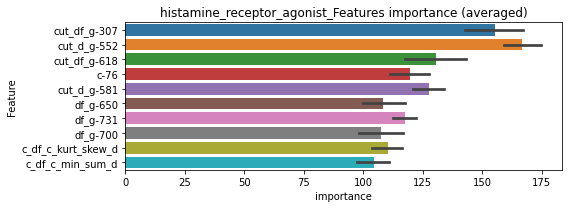

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000604003	valid_1's binary_logloss: 0.0181342


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000756127	valid_1's binary_logloss: 0.0189122


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000709301	valid_1's binary_logloss: 0.015535


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00062248	valid_1's binary_logloss: 0.0121307


histamine_receptor_agonist logloss: 0.016178026919016063


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6554
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0437216	valid_1's binary_logloss: 0.122071
Early stopping, best iteration is:
[1201]	training's binary_logloss: 0.0363258	valid_1's binary_logloss: 0.119803
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432082	valid_1's binary_logloss: 0.12715
Early stopping, best iteration is:
[1293]	training's binary_logloss: 0.0331218	valid_1's binary_logloss: 0.125595
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.045362	valid_1's binary_logloss: 0.110682
Early stopping, best iteration is:
[1360]	training's binary_logloss: 0.0330245	valid_1's binary_logloss: 0.107231
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042793	valid_1's binary_logloss: 0.131833
Early stopping, best iteration is:
[1115]	training's binary_logloss: 0.0383882	valid_1's binary_loglo

1 / 3, AUC score:0.964, PR-AUC:0.934
y_Threshold: 0.0544791, Threshold: 0.0768870, pos_neg_ratio: 0.8000000
Remove_noisy_data: 541 → Positive_corect_labels: 1171/7323
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0768870, conf_0:0.05382, conf_1:0.09995
threshold: 0.0768870, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1171.0/7323, y_label_rate: 0.1599071
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261105	valid_1's binary_logloss: 0.0550906
[2000]	training's binary_logloss: 0.0127527	valid_1's binary_logloss: 0.0499172
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0120586	valid_1's binary_logloss: 0.0496334
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0254704	valid_1's binary_logloss: 0.0652688
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0163288	valid_1's binary_logloss: 0.0620597
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249508	valid_1's binary_logloss: 0.0739516
Early stopping, best iteration is:
[1377]	training's binary_logloss: 0.018027	valid_1's binary_logloss: 0.071369
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0262202	valid_1's binary_logloss: 0.0609115
Early stoppin

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0457278, Threshold: 0.0768870, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1114.0/7209
p_label_rate: 0.0032647 Vs.target_rate: 0.01012
Num_p_label: 13.0, Expected: 40.3, Threshold: 0.0768870, conf_0:0.06151, conf_1:0.09226
threshold: 0.0768870, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 1114.0/7209, y_label_rate: 0.1545291
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0172892	valid_1's binary_logloss: 0.034119
[2000]	training's binary_logloss: 0.00851138	valid_1's binary_logloss: 0.0287905
Early stopping, best iteration is:
[2635]	training's binary_logloss: 0.00636304	valid_1's binary_logloss: 0.0273784
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0170914	valid_1's binary_logloss: 0.0335285
[2000]	training's binary_logloss: 0.00847482	valid_1's binary_logloss: 0.0281985
[3000]	training's binary_logloss: 0.00555	valid_1's binary_logloss: 0.0265601
Early stopping, best iteration is:
[3054]	training's binary_logloss: 0.00545057	valid_1's binary_logloss: 0.0265321
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0172108	valid_1's binary_logloss: 0.0346324
[2000]	training's binary_logloss: 0.0085509	valid_1's binary_logloss: 0.0288768
[3000]	training's binary_l

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0335685, Threshold: 0.0768870, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 1097.0/7175
p_label_rate: 0.0020090 Vs.target_rate: 0.01012
Num_p_label: 8.0, Expected: 40.3, Threshold: 0.0768870, conf_0:0.06920, conf_1:0.08458
threshold: 0.0768870, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 1097.0/7175, y_label_rate: 0.1528920


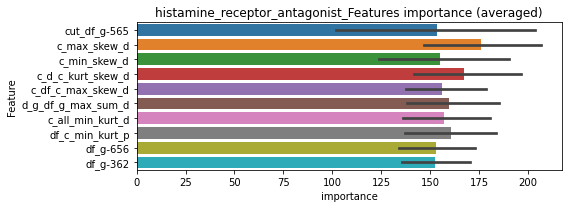

len(train_index) : 5381
len(valid_index) : 1794
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199094	valid_1's binary_logloss: 0.0340035
[2000]	training's binary_logloss: 0.0102473	valid_1's binary_logloss: 0.0268699
[3000]	training's binary_logloss: 0.00684721	valid_1's binary_logloss: 0.0246796
[4000]	training's binary_logloss: 0.00510691	valid_1's binary_logloss: 0.0236442
Early stopping, best iteration is:
[4107]	training's binary_logloss: 0.00496901	valid_1's binary_logloss: 0.0235162


len(train_index) : 5381
len(valid_index) : 1794
================================= fold 2/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0199062	valid_1's binary_logloss: 0.0326796
[2000]	training's binary_logloss: 0.010256	valid_1's binary_logloss: 0.0245773
[3000]	training's binary_logloss: 0.00685057	valid_1's binary_logloss: 0.0219627
[4000]	training's binary_logloss: 0.00511525	valid_1's binary_logloss: 0.0206856
Early stopping, best iteration is:
[4617]	training's binary_logloss: 0.00441937	valid_1's binary_logloss: 0.0201736


len(train_index) : 5381
len(valid_index) : 1794
================================= fold 3/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0205602	valid_1's binary_logloss: 0.0299011
[2000]	training's binary_logloss: 0.0106507	valid_1's binary_logloss: 0.0218571
[3000]	training's binary_logloss: 0.00709419	valid_1's binary_logloss: 0.0192285
[4000]	training's binary_logloss: 0.00531047	valid_1's binary_logloss: 0.0179906
[5000]	training's binary_logloss: 0.00424026	valid_1's binary_logloss: 0.0173421
[6000]	training's binary_logloss: 0.00353047	valid_1's binary_logloss: 0.0168625
Early stopping, best iteration is:
[6618]	training's binary_logloss: 0.0032003	valid_1's binary_logloss: 0.016678


len(train_index) : 5382
len(valid_index) : 1793
================================= fold 4/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0208382	valid_1's binary_logloss: 0.0296358
[2000]	training's binary_logloss: 0.0107538	valid_1's binary_logloss: 0.0207448
[3000]	training's binary_logloss: 0.00713679	valid_1's binary_logloss: 0.0175552
[4000]	training's binary_logloss: 0.00533919	valid_1's binary_logloss: 0.0160261
[5000]	training's binary_logloss: 0.00427014	valid_1's binary_logloss: 0.0150468
Early stopping, best iteration is:
[5764]	training's binary_logloss: 0.00369704	valid_1's binary_logloss: 0.0144813


histamine_receptor_antagonist logloss: 0.018712886770918296
histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000369455	valid_1's binary_logloss: 0.00114519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377085	valid_1's binary_logloss: 0.00292148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000375244	valid_1's binary_logloss: 0.000933239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000366755	valid_1's binary_logloss: 0.00326198


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021060, Threshold: 0.0192562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0192562, conf_0:0.01348, conf_1:0.02503
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_1: 0.0492562
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_2: 0.0792562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_3: 0.1092562
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.1392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1692562
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.1992562
threshold: 0.1992562, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.1992562, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00101
Num_p_label: 24.0, Expected: 4.0, Threshold: 0.1992562, conf_0:0.15940, conf_1:0.23911
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_1: 0.2292562
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.2592562
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.2892562
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.3192562
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_5: 0.3492562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.3792562
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_7: 0.4092562
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.4392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.4692562
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_10: 0.4992562
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.4992562, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.4992562, conf_0:0.44933, conf_1:0.54918
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


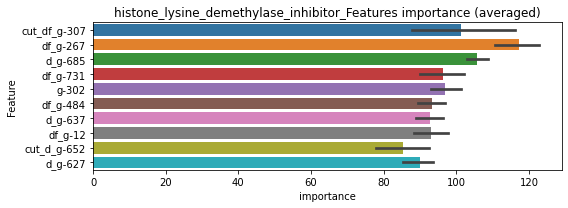

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000364737	valid_1's binary_logloss: 0.00118363


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000371686	valid_1's binary_logloss: 0.0026746


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000375721	valid_1's binary_logloss: 0.000804619


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000368782	valid_1's binary_logloss: 0.0018564


histone_lysine_demethylase_inhibitor logloss: 0.0016297543029701632
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000423709	valid_1's binary_logloss: 0.00730819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000429247	valid_1's binary_logloss: 0.00519131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000405989	valid_1's binary_logloss: 0.00108827
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000449703	valid_1's binary_logloss: 0.0151647


y_Threshold: 0.0027884, Threshold: 0.0072024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0072024, conf_0:0.00504, conf_1:0.00936
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0372024
threshold: 0.0372024, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.02976, conf_1:0.04464
threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.03348, conf_1:0.04092
threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


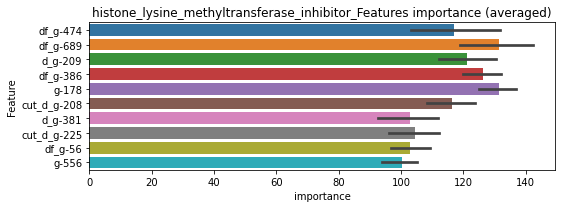

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387513	valid_1's binary_logloss: 0.00172774
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000386079	valid_1's binary_logloss: 0.00172408


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000516587	valid_1's binary_logloss: 0.00575498


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000400275	valid_1's binary_logloss: 0.00395225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000418503	valid_1's binary_logloss: 0.00983046


histone_lysine_methyltransferase_inhibitor logloss: 0.005315461979958494
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00111064	valid_1's binary_logloss: 0.0436643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000590017	valid_1's binary_logloss: 0.011604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000605004	valid_1's binary_logloss: 0.0112544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000600683	valid_1's binary_logloss: 0.0158191


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056001, Threshold: 0.0874065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0874065, conf_0:0.06118, conf_1:0.11363
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_1: 0.1174065
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_2: 0.1474065
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_3: 0.1774065
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_4: 0.2074065
threshold: 0.2074065, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00129316	valid_1's binary_logloss: 0.0353438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000577296	valid_1's binary_logloss: 0.0109891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000578167	valid_1's binary_logloss: 0.0177745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000576074	valid_1's binary_logloss: 0.020948


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0426367, Threshold: 0.2074065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0138122 Vs.target_rate: 0.00302
Num_p_label: 55.0, Expected: 12.0, Threshold: 0.2074065, conf_0:0.16593, conf_1:0.24889
Num_p_label: 49.0, Expected: 12.0, Adj_threshold_1: 0.2374065
Num_p_label: 45.0, Expected: 12.0, Adj_threshold_2: 0.2674065
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_3: 0.2974065
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_4: 0.3274065
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_5: 0.3574065
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_6: 0.3874065
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_7: 0.4174065
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_8: 0.4474065
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_9: 0.4774065
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_10: 0.5074065
threshold: 0.5074065, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000634881	valid_1's binary_logloss: 0.0127883
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000581855	valid_1's binary_logloss: 0.0249218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000587019	valid_1's binary_logloss: 0.0249648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00066412	valid_1's binary_logloss: 0.025552


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404632, Threshold: 0.5074065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0080362 Vs.target_rate: 0.00302
Num_p_label: 32.0, Expected: 12.0, Threshold: 0.5074065, conf_0:0.45667, conf_1:0.55815
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_1: 0.5374065
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_2: 0.5674065
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_3: 0.5974065
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_4: 0.6274065
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_5: 0.6574065
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_6: 0.6874065
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_7: 0.7174065
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_8: 0.7474065
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_9: 0.7774065
threshold: 0.7774065, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


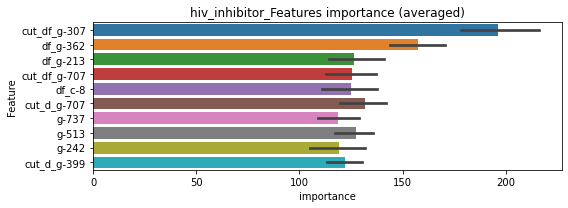

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000667354	valid_1's binary_logloss: 0.0235465


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000707189	valid_1's binary_logloss: 0.0157735


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000590124	valid_1's binary_logloss: 0.0249327


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000635948	valid_1's binary_logloss: 0.0187678


hiv_inhibitor logloss: 0.02075565034793047


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461524	valid_1's binary_logloss: 0.114847
[2000]	training's binary_logloss: 0.0220874	valid_1's binary_logloss: 0.104826
Early stopping, best iteration is:
[2184]	training's binary_logloss: 0.0200522	valid_1's binary_logloss: 0.103975
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461958	valid_1's binary_logloss: 0.112834
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.0272253	valid_1's binary_logloss: 0.106009
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0443316	valid_1's binary_logloss: 0.134152
Early stopping, best iteration is:
[1119]	training's binary_logloss: 0.0395951	valid_1's binary_logloss: 0.132937
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0459602	valid_1's binary_logloss: 0.119486
Early stopping, bes

1 / 3, AUC score:0.976, PR-AUC:0.950
y_Threshold: 0.0538128, Threshold: 0.0801911, pos_neg_ratio: 0.8000000
Remove_noisy_data: 540 → Positive_corect_labels: 1358/8340
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.0801911, conf_0:0.05613, conf_1:0.10425
threshold: 0.0801911, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1358.0/8340, y_label_rate: 0.1628297
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320192	valid_1's binary_logloss: 0.0732879
[2000]	training's binary_logloss: 0.0154787	valid_1's binary_logloss: 0.06453
Early stopping, best iteration is:
[2552]	training's binary_logloss: 0.0119286	valid_1's binary_logloss: 0.0627207
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310169	valid_1's binary_logloss: 0.0852414
Early stopping, best iteration is:
[1126]	training's binary_logloss: 0.027548	valid_1's binary_logloss: 0.0837537
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.031761	valid_1's binary_logloss: 0.0754959
[2000]	training's binary_logloss: 0.015393	valid_1's binary_logloss: 0.0667012
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0149806	valid_1's binary_logloss: 0.0664397
Training until validation scores don't improve for 30 rounds
[1000]	training'

2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0637515, Threshold: 0.0801911, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 1290.0/8204
p_label_rate: 0.0097941 Vs.target_rate: 0.01188
Num_p_label: 39.0, Expected: 47.3, Threshold: 0.0801911, conf_0:0.06415, conf_1:0.09623
threshold: 0.0801911, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1290.0/8204, y_label_rate: 0.1572404
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233565	valid_1's binary_logloss: 0.0547668
[2000]	training's binary_logloss: 0.011405	valid_1's binary_logloss: 0.047415
Early stopping, best iteration is:
[2094]	training's binary_logloss: 0.0108683	valid_1's binary_logloss: 0.047044
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230785	valid_1's binary_logloss: 0.0602964
Early stopping, best iteration is:
[1924]	training's binary_logloss: 0.0116747	valid_1's binary_logloss: 0.0543064
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0241469	valid_1's binary_logloss: 0.045806
[2000]	training's binary_logloss: 0.0118368	valid_1's binary_logloss: 0.0375932
Early stopping, best iteration is:
[2834]	training's binary_logloss: 0.00818641	valid_1's binary_logloss: 0.0350099
Training until validation scores don't improve for 30 rounds
[1000]	trainin

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0454522, Threshold: 0.0801911, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1255.0/8134
p_label_rate: 0.0050226 Vs.target_rate: 0.01188
Num_p_label: 20.0, Expected: 47.3, Threshold: 0.0801911, conf_0:0.07217, conf_1:0.08821
threshold: 0.0801911, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 1255.0/8134, y_label_rate: 0.1542906


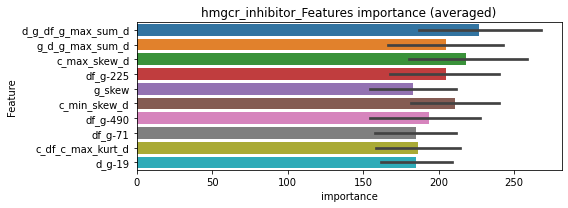

len(train_index) : 6100
len(valid_index) : 2034
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270475	valid_1's binary_logloss: 0.0452092
[2000]	training's binary_logloss: 0.0139906	valid_1's binary_logloss: 0.0343807
[3000]	training's binary_logloss: 0.00928989	valid_1's binary_logloss: 0.0305002
[4000]	training's binary_logloss: 0.00691026	valid_1's binary_logloss: 0.0284665
Early stopping, best iteration is:
[4547]	training's binary_logloss: 0.00606671	valid_1's binary_logloss: 0.0277544


len(train_index) : 6100
len(valid_index) : 2034
================================= fold 2/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0268063	valid_1's binary_logloss: 0.0467302
[2000]	training's binary_logloss: 0.0139089	valid_1's binary_logloss: 0.0368139
[3000]	training's binary_logloss: 0.00928097	valid_1's binary_logloss: 0.0336251
[4000]	training's binary_logloss: 0.00690843	valid_1's binary_logloss: 0.0319817
Early stopping, best iteration is:
[4392]	training's binary_logloss: 0.00628755	valid_1's binary_logloss: 0.0314965


len(train_index) : 6101
len(valid_index) : 2033
================================= fold 3/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269788	valid_1's binary_logloss: 0.0434811
[2000]	training's binary_logloss: 0.0139855	valid_1's binary_logloss: 0.0336171
[3000]	training's binary_logloss: 0.00930824	valid_1's binary_logloss: 0.0302765
[4000]	training's binary_logloss: 0.00693987	valid_1's binary_logloss: 0.0286656
Early stopping, best iteration is:
[4033]	training's binary_logloss: 0.00688311	valid_1's binary_logloss: 0.0286467


len(train_index) : 6101
len(valid_index) : 2033
================================= fold 4/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0272441	valid_1's binary_logloss: 0.0424136
[2000]	training's binary_logloss: 0.0141154	valid_1's binary_logloss: 0.0321896
[3000]	training's binary_logloss: 0.00937738	valid_1's binary_logloss: 0.028667
[4000]	training's binary_logloss: 0.0069925	valid_1's binary_logloss: 0.0268442
[5000]	training's binary_logloss: 0.0055615	valid_1's binary_logloss: 0.0258532
Early stopping, best iteration is:
[5360]	training's binary_logloss: 0.00517847	valid_1's binary_logloss: 0.0255384


hmgcr_inhibitor logloss: 0.028359338635912543
hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00157964	valid_1's binary_logloss: 0.0575937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000961511	valid_1's binary_logloss: 0.0308107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00101608	valid_1's binary_logloss: 0.0249343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000970224	valid_1's binary_logloss: 0.0403911


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0139076, Threshold: 0.1723806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1723806, conf_0:0.12067, conf_1:0.22409
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_1: 0.2023806
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_2: 0.2323806
Num_p_label: 25.0, Expected: 15.6, Adj_threshold_3: 0.2623806
Num_p_label: 18.0, Expected: 15.6, Adj_threshold_4: 0.2923806
threshold: 0.2923806, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3779, y_label_rate: 0.1709447
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000939574	valid_1's binary_logloss: 0.0421514
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00108037	valid_1's binary_logloss: 0.0402544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000668317	valid_1's binary_logloss: 0.0119919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00104942	valid_1's binary_logloss: 0.0425674


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0684816, Threshold: 0.2923806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 633.0/3753
p_label_rate: 0.0193370 Vs.target_rate: 0.00391
Num_p_label: 77.0, Expected: 15.6, Threshold: 0.2923806, conf_0:0.23390, conf_1:0.35086
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_1: 0.3223806
Num_p_label: 65.0, Expected: 15.6, Adj_threshold_2: 0.3523806
Num_p_label: 59.0, Expected: 15.6, Adj_threshold_3: 0.3823806
Num_p_label: 53.0, Expected: 15.6, Adj_threshold_4: 0.4123806
Num_p_label: 45.0, Expected: 15.6, Adj_threshold_5: 0.4423806
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_6: 0.4723806
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_7: 0.5023806
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_8: 0.5323806
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_9: 0.5623806
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_10: 0.5923806
threshold: 0.5923806, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000924441	valid_1's binary_logloss: 0.039587
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000649254	valid_1's binary_logloss: 0.0131381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000749959	valid_1's binary_logloss: 0.0194639
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000660678	valid_1's binary_logloss: 0.0191177


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1216655, Threshold: 0.5923806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 626.0/3739
p_label_rate: 0.0110497 Vs.target_rate: 0.00391
Num_p_label: 44.0, Expected: 15.6, Threshold: 0.5923806, conf_0:0.53314, conf_1:0.65162
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_1: 0.6223806
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_2: 0.6523806
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_3: 0.6823806
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_4: 0.7123806
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_5: 0.7423806
threshold: 0.7423806, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 626.0/3739, y_label_rate: 0.1674244


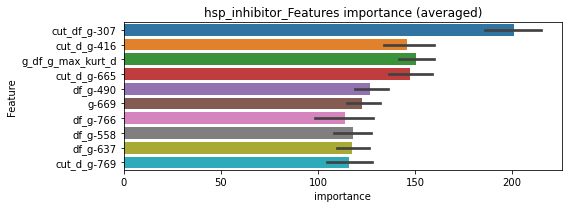

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00106763	valid_1's binary_logloss: 0.0220856


len(train_index) : 2804
len(valid_index) : 935
================================= fold 2/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000682735	valid_1's binary_logloss: 0.0276854


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000763666	valid_1's binary_logloss: 0.0175577


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00090336	valid_1's binary_logloss: 0.0234489


hsp_inhibitor logloss: 0.022694199768777172
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000461464	valid_1's binary_logloss: 0.022259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000443908	valid_1's binary_logloss: 0.00797923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000462339	valid_1's binary_logloss: 0.00192685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0131745


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030040, Threshold: 0.0204141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0204141, conf_0:0.01429, conf_1:0.02654
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0504141
threshold: 0.0504141, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000454279	valid_1's binary_logloss: 0.0200194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000460455	valid_1's binary_logloss: 0.00723977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000444238	valid_1's binary_logloss: 0.00171765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000458993	valid_1's binary_logloss: 0.0122354


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0291609, Threshold: 0.0504141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0145655 Vs.target_rate: 0.00155
Num_p_label: 58.0, Expected: 6.2, Threshold: 0.0504141, conf_0:0.04033, conf_1:0.06050
Num_p_label: 42.0, Expected: 6.2, Adj_threshold_1: 0.0804141
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_2: 0.1104141
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.1404141
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_4: 0.1704141
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_5: 0.2004141
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000499746	valid_1's binary_logloss: 0.00745819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000435578	valid_1's binary_logloss: 0.00777534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000456223	valid_1's binary_logloss: 0.0113402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000436998	valid_1's binary_logloss: 0.0112084


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381314, Threshold: 0.2004141, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.2004141, conf_0:0.18037, conf_1:0.22046
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


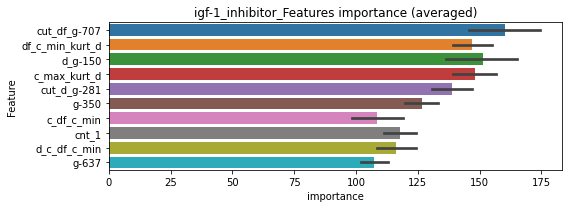

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000473992	valid_1's binary_logloss: 0.00778153


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000463244	valid_1's binary_logloss: 0.00547558


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000484754	valid_1's binary_logloss: 0.0106639


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000513901	valid_1's binary_logloss: 0.0108399


igf-1_inhibitor logloss: 0.008691635123920556
ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000356808	valid_1's binary_logloss: 0.00853836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000364624	valid_1's binary_logloss: 0.00178726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000357049	valid_1's binary_logloss: 0.000996381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00036891	valid_1's binary_logloss: 0.00152641


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028853, Threshold: 0.0127299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0127299, conf_0:0.00891, conf_1:0.01655
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0427299
threshold: 0.0427299, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.0427299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00126
Num_p_label: 35.0, Expected: 5.0, Threshold: 0.0427299, conf_0:0.03418, conf_1:0.05128
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.0727299
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.1027299
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.1027299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1027299, conf_0:0.09246, conf_1:0.11300
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


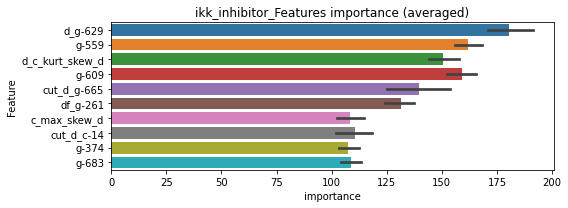

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000376147	valid_1's binary_logloss: 0.00700553


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000347923	valid_1's binary_logloss: 0.00139046
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000346887	valid_1's binary_logloss: 0.00138725


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000352297	valid_1's binary_logloss: 0.000907076
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000352297	valid_1's binary_logloss: 0.000907076


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000352782	valid_1's binary_logloss: 0.00118517


ikk_inhibitor logloss: 0.002621365771451567
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000371479	valid_1's binary_logloss: 0.00385573
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000352784	valid_1's binary_logloss: 0.00743804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000368427	valid_1's binary_logloss: 0.00126785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000378856	valid_1's binary_logloss: 0.00331557


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024106, Threshold: 0.0107881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0107881, conf_0:0.00755, conf_1:0.01402
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0407881
threshold: 0.0407881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.0407881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0082873 Vs.target_rate: 0.00130
Num_p_label: 33.0, Expected: 5.2, Threshold: 0.0407881, conf_0:0.03263, conf_1:0.04895
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0707881
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.1007881
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_3: 0.1307881
threshold: 0.1307881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.1307881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, Expected: 5.2, Threshold: 0.1307881, conf_0:0.11771, conf_1:0.14387
threshold: 0.1307881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


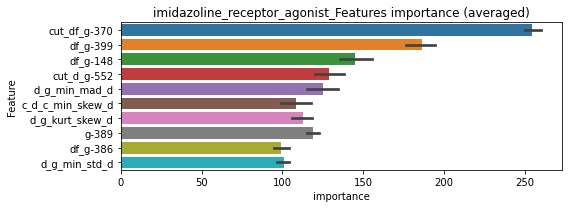

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000363451	valid_1's binary_logloss: 0.00261703


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000361536	valid_1's binary_logloss: 0.00956244


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000359407	valid_1's binary_logloss: 0.0010195


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000360354	valid_1's binary_logloss: 0.00182164


imidazoline_receptor_agonist logloss: 0.0037552057287787025
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0383017	valid_1's binary_logloss: 0.0793486
[2000]	training's binary_logloss: 0.0190167	valid_1's binary_logloss: 0.0614397
[3000]	training's binary_logloss: 0.0125835	valid_1's binary_logloss: 0.0542967
[4000]	training's binary_logloss: 0.00937618	valid_1's binary_logloss: 0.0505195
Early stopping, best iteration is:
[4208]	training's binary_logloss: 0.00890629	valid_1's binary_logloss: 0.0499648
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0385825	valid_1's binary_logloss: 0.0772662
[2000]	training's binary_logloss: 0.0190506	valid_1's binary_logloss: 0.0574419
[3000]	training's binary_logloss: 0.0125502	valid_1's binary_logloss: 0.0500927
[4000]	training's binary_logloss: 0.00935439	valid_1's binary_logloss: 0.0463496
Early stopping, best iteration is:
[4878]	training's binary_logloss: 0.00767421	valid_1's binary_logloss: 0.0440778
Trai

1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0299719, Threshold: 0.0780025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0780025, conf_0:0.05460, conf_1:0.10140
Num_p_label: 16.0, Expected: 12.2, Adj_threshold_1: 0.1080025
threshold: 0.1080025, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3788, y_label_rate: 0.1715945
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0372882	valid_1's binary_logloss: 0.0741028
[2000]	training's binary_logloss: 0.0184072	valid_1's binary_logloss: 0.0536159
[3000]	training's binary_logloss: 0.0121414	valid_1's binary_logloss: 0.0458894
[4000]	training's binary_logloss: 0.00906367	valid_1's binary_logloss: 0.0419166
[5000]	training's binary_logloss: 0.00725089	valid_1's binary_logloss: 0.0395431
Early stopping, best iteration is:
[5942]	training's binary_logloss: 0.00610025	valid_1's binary_logloss: 0.0380101
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370821	valid_1's binary_logloss: 0.0786023
[2000]	training's binary_logloss: 0.01826	valid_1's binary_logloss: 0.0567636
[3000]	training's binary_logloss: 0.0120225	valid_1's binary_logloss: 0.0483646
[4000]	training's binary_logloss: 0.00896009	valid_1's binary_logloss: 0.0442602
[5000]	training's binary_logloss: 0.00717

2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0571289, Threshold: 0.1080025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0087896 Vs.target_rate: 0.00307
Num_p_label: 35.0, Expected: 12.2, Threshold: 0.1080025, conf_0:0.08640, conf_1:0.12960
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.1380025
threshold: 0.1380025, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0366115	valid_1's binary_logloss: 0.068756
[2000]	training's binary_logloss: 0.018128	valid_1's binary_logloss: 0.0493979
[3000]	training's binary_logloss: 0.011981	valid_1's binary_logloss: 0.0421188
[4000]	training's binary_logloss: 0.00894902	valid_1's binary_logloss: 0.0383784
[5000]	training's binary_logloss: 0.00715587	valid_1's binary_logloss: 0.0360344
[6000]	training's binary_logloss: 0.00597569	valid_1's binary_logloss: 0.0344538
Early stopping, best iteration is:
[6663]	training's binary_logloss: 0.0053931	valid_1's binary_logloss: 0.03359
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0366681	valid_1's binary_logloss: 0.0785561
[2000]	training's binary_logloss: 0.018085	valid_1's binary_logloss: 0.0589708
[3000]	training's binary_logloss: 0.0118838	valid_1's binary_logloss: 0.0518384
[4000]	training's binary_logloss: 0.00887198	v

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0468612, Threshold: 0.1380025, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3776
p_label_rate: 0.0047715 Vs.target_rate: 0.00307
Num_p_label: 19.0, Expected: 12.2, Threshold: 0.1380025, conf_0:0.12420, conf_1:0.15180
Num_p_label: 10.0, Expected: 12.2, Adj_threshold_1: 0.1680025
threshold: 0.1680025, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 644.0/3776, y_label_rate: 0.1705508


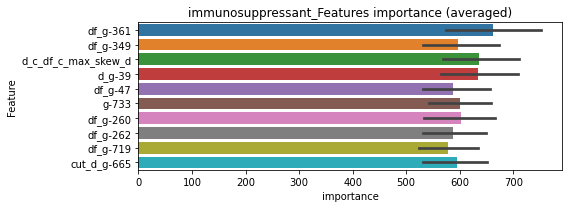

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0502937	valid_1's binary_logloss: 0.093659
[2000]	training's binary_logloss: 0.0256356	valid_1's binary_logloss: 0.0698572
[3000]	training's binary_logloss: 0.0170328	valid_1's binary_logloss: 0.0612003
Early stopping, best iteration is:
[3325]	training's binary_logloss: 0.0153254	valid_1's binary_logloss: 0.0592572


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0501914	valid_1's binary_logloss: 0.0958026
[2000]	training's binary_logloss: 0.0255778	valid_1's binary_logloss: 0.0719532
[3000]	training's binary_logloss: 0.0169388	valid_1's binary_logloss: 0.0628532
[4000]	training's binary_logloss: 0.0126464	valid_1's binary_logloss: 0.0582303
[5000]	training's binary_logloss: 0.0101182	valid_1's binary_logloss: 0.0552982
Early stopping, best iteration is:
[5729]	training's binary_logloss: 0.00882752	valid_1's binary_logloss: 0.0535838


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0534371	valid_1's binary_logloss: 0.0762825
[2000]	training's binary_logloss: 0.0272218	valid_1's binary_logloss: 0.0466878
[3000]	training's binary_logloss: 0.0180341	valid_1's binary_logloss: 0.0355928
[4000]	training's binary_logloss: 0.0134542	valid_1's binary_logloss: 0.0298797
[5000]	training's binary_logloss: 0.01074	valid_1's binary_logloss: 0.0262162
[6000]	training's binary_logloss: 0.00893376	valid_1's binary_logloss: 0.0236115
[7000]	training's binary_logloss: 0.00766878	valid_1's binary_logloss: 0.0218488
[8000]	training's binary_logloss: 0.00672032	valid_1's binary_logloss: 0.0204102
[9000]	training's binary_logloss: 0.00599446	valid_1's binary_logloss: 0.0193068
[10000]	training's binary_logloss: 0.00541489	valid_1's binary_logloss: 0.0183921
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00541489	valid_1's binary_logloss: 0.0183921


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0515631	valid_1's binary_logloss: 0.0826329
[2000]	training's binary_logloss: 0.0262947	valid_1's binary_logloss: 0.0566029
[3000]	training's binary_logloss: 0.0174322	valid_1's binary_logloss: 0.0469388
[4000]	training's binary_logloss: 0.0130308	valid_1's binary_logloss: 0.0418556
[5000]	training's binary_logloss: 0.0104204	valid_1's binary_logloss: 0.0386053
[6000]	training's binary_logloss: 0.00868968	valid_1's binary_logloss: 0.0364053
[7000]	training's binary_logloss: 0.00746779	valid_1's binary_logloss: 0.0348809
[8000]	training's binary_logloss: 0.00655043	valid_1's binary_logloss: 0.0334631
Early stopping, best iteration is:
[8371]	training's binary_logloss: 0.00626871	valid_1's binary_logloss: 0.0330492


immunosuppressant logloss: 0.041070561439954606
immunosuppressant is unpredictable(><)!
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000479429	valid_1's binary_logloss: 0.00954221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000413927	valid_1's binary_logloss: 0.00428657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000418688	valid_1's binary_logloss: 0.00139069
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000404523	valid_1's binary_logloss: 0.00630081


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025381, Threshold: 0.0105076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0105076, conf_0:0.00736, conf_1:0.01366
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0405076
threshold: 0.0405076, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000420126	valid_1's binary_logloss: 0.00980984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000432715	valid_1's binary_logloss: 0.003686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000401416	valid_1's binary_logloss: 0.00103849
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00041442	valid_1's binary_logloss: 0.00629626


y_Threshold: 0.0381122, Threshold: 0.0405076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0070316 Vs.target_rate: 0.00126
Num_p_label: 28.0, Expected: 5.0, Threshold: 0.0405076, conf_0:0.03241, conf_1:0.04861
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0705076
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.1005076
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1305076
threshold: 0.1305076, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000420126	valid_1's binary_logloss: 0.00980984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000432715	valid_1's binary_logloss: 0.003686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000401416	valid_1's binary_logloss: 0.00103849
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00041442	valid_1's binary_logloss: 0.00629626


y_Threshold: 0.0381122, Threshold: 0.1305076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.1305076, conf_0:0.11746, conf_1:0.14356
threshold: 0.1305076, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


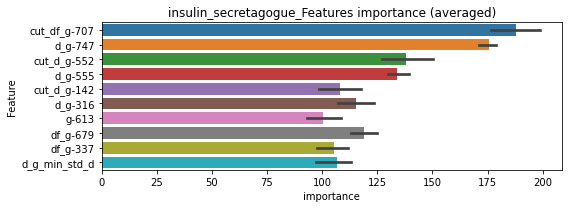

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000466652	valid_1's binary_logloss: 0.00789134


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000414485	valid_1's binary_logloss: 0.00353216


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000425263	valid_1's binary_logloss: 0.0010307


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.0004775	valid_1's binary_logloss: 0.00541843


insulin_secretagogue logloss: 0.004469100249643898
insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000494077	valid_1's binary_logloss: 0.0120158
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00049087	valid_1's binary_logloss: 0.00510336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000524045	valid_1's binary_logloss: 0.0166681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000600014	valid_1's binary_logloss: 0.0268047


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0038190, Threshold: 0.0091664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0091664, conf_0:0.00642, conf_1:0.01192
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0391664
threshold: 0.0391664, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000529765	valid_1's binary_logloss: 0.0129686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00048324	valid_1's binary_logloss: 0.0049315
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000506197	valid_1's binary_logloss: 0.0146937
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217402, Threshold: 0.0391664, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000872561	valid_1's binary_logloss: 0.0261283


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0030136 Vs.target_rate: 0.00214
Num_p_label: 12.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03133, conf_1:0.04700
threshold: 0.0391664, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000478184	valid_1's binary_logloss: 0.0102039
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000487196	valid_1's binary_logloss: 0.0114558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000504616	valid_1's binary_logloss: 0.0138751
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000536933	valid_1's binary_logloss: 0.0073301


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298497, Threshold: 0.0391664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0035158 Vs.target_rate: 0.00214
Num_p_label: 14.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03525, conf_1:0.04308
threshold: 0.0391664, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


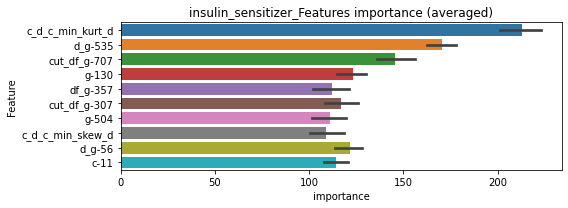

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00055515	valid_1's binary_logloss: 0.0111912


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000516446	valid_1's binary_logloss: 0.0120363


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000554067	valid_1's binary_logloss: 0.0154178


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00048992	valid_1's binary_logloss: 0.00827415


insulin_sensitizer logloss: 0.011731076002542425
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000495583	valid_1's binary_logloss: 0.0106609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000448253	valid_1's binary_logloss: 0.00641679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000463825	valid_1's binary_logloss: 0.0038384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000451215	valid_1's binary_logloss: 0.00760444


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044229, Threshold: 0.0148987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0148987, conf_0:0.01043, conf_1:0.01937
Num_p_label: 6.0, Expected: 7.0, Adj_threshold_1: 0.0448987
threshold: 0.0448987, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252438, Threshold: 0.0448987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0075339 Vs.target_rate: 0.00176
Num_p_label: 30.0, Expected: 7.0, Threshold: 0.0448987, conf_0:0.03592, conf_1:0.05388
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0748987
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252438, Threshold: 0.0748987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00176
Num_p_label: 12.0, Expected: 7.0, Threshold: 0.0748987, conf_0:0.06741, conf_1:0.08239
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


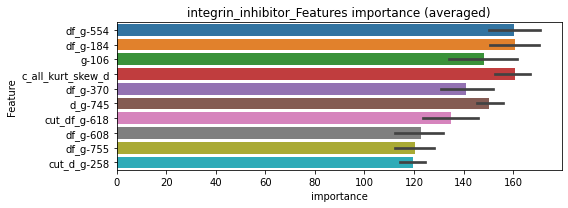

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00050383	valid_1's binary_logloss: 0.00905334


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000450453	valid_1's binary_logloss: 0.00505007


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000455696	valid_1's binary_logloss: 0.00310913


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000443664	valid_1's binary_logloss: 0.00719472


integrin_inhibitor logloss: 0.006102590634322107
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00112883	valid_1's binary_logloss: 0.0524191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00124061	valid_1's binary_logloss: 0.0413063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000925519	valid_1's binary_logloss: 0.0184325
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00102445	valid_1's binary_logloss: 0.0353317


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0109471, Threshold: 0.1278113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1278113, conf_0:0.08947, conf_1:0.16615
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_1: 0.1578113
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_2: 0.1878113
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.2178113
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_4: 0.2478113
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.2778113
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_6: 0.3078113
threshold: 0.3078113, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00100039	valid_1's binary_logloss: 0.0406916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.00071407	valid_1's binary_logloss: 0.0245631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000943473	valid_1's binary_logloss: 0.0308705
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000674393	valid_1's binary_logloss: 0.0233685


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0436618, Threshold: 0.3078113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0090407 Vs.target_rate: 0.00386
Num_p_label: 36.0, Expected: 15.4, Threshold: 0.3078113, conf_0:0.24625, conf_1:0.36937
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_1: 0.3378113
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_2: 0.3678113
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_3: 0.3978113
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_4: 0.4278113
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_5: 0.4578113
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_6: 0.4878113
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_7: 0.5178113
threshold: 0.5178113, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000825657	valid_1's binary_logloss: 0.0245818
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00104485	valid_1's binary_logloss: 0.0417498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000735695	valid_1's binary_logloss: 0.0232221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000799638	valid_1's binary_logloss: 0.0308959


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0304182, Threshold: 0.5178113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 640.0/3770
p_label_rate: 0.0060271 Vs.target_rate: 0.00386
Num_p_label: 24.0, Expected: 15.4, Threshold: 0.5178113, conf_0:0.46603, conf_1:0.56959
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_1: 0.5478113
threshold: 0.5478113, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3770, y_label_rate: 0.1697613


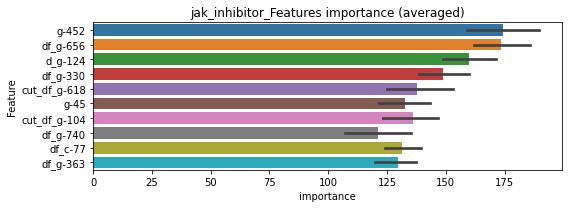

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000842949	valid_1's binary_logloss: 0.0239968


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 jak_inhibitor=================================


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00176851	valid_1's binary_logloss: 0.0342427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00075201	valid_1's binary_logloss: 0.0132948


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000993721	valid_1's binary_logloss: 0.0328022


jak_inhibitor logloss: 0.026085733939247423


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.047345	valid_1's binary_logloss: 0.124908
Early stopping, best iteration is:
[1757]	training's binary_logloss: 0.026178	valid_1's binary_logloss: 0.118655
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0464537	valid_1's binary_logloss: 0.13995
Early stopping, best iteration is:
[1342]	training's binary_logloss: 0.0343396	valid_1's binary_logloss: 0.136779
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0478632	valid_1's binary_logloss: 0.124469
Early stopping, best iteration is:
[1755]	training's binary_logloss: 0.026603	valid_1's binary_logloss: 0.116614
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0480944	valid_1's binary_logloss: 0.123393
[2000]	training's binary_logloss: 0.0231827	valid_1's binary_logloss: 0.114355
Early stopping, best it

1 / 3, AUC score:0.967, PR-AUC:0.939
y_Threshold: 0.0564669, Threshold: 0.0965936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 542 → Positive_corect_labels: 1235/7673
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.0965936, conf_0:0.06762, conf_1:0.12557
threshold: 0.0965936, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1235.0/7673, y_label_rate: 0.1609540
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030277	valid_1's binary_logloss: 0.0856876
Early stopping, best iteration is:
[1454]	training's binary_logloss: 0.0207069	valid_1's binary_logloss: 0.0810445
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0320593	valid_1's binary_logloss: 0.0683111
[2000]	training's binary_logloss: 0.0155937	valid_1's binary_logloss: 0.0594161
Early stopping, best iteration is:
[2183]	training's binary_logloss: 0.0142082	valid_1's binary_logloss: 0.0588005
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0319759	valid_1's binary_logloss: 0.0674322
[2000]	training's binary_logloss: 0.0156887	valid_1's binary_logloss: 0.0581753
[3000]	training's binary_logloss: 0.0102098	valid_1's binary_logloss: 0.0551358
Early stopping, best iteration is:
[3235]	training's binary_logloss: 0.00942382	valid_1's binary_logloss: 0.

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0563379, Threshold: 0.0965936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1177.0/7557
p_label_rate: 0.0087896 Vs.target_rate: 0.01146
Num_p_label: 35.0, Expected: 45.6, Threshold: 0.0965936, conf_0:0.07727, conf_1:0.11591
threshold: 0.0965936, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
positive_y_label: 1177.0/7557, y_label_rate: 0.1557496
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0238426	valid_1's binary_logloss: 0.0482576
[2000]	training's binary_logloss: 0.0118833	valid_1's binary_logloss: 0.0410525
Early stopping, best iteration is:
[2551]	training's binary_logloss: 0.00921531	valid_1's binary_logloss: 0.0393614
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.023749	valid_1's binary_logloss: 0.0533259
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.0123111	valid_1's binary_logloss: 0.0457609
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0237935	valid_1's binary_logloss: 0.0521513
[2000]	training's binary_logloss: 0.0117473	valid_1's binary_logloss: 0.0444337
[3000]	training's binary_logloss: 0.00768606	valid_1's binary_logloss: 0.041971
Early stopping, best iteration is:
[3011]	training's binary_logloss: 0.00765287	valid_1's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0495090, Threshold: 0.0965936, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1147.0/7497
p_label_rate: 0.0082873 Vs.target_rate: 0.01146
Num_p_label: 33.0, Expected: 45.6, Threshold: 0.0965936, conf_0:0.08693, conf_1:0.10625
threshold: 0.0965936, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 1147.0/7497, y_label_rate: 0.1529945


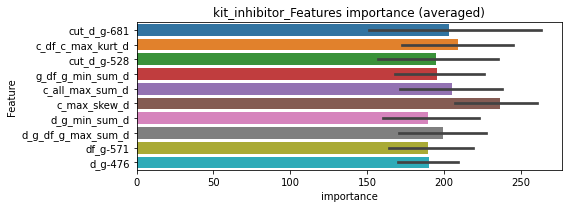

len(train_index) : 5622
len(valid_index) : 1875
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275232	valid_1's binary_logloss: 0.0459186
[2000]	training's binary_logloss: 0.014302	valid_1's binary_logloss: 0.0354143
[3000]	training's binary_logloss: 0.00956501	valid_1's binary_logloss: 0.0319087
[4000]	training's binary_logloss: 0.00714498	valid_1's binary_logloss: 0.0302447
Early stopping, best iteration is:
[4087]	training's binary_logloss: 0.00698889	valid_1's binary_logloss: 0.0301551


len(train_index) : 5623
len(valid_index) : 1874
================================= fold 2/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0269775	valid_1's binary_logloss: 0.0500129
[2000]	training's binary_logloss: 0.0138159	valid_1's binary_logloss: 0.0397138
[3000]	training's binary_logloss: 0.00921026	valid_1's binary_logloss: 0.0364477
Early stopping, best iteration is:
[3528]	training's binary_logloss: 0.00783023	valid_1's binary_logloss: 0.0354763


len(train_index) : 5623
len(valid_index) : 1874
================================= fold 3/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0278352	valid_1's binary_logloss: 0.0439292
[2000]	training's binary_logloss: 0.0144834	valid_1's binary_logloss: 0.0328006
[3000]	training's binary_logloss: 0.00966931	valid_1's binary_logloss: 0.0287994
[4000]	training's binary_logloss: 0.00722194	valid_1's binary_logloss: 0.0266344
[5000]	training's binary_logloss: 0.00575581	valid_1's binary_logloss: 0.0253534
[6000]	training's binary_logloss: 0.00478892	valid_1's binary_logloss: 0.0244593
Early stopping, best iteration is:
[6265]	training's binary_logloss: 0.0045861	valid_1's binary_logloss: 0.0242663


len(train_index) : 5623
len(valid_index) : 1874
================================= fold 4/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0285186	valid_1's binary_logloss: 0.040937
[2000]	training's binary_logloss: 0.0147693	valid_1's binary_logloss: 0.0305728
[3000]	training's binary_logloss: 0.00986193	valid_1's binary_logloss: 0.0269941
[4000]	training's binary_logloss: 0.00736446	valid_1's binary_logloss: 0.0250865
[5000]	training's binary_logloss: 0.00586967	valid_1's binary_logloss: 0.0238935
[6000]	training's binary_logloss: 0.00487316	valid_1's binary_logloss: 0.0230787
Early stopping, best iteration is:
[6102]	training's binary_logloss: 0.00479172	valid_1's binary_logloss: 0.0230011


kit_inhibitor logloss: 0.028224941480568158
laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000153357	valid_1's binary_logloss: 0.000194661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000151233	valid_1's binary_logloss: 0.00126174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000151549	valid_1's binary_logloss: 0.000181455
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004303, Threshold: 0.0012664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012664, conf_0:0.00089, conf_1:0.00165
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0312664
threshold: 0.0312664, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000153112	valid_1's binary_logloss: 0.000202879


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0312664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0312664, conf_0:0.02501, conf_1:0.03752
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0612664
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0612664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0612664, conf_0:0.05514, conf_1:0.06739
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


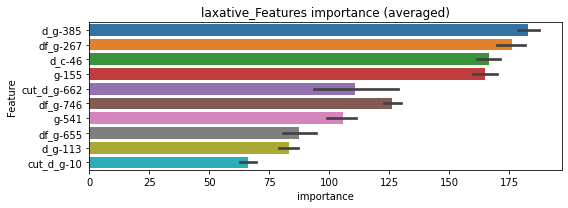

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148445	valid_1's binary_logloss: 0.000177605


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1205]	training's binary_logloss: 0.000145238	valid_1's binary_logloss: 0.000173727
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147615	valid_1's binary_logloss: 0.000842546
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000145993	valid_1's binary_logloss: 0.000838703


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149318	valid_1's binary_logloss: 0.000159575


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000146644	valid_1's binary_logloss: 0.000156671
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149582	valid_1's binary_logloss: 0.000190016
Early stopping, best iteration is:
[1378]	training's binary_logloss: 0.000144409	valid_1's binary_logloss: 0.000184108


laxative logloss: 0.00033825907911229185
leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000160577	valid_1's binary_logloss: 0.000536264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000159342	valid_1's binary_logloss: 0.00552908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000161386	valid_1's binary_logloss: 0.000233207
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005549, Threshold: 0.0012812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012812, conf_0:0.00090, conf_1:0.00167
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312812
threshold: 0.0312812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000158883	valid_1's binary_logloss: 0.00019661


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.0312812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0312812, conf_0:0.02502, conf_1:0.03754
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0612812
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0912812
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1212812
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.1212812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.1212812, conf_0:0.10915, conf_1:0.13341
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


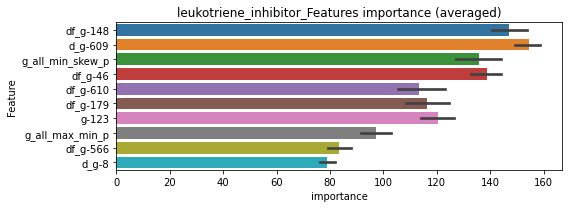

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152861	valid_1's binary_logloss: 0.000360305
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.000151331	valid_1's binary_logloss: 0.00035844


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151976	valid_1's binary_logloss: 0.00171336


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000149559	valid_1's binary_logloss: 0.00170423
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150914	valid_1's binary_logloss: 0.000181501
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000149664	valid_1's binary_logloss: 0.000180049


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152621	valid_1's binary_logloss: 0.000167041


leukotriene_inhibitor logloss: 0.000602110364610367


Early stopping, best iteration is:
[1110]	training's binary_logloss: 0.000150658	valid_1's binary_logloss: 0.000164887


leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000799006	valid_1's binary_logloss: 0.0407184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0014096	valid_1's binary_logloss: 0.0395104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000653404	valid_1's binary_logloss: 0.00590019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000641074	valid_1's binary_logloss: 0.0186809


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0051143, Threshold: 0.0112192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0112192, conf_0:0.00785, conf_1:0.01458
Num_p_label: 3.0, Expected: 10.4, Adj_threshold_1: 0.0412192
threshold: 0.0412192, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00116604	valid_1's binary_logloss: 0.0331577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00134352	valid_1's binary_logloss: 0.0265792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000562298	valid_1's binary_logloss: 0.0121777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000645801	valid_1's binary_logloss: 0.0269961


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0233006, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0020090 Vs.target_rate: 0.00260
Num_p_label: 8.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03298, conf_1:0.04946
threshold: 0.0412192, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000531969	valid_1's binary_logloss: 0.0159546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000648451	valid_1's binary_logloss: 0.0246976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000863604	valid_1's binary_logloss: 0.0218708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00056696	valid_1's binary_logloss: 0.0140177


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266769, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03710, conf_1:0.04534
threshold: 0.0412192, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


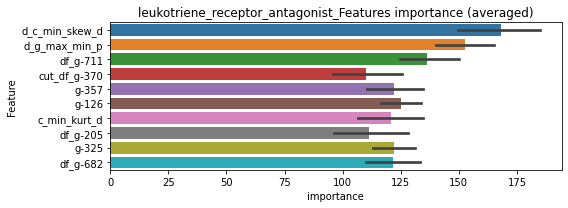

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000699695	valid_1's binary_logloss: 0.0196106


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000815267	valid_1's binary_logloss: 0.0135213


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000562482	valid_1's binary_logloss: 0.0132712


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000800155	valid_1's binary_logloss: 0.0166386


leukotriene_receptor_antagonist logloss: 0.01576193653390289
lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000218448	valid_1's binary_logloss: 0.00507746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000218282	valid_1's binary_logloss: 0.00085662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000228785	valid_1's binary_logloss: 0.000283942
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008451, Threshold: 0.0019468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0019468, conf_0:0.00136, conf_1:0.00253
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0319468


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000223586	valid_1's binary_logloss: 0.00133144


threshold: 0.0319468, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0319468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.0319468, conf_0:0.02556, conf_1:0.03834
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0619468


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0619468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0619468, conf_0:0.05575, conf_1:0.06814


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


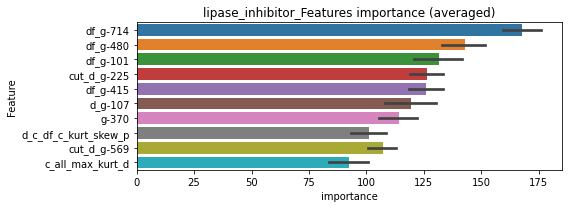

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00021461	valid_1's binary_logloss: 0.00192868
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212906	valid_1's binary_logloss: 0.00044202
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.00021222	valid_1's binary_logloss: 0.000441343


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000215976	valid_1's binary_logloss: 0.000269047


================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208278	valid_1's binary_logloss: 0.000690095
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000208232	valid_1's binary_logloss: 0.000690031


lipase_inhibitor logloss: 0.0008325616958590264
lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:313
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000642394	valid_1's binary_logloss: 0.019137
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000534407	valid_1's binary_logloss: 0.00968382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000558863	valid_1's binary_logloss: 0.0138084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000565183	valid_1's binary_logloss: 0.0233765


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054360, Threshold: 0.0847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0847418, conf_0:0.05932, conf_1:0.11016
Num_p_label: 39.0, Expected: 10.2, Adj_threshold_1: 0.1147418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1447418
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_3: 0.1747418
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_4: 0.2047418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_5: 0.2347418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_6: 0.2647418
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.2947418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_8: 0.3247418
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_9: 0.3547418
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_10: 0.3847418
threshold: 0.3847418, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000760533	valid_1's binary_logloss: 0.0206911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0167079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000533622	valid_1's binary_logloss: 0.00934085
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0257960, Threshold: 0.3847418, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00110275	valid_1's binary_logloss: 0.0351071


Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0092918 Vs.target_rate: 0.00256
Num_p_label: 37.0, Expected: 10.2, Threshold: 0.3847418, conf_0:0.30779, conf_1:0.46169
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_1: 0.4147418
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_2: 0.4447418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_3: 0.4747418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_4: 0.5047418
Num_p_label: 33.0, Expected: 10.2, Adj_threshold_5: 0.5347418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_6: 0.5647418
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_7: 0.5947418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_8: 0.6247418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_9: 0.6547418
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_10: 0.6847418
threshold: 0.6847418, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 ================

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000928793	valid_1's binary_logloss: 0.0250806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000578	valid_1's binary_logloss: 0.0143207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000576415	valid_1's binary_logloss: 0.0147836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000538133	valid_1's binary_logloss: 0.0118693


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0309536, Threshold: 0.6847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0050226 Vs.target_rate: 0.00256
Num_p_label: 20.0, Expected: 10.2, Threshold: 0.6847418, conf_0:0.61627, conf_1:0.75322
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.7147418
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_2: 0.7447418
threshold: 0.7447418, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


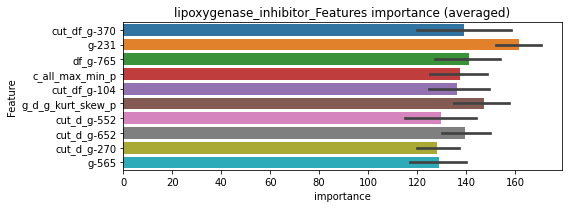

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000556743	valid_1's binary_logloss: 0.00969121


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000616224	valid_1's binary_logloss: 0.0135232


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000572651	valid_1's binary_logloss: 0.0216626


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000673048	valid_1's binary_logloss: 0.0196195


lipoxygenase_inhibitor logloss: 0.01612174006380028
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000168462	valid_1's binary_logloss: 0.000944164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000169353	valid_1's binary_logloss: 0.00142441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000173981	valid_1's binary_logloss: 0.000203808
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004834, Threshold: 0.0023534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0023534, conf_0:0.00165, conf_1:0.00306
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0323534
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0623534
threshold: 0.0623534, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000166301	valid_1's binary_logloss: 0.000551345


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.0623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00025
Num_p_label: 13.0, Expected: 1.0, Threshold: 0.0623534, conf_0:0.04988, conf_1:0.07482
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0923534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1223534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.1523534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.1823534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_5: 0.2123534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_6: 0.2423534


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


Num_p_label: 8.0, Expected: 1.0, Adj_threshold_7: 0.2723534
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.3023534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.3323534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.3623534
threshold: 0.3623534, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.3623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.3623534, conf_0:0.32612, conf_1:0.39859
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.3923534
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.4223534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.4523534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.4823534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.5123534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.5423534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.5723534


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.6023534
threshold: 0.6023534, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


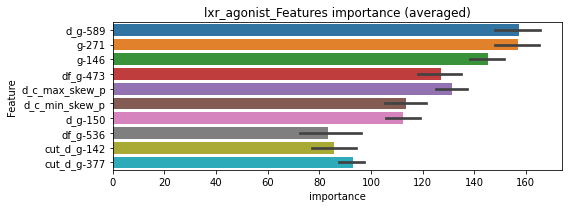

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000153915	valid_1's binary_logloss: 0.000353597
Early stopping, best iteration is:
[1066]	training's binary_logloss: 0.000152871	valid_1's binary_logloss: 0.000352011


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152555	valid_1's binary_logloss: 0.000442833
Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000150314	valid_1's binary_logloss: 0.000438478


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154182	valid_1's binary_logloss: 0.000166956


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Early stopping, best iteration is:
[1188]	training's binary_logloss: 0.000151478	valid_1's binary_logloss: 0.000163935
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152844	valid_1's binary_logloss: 0.000197413


lxr_agonist logloss: 0.0002875145743924578


Early stopping, best iteration is:
[1106]	training's binary_logloss: 0.000151452	valid_1's binary_logloss: 0.000195634


mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000403088	valid_1's binary_logloss: 0.00696813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000430864	valid_1's binary_logloss: 0.00401303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000411653	valid_1's binary_logloss: 0.00253557
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000409915	valid_1's binary_logloss: 0.00449951


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027126, Threshold: 0.0361704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0361704, conf_0:0.02532, conf_1:0.04702
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_1: 0.0661704
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.0961704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1261704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_4: 0.1561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.1861704
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2161704
threshold: 0.2161704, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.2161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00130
Num_p_label: 35.0, Expected: 5.2, Threshold: 0.2161704, conf_0:0.17294, conf_1:0.25940
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_1: 0.2461704
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_2: 0.2761704
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_3: 0.3061704
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_4: 0.3361704
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_5: 0.3661704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_6: 0.3961704
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_7: 0.4261704
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_8: 0.4561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_9: 0.4861704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_10: 0.5161704
threshold: 0.5161704, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


y_Threshold: 0.0323944, Threshold: 0.5161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.5161704, conf_0:0.46455, conf_1:0.56779
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.5461704
threshold: 0.5461704, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


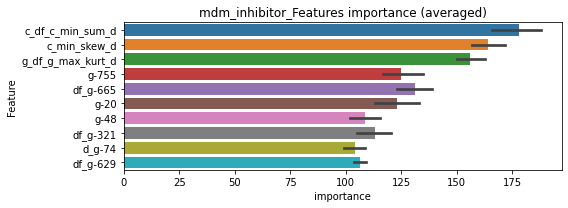

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000395529	valid_1's binary_logloss: 0.00379976


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000405835	valid_1's binary_logloss: 0.00332775


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000400397	valid_1's binary_logloss: 0.00118144


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000409005	valid_1's binary_logloss: 0.00290718


mdm_inhibitor logloss: 0.0028041296121338803
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000614321	valid_1's binary_logloss: 0.0256426
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000600395	valid_1's binary_logloss: 0.0239754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000590767	valid_1's binary_logloss: 0.00569473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000669241	valid_1's binary_logloss: 0.0296798


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0057713, Threshold: 0.0209722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0209722, conf_0:0.01468, conf_1:0.02726
Num_p_label: 3.0, Expected: 12.0, Adj_threshold_1: 0.0509722
threshold: 0.0509722, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00062487	valid_1's binary_logloss: 0.0262689
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000585085	valid_1's binary_logloss: 0.0237277
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000591348	valid_1's binary_logloss: 0.0047423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000611814	valid_1's binary_logloss: 0.0247701


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201435, Threshold: 0.0509722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0057760 Vs.target_rate: 0.00302
Num_p_label: 23.0, Expected: 12.0, Threshold: 0.0509722, conf_0:0.04078, conf_1:0.06117
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0809722
threshold: 0.0809722, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00071069	valid_1's binary_logloss: 0.0181859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000597334	valid_1's binary_logloss: 0.0134643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000590545	valid_1's binary_logloss: 0.0165468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00067439	valid_1's binary_logloss: 0.0141217


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246051, Threshold: 0.0809722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0809722, conf_0:0.07287, conf_1:0.08907
threshold: 0.0809722, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


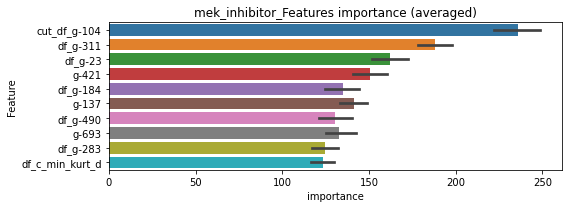

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000804354	valid_1's binary_logloss: 0.0227298


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000616491	valid_1's binary_logloss: 0.0194175


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000715119	valid_1's binary_logloss: 0.0166142


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000931487	valid_1's binary_logloss: 0.0158646


mek_inhibitor logloss: 0.018657593802092986
membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000667733	valid_1's binary_logloss: 0.0208992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000660533	valid_1's binary_logloss: 0.0279782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000988466	valid_1's binary_logloss: 0.0310065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000786763	valid_1's binary_logloss: 0.0300372


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0057424, Threshold: 0.0181684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0181684, conf_0:0.01272, conf_1:0.02362
Num_p_label: 6.0, Expected: 12.4, Adj_threshold_1: 0.0481684
threshold: 0.0481684, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000786701	valid_1's binary_logloss: 0.0231906
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000632664	valid_1's binary_logloss: 0.0275624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000779746	valid_1's binary_logloss: 0.0233566
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00103321	valid_1's binary_logloss: 0.0337524


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211019, Threshold: 0.0481684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0037670 Vs.target_rate: 0.00311
Num_p_label: 15.0, Expected: 12.4, Threshold: 0.0481684, conf_0:0.03853, conf_1:0.05780
threshold: 0.0481684, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000566713	valid_1's binary_logloss: 0.0175932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000609897	valid_1's binary_logloss: 0.0263719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000709556	valid_1's binary_logloss: 0.0330151
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000764553	valid_1's binary_logloss: 0.0290297


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173244, Threshold: 0.0481684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0032647 Vs.target_rate: 0.00311
Num_p_label: 13.0, Expected: 12.4, Threshold: 0.0481684, conf_0:0.04335, conf_1:0.05299
threshold: 0.0481684, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 644.0/3780, y_label_rate: 0.1703704


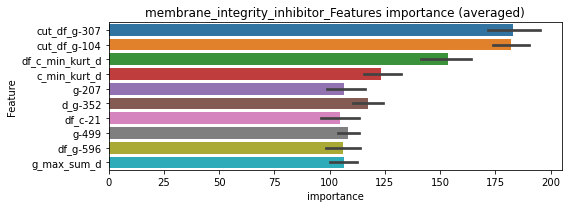

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000879874	valid_1's binary_logloss: 0.0222995


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000886223	valid_1's binary_logloss: 0.0246243


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00059825	valid_1's binary_logloss: 0.0112005


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000957779	valid_1's binary_logloss: 0.0261874


membrane_integrity_inhibitor logloss: 0.021077935115658804
mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000347145	valid_1's binary_logloss: 0.00208707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000351549	valid_1's binary_logloss: 0.00254108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000353168	valid_1's binary_logloss: 0.00140059
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018504, Threshold: 0.0051409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0051409, conf_0:0.00360, conf_1:0.00668


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000360299	valid_1's binary_logloss: 0.00822544


Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0351409
threshold: 0.0351409, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.02811, conf_1:0.04217


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.03163, conf_1:0.03865


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


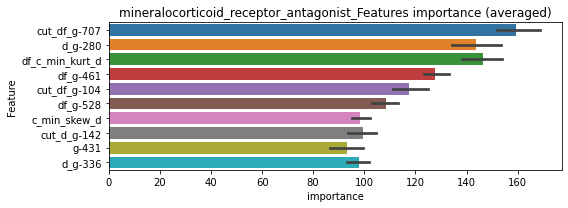

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000335245	valid_1's binary_logloss: 0.00190701


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000347407	valid_1's binary_logloss: 0.0021514


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00034661	valid_1's binary_logloss: 0.00134472


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00035973	valid_1's binary_logloss: 0.00762624


mineralocorticoid_receptor_antagonist logloss: 0.0032577012845831383
monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00022456	valid_1's binary_logloss: 0.00213293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000228446	valid_1's binary_logloss: 0.00369653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000229948	valid_1's binary_logloss: 0.000417409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008240, Threshold: 0.0018187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0018187, conf_0:0.00127, conf_1:0.00236
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0318187


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000229791	valid_1's binary_logloss: 0.000356436


threshold: 0.0318187, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02545, conf_1:0.03818


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02864, conf_1:0.03500


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


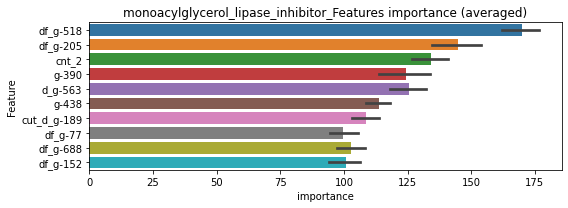

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000229288	valid_1's binary_logloss: 0.00279274
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000217587	valid_1's binary_logloss: 0.00289986
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000218228	valid_1's binary_logloss: 0.000281663
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0015859713130587367


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000218262	valid_1's binary_logloss: 0.000368703


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0326956	valid_1's binary_logloss: 0.0926163
Early stopping, best iteration is:
[1920]	training's binary_logloss: 0.0168346	valid_1's binary_logloss: 0.084231
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0342992	valid_1's binary_logloss: 0.081366
[2000]	training's binary_logloss: 0.0167283	valid_1's binary_logloss: 0.0716602
Early stopping, best iteration is:
[2705]	training's binary_logloss: 0.0121124	valid_1's binary_logloss: 0.0687179
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0345505	valid_1's binary_logloss: 0.0716227
[2000]	training's binary_logloss: 0.0169989	valid_1's binary_logloss: 0.0630339
Early stopping, best iteration is:
[2179]	training's binary_logloss: 0.0155293	valid_1's binary_logloss: 0.0624208
Training until validation scores don't improve for 30 rounds
[1000]	traini

1 / 3, AUC score:0.995, PR-AUC:0.986
y_Threshold: 0.0334547, Threshold: 0.0652647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 638/3762
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0652647, conf_0:0.04569, conf_1:0.08484
Num_p_label: 8.0, Expected: 14.2, Adj_threshold_1: 0.0952647
threshold: 0.0952647, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 638.0/3762, y_label_rate: 0.1695906
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291816	valid_1's binary_logloss: 0.0720064
Early stopping, best iteration is:
[1741]	training's binary_logloss: 0.016727	valid_1's binary_logloss: 0.0653145
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0297545	valid_1's binary_logloss: 0.067503
[2000]	training's binary_logloss: 0.0147161	valid_1's binary_logloss: 0.0578656
Early stopping, best iteration is:
[2557]	training's binary_logloss: 0.011388	valid_1's binary_logloss: 0.0560113
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0306638	valid_1's binary_logloss: 0.0632045
[2000]	training's binary_logloss: 0.015096	valid_1's binary_logloss: 0.0539161
Early stopping, best iteration is:
[2682]	training's binary_logloss: 0.011111	valid_1's binary_logloss: 0.0513711
Training until validation scores don't improve for 30 rounds
[1000]	training'

2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0435403, Threshold: 0.0952647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 620.0/3726
p_label_rate: 0.0047715 Vs.target_rate: 0.00357
Num_p_label: 19.0, Expected: 14.2, Threshold: 0.0952647, conf_0:0.07621, conf_1:0.11432
threshold: 0.0952647, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 620.0/3726, y_label_rate: 0.1663983
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0239787	valid_1's binary_logloss: 0.0706152
Early stopping, best iteration is:
[1793]	training's binary_logloss: 0.0134125	valid_1's binary_logloss: 0.0638287
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0256993	valid_1's binary_logloss: 0.0558468
[2000]	training's binary_logloss: 0.0128422	valid_1's binary_logloss: 0.0473702
Early stopping, best iteration is:
[2499]	training's binary_logloss: 0.0102371	valid_1's binary_logloss: 0.0457064
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.025963	valid_1's binary_logloss: 0.0513999
[2000]	training's binary_logloss: 0.0129237	valid_1's binary_logloss: 0.0432632
[3000]	training's binary_logloss: 0.00854154	valid_1's binary_logloss: 0.0407694
Early stopping, best iteration is:
[3262]	training's binary_logloss: 0.00784102	valid_1's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0434213, Threshold: 0.0952647, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 610.0/3706
p_label_rate: 0.0035158 Vs.target_rate: 0.00357
Num_p_label: 14.0, Expected: 14.2, Threshold: 0.0952647, conf_0:0.08574, conf_1:0.10479
threshold: 0.0952647, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 610.0/3706, y_label_rate: 0.1645979


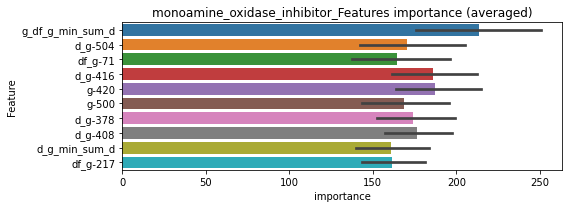

len(train_index) : 2779
len(valid_index) : 927
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339427	valid_1's binary_logloss: 0.0502904
[2000]	training's binary_logloss: 0.0174853	valid_1's binary_logloss: 0.0378481
[3000]	training's binary_logloss: 0.0116397	valid_1's binary_logloss: 0.0336224
[4000]	training's binary_logloss: 0.00868853	valid_1's binary_logloss: 0.0314801
[5000]	training's binary_logloss: 0.00695173	valid_1's binary_logloss: 0.0301852
[6000]	training's binary_logloss: 0.00579837	valid_1's binary_logloss: 0.0292954
Early stopping, best iteration is:
[6323]	training's binary_logloss: 0.00550534	valid_1's binary_logloss: 0.0290581


len(train_index) : 2779
len(valid_index) : 927
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0310275	valid_1's binary_logloss: 0.0676965
[2000]	training's binary_logloss: 0.0162025	valid_1's binary_logloss: 0.0563634
[3000]	training's binary_logloss: 0.0108559	valid_1's binary_logloss: 0.0526165
Early stopping, best iteration is:
[3325]	training's binary_logloss: 0.00978246	valid_1's binary_logloss: 0.0518475


len(train_index) : 2780
len(valid_index) : 926
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0338061	valid_1's binary_logloss: 0.04652
[2000]	training's binary_logloss: 0.0175664	valid_1's binary_logloss: 0.0349417
[3000]	training's binary_logloss: 0.0117486	valid_1's binary_logloss: 0.0309487
[4000]	training's binary_logloss: 0.00879425	valid_1's binary_logloss: 0.0289212
[5000]	training's binary_logloss: 0.00704349	valid_1's binary_logloss: 0.0278458
[6000]	training's binary_logloss: 0.00587255	valid_1's binary_logloss: 0.0270254
Early stopping, best iteration is:
[6026]	training's binary_logloss: 0.00584746	valid_1's binary_logloss: 0.0270062


len(train_index) : 2780
len(valid_index) : 926
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332093	valid_1's binary_logloss: 0.0581404
[2000]	training's binary_logloss: 0.0172261	valid_1's binary_logloss: 0.0464553
[3000]	training's binary_logloss: 0.0115242	valid_1's binary_logloss: 0.0423569
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.00914796	valid_1's binary_logloss: 0.0407564


monoamine_oxidase_inhibitor logloss: 0.0371688220879635
monoamine_oxidase_inhibitor is unpredictable(><)!
monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.000888263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000311369	valid_1's binary_logloss: 0.00179395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00030891	valid_1's binary_logloss: 0.00218472
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016201, Threshold: 0.0166980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0166980, conf_0:0.01169, conf_1:0.02171
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0466980
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0766980
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1066980


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000307446	valid_1's binary_logloss: 0.00275058


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1366980
threshold: 0.1366980, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.1366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.1366980, conf_0:0.10936, conf_1:0.16404
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.1666980
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.1966980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.2266980
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_4: 0.2566980
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.2866980
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3166980
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3466980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.3766980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4066980
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.4366980
threshold: 0.4366980, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.4366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.4366980, conf_0:0.39303, conf_1:0.48037
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.4666980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


threshold: 0.4666980, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


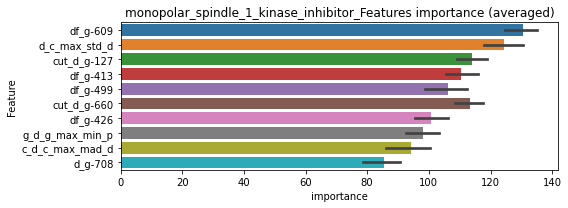

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000298611	valid_1's binary_logloss: 0.000550395


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000298749	valid_1's binary_logloss: 0.00153476


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000301315	valid_1's binary_logloss: 0.00105052


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000296596	valid_1's binary_logloss: 0.00124356


monopolar_spindle_1_kinase_inhibitor logloss: 0.0010947231612758394


mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0572166	valid_1's binary_logloss: 0.153212
[2000]	training's binary_logloss: 0.0286485	valid_1's binary_logloss: 0.138726
Early stopping, best iteration is:
[1976]	training's binary_logloss: 0.0290073	valid_1's binary_logloss: 0.138607
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0590572	valid_1's binary_logloss: 0.13388
[2000]	training's binary_logloss: 0.0295791	valid_1's binary_logloss: 0.119279
Early stopping, best iteration is:
[2676]	training's binary_logloss: 0.0218485	valid_1's binary_logloss: 0.115422
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0564994	valid_1's binary_logloss: 0.164675
Early stopping, best iteration is:
[1907]	training's binary_logloss: 0.0296939	valid_1's binary_logloss: 0.151833
Training until validation scores don't improve for 30 rounds
[1000]	training's bi

1 / 3, AUC score:0.972, PR-AUC:0.950
y_Threshold: 0.0645008, Threshold: 0.1140507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 190 → Positive_corect_labels: 504/3076
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.1140507, conf_0:0.07984, conf_1:0.14827
Num_p_label: 14.0, Expected: 21.7, Adj_threshold_1: 0.1440507
threshold: 0.1440507, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 504.0/3076, y_label_rate: 0.1638492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461424	valid_1's binary_logloss: 0.125747
[2000]	training's binary_logloss: 0.0232772	valid_1's binary_logloss: 0.110846
Early stopping, best iteration is:
[2557]	training's binary_logloss: 0.0180967	valid_1's binary_logloss: 0.107269
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0486588	valid_1's binary_logloss: 0.102491
[2000]	training's binary_logloss: 0.0244413	valid_1's binary_logloss: 0.0868803
[3000]	training's binary_logloss: 0.0160789	valid_1's binary_logloss: 0.0815829
Early stopping, best iteration is:
[3191]	training's binary_logloss: 0.0151018	valid_1's binary_logloss: 0.0809206
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0477155	valid_1's binary_logloss: 0.112252
[2000]	training's binary_logloss: 0.0239086	valid_1's binary_logloss: 0.0983911
Early stopping, best iteration i

2 / 3, AUC score:0.992, PR-AUC:0.983
y_Threshold: 0.0828574, Threshold: 0.1440507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 475.0/3018
p_label_rate: 0.0082873 Vs.target_rate: 0.00546
Num_p_label: 33.0, Expected: 21.7, Threshold: 0.1440507, conf_0:0.11524, conf_1:0.17286
Num_p_label: 22.0, Expected: 21.7, Adj_threshold_1: 0.1740507
threshold: 0.1740507, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 475.0/3018, y_label_rate: 0.1573890
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0389137	valid_1's binary_logloss: 0.103721
[2000]	training's binary_logloss: 0.0196161	valid_1's binary_logloss: 0.0891065
Early stopping, best iteration is:
[2108]	training's binary_logloss: 0.0185951	valid_1's binary_logloss: 0.0882988
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.042	valid_1's binary_logloss: 0.0779556
[2000]	training's binary_logloss: 0.020991	valid_1's binary_logloss: 0.0627884
[3000]	training's binary_logloss: 0.0138783	valid_1's binary_logloss: 0.0577328
Early stopping, best iteration is:
[3399]	training's binary_logloss: 0.0122103	valid_1's binary_logloss: 0.0566214
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0421803	valid_1's binary_logloss: 0.0764821
[2000]	training's binary_logloss: 0.021226	valid_1's binary_logloss: 0.0604002
[3000]	training's binary_logloss: 

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0730315, Threshold: 0.1740507, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 459.0/2986
p_label_rate: 0.0050226 Vs.target_rate: 0.00546
Num_p_label: 20.0, Expected: 21.7, Threshold: 0.1740507, conf_0:0.15665, conf_1:0.19146
threshold: 0.1740507, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 459.0/2986, y_label_rate: 0.1537173


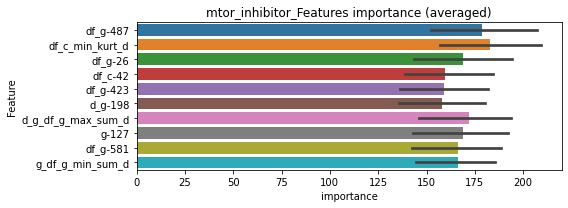

len(train_index) : 2239
len(valid_index) : 747
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0499633	valid_1's binary_logloss: 0.0964018
[2000]	training's binary_logloss: 0.0260635	valid_1's binary_logloss: 0.0781484
[3000]	training's binary_logloss: 0.0174299	valid_1's binary_logloss: 0.0720511
Early stopping, best iteration is:
[3332]	training's binary_logloss: 0.0156763	valid_1's binary_logloss: 0.0707963


len(train_index) : 2239
len(valid_index) : 747
================================= fold 2/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0529155	valid_1's binary_logloss: 0.0814397
[2000]	training's binary_logloss: 0.0276748	valid_1's binary_logloss: 0.0600887
[3000]	training's binary_logloss: 0.0185005	valid_1's binary_logloss: 0.0521864
[4000]	training's binary_logloss: 0.0138585	valid_1's binary_logloss: 0.0482364
[5000]	training's binary_logloss: 0.0110917	valid_1's binary_logloss: 0.0456995
[6000]	training's binary_logloss: 0.00926544	valid_1's binary_logloss: 0.0440612
Early stopping, best iteration is:
[6714]	training's binary_logloss: 0.00828425	valid_1's binary_logloss: 0.0431253


len(train_index) : 2240
len(valid_index) : 746
================================= fold 3/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0511898	valid_1's binary_logloss: 0.0908466
[2000]	training's binary_logloss: 0.0268573	valid_1's binary_logloss: 0.0716022
[3000]	training's binary_logloss: 0.0179551	valid_1's binary_logloss: 0.06462
[4000]	training's binary_logloss: 0.0134601	valid_1's binary_logloss: 0.0609389
Early stopping, best iteration is:
[4804]	training's binary_logloss: 0.0112203	valid_1's binary_logloss: 0.0593244


len(train_index) : 2240
len(valid_index) : 746
================================= fold 4/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0510256	valid_1's binary_logloss: 0.0890805
[2000]	training's binary_logloss: 0.0266032	valid_1's binary_logloss: 0.0686632
[3000]	training's binary_logloss: 0.0178309	valid_1's binary_logloss: 0.060852
[4000]	training's binary_logloss: 0.0133301	valid_1's binary_logloss: 0.0572722
Early stopping, best iteration is:
[4219]	training's binary_logloss: 0.0126462	valid_1's binary_logloss: 0.0566077


mtor_inhibitor logloss: 0.05746308076858247
mtor_inhibitor is unpredictable(><)!
mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000476707	valid_1's binary_logloss: 0.0121389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000476726	valid_1's binary_logloss: 0.00956389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000493206	valid_1's binary_logloss: 0.00312973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000594824	valid_1's binary_logloss: 0.0192982


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0037370, Threshold: 0.0989376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0989376, conf_0:0.06926, conf_1:0.12862
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.1589376
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1889376
threshold: 0.1889376, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000473679	valid_1's binary_logloss: 0.00505381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000465914	valid_1's binary_logloss: 0.00466512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000465649	valid_1's binary_logloss: 0.00539976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000469593	valid_1's binary_logloss: 0.0122536


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1002446, Threshold: 0.1889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0188348 Vs.target_rate: 0.00202
Num_p_label: 75.0, Expected: 8.0, Threshold: 0.1889376, conf_0:0.15115, conf_1:0.22673
Num_p_label: 70.0, Expected: 8.0, Adj_threshold_1: 0.2189376
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_2: 0.2489376
Num_p_label: 67.0, Expected: 8.0, Adj_threshold_3: 0.2789376
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_4: 0.3089376
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_5: 0.3389376
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_6: 0.3689376
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_7: 0.3989376
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4289376
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_9: 0.4589376
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.4889376
threshold: 0.4889376, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000468772	valid_1's binary_logloss: 0.00565936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470265	valid_1's binary_logloss: 0.00519889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000471949	valid_1's binary_logloss: 0.0058831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000461626	valid_1's binary_logloss: 0.00353389


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1380826, Threshold: 0.4889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0123054 Vs.target_rate: 0.00202
Num_p_label: 49.0, Expected: 8.0, Threshold: 0.4889376, conf_0:0.44004, conf_1:0.53783
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_1: 0.5189376
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_2: 0.5489376
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_3: 0.5789376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_4: 0.6089376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_5: 0.6389376
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_6: 0.6689376
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_7: 0.6989376
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_8: 0.7289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_9: 0.7589376
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.7889376
threshold: 0.7889376, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_la

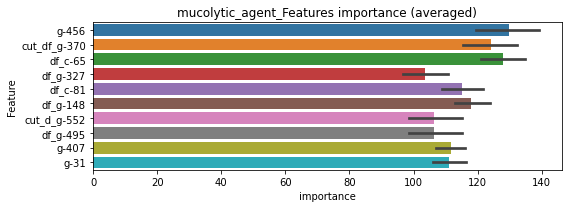

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000472467	valid_1's binary_logloss: 0.00782402


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000471795	valid_1's binary_logloss: 0.00619742


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000516676	valid_1's binary_logloss: 0.00709031


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000467108	valid_1's binary_logloss: 0.00394115
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000466964	valid_1's binary_logloss: 0.00393885


mucolytic_agent logloss: 0.006263752984779257
neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000514495	valid_1's binary_logloss: 0.0107466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000437088	valid_1's binary_logloss: 0.00359975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000452749	valid_1's binary_logloss: 0.00716617
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000445505	valid_1's binary_logloss: 0.00750395


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028542, Threshold: 0.0132299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0132299, conf_0:0.00926, conf_1:0.01720
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0432299
threshold: 0.0432299, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


y_Threshold: 0.0262727, Threshold: 0.0432299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0052737 Vs.target_rate: 0.00155
Num_p_label: 21.0, Expected: 6.2, Threshold: 0.0432299, conf_0:0.03458, conf_1:0.05188
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0732299
threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0732299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, Expected: 6.2, Threshold: 0.0732299, conf_0:0.06591, conf_1:0.08055
threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


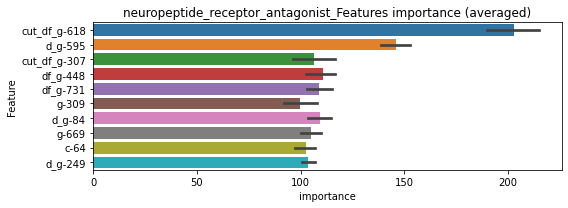

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000448635	valid_1's binary_logloss: 0.00914544


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000432493	valid_1's binary_logloss: 0.00270924


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000686478	valid_1's binary_logloss: 0.00642997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000511358	valid_1's binary_logloss: 0.00654896


neuropeptide_receptor_antagonist logloss: 0.006208404452654936


mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 6799
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 6799


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.135939	valid_1's binary_logloss: 0.350372
Early stopping, best iteration is:
[1260]	training's binary_logloss: 0.1114	valid_1's binary_logloss: 0.345703
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.134749	valid_1's binary_logloss: 0.360273
Early stopping, best iteration is:
[1269]	training's binary_logloss: 0.109793	valid_1's binary_logloss: 0.356232
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.136932	valid_1's binary_logloss: 0.347693
Early stopping, best iteration is:
[1278]	training's binary_logloss: 0.110893	valid_1's binary_logloss: 0.343448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.178243	valid_1's binary_logloss: 0.371788


1 / 3, AUC score:0.761, PR-AUC:0.616
y_Threshold: 0.1724102, Threshold: 0.3010074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1477 → Positive_corect_labels: 757/6681
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.3010074, conf_0:0.21071, conf_1:0.39131
threshold: 0.3010074, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 757.0/6681, y_label_rate: 0.1133064
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0676618	valid_1's binary_logloss: 0.188894
Early stopping, best iteration is:
[1362]	training's binary_logloss: 0.049966	valid_1's binary_logloss: 0.178741
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.068311	valid_1's binary_logloss: 0.170733
[2000]	training's binary_logloss: 0.0341989	valid_1's binary_logloss: 0.146525
Early stopping, best iteration is:
[2161]	training's binary_logloss: 0.0315021	valid_1's binary_logloss: 0.144362
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0687825	valid_1's binary_logloss: 0.182868
[2000]	training's binary_logloss: 0.0341214	valid_1's binary_logloss: 0.161861
Early stopping, best iteration is:
[2075]	training's binary_logloss: 0.032819	valid_1's binary_logloss: 0.16084
Training until validation scores don't improve for 30 rounds
[1000]	training's binar

2 / 3, AUC score:0.963, PR-AUC:0.892
y_Threshold: 0.1226123, Threshold: 0.3010074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 294 → Positive_corect_labels: 610.0/6387
p_label_rate: 0.0057760 Vs.target_rate: 0.03494
Num_p_label: 23.0, Expected: 139.1, Threshold: 0.3010074, conf_0:0.24081, conf_1:0.36121
threshold: 0.3010074, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 610.0/6387, y_label_rate: 0.0955065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0527669	valid_1's binary_logloss: 0.138475
[2000]	training's binary_logloss: 0.0256542	valid_1's binary_logloss: 0.116332
Early stopping, best iteration is:
[2254]	training's binary_logloss: 0.022613	valid_1's binary_logloss: 0.114085
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0523236	valid_1's binary_logloss: 0.136061
[2000]	training's binary_logloss: 0.0257515	valid_1's binary_logloss: 0.113211
Early stopping, best iteration is:
[2622]	training's binary_logloss: 0.0193446	valid_1's binary_logloss: 0.108226
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0536688	valid_1's binary_logloss: 0.130849
[2000]	training's binary_logloss: 0.0261598	valid_1's binary_logloss: 0.107853
Early stopping, best iteration is:
[2717]	training's binary_logloss: 0.0188425	valid_1's binary_logloss: 0.101232
Tr

3 / 3, AUC score:0.989, PR-AUC:0.955
y_Threshold: 0.1048716, Threshold: 0.3010074, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 544.0/6255
p_label_rate: 0.0055249 Vs.target_rate: 0.03494
Num_p_label: 22.0, Expected: 139.1, Threshold: 0.3010074, conf_0:0.27091, conf_1:0.33111
threshold: 0.3010074, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 544.0/6255, y_label_rate: 0.0869704


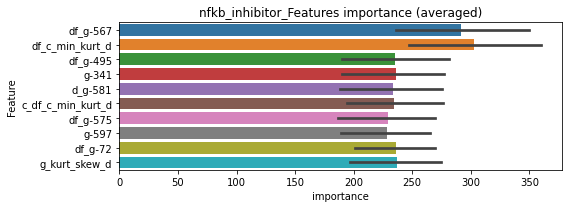

len(train_index) : 4691
len(valid_index) : 1564
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0646067	valid_1's binary_logloss: 0.138588
[2000]	training's binary_logloss: 0.0328436	valid_1's binary_logloss: 0.115836
Early stopping, best iteration is:
[2745]	training's binary_logloss: 0.0237075	valid_1's binary_logloss: 0.109299


len(train_index) : 4691
len(valid_index) : 1564
================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0656415	valid_1's binary_logloss: 0.132494
[2000]	training's binary_logloss: 0.0335211	valid_1's binary_logloss: 0.104896
[3000]	training's binary_logloss: 0.0220693	valid_1's binary_logloss: 0.0945605
[4000]	training's binary_logloss: 0.0163014	valid_1's binary_logloss: 0.0890899
Early stopping, best iteration is:
[4110]	training's binary_logloss: 0.0158442	valid_1's binary_logloss: 0.0886347


len(train_index) : 4691
len(valid_index) : 1564
================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0638958	valid_1's binary_logloss: 0.146093
[2000]	training's binary_logloss: 0.0325008	valid_1's binary_logloss: 0.122559
Early stopping, best iteration is:
[2873]	training's binary_logloss: 0.0223882	valid_1's binary_logloss: 0.114811


len(train_index) : 4692
len(valid_index) : 1563
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0664612	valid_1's binary_logloss: 0.131621
[2000]	training's binary_logloss: 0.0339612	valid_1's binary_logloss: 0.104373
[3000]	training's binary_logloss: 0.0223189	valid_1's binary_logloss: 0.0952772
Early stopping, best iteration is:
[3045]	training's binary_logloss: 0.0219644	valid_1's binary_logloss: 0.0949572


nfkb_inhibitor logloss: 0.1019264850563235
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000238678	valid_1's binary_logloss: 0.00175164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000236937	valid_1's binary_logloss: 0.00121174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000246325	valid_1's binary_logloss: 0.000460892
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009120, Threshold: 0.0051276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0051276, conf_0:0.00359, conf_1:0.00667
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0351276


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000239429	valid_1's binary_logloss: 0.000773861


threshold: 0.0351276, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0351276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, Expected: 2.0, Threshold: 0.0351276, conf_0:0.02810, conf_1:0.04215
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0651276
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0951276


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0951276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0951276, conf_0:0.08561, conf_1:0.10464


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


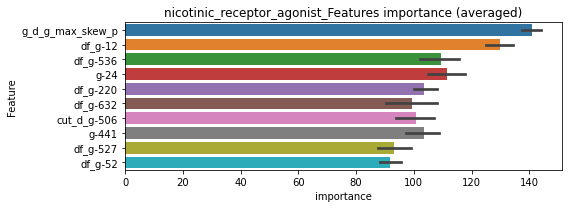

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000238732	valid_1's binary_logloss: 0.000530254


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000239745	valid_1's binary_logloss: 0.000784282


================================= fold 3/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000236901	valid_1's binary_logloss: 0.000379372


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000239059	valid_1's binary_logloss: 0.000466163


nicotinic_receptor_agonist logloss: 0.0005400170704230048
nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000377243	valid_1's binary_logloss: 0.00619259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361423	valid_1's binary_logloss: 0.00241037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000378031	valid_1's binary_logloss: 0.00141091
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027561, Threshold: 0.0365256, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000365105	valid_1's binary_logloss: 0.00183201


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0365256, conf_0:0.02557, conf_1:0.04748
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_1: 0.0665256
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_2: 0.0965256
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1265256
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_4: 0.1565256
threshold: 0.1565256, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


y_Threshold: 0.0411869, Threshold: 0.1565256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00109
Num_p_label: 45.0, Expected: 4.3, Threshold: 0.1565256, conf_0:0.12522, conf_1:0.18783
Num_p_label: 37.0, Expected: 4.3, Adj_threshold_1: 0.1865256
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.2165256
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_3: 0.2465256
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_4: 0.2765256
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_5: 0.3065256
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_6: 0.3365256
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_7: 0.3665256
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_8: 0.3965256
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.4265256
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


y_Threshold: 0.0411869, Threshold: 0.4265256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4265256, conf_0:0.38387, conf_1:0.46918
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


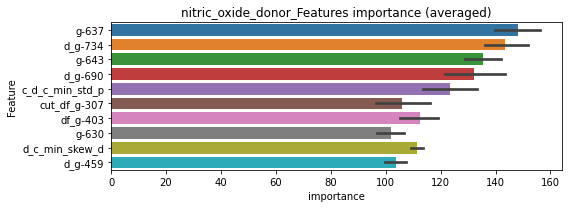

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000386821	valid_1's binary_logloss: 0.00442807


================================= fold 2/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00035711	valid_1's binary_logloss: 0.00149286


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000357309	valid_1's binary_logloss: 0.00121214


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00035553	valid_1's binary_logloss: 0.00173496


nitric_oxide_donor logloss: 0.0022170174454153634
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000375672	valid_1's binary_logloss: 0.00447262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000353039	valid_1's binary_logloss: 0.00524729
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000357332	valid_1's binary_logloss: 0.00109795
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000349832	valid_1's binary_logloss: 0.00223764


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023205, Threshold: 0.0075482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0075482, conf_0:0.00528, conf_1:0.00981
Num_p_label: 3.0, Expected: 4.8, Adj_threshold_1: 0.0375482
threshold: 0.0375482, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0375482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00122
Num_p_label: 14.0, Expected: 4.8, Threshold: 0.0375482, conf_0:0.03004, conf_1:0.04506
Num_p_label: 5.0, Expected: 4.8, Adj_threshold_1: 0.0675482
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0675482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00122
Num_p_label: 5.0, Expected: 4.8, Threshold: 0.0675482, conf_0:0.06079, conf_1:0.07430
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


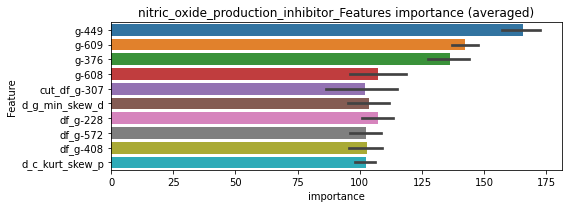

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000454966	valid_1's binary_logloss: 0.00578126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.00036625	valid_1's binary_logloss: 0.00407091


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000347937	valid_1's binary_logloss: 0.000928122


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000350573	valid_1's binary_logloss: 0.00264128


nitric_oxide_production_inhibitor logloss: 0.0033562180576652964
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000382956	valid_1's binary_logloss: 0.00400104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000389693	valid_1's binary_logloss: 0.00145589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000383193	valid_1's binary_logloss: 0.00100479
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000377714	valid_1's binary_logloss: 0.00287639


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027906, Threshold: 0.0240505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0240505, conf_0:0.01684, conf_1:0.03127
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_1: 0.0540505
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_2: 0.0840505
threshold: 0.0840505, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


y_Threshold: 0.0478986, Threshold: 0.0840505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0110497 Vs.target_rate: 0.00109
Num_p_label: 44.0, Expected: 4.3, Threshold: 0.0840505, conf_0:0.06724, conf_1:0.10086
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_1: 0.1140505
Num_p_label: 32.0, Expected: 4.3, Adj_threshold_2: 0.1440505
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_3: 0.1740505
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_4: 0.2040505
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.2340505
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.2640505
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_7: 0.2940505
threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


y_Threshold: 0.0478986, Threshold: 0.2940505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2940505, conf_0:0.26465, conf_1:0.32346
threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


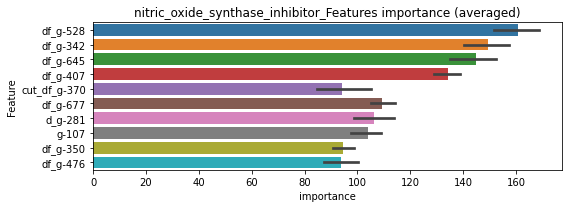

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000365245	valid_1's binary_logloss: 0.00383831


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000375888	valid_1's binary_logloss: 0.001245


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000377762	valid_1's binary_logloss: 0.000873342


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000378558	valid_1's binary_logloss: 0.00165473


nitric_oxide_synthase_inhibitor logloss: 0.0019031356332312045
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000183581	valid_1's binary_logloss: 0.00165967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000189225	valid_1's binary_logloss: 0.0027749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000183492	valid_1's binary_logloss: 0.000233643
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006083, Threshold: 0.0028739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0028739, conf_0:0.00201, conf_1:0.00374
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0328739
threshold: 0.0328739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000185383	valid_1's binary_logloss: 0.000247557


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.0328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0065294 Vs.target_rate: 0.00029
Num_p_label: 26.0, Expected: 1.2, Threshold: 0.0328739, conf_0:0.02630, conf_1:0.03945
Num_p_label: 14.0, Expected: 1.2, Adj_threshold_1: 0.0628739
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_2: 0.0928739
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_3: 0.1228739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_4: 0.1528739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.1828739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_6: 0.2128739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_7: 0.2428739
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_8: 0.2728739


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


Num_p_label: 3.0, Expected: 1.2, Adj_threshold_9: 0.3028739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3328739
threshold: 0.3328739, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.3328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3328739, conf_0:0.29959, conf_1:0.36616
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3628739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3928739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4228739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.4528739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.4828739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.5128739
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.5428739


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


threshold: 0.5428739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


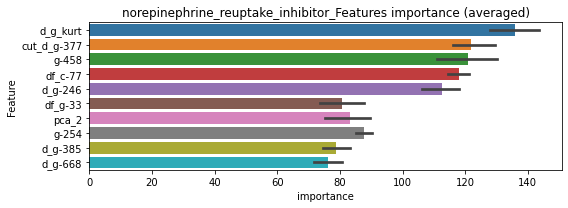

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000175389	valid_1's binary_logloss: 0.00112995


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000173705	valid_1's binary_logloss: 0.000907615
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000176274	valid_1's binary_logloss: 0.00019176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000175781	valid_1's binary_logloss: 0.000210898


norepinephrine_reuptake_inhibitor logloss: 0.0006102428983813548
nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000273712	valid_1's binary_logloss: 0.00280958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000268375	valid_1's binary_logloss: 0.00343378
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000271747	valid_1's binary_logloss: 0.00042958
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013650, Threshold: 0.0046269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0046269, conf_0:0.00324, conf_1:0.00602
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0346269


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000269443	valid_1's binary_logloss: 0.000814483


threshold: 0.0346269, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0346269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0346269, conf_0:0.02770, conf_1:0.04155
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0646269


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0646269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0646269, conf_0:0.05816, conf_1:0.07109


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


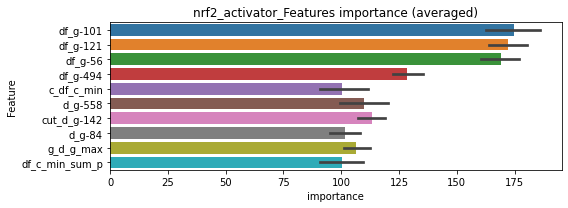

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000264543	valid_1's binary_logloss: 0.00195156


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000263253	valid_1's binary_logloss: 0.00322893


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000262513	valid_1's binary_logloss: 0.000350771
Early stopping, best iteration is:
[1028]	training's binary_logloss: 0.000261284	valid_1's binary_logloss: 0.0003492


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000260312	valid_1's binary_logloss: 0.000646148
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.00025874	valid_1's binary_logloss: 0.000644097


nrf2_activator logloss: 0.0015434483675017675
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000641862	valid_1's binary_logloss: 0.0241858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000708853	valid_1's binary_logloss: 0.0265121
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000572552	valid_1's binary_logloss: 0.0126501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000656129	valid_1's binary_logloss: 0.0245179


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0045783, Threshold: 0.0166179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0166179, conf_0:0.01163, conf_1:0.02160
Num_p_label: 9.0, Expected: 10.2, Adj_threshold_1: 0.0466179
threshold: 0.0466179, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000750975	valid_1's binary_logloss: 0.0344887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000631051	valid_1's binary_logloss: 0.0217084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000585883	valid_1's binary_logloss: 0.0159011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000645289	valid_1's binary_logloss: 0.021062


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303178, Threshold: 0.0466179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0148167 Vs.target_rate: 0.00256
Num_p_label: 59.0, Expected: 10.2, Threshold: 0.0466179, conf_0:0.03729, conf_1:0.05594
Num_p_label: 38.0, Expected: 10.2, Adj_threshold_1: 0.0766179
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.1066179
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_3: 0.1366179
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_4: 0.1666179
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_5: 0.1966179
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_6: 0.2266179
threshold: 0.2266179, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000915217	valid_1's binary_logloss: 0.0266504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000676286	valid_1's binary_logloss: 0.020661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000563221	valid_1's binary_logloss: 0.0101559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000587492	valid_1's binary_logloss: 0.0121729


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0439013, Threshold: 0.2266179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0042692 Vs.target_rate: 0.00256
Num_p_label: 17.0, Expected: 10.2, Threshold: 0.2266179, conf_0:0.20396, conf_1:0.24928
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_1: 0.2566179
threshold: 0.2566179, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


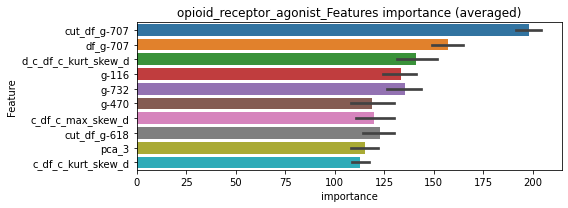

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000862327	valid_1's binary_logloss: 0.0309152
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00073285	valid_1's binary_logloss: 0.0233678


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.00102148	valid_1's binary_logloss: 0.0280779
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000730513	valid_1's binary_logloss: 0.0170678


opioid_receptor_agonist logloss: 0.02485716462783564
opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0376117	valid_1's binary_logloss: 0.105667
[2000]	training's binary_logloss: 0.0185346	valid_1's binary_logloss: 0.0954804
Early stopping, best iteration is:
[2099]	training's binary_logloss: 0.0176085	valid_1's binary_logloss: 0.0950542
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0387577	valid_1's binary_logloss: 0.0959165
[2000]	training's binary_logloss: 0.0191781	valid_1's binary_logloss: 0.0861402
Early stopping, best iteration is:
[2101]	training's binary_logloss: 0.0181978	valid_1's binary_logloss: 0.0855124
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.039353	valid_1's binary_logloss: 0.0798214
[2000]	training's binary_logloss: 0.0194193	valid_1's binary_logloss: 0.0690831
Early stopping, best iteration is:
[2611]	training's binary_logloss: 0.0146836	valid_1's binary_logloss: 0.06

1 / 3, AUC score:0.989, PR-AUC:0.975
y_Threshold: 0.0405350, Threshold: 0.1050601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 186 → Positive_corect_labels: 628/3747
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.1050601, conf_0:0.07354, conf_1:0.13658
Num_p_label: 19.0, Expected: 16.1, Adj_threshold_1: 0.1350601
threshold: 0.1350601, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 628.0/3747, y_label_rate: 0.1676007
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030844	valid_1's binary_logloss: 0.0749941
[2000]	training's binary_logloss: 0.0153356	valid_1's binary_logloss: 0.0657276
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.0129314	valid_1's binary_logloss: 0.0643084
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304644	valid_1's binary_logloss: 0.076922
[2000]	training's binary_logloss: 0.0151724	valid_1's binary_logloss: 0.0681053
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0143872	valid_1's binary_logloss: 0.0676522
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322303	valid_1's binary_logloss: 0.0585033
[2000]	training's binary_logloss: 0.0160612	valid_1's binary_logloss: 0.0471743
[3000]	training's binary_logloss: 0.010562	valid_1's binary_logloss: 0.0433692
Early stopping, best iteration

2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0616664, Threshold: 0.1350601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 604.0/3699
p_label_rate: 0.0241085 Vs.target_rate: 0.00403
Num_p_label: 96.0, Expected: 16.1, Threshold: 0.1350601, conf_0:0.10805, conf_1:0.16207
Num_p_label: 90.0, Expected: 16.1, Adj_threshold_1: 0.1650601
Num_p_label: 81.0, Expected: 16.1, Adj_threshold_2: 0.1950601
Num_p_label: 74.0, Expected: 16.1, Adj_threshold_3: 0.2250601
Num_p_label: 64.0, Expected: 16.1, Adj_threshold_4: 0.2550601
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_5: 0.2850601
Num_p_label: 40.0, Expected: 16.1, Adj_threshold_6: 0.3150601
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_7: 0.3450601
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_8: 0.3750601
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_9: 0.4050601
threshold: 0.4050601, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 604.0/3699, y_label_rate: 0.1632874
==========

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0243675	valid_1's binary_logloss: 0.0591982
[2000]	training's binary_logloss: 0.0122219	valid_1's binary_logloss: 0.0515411
[3000]	training's binary_logloss: 0.00807493	valid_1's binary_logloss: 0.0490873
Early stopping, best iteration is:
[3231]	training's binary_logloss: 0.00749434	valid_1's binary_logloss: 0.0487891
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255551	valid_1's binary_logloss: 0.0512155
[2000]	training's binary_logloss: 0.0129047	valid_1's binary_logloss: 0.0408486
[3000]	training's binary_logloss: 0.00853335	valid_1's binary_logloss: 0.0371706
Early stopping, best iteration is:
[3803]	training's binary_logloss: 0.0067259	valid_1's binary_logloss: 0.0357662
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0261648	valid_1's binary_logloss: 0.0466149
[2000]	training's binary

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0568115, Threshold: 0.4050601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 587.0/3665
p_label_rate: 0.0145655 Vs.target_rate: 0.00403
Num_p_label: 58.0, Expected: 16.1, Threshold: 0.4050601, conf_0:0.36455, conf_1:0.44557
Num_p_label: 49.0, Expected: 16.1, Adj_threshold_1: 0.4350601
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_2: 0.4650601
Num_p_label: 36.0, Expected: 16.1, Adj_threshold_3: 0.4950601
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_4: 0.5250601
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_5: 0.5550601
Num_p_label: 16.0, Expected: 16.1, Adj_threshold_6: 0.5850601
threshold: 0.5850601, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 587.0/3665, y_label_rate: 0.1601637


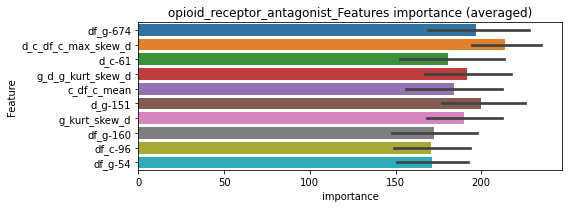

len(train_index) : 2748
len(valid_index) : 917
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0301939	valid_1's binary_logloss: 0.0464015
[2000]	training's binary_logloss: 0.0156273	valid_1's binary_logloss: 0.0327653
[3000]	training's binary_logloss: 0.0105022	valid_1's binary_logloss: 0.0280941
[4000]	training's binary_logloss: 0.00791368	valid_1's binary_logloss: 0.0258451
[5000]	training's binary_logloss: 0.00635177	valid_1's binary_logloss: 0.0245211
[6000]	training's binary_logloss: 0.00531432	valid_1's binary_logloss: 0.0236281
Early stopping, best iteration is:
[6856]	training's binary_logloss: 0.00466457	valid_1's binary_logloss: 0.0230599


len(train_index) : 2749
len(valid_index) : 916
================================= fold 2/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0289364	valid_1's binary_logloss: 0.0541329
[2000]	training's binary_logloss: 0.0149335	valid_1's binary_logloss: 0.0419245
[3000]	training's binary_logloss: 0.0100364	valid_1's binary_logloss: 0.0379329
[4000]	training's binary_logloss: 0.00757532	valid_1's binary_logloss: 0.0360139
Early stopping, best iteration is:
[4254]	training's binary_logloss: 0.00713674	valid_1's binary_logloss: 0.0356759


len(train_index) : 2749
len(valid_index) : 916
================================= fold 3/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0307374	valid_1's binary_logloss: 0.0415638
[2000]	training's binary_logloss: 0.0159026	valid_1's binary_logloss: 0.0280169
[3000]	training's binary_logloss: 0.0106793	valid_1's binary_logloss: 0.0234884
[4000]	training's binary_logloss: 0.00801267	valid_1's binary_logloss: 0.0212899
[5000]	training's binary_logloss: 0.00644657	valid_1's binary_logloss: 0.0200335
[6000]	training's binary_logloss: 0.00539118	valid_1's binary_logloss: 0.01919
[7000]	training's binary_logloss: 0.00464126	valid_1's binary_logloss: 0.0186918
[8000]	training's binary_logloss: 0.0040792	valid_1's binary_logloss: 0.0182404
Early stopping, best iteration is:
[8484]	training's binary_logloss: 0.00385419	valid_1's binary_logloss: 0.01809


len(train_index) : 2749
len(valid_index) : 916
================================= fold 4/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298962	valid_1's binary_logloss: 0.0500798
[2000]	training's binary_logloss: 0.0155767	valid_1's binary_logloss: 0.0372617
[3000]	training's binary_logloss: 0.0105259	valid_1's binary_logloss: 0.0328633
[4000]	training's binary_logloss: 0.00792048	valid_1's binary_logloss: 0.0307194
[5000]	training's binary_logloss: 0.0063687	valid_1's binary_logloss: 0.029609
Early stopping, best iteration is:
[4993]	training's binary_logloss: 0.0063771	valid_1's binary_logloss: 0.0296042


opioid_receptor_antagonist logloss: 0.026606548405051597
orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000408515	valid_1's binary_logloss: 0.00948051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000441188	valid_1's binary_logloss: 0.0078803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000433062	valid_1's binary_logloss: 0.00288825
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000419533	valid_1's binary_logloss: 0.00227722


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027897, Threshold: 0.0066891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0066891, conf_0:0.00468, conf_1:0.00870
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0366891
threshold: 0.0366891, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0366891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0366891, conf_0:0.02935, conf_1:0.04403
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_1: 0.0666891
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0666891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0666891, conf_0:0.06002, conf_1:0.07336
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


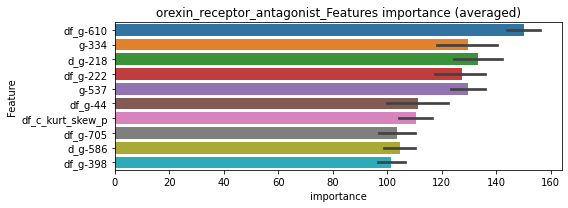

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000412459	valid_1's binary_logloss: 0.00922194


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000460688	valid_1's binary_logloss: 0.00932318


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000411706	valid_1's binary_logloss: 0.00191076
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000412087	valid_1's binary_logloss: 0.00191051


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000418161	valid_1's binary_logloss: 0.00222634


orexin_receptor_antagonist logloss: 0.00567151561983485
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000661168	valid_1's binary_logloss: 0.0172723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000660016	valid_1's binary_logloss: 0.0173125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000757567	valid_1's binary_logloss: 0.0125423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000558277	valid_1's binary_logloss: 0.018688


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0062367, Threshold: 0.0339920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0339920, conf_0:0.02379, conf_1:0.04419
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_1: 0.0639920
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_2: 0.0939920
threshold: 0.0939920, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000545868	valid_1's binary_logloss: 0.0130716
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000592322	valid_1's binary_logloss: 0.0127144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000557617	valid_1's binary_logloss: 0.0121288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000588611	valid_1's binary_logloss: 0.0125816


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297218, Threshold: 0.0939920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0052737 Vs.target_rate: 0.00260
Num_p_label: 21.0, Expected: 10.4, Threshold: 0.0939920, conf_0:0.07519, conf_1:0.11279
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1239920
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_2: 0.1539920
threshold: 0.1539920, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000538424	valid_1's binary_logloss: 0.0105619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000562716	valid_1's binary_logloss: 0.010794
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000544013	valid_1's binary_logloss: 0.010336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000514079	valid_1's binary_logloss: 0.0188376


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268616, Threshold: 0.1539920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, Expected: 10.4, Threshold: 0.1539920, conf_0:0.13859, conf_1:0.16939
threshold: 0.1539920, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


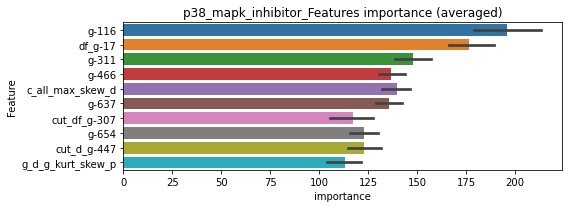

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000562907	valid_1's binary_logloss: 0.0125553


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000554614	valid_1's binary_logloss: 0.00869059


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000552854	valid_1's binary_logloss: 0.00892016


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p38_mapk_inhibitor logloss: 0.013393753904444979


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.0010987	valid_1's binary_logloss: 0.0234099


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000324215	valid_1's binary_logloss: 0.00118327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000329664	valid_1's binary_logloss: 0.00702921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00033583	valid_1's binary_logloss: 0.000762062
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000329045	valid_1's binary_logloss: 0.00102209


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019519, Threshold: 0.0123772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0123772, conf_0:0.00866, conf_1:0.01609
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0423772
threshold: 0.0423772, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.0423772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.0423772, conf_0:0.03390, conf_1:0.05085
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0723772
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.1023772
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


y_Threshold: 0.0092413, Threshold: 0.1023772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.1023772, conf_0:0.09214, conf_1:0.11261
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


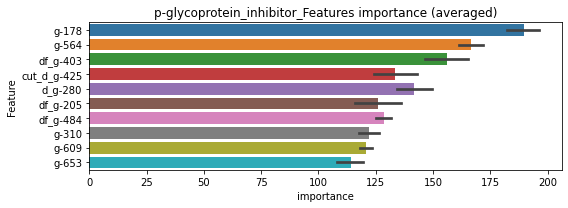

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317229	valid_1's binary_logloss: 0.000876293
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.00031723	valid_1's binary_logloss: 0.000876292


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000323705	valid_1's binary_logloss: 0.00420855


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315198	valid_1's binary_logloss: 0.000781709
Early stopping, best iteration is:
[1051]	training's binary_logloss: 0.000312716	valid_1's binary_logloss: 0.000776804


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000314982	valid_1's binary_logloss: 0.00122335
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000314562	valid_1's binary_logloss: 0.00122157


p-glycoprotein_inhibitor logloss: 0.0017711761987129846
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000715869	valid_1's binary_logloss: 0.0350298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000577873	valid_1's binary_logloss: 0.011486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00078412	valid_1's binary_logloss: 0.0106256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000576922	valid_1's binary_logloss: 0.0116081


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054800, Threshold: 0.0164058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0164058, conf_0:0.01148, conf_1:0.02133
Num_p_label: 8.0, Expected: 10.2, Adj_threshold_1: 0.0464058
threshold: 0.0464058, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000585599	valid_1's binary_logloss: 0.0108777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000536579	valid_1's binary_logloss: 0.0132389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000586444	valid_1's binary_logloss: 0.00652355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000563155	valid_1's binary_logloss: 0.0156146


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0523554, Threshold: 0.0464058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0105475 Vs.target_rate: 0.00256
Num_p_label: 42.0, Expected: 10.2, Threshold: 0.0464058, conf_0:0.03712, conf_1:0.05569
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_1: 0.0764058
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_2: 0.1064058
threshold: 0.1064058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00053446	valid_1's binary_logloss: 0.0185102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000678772	valid_1's binary_logloss: 0.0210196
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000541237	valid_1's binary_logloss: 0.00700009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000540321	valid_1's binary_logloss: 0.013672


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0334663, Threshold: 0.1064058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0040181 Vs.target_rate: 0.00256
Num_p_label: 16.0, Expected: 10.2, Threshold: 0.1064058, conf_0:0.09577, conf_1:0.11705
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_1: 0.1364058
threshold: 0.1364058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


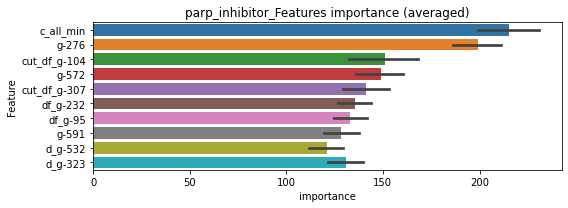

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000648383	valid_1's binary_logloss: 0.0111786


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000585885	valid_1's binary_logloss: 0.0137581


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000579447	valid_1's binary_logloss: 0.00622018


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000687076	valid_1's binary_logloss: 0.0163359


parp_inhibitor logloss: 0.011872014672635873


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7157
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7157


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0486832	valid_1's binary_logloss: 0.130446
Early stopping, best iteration is:
[1626]	training's binary_logloss: 0.0293801	valid_1's binary_logloss: 0.124238
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0484308	valid_1's binary_logloss: 0.129472
Early stopping, best iteration is:
[1301]	training's binary_logloss: 0.0371714	valid_1's binary_logloss: 0.125735
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.047917	valid_1's binary_logloss: 0.136795
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0307199	valid_1's binary_logloss: 0.13172
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0491224	valid_1's binary_logloss: 0.12684
Early stopping, best iteration is:
[1801]	training's binary_logloss: 0.0265406	valid_1's binary_loglo

1 / 3, AUC score:0.969, PR-AUC:0.941
y_Threshold: 0.0603108, Threshold: 0.0934130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 553 → Positive_corect_labels: 1298/8035
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.0934130, conf_0:0.06539, conf_1:0.12144
threshold: 0.0934130, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1298.0/8035, y_label_rate: 0.1615432
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332197	valid_1's binary_logloss: 0.089423
Early stopping, best iteration is:
[1920]	training's binary_logloss: 0.0168311	valid_1's binary_logloss: 0.0808456
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0329625	valid_1's binary_logloss: 0.0901532
Early stopping, best iteration is:
[1458]	training's binary_logloss: 0.0224268	valid_1's binary_logloss: 0.084733
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.034543	valid_1's binary_logloss: 0.0705632
[2000]	training's binary_logloss: 0.0167585	valid_1's binary_logloss: 0.0595983
Early stopping, best iteration is:
[2298]	training's binary_logloss: 0.0144415	valid_1's binary_logloss: 0.05815
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332117	valid_1's binary_logloss: 0.0818607
[2000]	training'

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0605116, Threshold: 0.0934130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 1226.0/7891
p_label_rate: 0.0057760 Vs.target_rate: 0.01247
Num_p_label: 23.0, Expected: 49.7, Threshold: 0.0934130, conf_0:0.07473, conf_1:0.11210
threshold: 0.0934130, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 1226.0/7891, y_label_rate: 0.1553669
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0247422	valid_1's binary_logloss: 0.0607082
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0128308	valid_1's binary_logloss: 0.0534877
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249894	valid_1's binary_logloss: 0.0574195
[2000]	training's binary_logloss: 0.0123377	valid_1's binary_logloss: 0.0491122
Early stopping, best iteration is:
[2544]	training's binary_logloss: 0.009563	valid_1's binary_logloss: 0.0472839
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0249451	valid_1's binary_logloss: 0.0547827
[2000]	training's binary_logloss: 0.0123644	valid_1's binary_logloss: 0.046129
[3000]	training's binary_logloss: 0.00806465	valid_1's binary_logloss: 0.0429921
Early stopping, best iteration is:
[3159]	training's binary_logloss: 0.00764095	valid_1's binary_logloss: 0.

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0484481, Threshold: 0.0934130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1196.0/7831
p_label_rate: 0.0080362 Vs.target_rate: 0.01247
Num_p_label: 32.0, Expected: 49.7, Threshold: 0.0934130, conf_0:0.08407, conf_1:0.10275
threshold: 0.0934130, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1196.0/7831, y_label_rate: 0.1527263


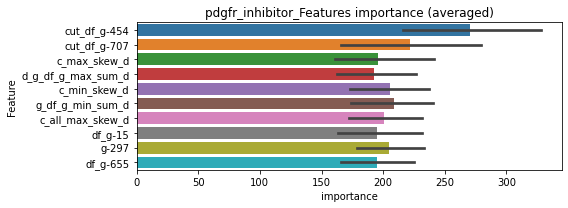

len(train_index) : 5873
len(valid_index) : 1958
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299139	valid_1's binary_logloss: 0.0487805
[2000]	training's binary_logloss: 0.0154236	valid_1's binary_logloss: 0.0376871
[3000]	training's binary_logloss: 0.0102332	valid_1's binary_logloss: 0.0341442
[4000]	training's binary_logloss: 0.0076126	valid_1's binary_logloss: 0.0322953
Early stopping, best iteration is:
[4331]	training's binary_logloss: 0.00701612	valid_1's binary_logloss: 0.0319113


len(train_index) : 5873
len(valid_index) : 1958
================================= fold 2/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298186	valid_1's binary_logloss: 0.0496383
[2000]	training's binary_logloss: 0.015418	valid_1's binary_logloss: 0.0383446
[3000]	training's binary_logloss: 0.0102718	valid_1's binary_logloss: 0.0342504
[4000]	training's binary_logloss: 0.00763064	valid_1's binary_logloss: 0.0321496
Early stopping, best iteration is:
[4804]	training's binary_logloss: 0.00632482	valid_1's binary_logloss: 0.0312182


len(train_index) : 5873
len(valid_index) : 1958
================================= fold 3/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.02983	valid_1's binary_logloss: 0.0515665
[2000]	training's binary_logloss: 0.0154481	valid_1's binary_logloss: 0.0404644
[3000]	training's binary_logloss: 0.0102893	valid_1's binary_logloss: 0.0365237
[4000]	training's binary_logloss: 0.00763263	valid_1's binary_logloss: 0.0346452
Early stopping, best iteration is:
[4046]	training's binary_logloss: 0.00754018	valid_1's binary_logloss: 0.0345536


len(train_index) : 5874
len(valid_index) : 1957
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0294991	valid_1's binary_logloss: 0.0530355
[2000]	training's binary_logloss: 0.0153344	valid_1's binary_logloss: 0.0409608
[3000]	training's binary_logloss: 0.010185	valid_1's binary_logloss: 0.036926
[4000]	training's binary_logloss: 0.00755979	valid_1's binary_logloss: 0.0348551
Early stopping, best iteration is:
[4563]	training's binary_logloss: 0.00660694	valid_1's binary_logloss: 0.0340732


pdgfr_inhibitor logloss: 0.032938923797839706
pdgfr_inhibitor is unpredictable(><)!
pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000303859	valid_1's binary_logloss: 0.000878954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000376626	valid_1's binary_logloss: 0.00416869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.00250519
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017407, Threshold: 0.0088878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0088878, conf_0:0.00622, conf_1:0.01155
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0388878


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000306272	valid_1's binary_logloss: 0.00117478


threshold: 0.0388878, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.0388878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00076
Num_p_label: 28.0, Expected: 3.0, Threshold: 0.0388878, conf_0:0.03111, conf_1:0.04667
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0688878


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0988878
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1288878
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1588878
threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.1588878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1588878, conf_0:0.14300, conf_1:0.17478


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


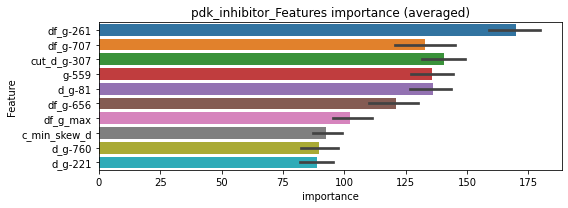

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000296469	valid_1's binary_logloss: 0.000619433


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[710]	training's binary_logloss: 0.00030566	valid_1's binary_logloss: 0.0035206


================================= fold 3/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000312411	valid_1's binary_logloss: 0.00214109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00029581	valid_1's binary_logloss: 0.000770914


pdk_inhibitor logloss: 0.001762708310924686


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 6907
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 6907


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0446977	valid_1's binary_logloss: 0.123826
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0331287	valid_1's binary_logloss: 0.121663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.0452566	valid_1's binary_logloss: 0.135685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.045889	valid_1's binary_logloss: 0.127639
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0452222	valid_1's binary_logloss: 0.119316
Early stopping, best iteration is:
[1714]	training's binary_logloss: 0.025532	valid_1's binary_logloss: 0.114889


1 / 3, AUC score:0.962, PR-AUC:0.925
y_Threshold: 0.0579442, Threshold: 0.0871387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 615 → Positive_corect_labels: 1212/7673
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0871387, conf_0:0.06100, conf_1:0.11328
threshold: 0.0871387, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1212.0/7673, y_label_rate: 0.1579565
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0238815	valid_1's binary_logloss: 0.0551216
Early stopping, best iteration is:
[1714]	training's binary_logloss: 0.0135684	valid_1's binary_logloss: 0.0508712
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0229164	valid_1's binary_logloss: 0.0643091
Early stopping, best iteration is:
[1400]	training's binary_logloss: 0.0162483	valid_1's binary_logloss: 0.0620564
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0242092	valid_1's binary_logloss: 0.051268
[2000]	training's binary_logloss: 0.011592	valid_1's binary_logloss: 0.0450503
Early stopping, best iteration is:
[2810]	training's binary_logloss: 0.00804629	valid_1's binary_logloss: 0.0433402
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0229341	valid_1's binary_logloss: 0.0619314
Early stoppi

2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0416790, Threshold: 0.0871387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1155.0/7559
p_label_rate: 0.0017579 Vs.target_rate: 0.01109
Num_p_label: 7.0, Expected: 44.1, Threshold: 0.0871387, conf_0:0.06971, conf_1:0.10457
threshold: 0.0871387, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 1155.0/7559, y_label_rate: 0.1527980
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0156541	valid_1's binary_logloss: 0.0280675
[2000]	training's binary_logloss: 0.00778936	valid_1's binary_logloss: 0.0232855
Early stopping, best iteration is:
[2293]	training's binary_logloss: 0.00676049	valid_1's binary_logloss: 0.0227465
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0149965	valid_1's binary_logloss: 0.0363542
[2000]	training's binary_logloss: 0.00749322	valid_1's binary_logloss: 0.0316786
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.00711688	valid_1's binary_logloss: 0.031446
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0163127	valid_1's binary_logloss: 0.022222
[2000]	training's binary_logloss: 0.00808632	valid_1's binary_logloss: 0.0165943
[3000]	training's binary_logloss: 0.00528943	valid_1's binary_logloss: 0.0144533
[4000]	training's binar

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0315259, Threshold: 0.0871387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 1136.0/7521
p_label_rate: 0.0007534 Vs.target_rate: 0.01109
Num_p_label: 3.0, Expected: 44.1, Threshold: 0.0871387, conf_0:0.07842, conf_1:0.09585
threshold: 0.0871387, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 1136.0/7521, y_label_rate: 0.1510437


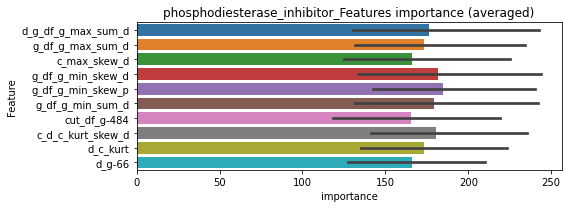

len(train_index) : 5640
len(valid_index) : 1881
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0178716	valid_1's binary_logloss: 0.0240981
[2000]	training's binary_logloss: 0.00923447	valid_1's binary_logloss: 0.0166371
[3000]	training's binary_logloss: 0.00618957	valid_1's binary_logloss: 0.0142861
[4000]	training's binary_logloss: 0.00464487	valid_1's binary_logloss: 0.0131886
[5000]	training's binary_logloss: 0.00371719	valid_1's binary_logloss: 0.0125353
[6000]	training's binary_logloss: 0.00309882	valid_1's binary_logloss: 0.0120876
Early stopping, best iteration is:
[6860]	training's binary_logloss: 0.00271269	valid_1's binary_logloss: 0.0118205


len(train_index) : 5641
len(valid_index) : 1880
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0174432	valid_1's binary_logloss: 0.0249802
[2000]	training's binary_logloss: 0.00897316	valid_1's binary_logloss: 0.0170216
[3000]	training's binary_logloss: 0.0060172	valid_1's binary_logloss: 0.0143498
[4000]	training's binary_logloss: 0.00452306	valid_1's binary_logloss: 0.0130651
[5000]	training's binary_logloss: 0.00362527	valid_1's binary_logloss: 0.0123543
[6000]	training's binary_logloss: 0.00302217	valid_1's binary_logloss: 0.0118441
[7000]	training's binary_logloss: 0.00260032	valid_1's binary_logloss: 0.0115367
Early stopping, best iteration is:
[7227]	training's binary_logloss: 0.00252009	valid_1's binary_logloss: 0.0114676


len(train_index) : 5641
len(valid_index) : 1880
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0171897	valid_1's binary_logloss: 0.0287023
[2000]	training's binary_logloss: 0.00890513	valid_1's binary_logloss: 0.0207422
[3000]	training's binary_logloss: 0.00598848	valid_1's binary_logloss: 0.0182658
[4000]	training's binary_logloss: 0.00449979	valid_1's binary_logloss: 0.0170724
Early stopping, best iteration is:
[4491]	training's binary_logloss: 0.00400734	valid_1's binary_logloss: 0.0167098


len(train_index) : 5641
len(valid_index) : 1880
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0176441	valid_1's binary_logloss: 0.025629
[2000]	training's binary_logloss: 0.00923623	valid_1's binary_logloss: 0.0176111
[3000]	training's binary_logloss: 0.00623617	valid_1's binary_logloss: 0.0148779
[4000]	training's binary_logloss: 0.00468268	valid_1's binary_logloss: 0.0134975
[5000]	training's binary_logloss: 0.0037535	valid_1's binary_logloss: 0.0126545
[6000]	training's binary_logloss: 0.00313132	valid_1's binary_logloss: 0.0121094
Early stopping, best iteration is:
[6864]	training's binary_logloss: 0.00274091	valid_1's binary_logloss: 0.0117617


phosphodiesterase_inhibitor logloss: 0.012939757533144863
phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000341788	valid_1's binary_logloss: 0.00455987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000344932	valid_1's binary_logloss: 0.00613354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00036199	valid_1's binary_logloss: 0.00194627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000349001	valid_1's binary_logloss: 0.00262725


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020529, Threshold: 0.0072677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0072677, conf_0:0.00509, conf_1:0.00945
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_1: 0.0372677
threshold: 0.0372677, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0372677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0372677, conf_0:0.02981, conf_1:0.04472
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0672677
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0672677, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0672677, conf_0:0.06054, conf_1:0.07399
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


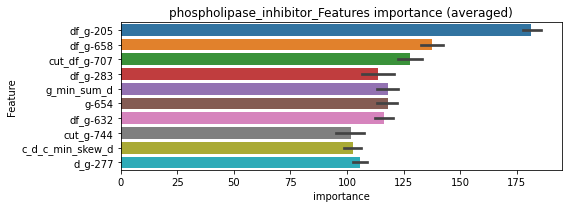

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000347908	valid_1's binary_logloss: 0.00275648


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000363413	valid_1's binary_logloss: 0.00455734


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000348799	valid_1's binary_logloss: 0.00159494


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000336658	valid_1's binary_logloss: 0.00218571


phospholipase_inhibitor logloss: 0.0027744707856874077


mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 3714
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 3714


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0488021	valid_1's binary_logloss: 0.132657
Early stopping, best iteration is:
[1454]	training's binary_logloss: 0.0333977	valid_1's binary_logloss: 0.127555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.0492503	valid_1's binary_logloss: 0.151012
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0492873	valid_1's binary_logloss: 0.123318
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.0251933	valid_1's binary_logloss: 0.112798
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0492258	valid_1's binary_logloss: 0.116802
Early stopping, best iteration is:
[1851]	training's binary_logloss: 0.0261741	valid_1's binary_logloss: 0.10837


1 / 3, AUC score:0.972, PR-AUC:0.945
y_Threshold: 0.0607866, Threshold: 0.0957983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 280 → Positive_corect_labels: 677/4176
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.0957983, conf_0:0.06706, conf_1:0.12454
Num_p_label: 15.0, Expected: 25.2, Adj_threshold_1: 0.1257983
threshold: 0.1257983, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 677.0/4176, y_label_rate: 0.1621169
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0346747	valid_1's binary_logloss: 0.0933807
Early stopping, best iteration is:
[1738]	training's binary_logloss: 0.0198849	valid_1's binary_logloss: 0.0867296
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0358538	valid_1's binary_logloss: 0.081295
[2000]	training's binary_logloss: 0.0176745	valid_1's binary_logloss: 0.0711978
Early stopping, best iteration is:
[2310]	training's binary_logloss: 0.0152009	valid_1's binary_logloss: 0.0699842
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0361829	valid_1's binary_logloss: 0.0712341
[2000]	training's binary_logloss: 0.0178566	valid_1's binary_logloss: 0.0590318
[3000]	training's binary_logloss: 0.0116541	valid_1's binary_logloss: 0.0548285
Early stopping, best iteration is:
[3008]	training's binary_logloss: 0.0116212	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0587778, Threshold: 0.1257983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 645.0/4112
p_label_rate: 0.0020090 Vs.target_rate: 0.00634
Num_p_label: 8.0, Expected: 25.2, Threshold: 0.1257983, conf_0:0.10064, conf_1:0.15096
threshold: 0.1257983, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 645.0/4112, y_label_rate: 0.1568580
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0279487	valid_1's binary_logloss: 0.0697121
[2000]	training's binary_logloss: 0.0138659	valid_1's binary_logloss: 0.0601807
Early stopping, best iteration is:
[2106]	training's binary_logloss: 0.0131519	valid_1's binary_logloss: 0.0596861
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0277642	valid_1's binary_logloss: 0.066385
Early stopping, best iteration is:
[1907]	training's binary_logloss: 0.0145505	valid_1's binary_logloss: 0.0589112
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.029576	valid_1's binary_logloss: 0.0500997
[2000]	training's binary_logloss: 0.0147862	valid_1's binary_logloss: 0.0390658
[3000]	training's binary_logloss: 0.00972804	valid_1's binary_logloss: 0.0350306
Early stopping, best iteration is:
[3614]	training's binary_logloss: 0.00804574	valid_1's binary_logloss: 0.

3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0474738, Threshold: 0.1257983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 626.0/4074
p_label_rate: 0.0007534 Vs.target_rate: 0.00634
Num_p_label: 3.0, Expected: 25.2, Threshold: 0.1257983, conf_0:0.11322, conf_1:0.13838
threshold: 0.1257983, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 626.0/4074, y_label_rate: 0.1536573


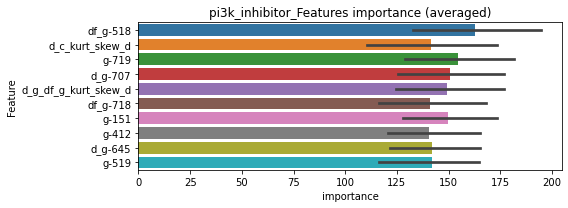

len(train_index) : 3055
len(valid_index) : 1019
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339546	valid_1's binary_logloss: 0.0635046
[2000]	training's binary_logloss: 0.0175569	valid_1's binary_logloss: 0.0502614
[3000]	training's binary_logloss: 0.0116873	valid_1's binary_logloss: 0.0460556
Early stopping, best iteration is:
[3325]	training's binary_logloss: 0.0105535	valid_1's binary_logloss: 0.0452732


len(train_index) : 3055
len(valid_index) : 1019
================================= fold 2/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0342474	valid_1's binary_logloss: 0.0630109
[2000]	training's binary_logloss: 0.0176605	valid_1's binary_logloss: 0.0496913
[3000]	training's binary_logloss: 0.0117723	valid_1's binary_logloss: 0.0453954
Early stopping, best iteration is:
[3711]	training's binary_logloss: 0.00951374	valid_1's binary_logloss: 0.0439232


len(train_index) : 3056
len(valid_index) : 1018
================================= fold 3/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0355938	valid_1's binary_logloss: 0.0502946
[2000]	training's binary_logloss: 0.0185727	valid_1's binary_logloss: 0.0361744
[3000]	training's binary_logloss: 0.012392	valid_1's binary_logloss: 0.0309174
[4000]	training's binary_logloss: 0.00927321	valid_1's binary_logloss: 0.0283222
[5000]	training's binary_logloss: 0.0074298	valid_1's binary_logloss: 0.0267809
[6000]	training's binary_logloss: 0.00618314	valid_1's binary_logloss: 0.025663
Early stopping, best iteration is:
[6797]	training's binary_logloss: 0.0054603	valid_1's binary_logloss: 0.0250492


len(train_index) : 3056
len(valid_index) : 1018
================================= fold 4/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0352877	valid_1's binary_logloss: 0.0560261
[2000]	training's binary_logloss: 0.0183437	valid_1's binary_logloss: 0.0421288
[3000]	training's binary_logloss: 0.0122097	valid_1's binary_logloss: 0.0372151
[4000]	training's binary_logloss: 0.00913981	valid_1's binary_logloss: 0.0347066
Early stopping, best iteration is:
[4248]	training's binary_logloss: 0.0085879	valid_1's binary_logloss: 0.0341406


pi3k_inhibitor logloss: 0.03710021608002007
pi3k_inhibitor is unpredictable(><)!
pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000416481	valid_1's binary_logloss: 0.00431885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000423025	valid_1's binary_logloss: 0.0048987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000416862	valid_1's binary_logloss: 0.00126668
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000406063	valid_1's binary_logloss: 0.00688213


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023141, Threshold: 0.0076017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0076017, conf_0:0.00532, conf_1:0.00988
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0376017
threshold: 0.0376017, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03008, conf_1:0.04512
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03384, conf_1:0.04136
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


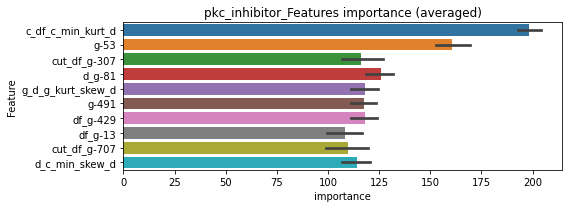

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000403586	valid_1's binary_logloss: 0.00419615


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000409293	valid_1's binary_logloss: 0.00447885


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000406051	valid_1's binary_logloss: 0.00101906


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000417528	valid_1's binary_logloss: 0.00457034


pkc_inhibitor logloss: 0.0035660991326001653
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000591296	valid_1's binary_logloss: 0.0230529
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00056468	valid_1's binary_logloss: 0.00995056
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000684819	valid_1's binary_logloss: 0.0141656
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00113494	valid_1's binary_logloss: 0.0289167


y_Threshold: 0.0052834, Threshold: 0.0231491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0231491, conf_0:0.01620, conf_1:0.03009
Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0531491
threshold: 0.0531491, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000596199	valid_1's binary_logloss: 0.0179022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000519621	valid_1's binary_logloss: 0.0146445
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000531024	valid_1's binary_logloss: 0.0150026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000879823	valid_1's binary_logloss: 0.0138202


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0408890, Threshold: 0.0531491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0135610 Vs.target_rate: 0.00231
Num_p_label: 54.0, Expected: 9.2, Threshold: 0.0531491, conf_0:0.04252, conf_1:0.06378
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0831491
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_2: 0.1131491
Num_p_label: 31.0, Expected: 9.2, Adj_threshold_3: 0.1431491
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_4: 0.1731491
Num_p_label: 23.0, Expected: 9.2, Adj_threshold_5: 0.2031491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_6: 0.2331491
threshold: 0.2331491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000646138	valid_1's binary_logloss: 0.0126771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00055593	valid_1's binary_logloss: 0.0176898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000614339	valid_1's binary_logloss: 0.0136931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000801197	valid_1's binary_logloss: 0.0179518


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0396138, Threshold: 0.2331491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0072828 Vs.target_rate: 0.00231
Num_p_label: 29.0, Expected: 9.2, Threshold: 0.2331491, conf_0:0.20983, conf_1:0.25646
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_1: 0.2631491
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_2: 0.2931491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_3: 0.3231491
threshold: 0.3231491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


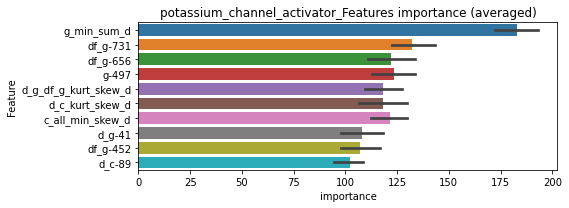

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000575052	valid_1's binary_logloss: 0.0184818


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000523504	valid_1's binary_logloss: 0.00553297


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000635876	valid_1's binary_logloss: 0.0110953


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000738781	valid_1's binary_logloss: 0.00905533


potassium_channel_activator logloss: 0.011042427989351754
potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0375104	valid_1's binary_logloss: 0.109071
Early stopping, best iteration is:
[1575]	training's binary_logloss: 0.0237206	valid_1's binary_logloss: 0.102814
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0374816	valid_1's binary_logloss: 0.106462
Early stopping, best iteration is:
[1671]	training's binary_logloss: 0.0223433	valid_1's binary_logloss: 0.100976
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.040488	valid_1's binary_logloss: 0.0743464
[2000]	training's binary_logloss: 0.0197503	valid_1's binary_logloss: 0.0637115
[3000]	training's binary_logloss: 0.0127837	valid_1's binary_logloss: 0.0599291
Early stopping, best iteration is:
[3062]	training's binary_logloss: 0.0125014	valid_1's binary_logloss: 0.059804
Training until validation scores don't improve for 30 rounds
[1000]	training's

1 / 3, AUC score:0.987, PR-AUC:0.972
y_Threshold: 0.0407300, Threshold: 0.0710441, pos_neg_ratio: 0.8000000
Remove_noisy_data: 198 → Positive_corect_labels: 621/3729
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0710441, conf_0:0.04973, conf_1:0.09236
Num_p_label: 21.0, Expected: 16.4, Adj_threshold_1: 0.1010441
threshold: 0.1010441, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 621.0/3729, y_label_rate: 0.1665326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0292401	valid_1's binary_logloss: 0.0825124
[2000]	training's binary_logloss: 0.0144456	valid_1's binary_logloss: 0.075234
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0140591	valid_1's binary_logloss: 0.0750149
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0304232	valid_1's binary_logloss: 0.0649293
[2000]	training's binary_logloss: 0.0151095	valid_1's binary_logloss: 0.0568066
Early stopping, best iteration is:
[2358]	training's binary_logloss: 0.012761	valid_1's binary_logloss: 0.0557525
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0302464	valid_1's binary_logloss: 0.0664946
[2000]	training's binary_logloss: 0.0150056	valid_1's binary_logloss: 0.0571038
Early stopping, best iteration is:
[2280]	training's binary_logloss: 0.0131055	valid_1's binary_logloss: 0.05

2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0476879, Threshold: 0.1010441, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 607.0/3701
p_label_rate: 0.0055249 Vs.target_rate: 0.00412
Num_p_label: 22.0, Expected: 16.4, Threshold: 0.1010441, conf_0:0.08084, conf_1:0.12125
threshold: 0.1010441, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 607.0/3701, y_label_rate: 0.1640097
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026304	valid_1's binary_logloss: 0.0678467
Early stopping, best iteration is:
[1902]	training's binary_logloss: 0.0137296	valid_1's binary_logloss: 0.0601408
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0270731	valid_1's binary_logloss: 0.0563782
[2000]	training's binary_logloss: 0.0134271	valid_1's binary_logloss: 0.0468826
[3000]	training's binary_logloss: 0.00885889	valid_1's binary_logloss: 0.0439712
Early stopping, best iteration is:
[3619]	training's binary_logloss: 0.00730955	valid_1's binary_logloss: 0.0429274
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0276115	valid_1's binary_logloss: 0.0490455
[2000]	training's binary_logloss: 0.0136737	valid_1's binary_logloss: 0.0389258
[3000]	training's binary_logloss: 0.00902294	valid_1's binary_logloss: 0.0352626
[4000]	training's binary_

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0381665, Threshold: 0.1010441, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 599.0/3685
p_label_rate: 0.0035158 Vs.target_rate: 0.00412
Num_p_label: 14.0, Expected: 16.4, Threshold: 0.1010441, conf_0:0.09094, conf_1:0.11115
threshold: 0.1010441, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 599.0/3685, y_label_rate: 0.1625509


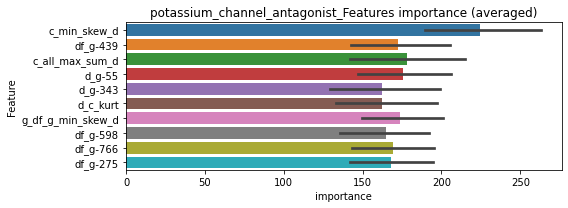

len(train_index) : 2763
len(valid_index) : 922
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0346385	valid_1's binary_logloss: 0.0691168
[2000]	training's binary_logloss: 0.0180234	valid_1's binary_logloss: 0.057139
Early stopping, best iteration is:
[2780]	training's binary_logloss: 0.0129664	valid_1's binary_logloss: 0.0536072


len(train_index) : 2764
len(valid_index) : 921
================================= fold 2/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0357038	valid_1's binary_logloss: 0.055708
[2000]	training's binary_logloss: 0.0185237	valid_1's binary_logloss: 0.0437423
[3000]	training's binary_logloss: 0.0123167	valid_1's binary_logloss: 0.0397518
[4000]	training's binary_logloss: 0.00919982	valid_1's binary_logloss: 0.0378747
Early stopping, best iteration is:
[4396]	training's binary_logloss: 0.00836706	valid_1's binary_logloss: 0.0373498


len(train_index) : 2764
len(valid_index) : 921
================================= fold 3/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0359296	valid_1's binary_logloss: 0.0551132
[2000]	training's binary_logloss: 0.0187229	valid_1's binary_logloss: 0.0418335
[3000]	training's binary_logloss: 0.0124778	valid_1's binary_logloss: 0.03706
[4000]	training's binary_logloss: 0.00933347	valid_1's binary_logloss: 0.034471
Early stopping, best iteration is:
[4809]	training's binary_logloss: 0.00774154	valid_1's binary_logloss: 0.0332985


len(train_index) : 2764
len(valid_index) : 921
================================= fold 4/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0352543	valid_1's binary_logloss: 0.0613397
[2000]	training's binary_logloss: 0.018346	valid_1's binary_logloss: 0.0489102
[3000]	training's binary_logloss: 0.0122488	valid_1's binary_logloss: 0.04506
Early stopping, best iteration is:
[3449]	training's binary_logloss: 0.0106251	valid_1's binary_logloss: 0.0440072


potassium_channel_antagonist logloss: 0.042068800700088886
potassium_channel_antagonist is unpredictable(><)!
ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0407695	valid_1's binary_logloss: 0.127702
Early stopping, best iteration is:
[1540]	training's binary_logloss: 0.0264038	valid_1's binary_logloss: 0.123533
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0424858	valid_1's binary_logloss: 0.116481
Early stopping, best iteration is:
[1722]	training's binary_logloss: 0.0245653	valid_1's binary_logloss: 0.108523
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0450211	valid_1's binary_logloss: 0.0842091
[2000]	training's binary_logloss: 0.0221461	valid_1's binary_logloss: 0.0733501
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0186002	valid_1's binary_logloss: 0.071845
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0428573	valid_1's binary_logloss: 0.111528
Early stopping, b

1 / 3, AUC score:0.981, PR-AUC:0.961
y_Threshold: 0.0508085, Threshold: 0.0986387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 224 → Positive_corect_labels: 609/3707
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0986387, conf_0:0.06905, conf_1:0.12823
Num_p_label: 10.0, Expected: 19.2, Adj_threshold_1: 0.1286387
threshold: 0.1286387, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 609.0/3707, y_label_rate: 0.1642838
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0299933	valid_1's binary_logloss: 0.0904146
Early stopping, best iteration is:
[1687]	training's binary_logloss: 0.0178014	valid_1's binary_logloss: 0.0839099
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0312698	valid_1's binary_logloss: 0.0769846
[2000]	training's binary_logloss: 0.0156076	valid_1's binary_logloss: 0.0680188
Early stopping, best iteration is:
[2390]	training's binary_logloss: 0.012999	valid_1's binary_logloss: 0.0666842
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333987	valid_1's binary_logloss: 0.0649109
[2000]	training's binary_logloss: 0.0166069	valid_1's binary_logloss: 0.0540584
[3000]	training's binary_logloss: 0.0109163	valid_1's binary_logloss: 0.0503406
Early stopping, best iteration is:
[3146]	training's binary_logloss: 0.0103952	valid_1's binary_logloss: 0.0

2 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0562034, Threshold: 0.1286387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 590.0/3669
p_label_rate: 0.0060271 Vs.target_rate: 0.00483
Num_p_label: 24.0, Expected: 19.2, Threshold: 0.1286387, conf_0:0.10291, conf_1:0.15437
threshold: 0.1286387, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 590.0/3669, y_label_rate: 0.1608068
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0274864	valid_1's binary_logloss: 0.0574196
Early stopping, best iteration is:
[1915]	training's binary_logloss: 0.014337	valid_1's binary_logloss: 0.0486622
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0263271	valid_1's binary_logloss: 0.0728484
[2000]	training's binary_logloss: 0.0131168	valid_1's binary_logloss: 0.0641043
Early stopping, best iteration is:
[2237]	training's binary_logloss: 0.0116955	valid_1's binary_logloss: 0.0632596
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0281201	valid_1's binary_logloss: 0.0506198
[2000]	training's binary_logloss: 0.0140798	valid_1's binary_logloss: 0.0391996
[3000]	training's binary_logloss: 0.00930323	valid_1's binary_logloss: 0.0351423
[4000]	training's binary_logloss: 0.00698308	valid_1's binary_logloss: 0.0332597
Early stopping, best itera

3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0557309, Threshold: 0.1286387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 577.0/3643
p_label_rate: 0.0065294 Vs.target_rate: 0.00483
Num_p_label: 26.0, Expected: 19.2, Threshold: 0.1286387, conf_0:0.11577, conf_1:0.14150
threshold: 0.1286387, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 577.0/3643, y_label_rate: 0.1583859


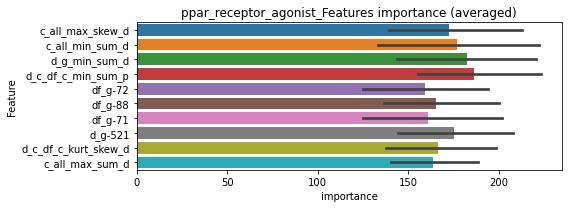

len(train_index) : 2732
len(valid_index) : 911
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347706	valid_1's binary_logloss: 0.0602756
[2000]	training's binary_logloss: 0.0178799	valid_1's binary_logloss: 0.0471311
[3000]	training's binary_logloss: 0.0119532	valid_1's binary_logloss: 0.0425501
Early stopping, best iteration is:
[3776]	training's binary_logloss: 0.00949943	valid_1's binary_logloss: 0.0407639


len(train_index) : 2732
len(valid_index) : 911
================================= fold 2/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349503	valid_1's binary_logloss: 0.0595178
[2000]	training's binary_logloss: 0.0181192	valid_1's binary_logloss: 0.0448345
[3000]	training's binary_logloss: 0.0120747	valid_1's binary_logloss: 0.0396493
[4000]	training's binary_logloss: 0.00906211	valid_1's binary_logloss: 0.0370895
Early stopping, best iteration is:
[4283]	training's binary_logloss: 0.00846297	valid_1's binary_logloss: 0.0366078


len(train_index) : 2732
len(valid_index) : 911
================================= fold 3/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0356379	valid_1's binary_logloss: 0.0543055
[2000]	training's binary_logloss: 0.0185635	valid_1's binary_logloss: 0.0397503
[3000]	training's binary_logloss: 0.0123986	valid_1's binary_logloss: 0.0344608
[4000]	training's binary_logloss: 0.00934027	valid_1's binary_logloss: 0.0318
Early stopping, best iteration is:
[4633]	training's binary_logloss: 0.00808208	valid_1's binary_logloss: 0.030755


len(train_index) : 2733
len(valid_index) : 910
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0357127	valid_1's binary_logloss: 0.0612905
[2000]	training's binary_logloss: 0.0185002	valid_1's binary_logloss: 0.0472017
[3000]	training's binary_logloss: 0.0123723	valid_1's binary_logloss: 0.0424843
[4000]	training's binary_logloss: 0.00929303	valid_1's binary_logloss: 0.0402958
Early stopping, best iteration is:
[4483]	training's binary_logloss: 0.00829052	valid_1's binary_logloss: 0.0396451


ppar_receptor_agonist logloss: 0.036942240876562615
ppar_receptor_agonist is unpredictable(><)!
ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000366358	valid_1's binary_logloss: 0.0053949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000385224	valid_1's binary_logloss: 0.00698382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000387371	valid_1's binary_logloss: 0.00666135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000388687	valid_1's binary_logloss: 0.00764665


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021134, Threshold: 0.0048970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0048970, conf_0:0.00343, conf_1:0.00637
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0348970
threshold: 0.0348970, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.02792, conf_1:0.04188
threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.03141, conf_1:0.03839
threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


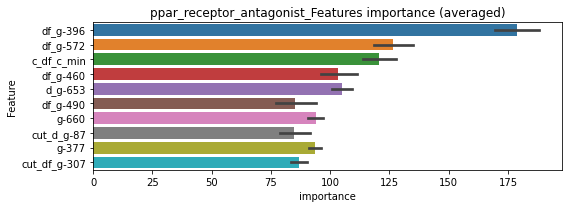

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000380512	valid_1's binary_logloss: 0.00405994


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000402632	valid_1's binary_logloss: 0.00608962


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000389384	valid_1's binary_logloss: 0.00558689


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000399732	valid_1's binary_logloss: 0.00655074


ppar_receptor_antagonist logloss: 0.005571757465115935
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.043187	valid_1's binary_logloss: 0.138835
Early stopping, best iteration is:
[1188]	training's binary_logloss: 0.0364259	valid_1's binary_logloss: 0.136891
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0456036	valid_1's binary_logloss: 0.114428
Early stopping, best iteration is:
[1535]	training's binary_logloss: 0.0296342	valid_1's binary_logloss: 0.108639
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0461643	valid_1's binary_logloss: 0.103249
[2000]	training's binary_logloss: 0.0227262	valid_1's binary_logloss: 0.0912847
Early stopping, best iteration is:
[2357]	training's binary_logloss: 0.0191042	valid_1's binary_logloss: 0.0892461
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0460003	valid_1's binary_logloss: 0.104666
Early stopping, be

1 / 3, AUC score:0.982, PR-AUC:0.960
y_Threshold: 0.0550954, Threshold: 0.2297502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 220 → Positive_corect_labels: 609/3701
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.2297502, conf_0:0.16083, conf_1:0.29868
Num_p_label: 33.0, Expected: 19.9, Adj_threshold_1: 0.2597502
Num_p_label: 24.0, Expected: 19.9, Adj_threshold_2: 0.2897502
threshold: 0.2897502, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 609.0/3701, y_label_rate: 0.1645501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.033274	valid_1's binary_logloss: 0.0953729
Early stopping, best iteration is:
[1836]	training's binary_logloss: 0.0182093	valid_1's binary_logloss: 0.0883104
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0340478	valid_1's binary_logloss: 0.0828401
Early stopping, best iteration is:
[1842]	training's binary_logloss: 0.0185032	valid_1's binary_logloss: 0.0745701
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0353355	valid_1's binary_logloss: 0.0736625
[2000]	training's binary_logloss: 0.0175817	valid_1's binary_logloss: 0.0627058
Early stopping, best iteration is:
[2801]	training's binary_logloss: 0.0124132	valid_1's binary_logloss: 0.059542
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351796	valid_1's binary_logloss: 0.0742563
[2000]	traini

2 / 3, AUC score:0.996, PR-AUC:0.987
y_Threshold: 0.0691012, Threshold: 0.2897502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 578.0/3639
p_label_rate: 0.0220994 Vs.target_rate: 0.00500
Num_p_label: 88.0, Expected: 19.9, Threshold: 0.2897502, conf_0:0.23180, conf_1:0.34770
Num_p_label: 81.0, Expected: 19.9, Adj_threshold_1: 0.3197502
Num_p_label: 68.0, Expected: 19.9, Adj_threshold_2: 0.3497502
Num_p_label: 58.0, Expected: 19.9, Adj_threshold_3: 0.3797502
Num_p_label: 46.0, Expected: 19.9, Adj_threshold_4: 0.4097502
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_5: 0.4397502
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_6: 0.4697502
Num_p_label: 22.0, Expected: 19.9, Adj_threshold_7: 0.4997502
threshold: 0.4997502, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 578.0/3639, y_label_rate: 0.1588348
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0267541	valid_1's binary_logloss: 0.0579003
[2000]	training's binary_logloss: 0.0134543	valid_1's binary_logloss: 0.0481309
Early stopping, best iteration is:
[2857]	training's binary_logloss: 0.00937895	valid_1's binary_logloss: 0.045244
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0256297	valid_1's binary_logloss: 0.0727205
[2000]	training's binary_logloss: 0.0129266	valid_1's binary_logloss: 0.0636269
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0122807	valid_1's binary_logloss: 0.0631014
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0280512	valid_1's binary_logloss: 0.0473721
[2000]	training's binary_logloss: 0.0140165	valid_1's binary_logloss: 0.0359252
[3000]	training's binary_logloss: 0.0092615	valid_1's binary_logloss: 0.0316552
[4000]	training's binary_lo

3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0651959, Threshold: 0.4997502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 560.0/3603
p_label_rate: 0.0140633 Vs.target_rate: 0.00500
Num_p_label: 56.0, Expected: 19.9, Threshold: 0.4997502, conf_0:0.44978, conf_1:0.54973
Num_p_label: 47.0, Expected: 19.9, Adj_threshold_1: 0.5297502
Num_p_label: 39.0, Expected: 19.9, Adj_threshold_2: 0.5597502
Num_p_label: 30.0, Expected: 19.9, Adj_threshold_3: 0.5897502
Num_p_label: 17.0, Expected: 19.9, Adj_threshold_4: 0.6197502
threshold: 0.6197502, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 560.0/3603, y_label_rate: 0.1554260


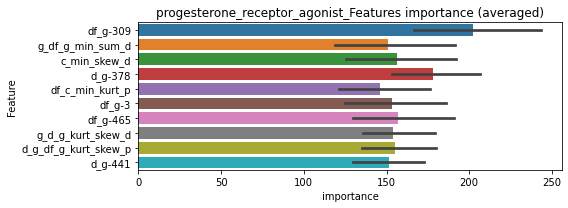

len(train_index) : 2702
len(valid_index) : 901
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0323313	valid_1's binary_logloss: 0.0477697
[2000]	training's binary_logloss: 0.0167354	valid_1's binary_logloss: 0.0331084
[3000]	training's binary_logloss: 0.011242	valid_1's binary_logloss: 0.0281408
[4000]	training's binary_logloss: 0.0084513	valid_1's binary_logloss: 0.0255609
[5000]	training's binary_logloss: 0.00676987	valid_1's binary_logloss: 0.0240091
[6000]	training's binary_logloss: 0.00566196	valid_1's binary_logloss: 0.0229411
Early stopping, best iteration is:
[6478]	training's binary_logloss: 0.0052522	valid_1's binary_logloss: 0.0225999


len(train_index) : 2702
len(valid_index) : 901
================================= fold 2/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0306904	valid_1's binary_logloss: 0.0588185
[2000]	training's binary_logloss: 0.015796	valid_1's binary_logloss: 0.0458351
[3000]	training's binary_logloss: 0.01059	valid_1's binary_logloss: 0.0418033
[4000]	training's binary_logloss: 0.00796529	valid_1's binary_logloss: 0.0399983
Early stopping, best iteration is:
[4282]	training's binary_logloss: 0.00745452	valid_1's binary_logloss: 0.0396418


len(train_index) : 2702
len(valid_index) : 901
================================= fold 3/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0317691	valid_1's binary_logloss: 0.0499346
[2000]	training's binary_logloss: 0.0164792	valid_1's binary_logloss: 0.0360128
[3000]	training's binary_logloss: 0.0110683	valid_1's binary_logloss: 0.0311478
[4000]	training's binary_logloss: 0.00832208	valid_1's binary_logloss: 0.0287072
[5000]	training's binary_logloss: 0.0066833	valid_1's binary_logloss: 0.0273472
[6000]	training's binary_logloss: 0.0055997	valid_1's binary_logloss: 0.0264081
[7000]	training's binary_logloss: 0.00482358	valid_1's binary_logloss: 0.0257481
Early stopping, best iteration is:
[7376]	training's binary_logloss: 0.00458899	valid_1's binary_logloss: 0.0255473


len(train_index) : 2703
len(valid_index) : 900
================================= fold 4/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0324561	valid_1's binary_logloss: 0.0512621
[2000]	training's binary_logloss: 0.016838	valid_1's binary_logloss: 0.0385453
[3000]	training's binary_logloss: 0.0113187	valid_1's binary_logloss: 0.0344603
[4000]	training's binary_logloss: 0.00850376	valid_1's binary_logloss: 0.0326253
[5000]	training's binary_logloss: 0.00683511	valid_1's binary_logloss: 0.0316394
Early stopping, best iteration is:
[5166]	training's binary_logloss: 0.00661659	valid_1's binary_logloss: 0.0314125


progesterone_receptor_agonist logloss: 0.029799934209375677
progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000277713	valid_1's binary_logloss: 0.000907973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000279951	valid_1's binary_logloss: 0.00204665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.00028484	valid_1's binary_logloss: 0.000812225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000282549	valid_1's binary_logloss: 0.0023644


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016934, Threshold: 0.0095456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0095456, conf_0:0.00668, conf_1:0.01241
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0395456
threshold: 0.0395456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.0395456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0090407 Vs.target_rate: 0.00076
Num_p_label: 36.0, Expected: 3.0, Threshold: 0.0395456, conf_0:0.03164, conf_1:0.04745
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0695456


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0995456
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1295456
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.1595456
threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.1595456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1595456, conf_0:0.14359, conf_1:0.17550
threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


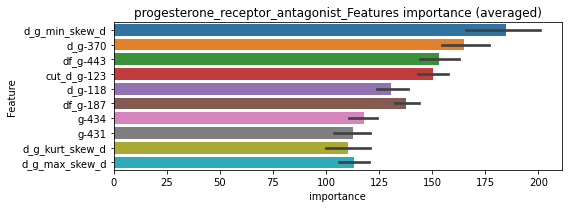

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000267887	valid_1's binary_logloss: 0.000652794


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000263939	valid_1's binary_logloss: 0.000915315


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000273948	valid_1's binary_logloss: 0.00055424


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0009546801190595227


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000276211	valid_1's binary_logloss: 0.00169715


prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000409494	valid_1's binary_logloss: 0.00539462
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000420728	valid_1's binary_logloss: 0.0141561
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00118925	valid_1's binary_logloss: 0.0214538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000398748	valid_1's binary_logloss: 0.00375294


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0032271, Threshold: 0.0146420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0146420, conf_0:0.01025, conf_1:0.01903
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0446420
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0746420
threshold: 0.0746420, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000803904	valid_1's binary_logloss: 0.0143284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000406889	valid_1's binary_logloss: 0.00176678
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000403523	valid_1's binary_logloss: 0.00211551
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000408588	valid_1's binary_logloss: 0.00739352


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0260777, Threshold: 0.0746420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.0746420, conf_0:0.05971, conf_1:0.08957
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_1: 0.1046420
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.1346420
threshold: 0.1346420, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000467034	valid_1's binary_logloss: 0.00481321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00041	valid_1's binary_logloss: 0.0038407
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000761023	valid_1's binary_logloss: 0.0187836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000432244	valid_1's binary_logloss: 0.00952587


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0185647, Threshold: 0.1346420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00151
Num_p_label: 16.0, Expected: 6.0, Threshold: 0.1346420, conf_0:0.12118, conf_1:0.14811
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.1646420
threshold: 0.1646420, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


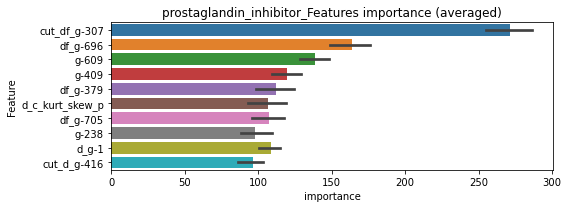

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000419464	valid_1's binary_logloss: 0.00399999


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000411303	valid_1's binary_logloss: 0.00454868


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000650485	valid_1's binary_logloss: 0.0129215


================================= fold 4/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000408027	valid_1's binary_logloss: 0.00232709


prostaglandin_inhibitor logloss: 0.0059503484002416925
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00136171	valid_1's binary_logloss: 0.0520613
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.0010062	valid_1's binary_logloss: 0.0395992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000765255	valid_1's binary_logloss: 0.0323504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000885718	valid_1's binary_logloss: 0.0317803


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0077072, Threshold: 0.0354928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0354928, conf_0:0.02484, conf_1:0.04614
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_1: 0.0654928
Num_p_label: 17.0, Expected: 14.0, Adj_threshold_2: 0.0954928
threshold: 0.0954928, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3789, y_label_rate: 0.1712853
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000898656	valid_1's binary_logloss: 0.044534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000717253	valid_1's binary_logloss: 0.0290786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00131727	valid_1's binary_logloss: 0.043775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00127809	valid_1's binary_logloss: 0.0226384


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0293022, Threshold: 0.0954928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 641.0/3773
p_label_rate: 0.0150678 Vs.target_rate: 0.00353
Num_p_label: 60.0, Expected: 14.0, Threshold: 0.0954928, conf_0:0.07639, conf_1:0.11459
Num_p_label: 50.0, Expected: 14.0, Adj_threshold_1: 0.1254928
Num_p_label: 45.0, Expected: 14.0, Adj_threshold_2: 0.1554928
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_3: 0.1854928
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_4: 0.2154928
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_5: 0.2454928
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_6: 0.2754928
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_7: 0.3054928
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_8: 0.3354928
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_9: 0.3654928
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_10: 0.3954928
threshold: 0.3954928, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00078403	valid_1's binary_logloss: 0.0349538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00124099	valid_1's binary_logloss: 0.0348159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000637854	valid_1's binary_logloss: 0.0204702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000680242	valid_1's binary_logloss: 0.0258788


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0242031, Threshold: 0.3954928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0085384 Vs.target_rate: 0.00353
Num_p_label: 34.0, Expected: 14.0, Threshold: 0.3954928, conf_0:0.35594, conf_1:0.43504
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_1: 0.4254928
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_2: 0.4554928
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_3: 0.4854928
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_4: 0.5154928
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_5: 0.5454928
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_6: 0.5754928
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_7: 0.6054928
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_8: 0.6354928
threshold: 0.6354928, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 635.0/3761, y_label_rate: 0.1688381


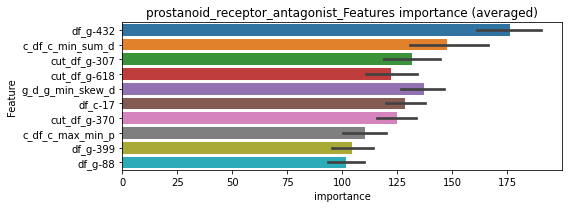

len(train_index) : 2820
len(valid_index) : 941
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000966871	valid_1's binary_logloss: 0.0333032


len(train_index) : 2821
len(valid_index) : 940
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00081537	valid_1's binary_logloss: 0.017341


len(train_index) : 2821
len(valid_index) : 940
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000675781	valid_1's binary_logloss: 0.0224937


len(train_index) : 2821
len(valid_index) : 940
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000852138	valid_1's binary_logloss: 0.0236164


prostanoid_receptor_antagonist logloss: 0.024191006007237274


mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0822482	valid_1's binary_logloss: 0.222139
Early stopping, best iteration is:
[1399]	training's binary_logloss: 0.0592693	valid_1's binary_logloss: 0.218579
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.081717	valid_1's binary_logloss: 0.224671
Early stopping, best iteration is:
[1277]	training's binary_logloss: 0.0643688	valid_1's binary_logloss: 0.222045
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0824118	valid_1's binary_logloss: 0.217138
Early stopping, best iteration is:
[1117]	training's binary_logloss: 0.0743694	valid_1's binary_logloss: 0.215528
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0825431	valid_1's binary_logloss: 0.217048
Early stopping, best iteration is:
[1315]	training's binary_logloss: 0.0634764	valid_1's binary_log

1 / 3, AUC score:0.890, PR-AUC:0.828
y_Threshold: 0.1027896, Threshold: 0.1804157, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1352 → Positive_corect_labels: 1574/10922
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1804157, conf_0:0.12629, conf_1:0.23454
threshold: 0.1804157, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1574.0/10922, y_label_rate: 0.1441128
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0411622	valid_1's binary_logloss: 0.107694
Early stopping, best iteration is:
[1516]	training's binary_logloss: 0.0266884	valid_1's binary_logloss: 0.0991754
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.040893	valid_1's binary_logloss: 0.106478
[2000]	training's binary_logloss: 0.0198414	valid_1's binary_logloss: 0.0953494
Early stopping, best iteration is:
[2092]	training's binary_logloss: 0.0189322	valid_1's binary_logloss: 0.0948816
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0416902	valid_1's binary_logloss: 0.101882
[2000]	training's binary_logloss: 0.0201894	valid_1's binary_logloss: 0.091307
Early stopping, best iteration is:
[2056]	training's binary_logloss: 0.0195922	valid_1's binary_logloss: 0.0908761
Training until validation scores don't improve for 30 rounds
[1000]	training'

2 / 3, AUC score:0.990, PR-AUC:0.972
y_Threshold: 0.0878823, Threshold: 0.1804157, pos_neg_ratio: 0.8000000
Remove_noisy_data: 260 → Positive_corect_labels: 1444.0/10662
p_label_rate: 0.0080362 Vs.target_rate: 0.03049
Num_p_label: 32.0, Expected: 121.4, Threshold: 0.1804157, conf_0:0.14433, conf_1:0.21650
threshold: 0.1804157, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1444.0/10662, y_label_rate: 0.1354343
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0303162	valid_1's binary_logloss: 0.0648713
[2000]	training's binary_logloss: 0.0146692	valid_1's binary_logloss: 0.0544705
Early stopping, best iteration is:
[2103]	training's binary_logloss: 0.0139284	valid_1's binary_logloss: 0.0539146
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0298856	valid_1's binary_logloss: 0.0685925
[2000]	training's binary_logloss: 0.0144743	valid_1's binary_logloss: 0.0581468
Early stopping, best iteration is:
[2494]	training's binary_logloss: 0.0114392	valid_1's binary_logloss: 0.0560369
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0291699	valid_1's binary_logloss: 0.0788603
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0148653	valid_1's binary_logloss: 0.0694625
Training until validation scores don't improve for 30 rounds
[1000]	trai

3 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0720973, Threshold: 0.1804157, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1386.0/10546
p_label_rate: 0.0118031 Vs.target_rate: 0.03049
Num_p_label: 47.0, Expected: 121.4, Threshold: 0.1804157, conf_0:0.16237, conf_1:0.19846
threshold: 0.1804157, positive_p_label: 47.0/3982, p_label_rate: 0.0118031
positive_y_label: 1386.0/10546, y_label_rate: 0.1314242


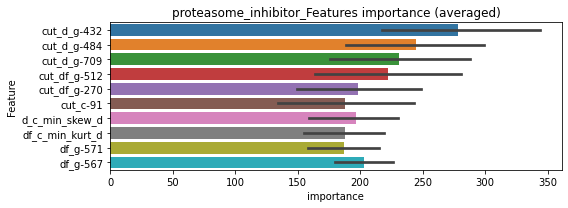

len(train_index) : 7909
len(valid_index) : 2637
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.035096	valid_1's binary_logloss: 0.0593607
[2000]	training's binary_logloss: 0.0174501	valid_1's binary_logloss: 0.0428021
[3000]	training's binary_logloss: 0.0114832	valid_1's binary_logloss: 0.0375886
[4000]	training's binary_logloss: 0.00853775	valid_1's binary_logloss: 0.0350171
Early stopping, best iteration is:
[4164]	training's binary_logloss: 0.00817823	valid_1's binary_logloss: 0.034676


len(train_index) : 7909
len(valid_index) : 2637
================================= fold 2/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0339537	valid_1's binary_logloss: 0.0639399
[2000]	training's binary_logloss: 0.0167888	valid_1's binary_logloss: 0.0478739
[3000]	training's binary_logloss: 0.0110475	valid_1's binary_logloss: 0.0427547
[4000]	training's binary_logloss: 0.00819301	valid_1's binary_logloss: 0.0400892
Early stopping, best iteration is:
[4270]	training's binary_logloss: 0.00764416	valid_1's binary_logloss: 0.0395736


len(train_index) : 7910
len(valid_index) : 2636
================================= fold 3/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347259	valid_1's binary_logloss: 0.0567759
[2000]	training's binary_logloss: 0.017233	valid_1's binary_logloss: 0.0411109
[3000]	training's binary_logloss: 0.0113686	valid_1's binary_logloss: 0.0359244
[4000]	training's binary_logloss: 0.00841052	valid_1's binary_logloss: 0.0334114
Early stopping, best iteration is:
[4602]	training's binary_logloss: 0.00727274	valid_1's binary_logloss: 0.0323831


len(train_index) : 7910
len(valid_index) : 2636
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347826	valid_1's binary_logloss: 0.0609215
[2000]	training's binary_logloss: 0.0172494	valid_1's binary_logloss: 0.0444338
[3000]	training's binary_logloss: 0.011353	valid_1's binary_logloss: 0.039214
[4000]	training's binary_logloss: 0.00843089	valid_1's binary_logloss: 0.0364118
[5000]	training's binary_logloss: 0.00670937	valid_1's binary_logloss: 0.0347365
Early stopping, best iteration is:
[5550]	training's binary_logloss: 0.00602309	valid_1's binary_logloss: 0.0340567


proteasome_inhibitor logloss: 0.03517269727907726
proteasome_inhibitor is unpredictable(><)!
protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000491676	valid_1's binary_logloss: 0.0174223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00050961	valid_1's binary_logloss: 0.0117172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000523487	valid_1's binary_logloss: 0.00583239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00058109	valid_1's binary_logloss: 0.0154698


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039932, Threshold: 0.0096547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0096547, conf_0:0.00676, conf_1:0.01255
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_1: 0.0396547
threshold: 0.0396547, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000469603	valid_1's binary_logloss: 0.0151766
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00052394	valid_1's binary_logloss: 0.0102765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000494301	valid_1's binary_logloss: 0.00459526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000666029	valid_1's binary_logloss: 0.01562


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162039, Threshold: 0.0396547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03172, conf_1:0.04759
threshold: 0.0396547, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000513262	valid_1's binary_logloss: 0.0142952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00049938	valid_1's binary_logloss: 0.00446279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000488633	valid_1's binary_logloss: 0.00284595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000509717	valid_1's binary_logloss: 0.0103807


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390119, Threshold: 0.0396547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03569, conf_1:0.04362
threshold: 0.0396547, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


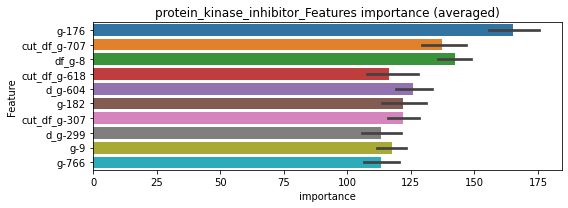

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000493391	valid_1's binary_logloss: 0.0122486


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000503822	valid_1's binary_logloss: 0.00538097


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000486245	valid_1's binary_logloss: 0.00306476
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000486258	valid_1's binary_logloss: 0.00306455


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000595066	valid_1's binary_logloss: 0.0109189


protein_kinase_inhibitor logloss: 0.007904643444722019
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033932	valid_1's binary_logloss: 0.00348367
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000327376	valid_1's binary_logloss: 0.00299297
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000327845	valid_1's binary_logloss: 0.000816911
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016429, Threshold: 0.0051329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000340892	valid_1's binary_logloss: 0.00255995


Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0051329, conf_0:0.00359, conf_1:0.00667
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_1: 0.0351329
threshold: 0.0351329, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319584	valid_1's binary_logloss: 0.00273147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0346806, Threshold: 0.0351329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0351329, conf_0:0.02811, conf_1:0.04216
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0651329
threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319584	valid_1's binary_logloss: 0.00273147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0346806, Threshold: 0.0651329, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.0651329, conf_0:0.05862, conf_1:0.07165
threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


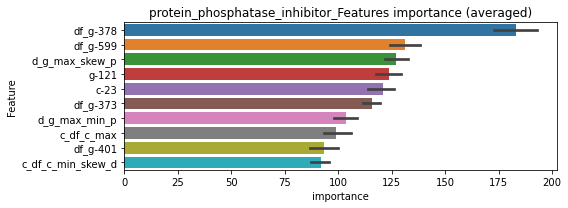

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317951	valid_1's binary_logloss: 0.00342657
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000317444	valid_1's binary_logloss: 0.003423


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000326498	valid_1's binary_logloss: 0.00205364


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000328667	valid_1's binary_logloss: 0.000922425


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000374456	valid_1's binary_logloss: 0.0031834


protein_phosphatase_inhibitor logloss: 0.002396749285680122
protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0378565	valid_1's binary_logloss: 0.116496
Early stopping, best iteration is:
[1791]	training's binary_logloss: 0.0208811	valid_1's binary_logloss: 0.110995
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0392497	valid_1's binary_logloss: 0.105454
[2000]	training's binary_logloss: 0.0191284	valid_1's binary_logloss: 0.0968889
Early stopping, best iteration is:
[2290]	training's binary_logloss: 0.016575	valid_1's binary_logloss: 0.0958788
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0407503	valid_1's binary_logloss: 0.0818123
[2000]	training's binary_logloss: 0.0199372	valid_1's binary_logloss: 0.0715267
Early stopping, best iteration is:
[2667]	training's binary_logloss: 0.0146683	valid_1's binary_logloss: 0.0684771
Training until validation scores don't improve for 30 rounds
[1000]	training

1 / 3, AUC score:0.988, PR-AUC:0.972
y_Threshold: 0.0390630, Threshold: 0.0887711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 194 → Positive_corect_labels: 623/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.0887711, conf_0:0.06214, conf_1:0.11540
Num_p_label: 29.0, Expected: 17.2, Adj_threshold_1: 0.1187711
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_2: 0.1487711
threshold: 0.1487711, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 623.0/3733, y_label_rate: 0.1668899
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314243	valid_1's binary_logloss: 0.0729259
[2000]	training's binary_logloss: 0.0155064	valid_1's binary_logloss: 0.0644228
Early stopping, best iteration is:
[2286]	training's binary_logloss: 0.013499	valid_1's binary_logloss: 0.0633972
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308259	valid_1's binary_logloss: 0.0782479
[2000]	training's binary_logloss: 0.0152669	valid_1's binary_logloss: 0.0692614
Early stopping, best iteration is:
[2105]	training's binary_logloss: 0.0144702	valid_1's binary_logloss: 0.0687801
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0331171	valid_1's binary_logloss: 0.0508877
[2000]	training's binary_logloss: 0.0163647	valid_1's binary_logloss: 0.0390076
[3000]	training's binary_logloss: 0.0107459	valid_1's binary_logloss: 0.0350787
[4000]	training's binary_log

2 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0508367, Threshold: 0.1487711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 599.0/3685
p_label_rate: 0.0070316 Vs.target_rate: 0.00433
Num_p_label: 28.0, Expected: 17.2, Threshold: 0.1487711, conf_0:0.11902, conf_1:0.17853
Num_p_label: 24.0, Expected: 17.2, Adj_threshold_1: 0.1787711
threshold: 0.1787711, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 599.0/3685, y_label_rate: 0.1625509
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0246416	valid_1's binary_logloss: 0.0690505
[2000]	training's binary_logloss: 0.0123298	valid_1's binary_logloss: 0.0612423
Early stopping, best iteration is:
[2236]	training's binary_logloss: 0.0110245	valid_1's binary_logloss: 0.0605483
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260147	valid_1's binary_logloss: 0.0594545
[2000]	training's binary_logloss: 0.0129549	valid_1's binary_logloss: 0.0512623
Early stopping, best iteration is:
[2107]	training's binary_logloss: 0.0122827	valid_1's binary_logloss: 0.0509923
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0273101	valid_1's binary_logloss: 0.0450582
[2000]	training's binary_logloss: 0.0136181	valid_1's binary_logloss: 0.0348302
[3000]	training's binary_logloss: 0.00901109	valid_1's binary_logloss: 0.0312676
[4000]	training's binary_l

3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0441316, Threshold: 0.1787711, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 591.0/3669
p_label_rate: 0.0055249 Vs.target_rate: 0.00433
Num_p_label: 22.0, Expected: 17.2, Threshold: 0.1787711, conf_0:0.16089, conf_1:0.19665
threshold: 0.1787711, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 591.0/3669, y_label_rate: 0.1610793


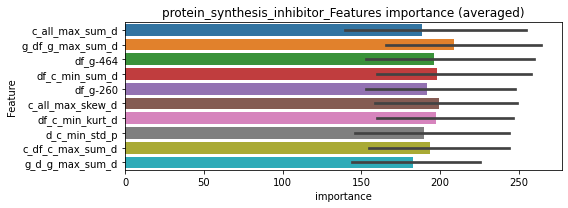

len(train_index) : 2751
len(valid_index) : 918
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0342077	valid_1's binary_logloss: 0.0592667
[2000]	training's binary_logloss: 0.0176832	valid_1's binary_logloss: 0.0469528
[3000]	training's binary_logloss: 0.0118244	valid_1's binary_logloss: 0.0430059
Early stopping, best iteration is:
[3877]	training's binary_logloss: 0.00913844	valid_1's binary_logloss: 0.0415567


len(train_index) : 2752
len(valid_index) : 917
================================= fold 2/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0341806	valid_1's binary_logloss: 0.0590574
[2000]	training's binary_logloss: 0.0176141	valid_1's binary_logloss: 0.0449862
[3000]	training's binary_logloss: 0.0117411	valid_1's binary_logloss: 0.0400962
Early stopping, best iteration is:
[3179]	training's binary_logloss: 0.0110644	valid_1's binary_logloss: 0.0395458


len(train_index) : 2752
len(valid_index) : 917
================================= fold 3/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0349784	valid_1's binary_logloss: 0.0632921
[2000]	training's binary_logloss: 0.0179463	valid_1's binary_logloss: 0.0502917
[3000]	training's binary_logloss: 0.0119449	valid_1's binary_logloss: 0.0461969
[4000]	training's binary_logloss: 0.00891383	valid_1's binary_logloss: 0.0442257
Early stopping, best iteration is:
[4259]	training's binary_logloss: 0.0083738	valid_1's binary_logloss: 0.0439094


len(train_index) : 2752
len(valid_index) : 917
================================= fold 4/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.034246	valid_1's binary_logloss: 0.0576285
[2000]	training's binary_logloss: 0.0176788	valid_1's binary_logloss: 0.0451309
[3000]	training's binary_logloss: 0.0117344	valid_1's binary_logloss: 0.0410755
[4000]	training's binary_logloss: 0.00876174	valid_1's binary_logloss: 0.0391407
Early stopping, best iteration is:
[4219]	training's binary_logloss: 0.00829452	valid_1's binary_logloss: 0.038829


protein_synthesis_inhibitor logloss: 0.0409603641985184
protein_synthesis_inhibitor is unpredictable(><)!
protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000319232	valid_1's binary_logloss: 0.00183819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000311157	valid_1's binary_logloss: 0.00410234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000306367	valid_1's binary_logloss: 0.000725335
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014579, Threshold: 0.0050326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00030434	valid_1's binary_logloss: 0.000916248


p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0050326, conf_0:0.00352, conf_1:0.00654
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0350326
threshold: 0.0350326, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.02803, conf_1:0.04204


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.03153, conf_1:0.03854


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


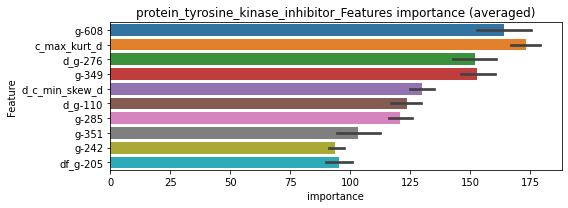

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000303712	valid_1's binary_logloss: 0.00184906


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000324842	valid_1's binary_logloss: 0.00307554


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000300696	valid_1's binary_logloss: 0.000570766
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000300696	valid_1's binary_logloss: 0.000570766


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000295861	valid_1's binary_logloss: 0.000666286


protein_tyrosine_kinase_inhibitor logloss: 0.0015405056811311347
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000579168	valid_1's binary_logloss: 0.0221115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000556911	valid_1's binary_logloss: 0.0083508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000557115	valid_1's binary_logloss: 0.00396741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000551139	valid_1's binary_logloss: 0.0131059


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050874, Threshold: 0.0126784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0126784, conf_0:0.00887, conf_1:0.01648
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0426784
threshold: 0.0426784, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000564801	valid_1's binary_logloss: 0.021631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000565573	valid_1's binary_logloss: 0.00735881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.00056168	valid_1's binary_logloss: 0.00366455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00054118	valid_1's binary_logloss: 0.0117699


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258194, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00235
Num_p_label: 16.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03414, conf_1:0.05121
threshold: 0.0426784, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.0011398	valid_1's binary_logloss: 0.0263916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000574396	valid_1's binary_logloss: 0.00972992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000548322	valid_1's binary_logloss: 0.0154136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00055656	valid_1's binary_logloss: 0.00887168


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280362, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03841, conf_1:0.04695
threshold: 0.0426784, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


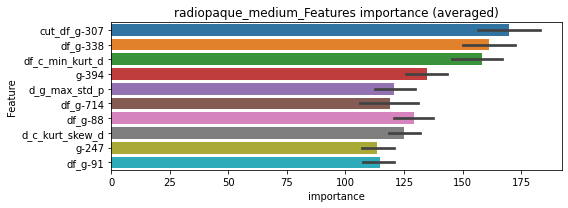

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000589193	valid_1's binary_logloss: 0.0101


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000543479	valid_1's binary_logloss: 0.0105856


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542081	valid_1's binary_logloss: 0.00577422
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000539843	valid_1's binary_logloss: 0.00576104


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


radiopaque_medium logloss: 0.01071430160772403


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00098609	valid_1's binary_logloss: 0.0164086


raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0727105	valid_1's binary_logloss: 0.214371
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.0733716	valid_1's binary_logloss: 0.214339
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0712009	valid_1's binary_logloss: 0.22018
Early stopping, best iteration is:
[1178]	training's binary_logloss: 0.0612221	valid_1's binary_logloss: 0.217809
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0746189	valid_1's binary_logloss: 0.197241
Early stopping, best iteration is:
[1486]	training's binary_logloss: 0.0508651	valid_1's binary_logloss: 0.18982
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0734937	valid_1's binary_logloss: 0.190871
Early stopping, best iteration is:
[1702]	training's binary_logloss: 0.0435011	valid_1's binary_loglo

1 / 3, AUC score:0.917, PR-AUC:0.865
y_Threshold: 0.1031048, Threshold: 0.3677601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 363 → Positive_corect_labels: 535/3546
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.3677601, conf_0:0.25743, conf_1:0.47809
threshold: 0.3677601, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 535.0/3546, y_label_rate: 0.1508742
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458289	valid_1's binary_logloss: 0.122345
Early stopping, best iteration is:
[1924]	training's binary_logloss: 0.0242055	valid_1's binary_logloss: 0.110379
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0476819	valid_1's binary_logloss: 0.107687
[2000]	training's binary_logloss: 0.0241399	valid_1's binary_logloss: 0.0927507
[3000]	training's binary_logloss: 0.0159166	valid_1's binary_logloss: 0.0875579
Early stopping, best iteration is:
[3254]	training's binary_logloss: 0.0146376	valid_1's binary_logloss: 0.086584
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0484133	valid_1's binary_logloss: 0.100708
[2000]	training's binary_logloss: 0.0243769	valid_1's binary_logloss: 0.0849115
Early stopping, best iteration is:
[2246]	training's binary_logloss: 0.0216339	valid_1's binary_logloss: 0.08275

2 / 3, AUC score:0.994, PR-AUC:0.979
y_Threshold: 0.1004962, Threshold: 0.3677601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 84 → Positive_corect_labels: 493.0/3462
p_label_rate: 0.0349071 Vs.target_rate: 0.00936
Num_p_label: 139.0, Expected: 37.3, Threshold: 0.3677601, conf_0:0.29421, conf_1:0.44131
Num_p_label: 129.0, Expected: 37.3, Adj_threshold_1: 0.3977601
Num_p_label: 123.0, Expected: 37.3, Adj_threshold_2: 0.4277601
Num_p_label: 116.0, Expected: 37.3, Adj_threshold_3: 0.4577601
Num_p_label: 110.0, Expected: 37.3, Adj_threshold_4: 0.4877601
Num_p_label: 98.0, Expected: 37.3, Adj_threshold_5: 0.5177601
Num_p_label: 95.0, Expected: 37.3, Adj_threshold_6: 0.5477601
Num_p_label: 80.0, Expected: 37.3, Adj_threshold_7: 0.5777601
Num_p_label: 75.0, Expected: 37.3, Adj_threshold_8: 0.6077601
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_9: 0.6377601
Num_p_label: 49.0, Expected: 37.3, Adj_threshold_10: 0.6677601
threshold: 0.6677601, positive_p_label: 49.0/3982, p_label_rate: 0.0123

Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0366832	valid_1's binary_logloss: 0.0950088
[2000]	training's binary_logloss: 0.0183266	valid_1's binary_logloss: 0.0825299
Early stopping, best iteration is:
[2459]	training's binary_logloss: 0.0148318	valid_1's binary_logloss: 0.0797767
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0369882	valid_1's binary_logloss: 0.0853585
[2000]	training's binary_logloss: 0.0185526	valid_1's binary_logloss: 0.0705477
Early stopping, best iteration is:
[2279]	training's binary_logloss: 0.0162315	valid_1's binary_logloss: 0.0686222
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0382951	valid_1's binary_logloss: 0.0783773
[2000]	training's binary_logloss: 0.0191632	valid_1's binary_logloss: 0.0614912
[3000]	training's binary_logloss: 0.0126649	valid_1's binary_logloss: 0.0554794
Early stopping, best iterat

3 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0787965, Threshold: 0.6677601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 471.0/3418
p_label_rate: 0.0298845 Vs.target_rate: 0.00936
Num_p_label: 119.0, Expected: 37.3, Threshold: 0.6677601, conf_0:0.60098, conf_1:0.73454
Num_p_label: 111.0, Expected: 37.3, Adj_threshold_1: 0.6977601
Num_p_label: 105.0, Expected: 37.3, Adj_threshold_2: 0.7277601
Num_p_label: 95.0, Expected: 37.3, Adj_threshold_3: 0.7577601
Num_p_label: 85.0, Expected: 37.3, Adj_threshold_4: 0.7877601
Num_p_label: 64.0, Expected: 37.3, Adj_threshold_5: 0.8177601
Num_p_label: 45.0, Expected: 37.3, Adj_threshold_6: 0.8477601
threshold: 0.8477601, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 471.0/3418, y_label_rate: 0.1377999


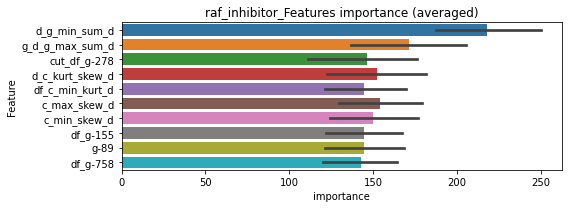

len(train_index) : 2563
len(valid_index) : 855
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.044968	valid_1's binary_logloss: 0.0820979
[2000]	training's binary_logloss: 0.0230937	valid_1's binary_logloss: 0.062004
[3000]	training's binary_logloss: 0.0154381	valid_1's binary_logloss: 0.0547543
[4000]	training's binary_logloss: 0.0115372	valid_1's binary_logloss: 0.0510171
Early stopping, best iteration is:
[4273]	training's binary_logloss: 0.010786	valid_1's binary_logloss: 0.050272


len(train_index) : 2563
len(valid_index) : 855
================================= fold 2/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0474645	valid_1's binary_logloss: 0.0729341
[2000]	training's binary_logloss: 0.024346	valid_1's binary_logloss: 0.050861
[3000]	training's binary_logloss: 0.0161801	valid_1's binary_logloss: 0.0427484
[4000]	training's binary_logloss: 0.0121075	valid_1's binary_logloss: 0.0385142
[5000]	training's binary_logloss: 0.0096911	valid_1's binary_logloss: 0.0358628
[6000]	training's binary_logloss: 0.00808545	valid_1's binary_logloss: 0.0339523
Early stopping, best iteration is:
[6714]	training's binary_logloss: 0.0072279	valid_1's binary_logloss: 0.0328947


len(train_index) : 2564
len(valid_index) : 854
================================= fold 3/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0471267	valid_1's binary_logloss: 0.0785712
[2000]	training's binary_logloss: 0.0240369	valid_1's binary_logloss: 0.0579183
[3000]	training's binary_logloss: 0.0159792	valid_1's binary_logloss: 0.0503294
[4000]	training's binary_logloss: 0.0119307	valid_1's binary_logloss: 0.0465115
[5000]	training's binary_logloss: 0.00952126	valid_1's binary_logloss: 0.0443731
[6000]	training's binary_logloss: 0.00793997	valid_1's binary_logloss: 0.0425377
[7000]	training's binary_logloss: 0.00680559	valid_1's binary_logloss: 0.0414262
Early stopping, best iteration is:
[7420]	training's binary_logloss: 0.00642945	valid_1's binary_logloss: 0.0409978


len(train_index) : 2564
len(valid_index) : 854
================================= fold 4/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0447795	valid_1's binary_logloss: 0.0869737
[2000]	training's binary_logloss: 0.0229587	valid_1's binary_logloss: 0.0660414
[3000]	training's binary_logloss: 0.0152895	valid_1's binary_logloss: 0.0585775
[4000]	training's binary_logloss: 0.0114288	valid_1's binary_logloss: 0.0549013
[5000]	training's binary_logloss: 0.00913031	valid_1's binary_logloss: 0.052661
[6000]	training's binary_logloss: 0.00761022	valid_1's binary_logloss: 0.0510769
Early stopping, best iteration is:
[6615]	training's binary_logloss: 0.00690113	valid_1's binary_logloss: 0.050281


raf_inhibitor logloss: 0.04361018014805433
raf_inhibitor is unpredictable(><)!
ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000241248	valid_1's binary_logloss: 0.00174213
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000247485	valid_1's binary_logloss: 0.000999958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000235575	valid_1's binary_logloss: 0.00113212
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009881, Threshold: 0.0110296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0110296, conf_0:0.00772, conf_1:0.01434
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0410296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.0710296
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1010296


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000244599	valid_1's binary_logloss: 0.00128497


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1310296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1610296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1910296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2210296
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.2510296
threshold: 0.2510296, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.2510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00050
Num_p_label: 19.0, Expected: 2.0, Threshold: 0.2510296, conf_0:0.20082, conf_1:0.30124
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2810296
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3110296
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.3410296
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_4: 0.3710296
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_5: 0.4010296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_6: 0.4310296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.4610296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.4910296
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_9: 0.5210296
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.5510296
threshold: 0.5510296, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_labe

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.5510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.5510296, conf_0:0.49593, conf_1:0.60613
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.5810296


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.6110296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.6410296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.6710296
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.7010296
threshold: 0.7010296, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


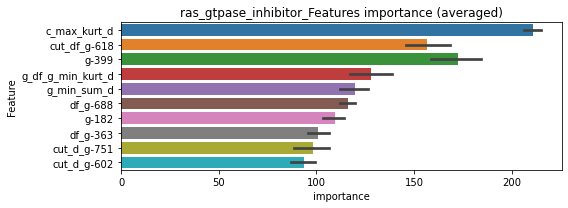

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000221793	valid_1's binary_logloss: 0.000961658


================================= fold 2/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000221093	valid_1's binary_logloss: 0.000560931
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000218179	valid_1's binary_logloss: 0.000357093
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000218179	valid_1's binary_logloss: 0.000357093


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.00080761302378241


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000227136	valid_1's binary_logloss: 0.00135031


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000600013	valid_1's binary_logloss: 0.0199899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000591521	valid_1's binary_logloss: 0.0124193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00120843	valid_1's binary_logloss: 0.0268694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00070928	valid_1's binary_logloss: 0.019116


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0079338, Threshold: 0.1120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1120765, conf_0:0.07845, conf_1:0.14570
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_1: 0.1420765
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1720765
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_3: 0.2020765
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_4: 0.2320765
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.2620765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_6: 0.2920765
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_7: 0.3220765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_8: 0.3520765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_9: 0.3820765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_10: 0.4120765
threshold: 0.4120765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000568118	valid_1's binary_logloss: 0.012655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00056491	valid_1's binary_logloss: 0.0124414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000819545	valid_1's binary_logloss: 0.022134
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000613118	valid_1's binary_logloss: 0.0154896


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0573141, Threshold: 0.4120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3786
p_label_rate: 0.0067805 Vs.target_rate: 0.00281
Num_p_label: 27.0, Expected: 11.2, Threshold: 0.4120765, conf_0:0.32966, conf_1:0.49449
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_1: 0.4420765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_2: 0.4720765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_3: 0.5020765
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_4: 0.5320765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_5: 0.5620765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_6: 0.5920765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_7: 0.6220765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_8: 0.6520765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6820765
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3786, y_label_rate: 0.1711569
===========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000578602	valid_1's binary_logloss: 0.0150932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000560712	valid_1's binary_logloss: 0.00858464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000558078	valid_1's binary_logloss: 0.00988236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000588664	valid_1's binary_logloss: 0.0205978


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509075, Threshold: 0.6820765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6820765, conf_0:0.61387, conf_1:0.75028
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3782, y_label_rate: 0.1708091


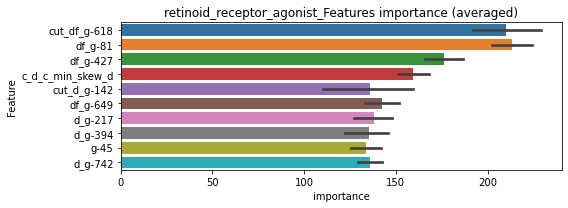

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000823011	valid_1's binary_logloss: 0.0172137


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000638855	valid_1's binary_logloss: 0.0116034


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000735229	valid_1's binary_logloss: 0.0152572


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557902	valid_1's binary_logloss: 0.0128442
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000562813	valid_1's binary_logloss: 0.012837


retinoid_receptor_agonist logloss: 0.01422790916358012
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000158996	valid_1's binary_logloss: 0.0002558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000153993	valid_1's binary_logloss: 0.00118872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000157251	valid_1's binary_logloss: 0.00019166
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004254, Threshold: 0.0018458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018458, conf_0:0.00129, conf_1:0.00240
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318458
threshold: 0.0318458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000157616	valid_1's binary_logloss: 0.00019353


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0318458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, Expected: 1.0, Threshold: 0.0318458, conf_0:0.02548, conf_1:0.03821
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0618458
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0918458


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0918458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0918458, conf_0:0.08266, conf_1:0.10103
threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


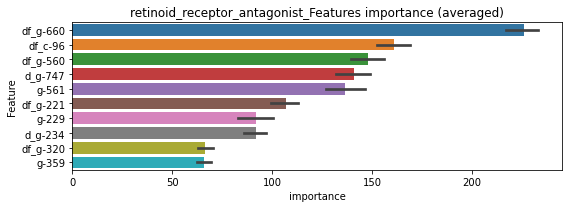

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015086	valid_1's binary_logloss: 0.000204671


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1215]	training's binary_logloss: 0.000148034	valid_1's binary_logloss: 0.000201582
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149936	valid_1's binary_logloss: 0.000336083


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1160]	training's binary_logloss: 0.000147451	valid_1's binary_logloss: 0.000331931
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150277	valid_1's binary_logloss: 0.000167362


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000147129	valid_1's binary_logloss: 0.00016394
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149814	valid_1's binary_logloss: 0.000197534


retinoid_receptor_antagonist logloss: 0.00022271283326585052


Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000146523	valid_1's binary_logloss: 0.00019342


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000386481	valid_1's binary_logloss: 0.00556873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000390844	valid_1's binary_logloss: 0.00220317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000401822	valid_1's binary_logloss: 0.00156343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000402581	valid_1's binary_logloss: 0.00728983


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027323, Threshold: 0.0088430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0088430, conf_0:0.00619, conf_1:0.01150
Num_p_label: 8.0, Expected: 5.9, Adj_threshold_1: 0.0388430
threshold: 0.0388430, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0524811, Threshold: 0.0388430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00147
Num_p_label: 18.0, Expected: 5.9, Threshold: 0.0388430, conf_0:0.03107, conf_1:0.04661
Num_p_label: 10.0, Expected: 5.9, Adj_threshold_1: 0.0688430
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0524811, Threshold: 0.0688430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00147
Num_p_label: 10.0, Expected: 5.9, Threshold: 0.0688430, conf_0:0.06196, conf_1:0.07573
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


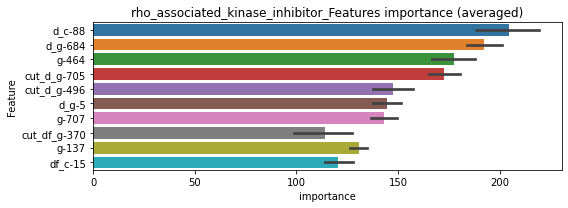

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000443649	valid_1's binary_logloss: 0.00472694


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387845	valid_1's binary_logloss: 0.00205123
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000388025	valid_1's binary_logloss: 0.00204981


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392353	valid_1's binary_logloss: 0.00169302
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000392353	valid_1's binary_logloss: 0.00169302


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00740796


rho_associated_kinase_inhibitor logloss: 0.003969788163542875
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000435251	valid_1's binary_logloss: 0.00511967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000433463	valid_1's binary_logloss: 0.0154395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000428876	valid_1's binary_logloss: 0.00324159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000440358	valid_1's binary_logloss: 0.00648012


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0042396, Threshold: 0.0168931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0168931, conf_0:0.01183, conf_1:0.02196
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.0468931
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0768931
threshold: 0.0768931, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000402945	valid_1's binary_logloss: 0.00473002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000426008	valid_1's binary_logloss: 0.0190255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000414182	valid_1's binary_logloss: 0.00160877
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000425687	valid_1's binary_logloss: 0.00558066


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0312586, Threshold: 0.0768931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00155
Num_p_label: 32.0, Expected: 6.2, Threshold: 0.0768931, conf_0:0.06151, conf_1:0.09227
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_1: 0.1068931
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1368931
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_3: 0.1668931
threshold: 0.1668931, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000400513	valid_1's binary_logloss: 0.00631995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000439352	valid_1's binary_logloss: 0.00625045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00040502	valid_1's binary_logloss: 0.00304631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408874	valid_1's binary_logloss: 0.013205


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0442352, Threshold: 0.1668931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.1668931, conf_0:0.15020, conf_1:0.18358
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.1968931
threshold: 0.1968931, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


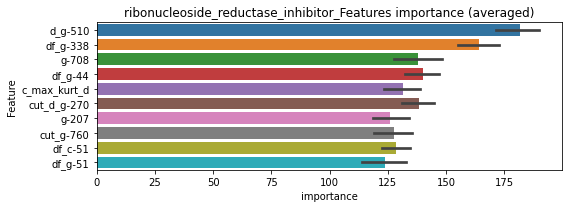

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000402549	valid_1's binary_logloss: 0.00231908


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000418729	valid_1's binary_logloss: 0.00225364


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000407754	valid_1's binary_logloss: 0.00437841


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000439685	valid_1's binary_logloss: 0.0103358


ribonucleoside_reductase_inhibitor logloss: 0.004821203826306415
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000354943	valid_1's binary_logloss: 0.00148762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00033819	valid_1's binary_logloss: 0.00385745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000345819	valid_1's binary_logloss: 0.000897793
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000354238	valid_1's binary_logloss: 0.000996872


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020960, Threshold: 0.0057738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0057738, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0357738
threshold: 0.0357738, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000330474	valid_1's binary_logloss: 0.00306161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1006882, Threshold: 0.0357738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00105
Num_p_label: 19.0, Expected: 4.2, Threshold: 0.0357738, conf_0:0.02862, conf_1:0.04293
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0657738
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0957738
threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000330474	valid_1's binary_logloss: 0.00306161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1006882, Threshold: 0.0957738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0957738, conf_0:0.08620, conf_1:0.10535
threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


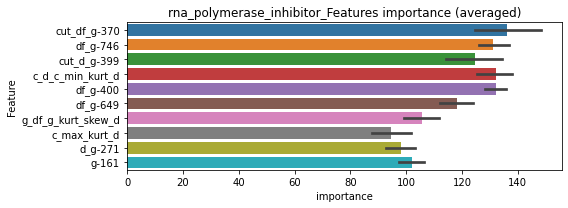

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000348768	valid_1's binary_logloss: 0.00137485


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000348446	valid_1's binary_logloss: 0.00249289


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000344233	valid_1's binary_logloss: 0.000846718


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000341533	valid_1's binary_logloss: 0.000768076


rna_polymerase_inhibitor logloss: 0.0013709289075839973


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 5845
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 5845


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0160853	valid_1's binary_logloss: 0.125037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.0214742	valid_1's binary_logloss: 0.147604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.0114628	valid_1's binary_logloss: 0.116981
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.973, PR-AUC:0.948
y_Threshold: 0.0301761, Threshold: 0.0410371, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[296]	training's binary_logloss: 0.0153878	valid_1's binary_logloss: 0.118348


Remove_noisy_data: 426 → Positive_corect_labels: 1073/6588
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.02873, conf_1:0.05335
threshold: 0.0410371, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1073.0/6588, y_label_rate: 0.1628719
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00695641	valid_1's binary_logloss: 0.0701466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00717212	valid_1's binary_logloss: 0.0871455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00818864	valid_1's binary_logloss: 0.0742648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00705567	valid_1's binary_logloss: 0.0835806


2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0276726, Threshold: 0.0410371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1016.0/6474
p_label_rate: 0.0123054 Vs.target_rate: 0.00991
Num_p_label: 49.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.03283, conf_1:0.04924
threshold: 0.0410371, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1016.0/6474, y_label_rate: 0.1569354
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00265563	valid_1's binary_logloss: 0.0414265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00369485	valid_1's binary_logloss: 0.0525941
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00518734	valid_1's binary_logloss: 0.0540612
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0274605, Threshold: 0.0410371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 978.0/6398
p_label_rate: 0.0148167 Vs.target_rate: 0.00991


Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00615675	valid_1's binary_logloss: 0.0524251


Num_p_label: 59.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.03693, conf_1:0.04514
threshold: 0.0410371, positive_p_label: 59.0/3982, p_label_rate: 0.0148167
positive_y_label: 978.0/6398, y_label_rate: 0.1528603


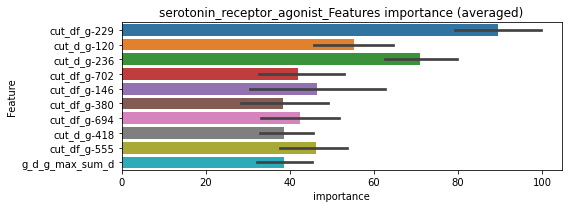

len(train_index) : 4798
len(valid_index) : 1600
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 4798
len(valid_index) : 1600
================================= fold 2/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00339201	valid_1's binary_logloss: 0.0361147
Training until validation scores don't improve for 30 rounds


len(train_index) : 4799
len(valid_index) : 1599
================================= fold 3/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00205656	valid_1's binary_logloss: 0.0254161
Training until validation scores don't improve for 30 rounds


len(train_index) : 4799
len(valid_index) : 1599
================================= fold 4/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00166416	valid_1's binary_logloss: 0.0229444
Training until validation scores don't improve for 30 rounds


serotonin_receptor_agonist logloss: 0.028148670591242004


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00251353	valid_1's binary_logloss: 0.0281162
mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 6767
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 6767


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0631769	valid_1's binary_logloss: 0.186402
Early stopping, best iteration is:
[1174]	training's binary_logloss: 0.0539603	valid_1's binary_logloss: 0.185364
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0623149	valid_1's binary_logloss: 0.201171
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.0628358	valid_1's binary_logloss: 0.201158
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0646277	valid_1's binary_logloss: 0.180635
Early stopping, best iteration is:
[1134]	training's binary_logloss: 0.0571843	valid_1's binary_logloss: 0.179493
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0653568	valid_1's binary_logloss: 0.173631
Early stopping, best iteration is:
[1578]	training's binary_logloss: 0.0409753	valid_1's binary_log

1 / 3, AUC score:0.921, PR-AUC:0.870
y_Threshold: 0.0805987, Threshold: 0.1195232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 775 → Positive_corect_labels: 1101/7345
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.1195232, conf_0:0.08367, conf_1:0.15538
threshold: 0.1195232, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1101.0/7345, y_label_rate: 0.1498979
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0333062	valid_1's binary_logloss: 0.0959397
Early stopping, best iteration is:
[1670]	training's binary_logloss: 0.0196623	valid_1's binary_logloss: 0.0909673
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0332416	valid_1's binary_logloss: 0.0963045
Early stopping, best iteration is:
[1461]	training's binary_logloss: 0.0225882	valid_1's binary_logloss: 0.0919579
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0338479	valid_1's binary_logloss: 0.0874342
[2000]	training's binary_logloss: 0.0164481	valid_1's binary_logloss: 0.0796066
Early stopping, best iteration is:
[2051]	training's binary_logloss: 0.0160184	valid_1's binary_logloss: 0.0793846
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0350878	valid_1's binary_logloss: 0.072866
[2000]	train

2 / 3, AUC score:0.992, PR-AUC:0.975
y_Threshold: 0.0577438, Threshold: 0.1195232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 1014.0/7171
p_label_rate: 0.0027624 Vs.target_rate: 0.01696
Num_p_label: 11.0, Expected: 67.6, Threshold: 0.1195232, conf_0:0.09562, conf_1:0.14343
threshold: 0.1195232, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 1014.0/7171, y_label_rate: 0.1414029
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0223726	valid_1's binary_logloss: 0.0522469
[2000]	training's binary_logloss: 0.0110688	valid_1's binary_logloss: 0.0453833
Early stopping, best iteration is:
[2100]	training's binary_logloss: 0.010538	valid_1's binary_logloss: 0.0450062
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0221825	valid_1's binary_logloss: 0.0521076
Early stopping, best iteration is:
[1850]	training's binary_logloss: 0.011873	valid_1's binary_logloss: 0.0461512
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0222846	valid_1's binary_logloss: 0.054081
[2000]	training's binary_logloss: 0.0109352	valid_1's binary_logloss: 0.04693
Early stopping, best iteration is:
[2180]	training's binary_logloss: 0.0100046	valid_1's binary_logloss: 0.0463955
Training until validation scores don't improve for 30 rounds
[1000]	training'

3 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0480923, Threshold: 0.1195232, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 977.0/7097
p_label_rate: 0.0025113 Vs.target_rate: 0.01696
Num_p_label: 10.0, Expected: 67.6, Threshold: 0.1195232, conf_0:0.10757, conf_1:0.13148
threshold: 0.1195232, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 977.0/7097, y_label_rate: 0.1376638


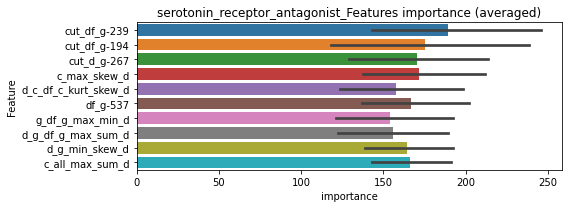

len(train_index) : 5322
len(valid_index) : 1775
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0230321	valid_1's binary_logloss: 0.0388958
[2000]	training's binary_logloss: 0.0119509	valid_1's binary_logloss: 0.0297167
[3000]	training's binary_logloss: 0.00802653	valid_1's binary_logloss: 0.0266964
[4000]	training's binary_logloss: 0.00602285	valid_1's binary_logloss: 0.0252217
Early stopping, best iteration is:
[4253]	training's binary_logloss: 0.00566128	valid_1's binary_logloss: 0.0249529


len(train_index) : 5323
len(valid_index) : 1774
================================= fold 2/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.023717	valid_1's binary_logloss: 0.0339786
[2000]	training's binary_logloss: 0.0123211	valid_1's binary_logloss: 0.0241668
[3000]	training's binary_logloss: 0.00824525	valid_1's binary_logloss: 0.0206867
[4000]	training's binary_logloss: 0.00617736	valid_1's binary_logloss: 0.0189717
[5000]	training's binary_logloss: 0.00493712	valid_1's binary_logloss: 0.0179186
[6000]	training's binary_logloss: 0.00411529	valid_1's binary_logloss: 0.0171589
Early stopping, best iteration is:
[6133]	training's binary_logloss: 0.00402846	valid_1's binary_logloss: 0.0170842


len(train_index) : 5323
len(valid_index) : 1774
================================= fold 3/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0234541	valid_1's binary_logloss: 0.0432159
[2000]	training's binary_logloss: 0.0122983	valid_1's binary_logloss: 0.0340251
Early stopping, best iteration is:
[2942]	training's binary_logloss: 0.00840443	valid_1's binary_logloss: 0.030929


len(train_index) : 5323
len(valid_index) : 1774
================================= fold 4/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0231171	valid_1's binary_logloss: 0.0364295
[2000]	training's binary_logloss: 0.0120477	valid_1's binary_logloss: 0.0267235
[3000]	training's binary_logloss: 0.0080967	valid_1's binary_logloss: 0.0234788
[4000]	training's binary_logloss: 0.0060664	valid_1's binary_logloss: 0.0218013
[5000]	training's binary_logloss: 0.00484244	valid_1's binary_logloss: 0.0208359
Early stopping, best iteration is:
[5769]	training's binary_logloss: 0.00419779	valid_1's binary_logloss: 0.0202091


serotonin_receptor_antagonist logloss: 0.023294035128688776
serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000481631	valid_1's binary_logloss: 0.0139622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000481793	valid_1's binary_logloss: 0.0176506
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000480233	valid_1's binary_logloss: 0.00588243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000471486	valid_1's binary_logloss: 0.0163946


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030273, Threshold: 0.0328197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0328197, conf_0:0.02297, conf_1:0.04267
Num_p_label: 22.0, Expected: 7.4, Adj_threshold_1: 0.0628197
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_2: 0.0928197
threshold: 0.0928197, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000480925	valid_1's binary_logloss: 0.0129391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000535192	valid_1's binary_logloss: 0.0182474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000493064	valid_1's binary_logloss: 0.00651777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000513819	valid_1's binary_logloss: 0.0170887


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341137, Threshold: 0.0928197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0198393 Vs.target_rate: 0.00185
Num_p_label: 79.0, Expected: 7.4, Threshold: 0.0928197, conf_0:0.07426, conf_1:0.11138
Num_p_label: 67.0, Expected: 7.4, Adj_threshold_1: 0.1228197
Num_p_label: 58.0, Expected: 7.4, Adj_threshold_2: 0.1528197
Num_p_label: 47.0, Expected: 7.4, Adj_threshold_3: 0.1828197
Num_p_label: 44.0, Expected: 7.4, Adj_threshold_4: 0.2128197
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_5: 0.2428197
Num_p_label: 36.0, Expected: 7.4, Adj_threshold_6: 0.2728197
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_7: 0.3028197
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_8: 0.3328197
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_9: 0.3628197
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_10: 0.3928197
threshold: 0.3928197, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000485023	valid_1's binary_logloss: 0.0162296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.0004572	valid_1's binary_logloss: 0.0113446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000465141	valid_1's binary_logloss: 0.0128431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000481083	valid_1's binary_logloss: 0.00472428


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250144, Threshold: 0.3928197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0080362 Vs.target_rate: 0.00185
Num_p_label: 32.0, Expected: 7.4, Threshold: 0.3928197, conf_0:0.35354, conf_1:0.43210
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_1: 0.4228197
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_2: 0.4528197
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_3: 0.4828197
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_4: 0.5128197
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.5428197
threshold: 0.5428197, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


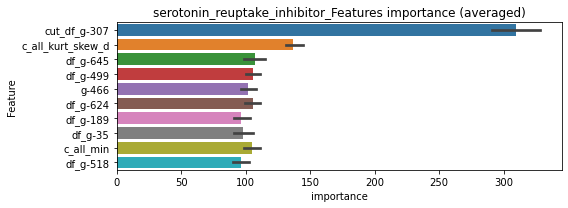

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000524844	valid_1's binary_logloss: 0.0130789


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00048702	valid_1's binary_logloss: 0.0125242


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000472147	valid_1's binary_logloss: 0.011366


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000504594	valid_1's binary_logloss: 0.00483977


serotonin_reuptake_inhibitor logloss: 0.010453465777037289
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000401039	valid_1's binary_logloss: 0.00710632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000417287	valid_1's binary_logloss: 0.0181088
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000423317	valid_1's binary_logloss: 0.00355157
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403025	valid_1's binary_logloss: 0.00330737


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023838, Threshold: 0.0316626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0316626, conf_0:0.02216, conf_1:0.04116
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0616626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0916626
threshold: 0.0916626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000396152	valid_1's binary_logloss: 0.00534393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000387288	valid_1's binary_logloss: 0.0168173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410211	valid_1's binary_logloss: 0.00311375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000398856	valid_1's binary_logloss: 0.00303131


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234161, Threshold: 0.0916626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0105475 Vs.target_rate: 0.00151
Num_p_label: 42.0, Expected: 6.0, Threshold: 0.0916626, conf_0:0.07333, conf_1:0.11000
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_1: 0.1216626
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.1516626
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.1816626
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.2116626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.2416626
threshold: 0.2416626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000404784	valid_1's binary_logloss: 0.0143452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000411384	valid_1's binary_logloss: 0.00449857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000407545	valid_1's binary_logloss: 0.00216446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000389809	valid_1's binary_logloss: 0.0107854


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242347, Threshold: 0.2416626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.2416626, conf_0:0.21750, conf_1:0.26583
threshold: 0.2416626, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


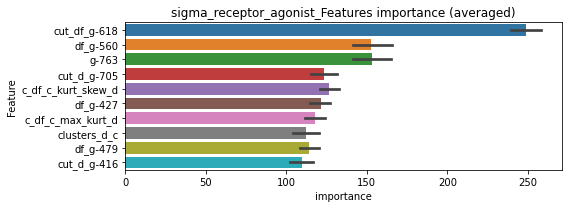

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000512765	valid_1's binary_logloss: 0.0123604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.00039947	valid_1's binary_logloss: 0.00555644


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000420071	valid_1's binary_logloss: 0.00145783


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000465854	valid_1's binary_logloss: 0.012874


sigma_receptor_agonist logloss: 0.008062151004063753
sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000438156	valid_1's binary_logloss: 0.00994236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000436789	valid_1's binary_logloss: 0.00881885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000424891	valid_1's binary_logloss: 0.00417025
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000437351	valid_1's binary_logloss: 0.00454057


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029876, Threshold: 0.0092375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0092375, conf_0:0.00647, conf_1:0.01201
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0392375
threshold: 0.0392375, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03139, conf_1:0.04708
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03531, conf_1:0.04316
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


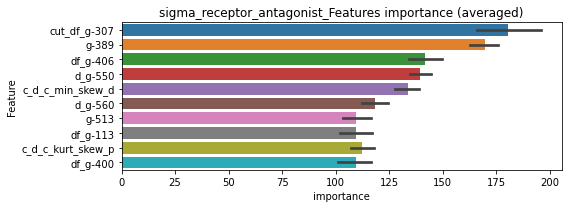

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000449565	valid_1's binary_logloss: 0.00705404


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000523007	valid_1's binary_logloss: 0.00746496


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000436063	valid_1's binary_logloss: 0.00478701


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000434138	valid_1's binary_logloss: 0.00445575


sigma_receptor_antagonist logloss: 0.005941130432914317
smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000331594	valid_1's binary_logloss: 0.00147418
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000321768	valid_1's binary_logloss: 0.00633852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000331626	valid_1's binary_logloss: 0.000684224
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000330593	valid_1's binary_logloss: 0.000934356


y_Threshold: 0.0016507, Threshold: 0.0050948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0050948, conf_0:0.00357, conf_1:0.00662
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0350948
threshold: 0.0350948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[597]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.02808, conf_1:0.04211
threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.03159, conf_1:0.03860
threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


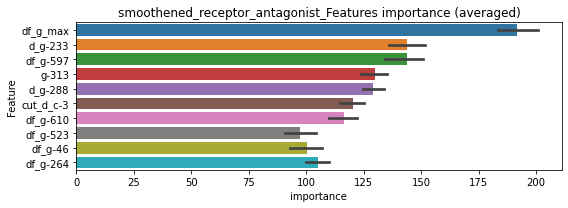

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000332341	valid_1's binary_logloss: 0.00118077


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000326285	valid_1's binary_logloss: 0.00532432


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000329659	valid_1's binary_logloss: 0.000642009


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032333	valid_1's binary_logloss: 0.000811505
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00032333	valid_1's binary_logloss: 0.000811505


smoothened_receptor_antagonist logloss: 0.001990313290024979


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.0203136	valid_1's binary_logloss: 0.117263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.0251155	valid_1's binary_logloss: 0.137738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.0165025	valid_1's binary_logloss: 0.112936
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.972, PR-AUC:0.947


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0163777	valid_1's binary_logloss: 0.122261


y_Threshold: 0.0324383, Threshold: 0.0447542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 521 → Positive_corect_labels: 1249/7711
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.03133, conf_1:0.05818
threshold: 0.0447542, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1249.0/7711, y_label_rate: 0.1619764
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0100488	valid_1's binary_logloss: 0.0764053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00706458	valid_1's binary_logloss: 0.0631338
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0114069	valid_1's binary_logloss: 0.0798756
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.984


Early stopping, best iteration is:
[303]	training's binary_logloss: 0.0080675	valid_1's binary_logloss: 0.0669923


y_Threshold: 0.0321385, Threshold: 0.0447542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 1183.0/7579
p_label_rate: 0.0075339 Vs.target_rate: 0.01121
Num_p_label: 30.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.03580, conf_1:0.05371
threshold: 0.0447542, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1183.0/7579, y_label_rate: 0.1560892
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0040636	valid_1's binary_logloss: 0.0429606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00514417	valid_1's binary_logloss: 0.0420293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00284009	valid_1's binary_logloss: 0.0389726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00248612	valid_1's binary_logloss: 0.0379004


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0222357, Threshold: 0.0447542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1158.0/7529
p_label_rate: 0.0012557 Vs.target_rate: 0.01121
Num_p_label: 5.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.04028, conf_1:0.04923
threshold: 0.0447542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1158.0/7529, y_label_rate: 0.1538053


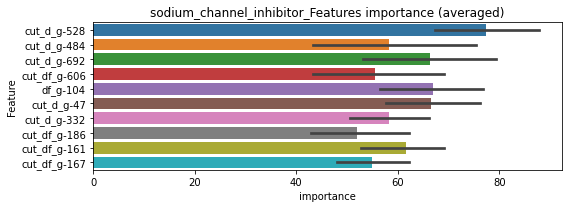

len(train_index) : 5646
len(valid_index) : 1883
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 2/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00135463	valid_1's binary_logloss: 0.022332
Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 3/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[131]	training's binary_logloss: 0.00432579	valid_1's binary_logloss: 0.0344251
Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 4/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00120576	valid_1's binary_logloss: 0.0168758
Training until validation scores don't improve for 30 rounds


sodium_channel_inhibitor logloss: 0.028566563265572227


Early stopping, best iteration is:
[110]	training's binary_logloss: 0.00618879	valid_1's binary_logloss: 0.0406367


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000393727	valid_1's binary_logloss: 0.00582477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000405387	valid_1's binary_logloss: 0.00561067
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000406683	valid_1's binary_logloss: 0.00446424
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000403004	valid_1's binary_logloss: 0.00249726


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022949, Threshold: 0.0062193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0062193, conf_0:0.00435, conf_1:0.00809
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0362193
threshold: 0.0362193, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.02898, conf_1:0.04346
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.03260, conf_1:0.03984
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


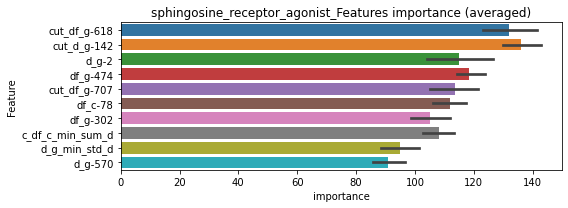

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.0053345


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00039775	valid_1's binary_logloss: 0.00418013


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000402206	valid_1's binary_logloss: 0.00357358


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000408743	valid_1's binary_logloss: 0.00197148


sphingosine_receptor_agonist logloss: 0.0037654450146557767
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000838864	valid_1's binary_logloss: 0.0506197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00106538	valid_1's binary_logloss: 0.0367246
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000619879	valid_1's binary_logloss: 0.00376112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000878765	valid_1's binary_logloss: 0.0318531


1 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0063855, Threshold: 0.0346430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0346430, conf_0:0.02425, conf_1:0.04504
Num_p_label: 25.0, Expected: 11.9, Adj_threshold_1: 0.0646430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_2: 0.0946430
threshold: 0.0946430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000686419	valid_1's binary_logloss: 0.0223518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000807823	valid_1's binary_logloss: 0.0368935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00121995	valid_1's binary_logloss: 0.021282
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000598751	valid_1's binary_logloss: 0.015597


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0237866, Threshold: 0.0946430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0095429 Vs.target_rate: 0.00298
Num_p_label: 38.0, Expected: 11.9, Threshold: 0.0946430, conf_0:0.07571, conf_1:0.11357
Num_p_label: 27.0, Expected: 11.9, Adj_threshold_1: 0.1246430
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_2: 0.1546430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_3: 0.1846430
threshold: 0.1846430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3793, y_label_rate: 0.1711047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000621069	valid_1's binary_logloss: 0.0228495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000605606	valid_1's binary_logloss: 0.0206857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000571588	valid_1's binary_logloss: 0.0163085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000554911	valid_1's binary_logloss: 0.0121343


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0197454, Threshold: 0.1846430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0060271 Vs.target_rate: 0.00298
Num_p_label: 24.0, Expected: 11.9, Threshold: 0.1846430, conf_0:0.16618, conf_1:0.20311
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_1: 0.2146430
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_2: 0.2446430
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_3: 0.2746430
threshold: 0.2746430, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3789, y_label_rate: 0.1707575


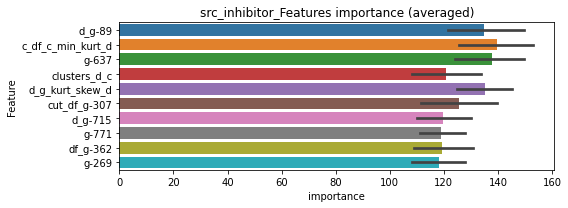

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000880843	valid_1's binary_logloss: 0.0249554


len(train_index) : 2842
len(valid_index) : 947
================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575067	valid_1's binary_logloss: 0.0114388
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000580868	valid_1's binary_logloss: 0.0114302


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000874045	valid_1's binary_logloss: 0.0163411


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000644242	valid_1's binary_logloss: 0.0157698


src_inhibitor logloss: 0.017126209693802692
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000912989	valid_1's binary_logloss: 0.037644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000796518	valid_1's binary_logloss: 0.0304979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000896976	valid_1's binary_logloss: 0.034007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000658237	valid_1's binary_logloss: 0.0262682


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0085797, Threshold: 0.2436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2436510, conf_0:0.17056, conf_1:0.31675
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_1: 0.2736510
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_2: 0.3036510
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_3: 0.3336510
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_4: 0.3636510
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_5: 0.3936510
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_6: 0.4236510
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.4536510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.4836510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_9: 0.5136510
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_10: 0.5436510
threshold: 0.5436510, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.00063434	valid_1's binary_logloss: 0.0247305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00108964	valid_1's binary_logloss: 0.0336989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000646382	valid_1's binary_logloss: 0.0276127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000795345	valid_1's binary_logloss: 0.0354915


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0333286, Threshold: 0.5436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0110497 Vs.target_rate: 0.00332
Num_p_label: 44.0, Expected: 13.2, Threshold: 0.5436510, conf_0:0.43492, conf_1:0.65238
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.5736510
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_2: 0.6036510
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_3: 0.6336510
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_4: 0.6636510
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_5: 0.6936510
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_6: 0.7236510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_7: 0.7536510
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_8: 0.7836510
threshold: 0.7836510, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3784, y_label_rate: 0.1704545
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000651459	valid_1's binary_logloss: 0.0230485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000848975	valid_1's binary_logloss: 0.0264468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00102233	valid_1's binary_logloss: 0.0369388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000610416	valid_1's binary_logloss: 0.0164532


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431788, Threshold: 0.7836510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0060271 Vs.target_rate: 0.00332
Num_p_label: 24.0, Expected: 13.2, Threshold: 0.7836510, conf_0:0.70529, conf_1:0.86202
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_1: 0.8136510
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_2: 0.8436510
threshold: 0.8436510, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


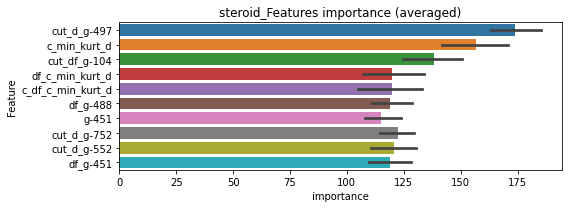

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000813559	valid_1's binary_logloss: 0.0238027


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000800818	valid_1's binary_logloss: 0.0222731


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000848017	valid_1's binary_logloss: 0.0147104


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000970607	valid_1's binary_logloss: 0.0150742


steroid logloss: 0.018967240827912582
syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000307072	valid_1's binary_logloss: 0.00131952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000311225	valid_1's binary_logloss: 0.000831622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000308988	valid_1's binary_logloss: 0.00075208
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015542, Threshold: 0.0049558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0049558, conf_0:0.00347, conf_1:0.00644
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_1: 0.0349558


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000310375	valid_1's binary_logloss: 0.00110023


threshold: 0.0349558, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0349558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, Expected: 3.2, Threshold: 0.0349558, conf_0:0.02796, conf_1:0.04195
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_1: 0.0649558
threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0649558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0649558, conf_0:0.05846, conf_1:0.07145


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


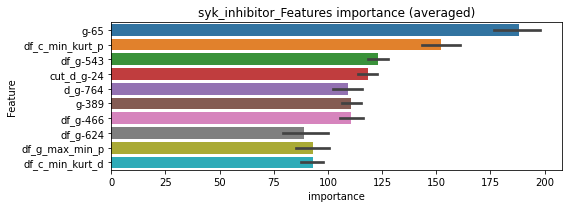

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000313468	valid_1's binary_logloss: 0.00170039


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000303489	valid_1's binary_logloss: 0.000724463


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000311866	valid_1's binary_logloss: 0.00060662


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000308148	valid_1's binary_logloss: 0.000880603


syk_inhibitor logloss: 0.0009781286658045493
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000618208	valid_1's binary_logloss: 0.0313891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000553834	valid_1's binary_logloss: 0.0114483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000592874	valid_1's binary_logloss: 0.00689343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000536768	valid_1's binary_logloss: 0.0130147


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0049040, Threshold: 0.0115926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0115926, conf_0:0.00811, conf_1:0.01507
Num_p_label: 5.0, Expected: 10.0, Adj_threshold_1: 0.0415926
threshold: 0.0415926, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00072263	valid_1's binary_logloss: 0.0290511
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000539828	valid_1's binary_logloss: 0.0117722
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000550692	valid_1's binary_logloss: 0.00627124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000559881	valid_1's binary_logloss: 0.0132225


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266480, Threshold: 0.0415926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.0415926, conf_0:0.03327, conf_1:0.04991
threshold: 0.0415926, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000539358	valid_1's binary_logloss: 0.0102648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000595693	valid_1's binary_logloss: 0.0163228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000855582	valid_1's binary_logloss: 0.0183694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000616268	valid_1's binary_logloss: 0.0248208


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173614, Threshold: 0.0415926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0040181 Vs.target_rate: 0.00252
Num_p_label: 16.0, Expected: 10.0, Threshold: 0.0415926, conf_0:0.03743, conf_1:0.04575
Num_p_label: 6.0, Expected: 10.0, Adj_threshold_1: 0.0715926
threshold: 0.0715926, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 651.0/3795, y_label_rate: 0.1715415


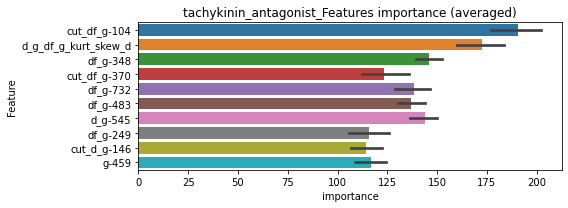

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000826987	valid_1's binary_logloss: 0.0237758


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00071668	valid_1's binary_logloss: 0.0158448


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000564517	valid_1's binary_logloss: 0.00830474


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


tachykinin_antagonist logloss: 0.020253536498969934


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00183078	valid_1's binary_logloss: 0.0331024


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000401371	valid_1's binary_logloss: 0.002557
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000412444	valid_1's binary_logloss: 0.00260742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000406982	valid_1's binary_logloss: 0.00122322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000436245	valid_1's binary_logloss: 0.005378


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027181, Threshold: 0.0074640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0074640, conf_0:0.00522, conf_1:0.00970
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0374640
threshold: 0.0374640, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.02997, conf_1:0.04496
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.03372, conf_1:0.04121
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


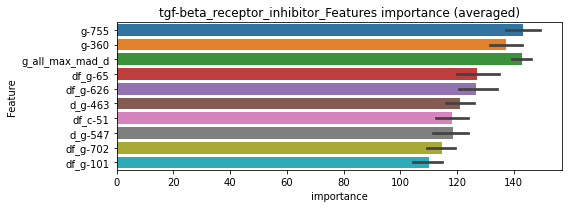

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393962	valid_1's binary_logloss: 0.00218892
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000394395	valid_1's binary_logloss: 0.00218645


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393776	valid_1's binary_logloss: 0.00276208
Early stopping, best iteration is:
[1098]	training's binary_logloss: 0.000386054	valid_1's binary_logloss: 0.00273341


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039805	valid_1's binary_logloss: 0.00128658
Early stopping, best iteration is:
[1142]	training's binary_logloss: 0.000386364	valid_1's binary_logloss: 0.0012599


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000514434	valid_1's binary_logloss: 0.0039789


tgf-beta_receptor_inhibitor logloss: 0.00253955025808007
thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000301038	valid_1's binary_logloss: 0.00234225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000293253	valid_1's binary_logloss: 0.00241053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000303873	valid_1's binary_logloss: 0.0005641
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020204, Threshold: 0.0066030, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000311886	valid_1's binary_logloss: 0.00200125


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0066030, conf_0:0.00462, conf_1:0.00858
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0366030
threshold: 0.0366030, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.0366030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00080
Num_p_label: 25.0, Expected: 3.2, Threshold: 0.0366030, conf_0:0.02928, conf_1:0.04392


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0666030
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.0966030
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.1266030
threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.1266030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.1266030, conf_0:0.11394, conf_1:0.13926


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


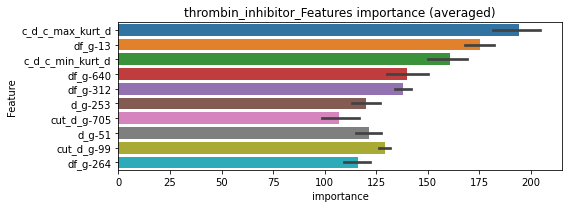

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.00275812


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000297073	valid_1's binary_logloss: 0.00160922


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[849]	training's binary_logloss: 0.000301535	valid_1's binary_logloss: 0.000574741


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000296699	valid_1's binary_logloss: 0.000726284


thrombin_inhibitor logloss: 0.0014174442833900646
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000471725	valid_1's binary_logloss: 0.00732977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000481448	valid_1's binary_logloss: 0.00865571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000460589	valid_1's binary_logloss: 0.00180324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000451307	valid_1's binary_logloss: 0.00222276


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029208, Threshold: 0.0130184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0130184, conf_0:0.00911, conf_1:0.01692
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0430184
threshold: 0.0430184, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000451978	valid_1's binary_logloss: 0.00862687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000449164	valid_1's binary_logloss: 0.00875352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000446147	valid_1's binary_logloss: 0.00175392
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000437782	valid_1's binary_logloss: 0.00183912


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0168215, Threshold: 0.0430184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00155
Num_p_label: 34.0, Expected: 6.2, Threshold: 0.0430184, conf_0:0.03441, conf_1:0.05162
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.0730184
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1030184
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1330184
threshold: 0.1330184, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000494984	valid_1's binary_logloss: 0.00692059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446966	valid_1's binary_logloss: 0.00264211
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000450866	valid_1's binary_logloss: 0.00117287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000487432	valid_1's binary_logloss: 0.00516442


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0494331, Threshold: 0.1330184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.1330184, conf_0:0.11972, conf_1:0.14632
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.1630184
threshold: 0.1630184, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


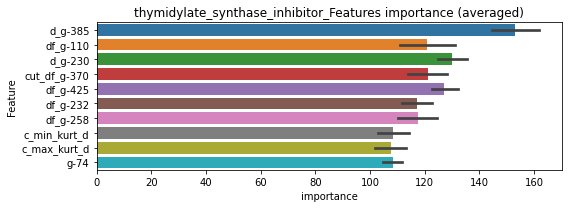

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000433478	valid_1's binary_logloss: 0.00493819


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000445826	valid_1's binary_logloss: 0.0024152


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000443751	valid_1's binary_logloss: 0.00121303


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000459042	valid_1's binary_logloss: 0.00500466


thymidylate_synthase_inhibitor logloss: 0.003392771930915893
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000365974	valid_1's binary_logloss: 0.00530838
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000397663	valid_1's binary_logloss: 0.00916575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000382388	valid_1's binary_logloss: 0.00140194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000369072	valid_1's binary_logloss: 0.00254071


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024085, Threshold: 0.0129624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0129624, conf_0:0.00907, conf_1:0.01685
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.0429624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0729624
threshold: 0.0729624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000368107	valid_1's binary_logloss: 0.00434072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000362472	valid_1's binary_logloss: 0.00984303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000372156	valid_1's binary_logloss: 0.000955814
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000358823	valid_1's binary_logloss: 0.00181325


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125477, Threshold: 0.0729624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0729624, conf_0:0.05837, conf_1:0.08755
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_1: 0.1029624
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1329624
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_3: 0.1629624
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_4: 0.1929624
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.2229624
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_6: 0.2529624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_7: 0.2829624
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000360248	valid_1's binary_logloss: 0.00658326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00036222	valid_1's binary_logloss: 0.00141892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000363256	valid_1's binary_logloss: 0.00173878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000351657	valid_1's binary_logloss: 0.00894083


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240388, Threshold: 0.2829624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.2829624, conf_0:0.25467, conf_1:0.31126
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


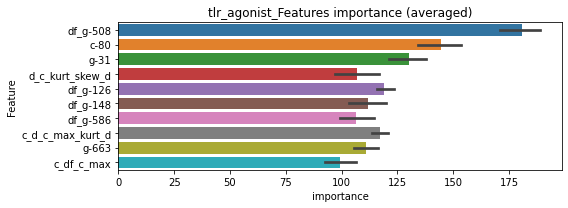

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000371351	valid_1's binary_logloss: 0.00832337


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000366021	valid_1's binary_logloss: 0.00154972


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000368771	valid_1's binary_logloss: 0.00424562


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000360424	valid_1's binary_logloss: 0.00126023


tlr_agonist logloss: 0.0038447346470094866
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000191042	valid_1's binary_logloss: 0.000265607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000189656	valid_1's binary_logloss: 0.00105762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000190484	valid_1's binary_logloss: 0.000240826
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005461, Threshold: 0.0010670, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000192503	valid_1's binary_logloss: 0.000230496


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0010670, conf_0:0.00075, conf_1:0.00139
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0310670
threshold: 0.0310670, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02485, conf_1:0.03728


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02796, conf_1:0.03417


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


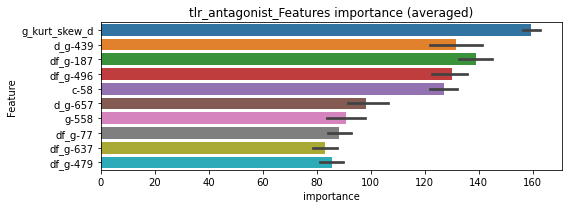

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


[1000]	training's binary_logloss: 0.000185227	valid_1's binary_logloss: 0.000239481
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000185227	valid_1's binary_logloss: 0.000239481


================================= fold 2/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000184852	valid_1's binary_logloss: 0.000348108
Early stopping, best iteration is:
[1002]	training's binary_logloss: 0.000184852	valid_1's binary_logloss: 0.000348108


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000186941	valid_1's binary_logloss: 0.000234086


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


tlr_antagonist logloss: 0.00026984644922422663


Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000186233	valid_1's binary_logloss: 0.000257743


tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000442029	valid_1's binary_logloss: 0.0081001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000462764	valid_1's binary_logloss: 0.00964053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000441108	valid_1's binary_logloss: 0.00499116
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000456026	valid_1's binary_logloss: 0.0115059


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037332, Threshold: 0.0250028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0250028, conf_0:0.01750, conf_1:0.03250
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.0550028
threshold: 0.0550028, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.0550028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, Expected: 6.0, Threshold: 0.0550028, conf_0:0.04400, conf_1:0.06600
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.0850028
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1150028
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.1450028
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.1450028, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.1450028, conf_0:0.13050, conf_1:0.15950
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


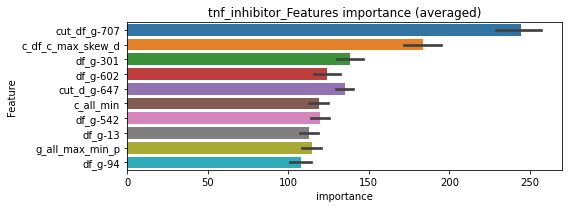

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000451777	valid_1's binary_logloss: 0.00607707


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000512998	valid_1's binary_logloss: 0.00886307


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000449742	valid_1's binary_logloss: 0.00273452


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000454998	valid_1's binary_logloss: 0.00801571


tnf_inhibitor logloss: 0.006422175411471307
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0440729	valid_1's binary_logloss: 0.144212
Early stopping, best iteration is:
[1338]	training's binary_logloss: 0.0331321	valid_1's binary_logloss: 0.14051
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0458223	valid_1's binary_logloss: 0.120281
[2000]	training's binary_logloss: 0.022639	valid_1's binary_logloss: 0.109729
Early stopping, best iteration is:
[2310]	training's binary_logloss: 0.0194538	valid_1's binary_logloss: 0.108361
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0490001	valid_1's binary_logloss: 0.0829558
[2000]	training's binary_logloss: 0.024161	valid_1's binary_logloss: 0.0660355
[3000]	training's binary_logloss: 0.0157468	valid_1's binary_logloss: 0.0593354
[4000]	training's binary_logloss: 0.0116298	valid_1's binary_logloss: 0.0558988
[5000]	training's binary_logloss: 0

1 / 3, AUC score:0.987, PR-AUC:0.967
y_Threshold: 0.0510058, Threshold: 0.1652012, pos_neg_ratio: 0.8000000
Remove_noisy_data: 214 → Positive_corect_labels: 614/3717
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.1652012, conf_0:0.11564, conf_1:0.21476
Num_p_label: 26.0, Expected: 21.2, Adj_threshold_1: 0.1952012
threshold: 0.1952012, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 614.0/3717, y_label_rate: 0.1651870
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0351369	valid_1's binary_logloss: 0.0973116
[2000]	training's binary_logloss: 0.0175294	valid_1's binary_logloss: 0.0871141
Early stopping, best iteration is:
[2013]	training's binary_logloss: 0.0174083	valid_1's binary_logloss: 0.0869422
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0376326	valid_1's binary_logloss: 0.0769341
[2000]	training's binary_logloss: 0.0186876	valid_1's binary_logloss: 0.0641029
[3000]	training's binary_logloss: 0.0122905	valid_1's binary_logloss: 0.0596699
Early stopping, best iteration is:
[3612]	training's binary_logloss: 0.0101569	valid_1's binary_logloss: 0.0582224
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0370201	valid_1's binary_logloss: 0.0829284
[2000]	training's binary_logloss: 0.0184203	valid_1's binary_logloss: 0.0714605
Early stopping, best iterat

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0651449, Threshold: 0.1952012, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 586.0/3661
p_label_rate: 0.0326469 Vs.target_rate: 0.00533
Num_p_label: 130.0, Expected: 21.2, Threshold: 0.1952012, conf_0:0.15616, conf_1:0.23424
Num_p_label: 117.0, Expected: 21.2, Adj_threshold_1: 0.2252012
Num_p_label: 103.0, Expected: 21.2, Adj_threshold_2: 0.2552012
Num_p_label: 83.0, Expected: 21.2, Adj_threshold_3: 0.2852012
Num_p_label: 65.0, Expected: 21.2, Adj_threshold_4: 0.3152012
Num_p_label: 50.0, Expected: 21.2, Adj_threshold_5: 0.3452012
Num_p_label: 40.0, Expected: 21.2, Adj_threshold_6: 0.3752012
Num_p_label: 27.0, Expected: 21.2, Adj_threshold_7: 0.4052012
threshold: 0.4052012, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 586.0/3661, y_label_rate: 0.1600656
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0306946	valid_1's binary_logloss: 0.0600712
[2000]	training's binary_logloss: 0.0152902	valid_1's binary_logloss: 0.0477656
[3000]	training's binary_logloss: 0.010094	valid_1's binary_logloss: 0.0435234
Early stopping, best iteration is:
[3330]	training's binary_logloss: 0.00907635	valid_1's binary_logloss: 0.0426602
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.028791	valid_1's binary_logloss: 0.0816468
Early stopping, best iteration is:
[1560]	training's binary_logloss: 0.0185999	valid_1's binary_logloss: 0.0738501
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0313319	valid_1's binary_logloss: 0.0583595
[2000]	training's binary_logloss: 0.0156162	valid_1's binary_logloss: 0.0460366
[3000]	training's binary_logloss: 0.0102872	valid_1's binary_logloss: 0.0417688
[4000]	training's binary_log

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0655843, Threshold: 0.4052012, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 567.0/3623
p_label_rate: 0.0228528 Vs.target_rate: 0.00533
Num_p_label: 91.0, Expected: 21.2, Threshold: 0.4052012, conf_0:0.36468, conf_1:0.44572
Num_p_label: 81.0, Expected: 21.2, Adj_threshold_1: 0.4352012
Num_p_label: 71.0, Expected: 21.2, Adj_threshold_2: 0.4652012
Num_p_label: 62.0, Expected: 21.2, Adj_threshold_3: 0.4952012
Num_p_label: 54.0, Expected: 21.2, Adj_threshold_4: 0.5252012
Num_p_label: 36.0, Expected: 21.2, Adj_threshold_5: 0.5552012
Num_p_label: 23.0, Expected: 21.2, Adj_threshold_6: 0.5852012
threshold: 0.5852012, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 567.0/3623, y_label_rate: 0.1565001


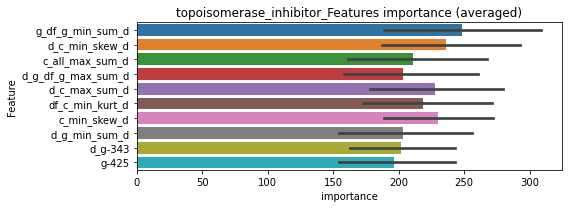

len(train_index) : 2717
len(valid_index) : 906
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0361586	valid_1's binary_logloss: 0.0639949
[2000]	training's binary_logloss: 0.0185994	valid_1's binary_logloss: 0.049748
[3000]	training's binary_logloss: 0.012474	valid_1's binary_logloss: 0.0451514
[4000]	training's binary_logloss: 0.00936674	valid_1's binary_logloss: 0.043075
Early stopping, best iteration is:
[4491]	training's binary_logloss: 0.00834727	valid_1's binary_logloss: 0.0423512


len(train_index) : 2717
len(valid_index) : 906
================================= fold 2/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0347621	valid_1's binary_logloss: 0.0751495
[2000]	training's binary_logloss: 0.0179312	valid_1's binary_logloss: 0.0600893
[3000]	training's binary_logloss: 0.0119738	valid_1's binary_logloss: 0.054769
Early stopping, best iteration is:
[3124]	training's binary_logloss: 0.0114976	valid_1's binary_logloss: 0.0543624


len(train_index) : 2717
len(valid_index) : 906
================================= fold 3/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0385075	valid_1's binary_logloss: 0.0466586
[2000]	training's binary_logloss: 0.0199352	valid_1's binary_logloss: 0.0299898
[3000]	training's binary_logloss: 0.0133688	valid_1's binary_logloss: 0.0238098
[4000]	training's binary_logloss: 0.0100357	valid_1's binary_logloss: 0.0205896
[5000]	training's binary_logloss: 0.00803789	valid_1's binary_logloss: 0.0185079
[6000]	training's binary_logloss: 0.00671096	valid_1's binary_logloss: 0.017088
[7000]	training's binary_logloss: 0.00577168	valid_1's binary_logloss: 0.0160345
[8000]	training's binary_logloss: 0.00507126	valid_1's binary_logloss: 0.0152225
[9000]	training's binary_logloss: 0.00452486	valid_1's binary_logloss: 0.0145884
[10000]	training's binary_logloss: 0.00409019	valid_1's binary_logloss: 0.0140826
Did not meet early stopping. Best iteration is:
[10000]	training's binary_logloss: 0.00409019	valid_1's binary_logloss: 0.0140826


len(train_index) : 2718
len(valid_index) : 905
================================= fold 4/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0369839	valid_1's binary_logloss: 0.0606565
[2000]	training's binary_logloss: 0.0189788	valid_1's binary_logloss: 0.0447538
[3000]	training's binary_logloss: 0.0126737	valid_1's binary_logloss: 0.0391856
[4000]	training's binary_logloss: 0.00950634	valid_1's binary_logloss: 0.036478
Early stopping, best iteration is:
[4834]	training's binary_logloss: 0.00786817	valid_1's binary_logloss: 0.0351283


topoisomerase_inhibitor logloss: 0.03648149214019739
topoisomerase_inhibitor is unpredictable(><)!
transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000310852	valid_1's binary_logloss: 0.000695179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000305043	valid_1's binary_logloss: 0.00218979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000311142	valid_1's binary_logloss: 0.00184727
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015714, Threshold: 0.0145277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000308445	valid_1's binary_logloss: 0.00151548


Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0145277, conf_0:0.01017, conf_1:0.01889
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0445277
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0745277
threshold: 0.0745277, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.0745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0135610 Vs.target_rate: 0.00076
Num_p_label: 54.0, Expected: 3.0, Threshold: 0.0745277, conf_0:0.05962, conf_1:0.08943


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.1045277
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.1345277
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_3: 0.1645277
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_4: 0.1945277
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_5: 0.2245277
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.2545277
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.2845277
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.3145277
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_9: 0.3445277
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_10: 0.3745277
threshold: 0.3745277, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.3745277, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00076
Num_p_label: 17.0, Expected: 3.0, Threshold: 0.3745277, conf_0:0.33707, conf_1:0.41198
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.4045277
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.4345277
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.4645277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.4945277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.5245277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5545277
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.5845277
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.6145277
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.6445277
threshold: 0.6445277, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


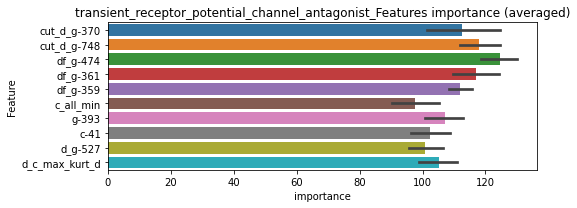

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000302847	valid_1's binary_logloss: 0.000692077


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000298919	valid_1's binary_logloss: 0.00204226


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.00031042	valid_1's binary_logloss: 0.00198832


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000302295	valid_1's binary_logloss: 0.000846997


transient_receptor_potential_channel_antagonist logloss: 0.001392402451940104
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000158342	valid_1's binary_logloss: 0.000345099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000153771	valid_1's binary_logloss: 0.000445348
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000154988	valid_1's binary_logloss: 0.000180942
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004272, Threshold: 0.0011997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011997, conf_0:0.00084, conf_1:0.00156
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311997
threshold: 0.0311997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000155404	valid_1's binary_logloss: 0.000211069


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0311997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0311997, conf_0:0.02496, conf_1:0.03744
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0611997


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0611997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0611997, conf_0:0.05508, conf_1:0.06732
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


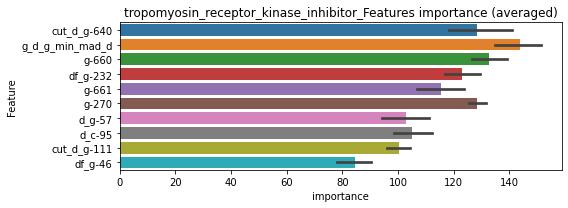

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149062	valid_1's binary_logloss: 0.00024782
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000149062	valid_1's binary_logloss: 0.00024782


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148556	valid_1's binary_logloss: 0.00042465
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000148374	valid_1's binary_logloss: 0.000424465


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[943]	training's binary_logloss: 0.000150313	valid_1's binary_logloss: 0.000180757
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148979	valid_1's binary_logloss: 0.000168753
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000148591	valid_1's binary_logloss: 0.000168321


tropomyosin_receptor_kinase_inhibitor logloss: 0.00025534506795172934
trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000366067	valid_1's binary_logloss: 0.00126781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00035611	valid_1's binary_logloss: 0.00275712
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000369646	valid_1's binary_logloss: 0.00192
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000368987	valid_1's binary_logloss: 0.000955798


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020056, Threshold: 0.0075674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0075674, conf_0:0.00530, conf_1:0.00984
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_1: 0.0375674
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0675674
threshold: 0.0675674, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.0675674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00105
Num_p_label: 12.0, Expected: 4.2, Threshold: 0.0675674, conf_0:0.05405, conf_1:0.08108
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0975674
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.1275674
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.1275674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.1275674, conf_0:0.11481, conf_1:0.14032
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


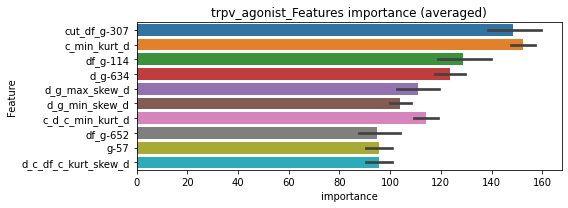

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000364085	valid_1's binary_logloss: 0.00111565


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000357457	valid_1's binary_logloss: 0.00195582


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00036275	valid_1's binary_logloss: 0.000972711


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.00036467	valid_1's binary_logloss: 0.000893557


trpv_agonist logloss: 0.0012348773105491132
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000631799	valid_1's binary_logloss: 0.0246699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000493433	valid_1's binary_logloss: 0.00767099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000480227	valid_1's binary_logloss: 0.00258733
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0036482, Threshold: 0.0161328, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000752807	valid_1's binary_logloss: 0.0239162


Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0161328, conf_0:0.01129, conf_1:0.02097
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0461328
threshold: 0.0461328, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000483122	valid_1's binary_logloss: 0.0102094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000474665	valid_1's binary_logloss: 0.00913165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000484516	valid_1's binary_logloss: 0.00962117
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000479999	valid_1's binary_logloss: 0.014094


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138519, Threshold: 0.0461328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00202
Num_p_label: 28.0, Expected: 8.0, Threshold: 0.0461328, conf_0:0.03691, conf_1:0.05536
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_1: 0.0761328
threshold: 0.0761328, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000478853	valid_1's binary_logloss: 0.010873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000487059	valid_1's binary_logloss: 0.0162167
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000470593	valid_1's binary_logloss: 0.00871787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000471646	valid_1's binary_logloss: 0.00487625


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138072, Threshold: 0.0761328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.0761328, conf_0:0.06852, conf_1:0.08375
threshold: 0.0761328, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


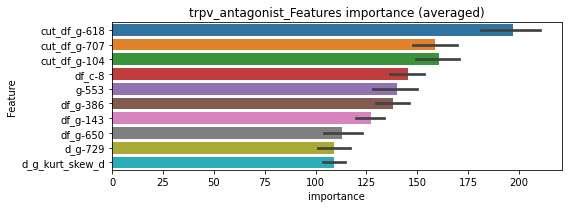

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000551233	valid_1's binary_logloss: 0.00975548


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000606221	valid_1's binary_logloss: 0.0157761


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000586052	valid_1's binary_logloss: 0.00888632


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000480762	valid_1's binary_logloss: 0.00412039


trpv_antagonist logloss: 0.009634583014233186


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.050541	valid_1's binary_logloss: 0.141535
Early stopping, best iteration is:
[1126]	training's binary_logloss: 0.0448527	valid_1's binary_logloss: 0.140191
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0516205	valid_1's binary_logloss: 0.129993
Early stopping, best iteration is:
[1466]	training's binary_logloss: 0.0348401	valid_1's binary_logloss: 0.124807
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0507578	valid_1's binary_logloss: 0.14225
Early stopping, best iteration is:
[1579]	training's binary_logloss: 0.0315693	valid_1's binary_logloss: 0.137707
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0499055	valid_1's binary_logloss: 0.148029
Early stopping, best iteration is:
[1182]	training's binary_logloss: 0.0422169	valid_1's binary_logl

1 / 3, AUC score:0.959, PR-AUC:0.923
y_Threshold: 0.0643435, Threshold: 0.1080031, pos_neg_ratio: 0.8000000
Remove_noisy_data: 624 → Positive_corect_labels: 1255/7922
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.1080031, conf_0:0.07560, conf_1:0.14040
threshold: 0.1080031, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1255.0/7922, y_label_rate: 0.1584196
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0308368	valid_1's binary_logloss: 0.0808109
Early stopping, best iteration is:
[1898]	training's binary_logloss: 0.0157549	valid_1's binary_logloss: 0.0734779
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.030532	valid_1's binary_logloss: 0.0834766
Early stopping, best iteration is:
[1899]	training's binary_logloss: 0.0155784	valid_1's binary_logloss: 0.0765806
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0315575	valid_1's binary_logloss: 0.0709454
Early stopping, best iteration is:
[1901]	training's binary_logloss: 0.0161602	valid_1's binary_logloss: 0.0635525
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0314913	valid_1's binary_logloss: 0.0746964
[2000]	training's binary_logloss: 0.0152108	valid_1's binary_logloss: 0.0676557
Early stoppi

2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0525842, Threshold: 0.1080031, pos_neg_ratio: 0.8000000
Remove_noisy_data: 128 → Positive_corect_labels: 1191.0/7794
p_label_rate: 0.0037670 Vs.target_rate: 0.01327
Num_p_label: 15.0, Expected: 52.8, Threshold: 0.1080031, conf_0:0.08640, conf_1:0.12960
threshold: 0.1080031, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 1191.0/7794, y_label_rate: 0.1528099
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0231443	valid_1's binary_logloss: 0.0539411
Early stopping, best iteration is:
[1910]	training's binary_logloss: 0.0119335	valid_1's binary_logloss: 0.0480695
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0233156	valid_1's binary_logloss: 0.0519356
[2000]	training's binary_logloss: 0.0114167	valid_1's binary_logloss: 0.0451351
Early stopping, best iteration is:
[2014]	training's binary_logloss: 0.0113276	valid_1's binary_logloss: 0.0450705
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0234807	valid_1's binary_logloss: 0.0500201
[2000]	training's binary_logloss: 0.0115577	valid_1's binary_logloss: 0.0428085
Early stopping, best iteration is:
[2902]	training's binary_logloss: 0.00780262	valid_1's binary_logloss: 0.0406165
Training until validation scores don't improve for 30 rounds
[1000]	tra

3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0406899, Threshold: 0.1080031, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 1157.0/7726
p_label_rate: 0.0007534 Vs.target_rate: 0.01327
Num_p_label: 3.0, Expected: 52.8, Threshold: 0.1080031, conf_0:0.09720, conf_1:0.11880
threshold: 0.1080031, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 1157.0/7726, y_label_rate: 0.1497541


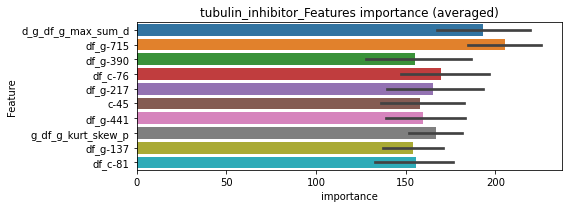

len(train_index) : 5794
len(valid_index) : 1932
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.026521	valid_1's binary_logloss: 0.04167
[2000]	training's binary_logloss: 0.0138055	valid_1's binary_logloss: 0.0318204
[3000]	training's binary_logloss: 0.00911819	valid_1's binary_logloss: 0.028142
[4000]	training's binary_logloss: 0.00676639	valid_1's binary_logloss: 0.0262715
Early stopping, best iteration is:
[4283]	training's binary_logloss: 0.00630398	valid_1's binary_logloss: 0.025891


len(train_index) : 5794
len(valid_index) : 1932
================================= fold 2/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260673	valid_1's binary_logloss: 0.0451624
[2000]	training's binary_logloss: 0.0136497	valid_1's binary_logloss: 0.0366369
[3000]	training's binary_logloss: 0.00899093	valid_1's binary_logloss: 0.0336485
Early stopping, best iteration is:
[3588]	training's binary_logloss: 0.00745378	valid_1's binary_logloss: 0.0327915


len(train_index) : 5795
len(valid_index) : 1931
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0275801	valid_1's binary_logloss: 0.036952
[2000]	training's binary_logloss: 0.0143131	valid_1's binary_logloss: 0.0272855
[3000]	training's binary_logloss: 0.00945364	valid_1's binary_logloss: 0.0238223
[4000]	training's binary_logloss: 0.00700499	valid_1's binary_logloss: 0.0220807
Early stopping, best iteration is:
[4033]	training's binary_logloss: 0.00694514	valid_1's binary_logloss: 0.0220485


len(train_index) : 5795
len(valid_index) : 1931
================================= fold 4/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0254983	valid_1's binary_logloss: 0.0518791
[2000]	training's binary_logloss: 0.0132903	valid_1's binary_logloss: 0.0430163
Early stopping, best iteration is:
[2226]	training's binary_logloss: 0.0119383	valid_1's binary_logloss: 0.0420046


tubulin_inhibitor logloss: 0.030683560384407955
tubulin_inhibitor is unpredictable(><)!
tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000730203	valid_1's binary_logloss: 0.0374405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0016925	valid_1's binary_logloss: 0.0351582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000811516	valid_1's binary_logloss: 0.0204015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00097803	valid_1's binary_logloss: 0.0338618


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0066807, Threshold: 0.0654613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0654613, conf_0:0.04582, conf_1:0.08510
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_1: 0.0954613
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.1254613
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1554613
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_4: 0.1854613
threshold: 0.1854613, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000665136	valid_1's binary_logloss: 0.023556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000699046	valid_1's binary_logloss: 0.0223813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000813546	valid_1's binary_logloss: 0.0194321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000795993	valid_1's binary_logloss: 0.036984


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0213968, Threshold: 0.1854613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0087896 Vs.target_rate: 0.00307
Num_p_label: 35.0, Expected: 12.2, Threshold: 0.1854613, conf_0:0.14837, conf_1:0.22255
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_1: 0.2154613
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_2: 0.2454613
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_3: 0.2754613
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_4: 0.3054613
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_5: 0.3354613
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_6: 0.3654613
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_7: 0.3954613
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_8: 0.4254613
threshold: 0.4254613, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000587186	valid_1's binary_logloss: 0.021493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000728794	valid_1's binary_logloss: 0.0295397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000658302	valid_1's binary_logloss: 0.0239731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000652235	valid_1's binary_logloss: 0.0202716


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0256288, Threshold: 0.4254613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.4254613, conf_0:0.38292, conf_1:0.46801
threshold: 0.4254613, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


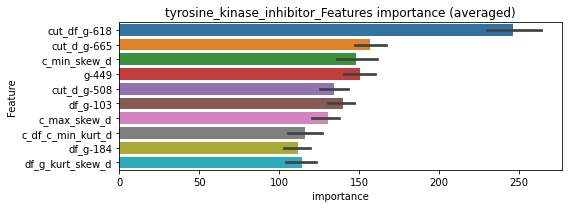

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.00069881	valid_1's binary_logloss: 0.0140231


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00087972	valid_1's binary_logloss: 0.0254227


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 946


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000963704	valid_1's binary_logloss: 0.0315166


================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00141865	valid_1's binary_logloss: 0.0206209


tyrosine_kinase_inhibitor logloss: 0.022896455316405065
ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:306
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000239278	valid_1's binary_logloss: 0.00255787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000238503	valid_1's binary_logloss: 0.00068939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.0002388	valid_1's binary_logloss: 0.000321361
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008597, Threshold: 0.0023451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023451, conf_0:0.00164, conf_1:0.00305
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323451


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000236753	valid_1's binary_logloss: 0.00223279


threshold: 0.0323451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0323451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.0323451, conf_0:0.02588, conf_1:0.03881
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0623451


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0623451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0623451, conf_0:0.05611, conf_1:0.06858


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


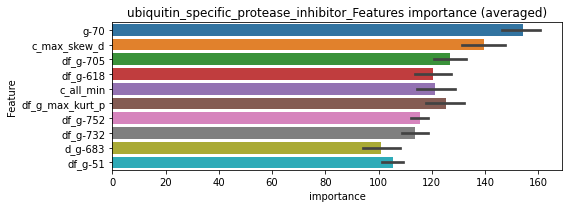

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953


Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000234394	valid_1's binary_logloss: 0.00215609


================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[956]	training's binary_logloss: 0.00023373	valid_1's binary_logloss: 0.000453745


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000238791	valid_1's binary_logloss: 0.000301337


len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0011310687317999215


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000236798	valid_1's binary_logloss: 0.00161239


mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0432518	valid_1's binary_logloss: 0.117044
Early stopping, best iteration is:
[1667]	training's binary_logloss: 0.0253313	valid_1's binary_logloss: 0.110686
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0420042	valid_1's binary_logloss: 0.127546
Early stopping, best iteration is:
[1663]	training's binary_logloss: 0.024907	valid_1's binary_logloss: 0.121233
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.043372	valid_1's binary_logloss: 0.120451
Early stopping, best iteration is:
[1543]	training's binary_logloss: 0.0276863	valid_1's binary_logloss: 0.115516
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.044764	valid_1's binary_logloss: 0.0999368
Early stopping, best iteration is:
[1904]	training's binary_logloss: 0.0227162	valid_1's binary_logl

1 / 3, AUC score:0.979, PR-AUC:0.958
y_Threshold: 0.0495811, Threshold: 0.0804239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 326 → Positive_corect_labels: 856/5233
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.0804239, conf_0:0.05630, conf_1:0.10455
threshold: 0.0804239, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 856.0/5233, y_label_rate: 0.1635773
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0326839	valid_1's binary_logloss: 0.0708943
[2000]	training's binary_logloss: 0.0159268	valid_1's binary_logloss: 0.0605025
Early stopping, best iteration is:
[2177]	training's binary_logloss: 0.0145413	valid_1's binary_logloss: 0.05974
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0316218	valid_1's binary_logloss: 0.0740407
[2000]	training's binary_logloss: 0.0154876	valid_1's binary_logloss: 0.0642623
Early stopping, best iteration is:
[2093]	training's binary_logloss: 0.0147649	valid_1's binary_logloss: 0.0637747
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0326367	valid_1's binary_logloss: 0.0764356
Early stopping, best iteration is:
[1751]	training's binary_logloss: 0.018279	valid_1's binary_logloss: 0.0678618
Training until validation scores don't improve for 30 rounds
[1000]	trainin

2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0552209, Threshold: 0.0804239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 821.0/5163
p_label_rate: 0.0077850 Vs.target_rate: 0.00714
Num_p_label: 31.0, Expected: 28.4, Threshold: 0.0804239, conf_0:0.06434, conf_1:0.09651
threshold: 0.0804239, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 821.0/5163, y_label_rate: 0.1590161
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0264375	valid_1's binary_logloss: 0.0497653
[2000]	training's binary_logloss: 0.0130206	valid_1's binary_logloss: 0.0402706
Early stopping, best iteration is:
[2790]	training's binary_logloss: 0.00919608	valid_1's binary_logloss: 0.0376053
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0255002	valid_1's binary_logloss: 0.0602902
[2000]	training's binary_logloss: 0.0125881	valid_1's binary_logloss: 0.0530059
Early stopping, best iteration is:
[2359]	training's binary_logloss: 0.0105971	valid_1's binary_logloss: 0.0519192
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0260173	valid_1's binary_logloss: 0.0566542
[2000]	training's binary_logloss: 0.0128306	valid_1's binary_logloss: 0.0483279
Early stopping, best iteration is:
[2102]	training's binary_logloss: 0.0121912	valid_1's binary_logloss: 0

3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0446165, Threshold: 0.0804239, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 804.0/5129
p_label_rate: 0.0067805 Vs.target_rate: 0.00714
Num_p_label: 27.0, Expected: 28.4, Threshold: 0.0804239, conf_0:0.07238, conf_1:0.08847
threshold: 0.0804239, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 804.0/5129, y_label_rate: 0.1567557


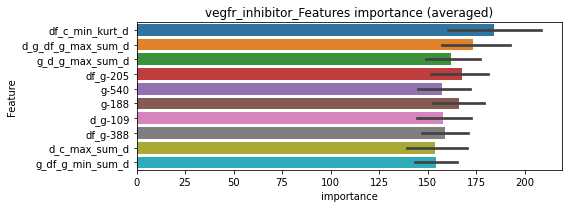

len(train_index) : 3846
len(valid_index) : 1283
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0328438	valid_1's binary_logloss: 0.0550652
[2000]	training's binary_logloss: 0.0170098	valid_1's binary_logloss: 0.0432839
[3000]	training's binary_logloss: 0.0112618	valid_1's binary_logloss: 0.0391993
Early stopping, best iteration is:
[3328]	training's binary_logloss: 0.0101194	valid_1's binary_logloss: 0.0383579


len(train_index) : 3847
len(valid_index) : 1282
================================= fold 2/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0322303	valid_1's binary_logloss: 0.0577502
[2000]	training's binary_logloss: 0.0166539	valid_1's binary_logloss: 0.0463444
[3000]	training's binary_logloss: 0.0110554	valid_1's binary_logloss: 0.0426468
Early stopping, best iteration is:
[3137]	training's binary_logloss: 0.0105624	valid_1's binary_logloss: 0.0423365


len(train_index) : 3847
len(valid_index) : 1282
================================= fold 3/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0328855	valid_1's binary_logloss: 0.0542109
[2000]	training's binary_logloss: 0.0169422	valid_1's binary_logloss: 0.0427406
[3000]	training's binary_logloss: 0.0112406	valid_1's binary_logloss: 0.0386653
[4000]	training's binary_logloss: 0.00837717	valid_1's binary_logloss: 0.0367008
[5000]	training's binary_logloss: 0.00667267	valid_1's binary_logloss: 0.0355024
Early stopping, best iteration is:
[5207]	training's binary_logloss: 0.00640357	valid_1's binary_logloss: 0.0352828


len(train_index) : 3847
len(valid_index) : 1282
================================= fold 4/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0328463	valid_1's binary_logloss: 0.0553578
[2000]	training's binary_logloss: 0.0170024	valid_1's binary_logloss: 0.0425361
[3000]	training's binary_logloss: 0.0112672	valid_1's binary_logloss: 0.0377425
[4000]	training's binary_logloss: 0.0083959	valid_1's binary_logloss: 0.035309
Early stopping, best iteration is:
[4300]	training's binary_logloss: 0.00779844	valid_1's binary_logloss: 0.0348026


vegfr_inhibitor logloss: 0.03769506219784947
vegfr_inhibitor is unpredictable(><)!
vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000370475	valid_1's binary_logloss: 0.00235469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000361799	valid_1's binary_logloss: 0.00259905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000374568	valid_1's binary_logloss: 0.00162773
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023522, Threshold: 0.0083625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0083625, conf_0:0.00585, conf_1:0.01087


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000393633	valid_1's binary_logloss: 0.00655536


Num_p_label: 7.0, Expected: 4.3, Adj_threshold_1: 0.0383625
threshold: 0.0383625, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0383625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00109
Num_p_label: 30.0, Expected: 4.3, Threshold: 0.0383625, conf_0:0.03069, conf_1:0.04603
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_1: 0.0683625
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.0983625
threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0983625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.0983625, conf_0:0.08853, conf_1:0.10820


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


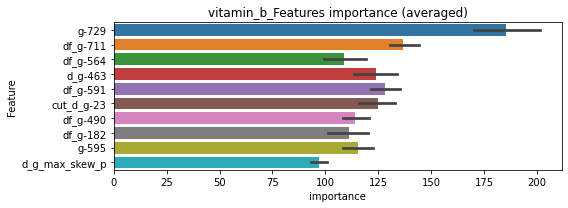

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000366167	valid_1's binary_logloss: 0.00170483


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000358442	valid_1's binary_logloss: 0.00168274


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000369431	valid_1's binary_logloss: 0.00144623


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000387473	valid_1's binary_logloss: 0.00490468


vitamin_b logloss: 0.0024341085613936407
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000475473	valid_1's binary_logloss: 0.00762279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00044715	valid_1's binary_logloss: 0.00681044
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00044981	valid_1's binary_logloss: 0.00471942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000455607	valid_1's binary_logloss: 0.00636758


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030247, Threshold: 0.0141003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0141003, conf_0:0.00987, conf_1:0.01833
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_1: 0.0441003
threshold: 0.0441003, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000465072	valid_1's binary_logloss: 0.0080092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00705609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000450427	valid_1's binary_logloss: 0.00519398
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000433087	valid_1's binary_logloss: 0.00737403


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0202189, Threshold: 0.0441003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0087896 Vs.target_rate: 0.00164
Num_p_label: 35.0, Expected: 6.5, Threshold: 0.0441003, conf_0:0.03528, conf_1:0.05292
Num_p_label: 21.0, Expected: 6.5, Adj_threshold_1: 0.0741003
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_2: 0.1041003
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000434307	valid_1's binary_logloss: 0.0113504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000428897	valid_1's binary_logloss: 0.00525585
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000440312	valid_1's binary_logloss: 0.00122139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000469261	valid_1's binary_logloss: 0.00799921


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0249868, Threshold: 0.1041003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0035158 Vs.target_rate: 0.00164
Num_p_label: 14.0, Expected: 6.5, Threshold: 0.1041003, conf_0:0.09369, conf_1:0.11451
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


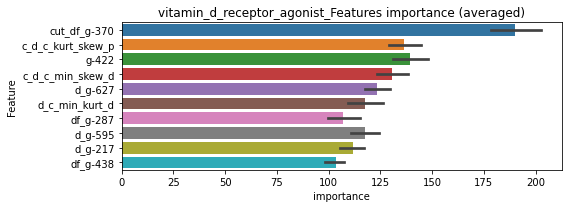

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000660445	valid_1's binary_logloss: 0.0114816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00044065	valid_1's binary_logloss: 0.00450584


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000444788	valid_1's binary_logloss: 0.00126422


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000445406	valid_1's binary_logloss: 0.00753937


vitamin_d_receptor_agonist logloss: 0.006199144804940976
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000370373	valid_1's binary_logloss: 0.0022413
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000385505	valid_1's binary_logloss: 0.00418155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000379693	valid_1's binary_logloss: 0.00206049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000365238	valid_1's binary_logloss: 0.00501873


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025372, Threshold: 0.0112124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0112124, conf_0:0.00785, conf_1:0.01458
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.0412124
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0712124
threshold: 0.0712124, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.0712124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0052737 Vs.target_rate: 0.00126
Num_p_label: 21.0, Expected: 5.0, Threshold: 0.0712124, conf_0:0.05697, conf_1:0.08545
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.1012124
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1312124
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.1612124
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.1612124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1612124, conf_0:0.14509, conf_1:0.17733
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


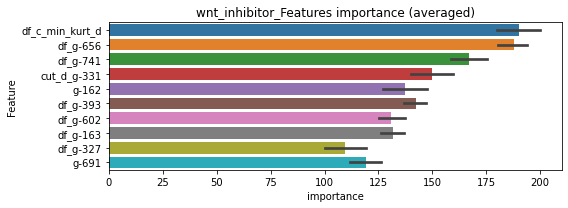

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000361571	valid_1's binary_logloss: 0.00176449
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000361596	valid_1's binary_logloss: 0.00176448


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000371054	valid_1's binary_logloss: 0.00269226


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000428035	valid_1's binary_logloss: 0.00348187


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000368035	valid_1's binary_logloss: 0.00289423


wnt_inhibitor logloss: 0.0027081632603524444


CV:0.013535992536356208


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

['adenosine_receptor_antagonist',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'cc_chemokine_receptor_antagonist',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dopamine_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'glucocorticoid_receptor_agonist',
 'hdac_inhibitor',
 'immunosuppressant',
 'monoamine_oxidase_inhibitor',
 'mtor_inhibitor',
 'nfkb_inhibitor',
 'pdgfr_inhibitor',
 'pi3k_inhibitor',
 'potassium_channel_antagonist',
 'ppar_receptor_agonist',
 'proteasome_inhibitor',
 'protein_synthesis_inhibitor',
 'raf_inhibitor',
 'topoisomerase_inhibitor',
 'tubulin_inhibitor',
 'vegfr_inhibitor']